**Tip Dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("tips.csv")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


In [5]:
df.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64

In [6]:
df.shape

(244, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [8]:
for col in df.select_dtypes(include="object").columns:
    print(col, " : ", df[col].nunique())

sex  :  2
smoker  :  2
day  :  4
time  :  2
Payer Name  :  244
Payment ID  :  243


In [9]:
for col in df.select_dtypes(include="object").columns:
    print(df[col].value_counts())

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64
Payer Name
Christy Cunningham    1
Douglas Tucker        1
Travis Walters        1
Nathaniel Harris      1
Tonya Carter          1
                     ..
Michael Avila         1
Monica Sanders        1
Keith Wong            1
Dennis Dixon          1
Michelle Hardin       1
Name: count, Length: 244, dtype: int64
Payment ID
Thur8084    2
Sun4608     1
Sun2959     1
Sun5260     1
Sun2251     1
           ..
Sat2657     1
Sat1766     1
Sat3880     1
Sat17       1
Thur672     1
Name: count, Length: 243, dtype: int64


In [10]:
pd.get_dummies(df[["sex", "smoker", "day", "time"]]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sex_Female   244 non-null    bool 
 1   sex_Male     244 non-null    bool 
 2   smoker_No    244 non-null    bool 
 3   smoker_Yes   244 non-null    bool 
 4   day_Fri      244 non-null    bool 
 5   day_Sat      244 non-null    bool 
 6   day_Sun      244 non-null    bool 
 7   day_Thur     244 non-null    bool 
 8   time_Dinner  244 non-null    bool 
 9   time_Lunch   244 non-null    bool 
dtypes: bool(10)
memory usage: 2.5 KB


In [11]:
en_data = df[["sex", "smoker", "day", "time"]]

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first")

In [13]:
ohe.fit(en_data)

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [14]:
arr = ohe.transform(en_data).toarray()

In [15]:
column = ohe.get_feature_names_out(en_data.columns)
encoded_df = pd.DataFrame(arr, columns=column)

In [94]:
final_df = pd.concat([df.drop(columns=["sex", "smoker", "day", "time"]), encoded_df], axis=1)
final_df.head()

,total_bill,tip,size,price_per_person,Payer Name,CC Number,Payment ID,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,8.49,Christy Cunningham,3560325168603410,Sun2959,0.0,0.0,0.0,1.0,0.0,0.0
1,10.34,1.66,3,3.45,Douglas Tucker,4478071379779230,Sun4608,1.0,0.0,0.0,1.0,0.0,0.0
2,21.01,3.50,3,7.00,Travis Walters,6011812112971322,Sun4458,1.0,0.0,0.0,1.0,0.0,0.0
3,23.68,3.31,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,1.0,0.0,0.0,1.0,0.0,0.0
4,24.59,3.61,4,6.15,Tonya Carter,4832732618637221,Sun2251,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
final_df.drop(final_df[["Payer Name", "CC Number", "Payment ID"]], axis=1, inplace=True)

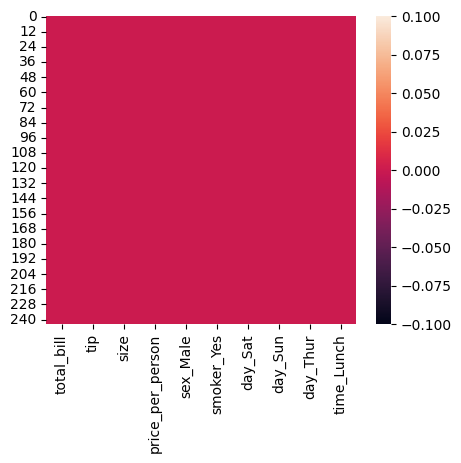

In [18]:
plt.figure(figsize=(5, 4))
sns.heatmap(final_df.isnull())
plt.show()

**Finding Outliers**

In [19]:
final_df.describe()

,total_bill,tip,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,7.888197,0.643443,0.381148,0.356557,0.311475,0.254098,0.278689
std,8.902412,1.383638,0.951100,2.914234,0.479967,0.486667,0.479967,0.464049,0.436248,0.449276
min,3.070000,1.000000,1.000000,2.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.347500,2.000000,2.000000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.795000,2.900000,2.000000,7.255000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.127500,3.562500,3.000000,9.390000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,50.810000,10.000000,6.000000,20.270000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
sec_a = final_df["total_bill"]
sec_b = final_df["price_per_person"]

In [21]:
print(np.std(sec_a), np.std(sec_b))
print(np.var(sec_a), np.var(sec_b))


8.884150577771132 2.9082562000682044
78.92813148851114 8.457954125235151


In [22]:
mean = np.mean(sec_a)

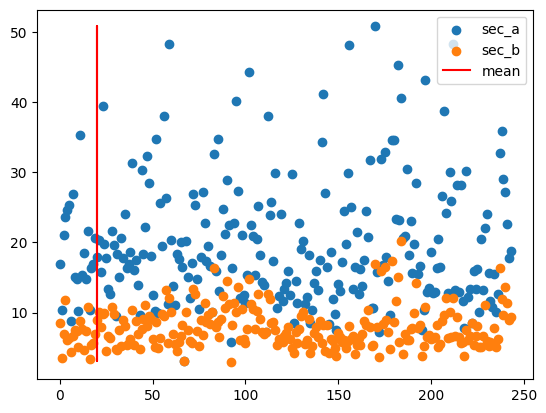

In [23]:
plt.scatter(range(len(sec_a)), sec_a, label="sec_a")
plt.scatter(range(len(sec_b)), sec_b, label="sec_b")
plt.plot([mean for i in range(len(sec_a))], sec_a, c="red", label="mean")
plt.legend()
plt.show()


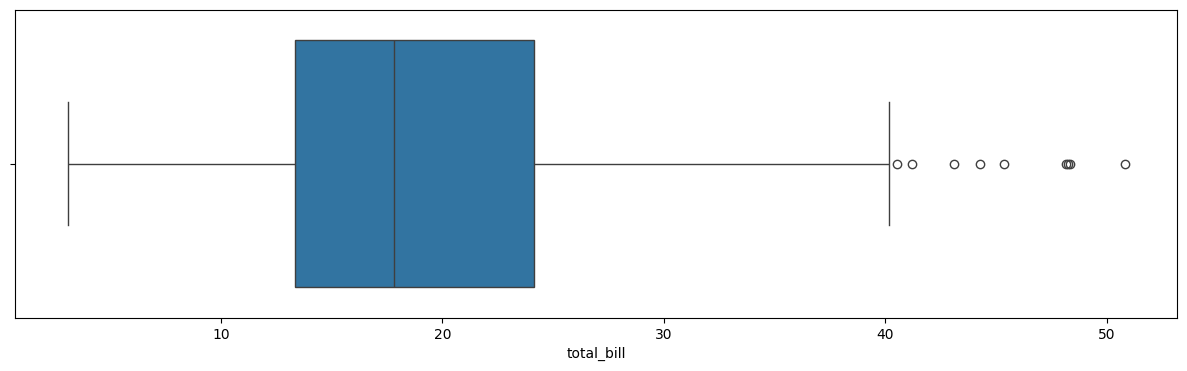

In [24]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="total_bill", data=final_df)
plt.show()

<Figure size 1600x1200 with 0 Axes>

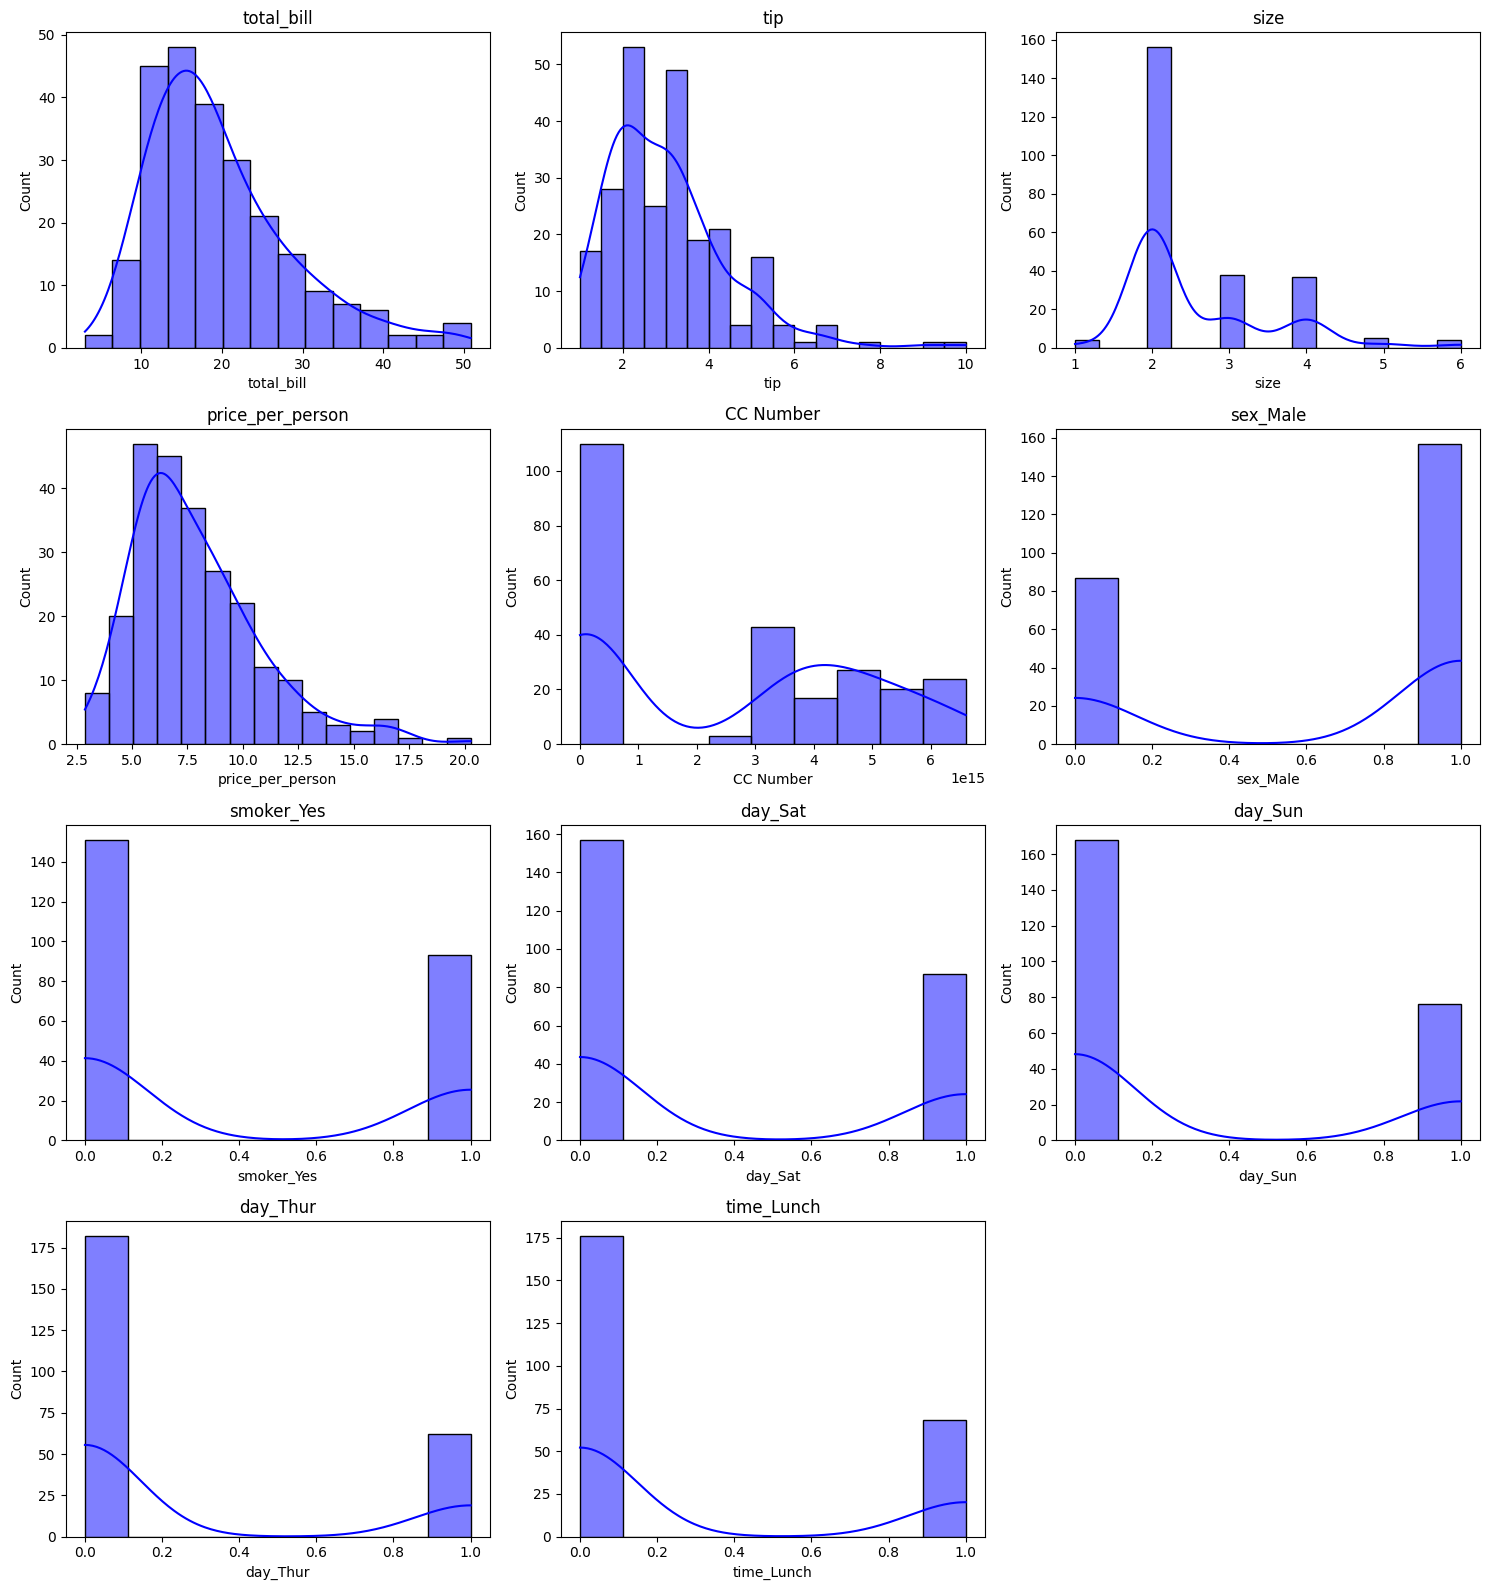

In [104]:
import math
plt.figure(figsize=(16, 12))
cols = final_df.select_dtypes(include=['int64', 'float64']).columns

# Find how many columns and rows we need
total = len(cols)
rows = math.ceil(total / 3)   # 3 graphs per row

# Create one big figure
plt.figure(figsize=(15, rows * 4))

# Loop for each column
for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)           # create position for plot
    sns.histplot(final_df[col], kde=True, color='blue')
    plt.title(col)

plt.tight_layout()  # adjust spacing
plt.show()
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABdEAAAY2CAYAAABL/OWtAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3QmczfX+x/H3YIx930bWsiu7LEm2EqXCbbuU+iv3dlHRbdFtv3W1UkparkslKV1aVNySJWuWFNlLkWUQg8GMbf6Pz+/bGUZGmHPmd5bX8/H4dX5nmXO+jsz39/v8Pt/PJy49PT1dAAAAAAAAAADgd3L9/iEAAAAAAAAAAGAIogMAAAAAAAAAkAWC6AAAAAAAAAAAZIEgOgAAAAAAAAAAWSCIDgAAAAAAAABAFgiiAwAAAAAAAACQBYLoAAAAAAAAAABkgSA6AAAAAAAAAABZIIgOAAAAAAAAAEAWCKIDCJqffvpJcXFxGj169Cn/zPTp072fef/99//wtTfddJOqVKmS6TH72UceeSTjvn22PWZjAQAAWbM51eZWAAAQvk50Hgwg5xFEB6LInDlzvIBycnLyGf38yy+/fFoBcAAAEP3HBwAAAECsI4gORNlJ8qOPPhq1QfTXX39dq1at8nsYAABExfGBzak2twIAgPDFeTAQHvL4PQAAOFXx8fF+DwEAgKiRkJDg9xAAAMAf4DwYCA9kogNRwpZp33333d5+1apVvbrggdrghw4d0j//+U+dc8453gmz1VO7//77lZaWlvHz9tj333+vGTNmZPxsmzZtvOd27Nihv//97zrvvPNUqFAhFSlSRJ06ddK3334btPEfPnzYG1O5cuVUsGBBXXHFFdqwYUOm11ALDgCA4B0fHF8TPdBXZObMmfrLX/6ikiVLenP+jTfeqJ07d/r4pwAAIHrt2bNHd955pzcv2/l6mTJldPHFF2vx4sUnPA+28/TAfH78duzKcluBZu9bsWJF732rVaump556SkeOHPHlzwlEOjLRgSjRrVs3rV69Wu+8846GDh2qUqVKeY+XLl1at9xyi9544w396U9/0l133aX58+dr8ODBWrFihSZOnOi97vnnn1f//v29IPk//vEP77GyZct6tz/++KM++OADXX311d4JeFJSkl599VVddNFFWr58ucqXL5/t8T/xxBPepH/vvfdq69at3ng6dOigJUuWKH/+/Nl+fwAAYtHJjg+y0q9fPxUrVswLwNvy8REjRujnn3/OaAYOAACC569//avef/99b/6tU6eOfv31V82aNcs7X2/UqNHvXm/n63aOf6wxY8ZoypQpXgDe7Nu3zztf37hxo3dhvFKlSl55t0GDBmnz5s3e+TaA00MQHYgS9erV8yZYO0m+6qqrMq5UW7a4BdBtkg3UPf3b3/7mTa7PPvuspk2bprZt23o/88ADD3gn1z179sz03paBbifguXIdXbxyww03qFatWho5cqQefPDBbI/fst3tIKFw4cLeffuzXHPNNd6Yb7/99my/PwAAsSir44OTyZs3r6ZOnZqxfLxy5cq655579PHHH3srxQAAQPB88sknuvXWW/Xcc89lPGbzblYsS/1YFhz/8ssv9X//93/q3Lmz99iQIUP0ww8/6JtvvlH16tW9xyyYbglwzzzzjJdcZxnqAE4d5VyAKPfpp596twMHDsz0uE2agQn7j9jSr0AA3cqu2JVxy1ivWbNmxhKz7LKl4oEAurGs+cTExIzxAwCAnNGnT59M9Vdvu+025cmThzkZAIAQsNVftlp806ZNp/2zW7Zs8c6dGzRooJdffjnj8fHjx+vCCy9U8eLFtX379ozNVnvbOb2VbgNweshEB6KcLb+2ALjVPzuW1R63ydqe/yNWM+2FF17wJuV169Z5k26A1UsNhsDV8QBbLm5jtpqtAAAg5xw/J9uFc7uwzZwMAEDwPf300+rVq5eXGd64cWMvm9ySzM4+++yT/pz1PrPV23Z+PmHChEwNw9esWaPvvvsuy/JtVkIVwOkhiA7EiOzUMP3Xv/7llWyx5WHWoLREiRJeYN6alNCUBAAAAACAM2OBcMsat35l//vf/7xyK9YA1ALjnTp1yvLnrHH43Llz9cUXX6hChQqZnrPzdCv7klVZmBo1agT9zwFEO4LoQJQHyq2OqU2gdiW6du3aGY9bc1Dr1m3Pn+znjTU5sbrpVv/8WPbzgQZl2WXjO1Z6errWrl3r1XIFAAA5dyHd5mSb9wNSUlK8JmSBOqsAACC4bMWX9S6zzbLErZ/JE088kWUQfdy4cV5zUNusgejxzjnnHG/+tvItAIKDmuhAFClYsGBGcDsgcMJ7fPdtazRiLrvsskw/f+zPBuTOndsLah/LaqxZp+9gefPNN7Vnz55MgXs7YT/ZlXcAAHBmxwcn89prr+ngwYMZ90eMGOEtGWdOBgAguKwUy65duzI9VqZMGa8BaFpa2gl/ZtmyZbrlllvUs2dP3XHHHVlmt1uW+pQpU373nB0P2LwO4PSQiQ5EEaufZv7xj3/ouuuu85qCdenSxauvZifENlnaVeqvv/5ab7zxhq666qpMmWb283ai/Pjjj3v1yG3ybteunS6//HI99thjuvnmm9WyZUstXbpUb7/99h/WaDsdViKmVatW3mdYlrwF/W0M1qUcAAAE//ggKwcOHFD79u29E/BVq1Z5PVFsjr7iiitycNQAAEQ/SySzUizWHLR+/fpeHxIrz7JgwQI999xzJ/wZO2c2rVu31pgxYzI9Z+frdp5upV4++ugj71z+pptu8o4F9u7d653LW8Ka9TkJ1qpyIFYQRAeiSNOmTb2a5a+88oomT57slXGxRqD//ve/vYl09OjRXp01ayo6aNAgPfzww5l+/qGHHvIajVpjE5vMLeBuQfT777/fm3DHjh2rd99911ta9sknn+i+++4L2tjtM6zxyeDBg73PtpN3O2kvUKBA0D4DAIBYlNXxQVZeeukl72K5HRdYRvr111+vYcOGZau/CgAA+D0737USLlYL3Wqg2xxtyWR2Lnzbbbed8Ge2bdvmnZ/36dPnd8+NGjXKO/e3950xY4bX38xWkdvK7yJFini10B999FEVLVo0B/50QHSJSz++RgMAAACAmGMX2y27zbLfmjRp4vdwAAAAgLBBTXQAAAAAAAAAALJAORcAIWH1VHfs2HHS19gSsvz58+fYmAAAAAAAAIDTRRAdQEjMmTMnU9PSE7F6bdbkBAAAAAAAAAhX1EQHEBI7d+7UokWLTvqaunXrKjExMcfGBAAAAAAAAJwugugAAAAAAAAAAERiY9FHHnlEcXFxmbZatWplPJ+amqq+ffuqZMmSKlSokLp3766kpCRfxwwAAAAAAAAAiB5hXxPdyj188cUXGffz5Dk65AEDBuiTTz7R+PHjvQaF/fr1U7du3TR79uzT+owjR45o06ZNKly4sBeoBwAgHNhisT179qh8+fLKlSusr3vnOOZuAEA4Yu7OGnM3ACCS5+6wD6Jb0LxcuXK/e3zXrl0aOXKkxo4dq3bt2mU0Kaxdu7bmzZun5s2bn/Jn2EResWLFoI4bAIBg2bBhgypUqOD3MMIKczcAIJwxd/8eczcAIJLn7rAPoq9Zs8a7EpAvXz61aNFCgwcPVqVKlbyGhQcPHlSHDh0yXmulXuy5uXPnnlYQ3a6EB76sIkWKhOTPAQDA6dq9e7d3shmYp3AUczcAIBwxd2eNuRsAEMlzd1gH0Zs1a6bRo0erZs2a2rx5sx599FFdeOGFWrZsmbZs2aK8efOqWLFimX6mbNmy3nMnk5aW5m0BlrJvbCJnMgcAhBuWPGf9nTB3AwDCEXP37zF3AwAiee4O6yJtnTp10tVXX6169eqpY8eO+vTTT5WcnKz33nsvW+9r2exWQz2wsaQMAAAAABCNZs6cqS5dungrvC1A8MEHH/zuNStWrNAVV1zhnR8XLFhQTZs21fr16zOeT01NVd++fVWyZEkVKlRI3bt3V1JSUg7/SQAA8E9YB9GPZ1nnNWrU0Nq1a7066QcOHPCC6seyifxENdSPNWjQIK+memCz5WQAAAAAAESbvXv3qn79+ho+fPgJn//hhx/UqlUrrzzq9OnT9d133+nBBx/0SqoGDBgwQB9//LHGjx+vGTNmePXNu3XrloN/CgAA/BXW5VyOl5KS4k3wN9xwgxo3bqz4+HhNnTrVuwpuVq1a5V0tt9rpJ5OQkOBtAAAAAABEM1vhbVtW/vGPf6hz5856+umnMx4755xzMvYt8WzkyJEaO3as2rVr5z02atQo1a5dW/PmzTutfmQAAESqsM5E//vf/+5d5f7pp580Z84cde3aVblz59b111/vLTPr3bu3Bg4cqGnTpnmNRm+++WYvgM4kDgAAAADAyR05ckSffPKJt+LbSqiWKVPG6012bMkXO9c+ePCgOnTokPGYZa1XqlRJc+fO9WnkAADkrLAOov/yyy9ewNwai15zzTVe/TW70l26dGnv+aFDh+ryyy/3MtFbt27tlXGZMGGC38MGAAAAACDsbd261Vvx/eSTT+rSSy/V//73Py95zUq1WEKb2bJli/LmzeuVVz1W2bJlveeykpaWpt27d2faAACIVGFdzmXcuHEnfd5qtFldt6xquwEAAAAAgKwz0c2VV17p1T03DRo08FaCv/LKK7rooovO+L0HDx6sRx99NGhjBQDAT2GdiQ4AAAAAAEKjVKlSypMnj+rUqZPpcat3bv3GjK34PnDggJKTkzO9JikpyXsuK4MGDfLqqQe2DRs2hOhPAQBA6BFEBwAAAAAgBlmZlqZNm2rVqlWZHl+9erUqV67s7Tdu3Fjx8fGaOnVqxvP2eguyW0+yrCQkJKhIkSKZNgAAIlVYl3MBAAAAAABnzmqer127NuP+unXrtGTJEpUoUcJrDnr33Xfr2muv9fqMtW3bVpMnT9bHH3+s6dOne68vWrSoevfurYEDB3o/Y8Hw/v37ewH05s2b+/gnAwAg5xBEBwAAAAAgSi1cuNALjgdYMNz06tVLo0eP9hqJWv1zq2F+++23q2bNmvrvf/+rVq1aZfzM0KFDlStXLnXv3t1rGNqxY0e9/PLLvvx5AADwQ1x6enq6Ypx1Cber61anjSVmAIBwwfyUNb4bAEA4Yn7KGt8NACCS5ycy0RHWrM7e9u3bc6ypji1nBAAg1uZG5kAAAKJLqM+lOXYAEGsIoiOsJ/1atWpr//59OfJ5+fMX0MqVKzgQAADE3NzIHAgAQPTIiXNpjh0AxBqC6AhbdtXcJv2uXceodOnaIf2sbdtWaOLEnt5nchAAAIiluZE5EACA6BLqc2mOHQDEIoLoCHs26ScmNvJ7GAAAhA3mRgAA8Ec4XgCA4MkVxPcCAAAAAAAAACCqEEQHAAAAAAAAACALBNEBAAAAAAAAAMgCQXQAAAAAAAAAALJAEB0AAAAAAAAAgCwQRAcAAAAAAAAAIAsE0QEAAAAAAAAAyAJBdAAAAAAAAAAAskAQHQAAAAAAAACALBBEBwAAAAAAAAAgCwTRAQBAUD3yyCOKi4vLtNWqVSvj+dTUVPXt21clS5ZUoUKF1L17dyUlJfk6ZgAAAAAAskIQHQAABF3dunW1efPmjG3WrFkZzw0YMEAff/yxxo8frxkzZmjTpk3q1q2br+MFAAAAACArebJ8BgAA4AzlyZNH5cqV+93ju3bt0siRIzV27Fi1a9fOe2zUqFGqXbu25s2bp+bNm/swWgAAAAAAskYmOgAACLo1a9aofPnyOvvss9WjRw+tX7/ee3zRokU6ePCgOnTokPFaK/VSqVIlzZ07N8v3S0tL0+7duzNtAAAAAADkBILoAAAgqJo1a6bRo0dr8uTJGjFihNatW6cLL7xQe/bs0ZYtW5Q3b14VK1Ys08+ULVvWey4rgwcPVtGiRTO2ihUr5sCfBAAAAAAAyrngNFkm4fbt23Pks1asWJEjnwMACK5OnTpl7NerV88LqleuXFnvvfee8ufPf0bvOWjQIA0cODDjvmWiE0gHAAAAAOQEgug4rQB6rVq1tX//vhz93JSUPTn6eQCA4LKs8xo1amjt2rW6+OKLdeDAASUnJ2fKRk9KSjphDfWAhIQEbwMAAAAAIKcRRMcpswx0C6B37TpGpUvXDvnnrVnzqaZNe1Cpqakh/ywAQOikpKTohx9+0A033KDGjRsrPj5eU6dOVffu3b3nV61a5V2obdGihd9DBQAAAADgdwii47RZAD0xsVHIP2f7dsq5AEAk+vvf/64uXbp4JVw2bdqkhx9+WLlz59b111/v1TPv3bu3V5qlRIkSKlKkiPr37+8F0Js3b+730AEAAAAA+B2C6IhaBw9aIF769VcpPV3Km1cqU8bKCkhxcX6PDgCi1y+//OIFzH/99VeVLl1arVq10rx587x9M3ToUOXKlcvLRE9LS1PHjh318ssv+z1sREgvlVKlSqlSpUpBfU8AAAAAOBmC6IgqFiz/4Qfpm2+sPIB0+PDvX1O4sHTuudL557uAOgAguMaNG3fS5/Ply6fhw4d7G6JXqHqp5M9fQCtXriCQDgAAACDHEERH1Ni8WZoyRfr556OP5c9vGWtSnjySlVZPSpL27JHmzpXmzZMaN5bat/dz1AAARKdQ9FLZtm2FJk7s6b03QXQAAAAAOYUgOqIi+3zOHGnqVLdvAfNGjaQGDaRy5TKXbrESLz/+KH39tbtduFBauVJq3bqwn38EAACiVk71UgEAAACAUCGIjohmQfEJE1wg3NSpI11yiVS06IlfHx8v1azptnXrpEmTpB07pM8+qyapvxeEBwAAAAAAAICAXBl7QIQ5cEAaO9YF0HPnli6/XPrTn7IOoB+valXpttuk+vUtg93S1YfphRfOIpAOAAAAIGrMnDlTXbp0Ufny5RUXF6cPPvggy9f+9a9/9V7z/PPPZ3p8x44d6tGjh4oUKaJixYqpd+/eSklJyYHRAwAQHgiiI2Iz0N9+W/rpJylvXumGG1x982NLt5wKK/1y5ZVSs2a/ePffequs7rvPlYUBAAAAgEi3d+9e1a9f/w8bek+cOFHz5s3zgu3HswD6999/r88//1yTJk3yAvN9+vQJ4agBAAgvlHNBxLEAtyVPrF8v5csn9ewpnXXWmb+fBd7r19+q+fMHSxqup5+WiheXF0wHAAAAgEjWqVMnbzuZjRs3qn///poyZYouu+yyTM+tWLFCkydP1oIFC9SkSRPvsRdffFGdO3fWs88+e8KgOwAA0YZMdEQcayC6fLmUK5d07bXZC6Bn9rLuumuDtzdokKu1DgAAAADR7MiRI7rhhht09913q27dur97fu7cuV4Jl0AA3XTo0EG5cuXS/Pnzs3zftLQ07d69O9MGAECkIoiOiLJqlTR7ttu3MixVqgT3/f/8523q18/tW4b7t98G9/0BAAAAIJw89dRTypMnj26//fYTPr9lyxaVKVMm02P2+hIlSnjPZWXw4MEqWrRoxlaxYsWgjx0AgJxCEB0RY9cu6cMP3X7z5lK9eqH5nKFDpY4dpf37XaY7/XIAAAAARKNFixbphRde0OjRo72GosE0aNAg7dq1K2PbsMGt+gUAIBIRREfE1EGfONEFtq3kXocOofssazY6ZowrE2OZ74HMdAAAAACIJl999ZW2bt2qSpUqednltv3888+66667VOW3Zb/lypXzXnOsQ4cOaceOHd5zWUlISFCRIkUybQAARCqC6IgICxdKP/8sxcdL3btLuXOH9vNKlZLGjnV11994Qxo/PrSfBwAAAAA5zWqhf/fdd1qyZEnGZo1CrT66NRk1LVq0UHJyspe1HvDll196tdSbNWvm4+gBAMg5eXLws4Azsm9fgr780u23by+VKJEzn9u6tXT//dLjj7ts9LZtXXAdAAAAACJFSkqK1q5dm3F/3bp1XrDcappbBnrJkiUzvT4+Pt7LMK9Zs6Z3v3bt2rr00kt166236pVXXtHBgwfVr18/XXfddV7AHQCAWEAmOsLet9/W1oEDUoUKUtOmOfvZDzwgWYN6W7145505+9kAAAAAkF0LFy5Uw4YNvc0MHDjQ23/ooYdO+T3efvtt1apVS+3bt1fnzp3VqlUrvfbaayEcNQAA4YVMdIS5Dtq8uaxXVuWKK1x5lZyUkCCNGuUamb79ti13dE1HAQAAACAStGnTRunWZOoU/fTTT797zLLWx1q9SwAAYhSZ6AhbR45Yd/ih3r5loJcu7c847LPvuMPt9+8vpaX5Mw4AAAAAAAAAOY8gOsLWunXVJJ2rvHkP6KKL/B3LI49YV3ppzRppyBB/xwIAAAAAAAAg5xBER1iyGugrV57n7deuvVb58/s7niJFpGeecfv//Kf0yy/+jgcAAAAAAABAziCIjrA0f76VTbHI+VpVrRoeEesePaQLLpD275dOowcPAAAAAAAAgAhGEB1hJzVVmjMncO8R5cp16k1wQikuTnr2Wbc/erT03Xd+jwgAAAAAAABAqBFER9iZO9cF0gsXTpb0jsJJ8+bS1VdL1tz+nnv8Hg0AAAAAAACAUCOIjrCSliZ9/bXbr1PHUr2PKNwMHizFx0tTpkgzZ/o9GgAAAAAAAAChRBAdYWXRIpeFXrKkVL78BoWjc86R/u//3P6jj/o9GgAAAAAAAAChFFFB9CeffFJxcXG68847Mx5LTU1V3759VbJkSRUqVEjdu3dXUlKSr+PEmTl0yJVyMdbA02qQh6tBg1w2+pdfSl995fdoAAAAAAAAACjWg+gLFizQq6++qnr16mV6fMCAAfr44481fvx4zZgxQ5s2bVK3bt18GyfO3LffSikpUpEi0nF/zWGncmXp5pvdPtnoAAAAAAAAQPSKiCB6SkqKevTooddff13FixfPeHzXrl0aOXKkhgwZonbt2qlx48YaNWqU5syZo3nz5vk6Zpwea9QZ+Cuz5p25cyvs3X+/lCePNHWqNGuW36MBAAAAAAAAELNBdCvXctlll6lDhw6ZHl+0aJEOHjyY6fFatWqpUqVKmhuoC3ICaWlp2r17d6YN/vrxR2n7dilvXqlRI0UEstEBAAAAAACA6Bf2QfRx48Zp8eLFGjx48O+e27Jli/LmzatixYplerxs2bLec1mx9ypatGjGVrFixZCMHadu/nx326CBlJCgiBHIRv/iC2n2bL9HAwAAAAAAACCmgugbNmzQHXfcobffflv58uUL2vsOGjTIKwUT2Oxz4J9ff5XWrHH7zZopolSpIt10k9snGx0AAAAAAACIPmEdRLdyLVu3blWjRo2UJ08eb7PmocOGDfP2LeP8wIEDSk5OzvRzSUlJKleuXJbvm5CQoCJFimTa4J+vv3a3NWpIJUoo4lg2utVw//xz6Ztv/B4NAAAAAAAAgJgJordv315Lly7VkiVLMrYmTZp4TUYD+/Hx8ZpqnR1/s2rVKq1fv14tWrTwdew4NQcPSt995/abNlVEqlpVuuYat//cc36PBgAAAAAAAEAw5VEYK1y4sM4999xMjxUsWFAlS5bMeLx3794aOHCgSpQo4WWU9+/f3wugN2/e3KdR43R8/72UmipZWftzzlHEuusu6Z13rIa/1dyXKLMPAAAAAAAARIewzkQ/FUOHDtXll1+u7t27q3Xr1l4ZlwkTJvg9LJyiRYvcbaNGUlycIlbjxlKbNtLhw9KwYX6PBgAAAAAAAEBMZKKfyPTp0zPdt4ajw4cP9zZElqQk6ZdfpFy5pIYNFRZWrFhxxj971VVFNH16NY0YcVhduixVoUJHTvr6UqVKqVKlSmf8eQAAAAAAAABCL+KC6Igeixe725o1pUKF/B1LSspmSXHq2bNnNt7FUum/1969tXXRRW/aOomTvjp//gJauXIFgXQAAAAAAAAgjBFEhy+s7MnSpW4/HLLQU1OTJaWrbduXVL36mTelXbmygGbOtIsCg3XddT29LPsT2bZthSZO7Knt27cTRAcAAAAAAADCGEF0+GL1amn/fpeBHk4NRYsXr6bExEZn/POlS7s67ykpCdqxo5HOOy+owwMAAAAAAACQwyK+sSgi07ffutt69VxN9GiRJ4/UtKnbnzdPSk/3e0QAAAAAAAAAsiOKwpeIFCkpLhPdNGigqGNB9Ny5pU2bpI0b/R4NAAAAAAAAgOwgiI4ct2yZy9A+6yxX/iTaFCggnXuu21+wwO/RAAAAAAAAAMgOgujwJYhuorle+Pnnu9vvv3eZ9wAAAAAAAAAiE0F05KidO12Jk7g4qW5dRa3y5V2m/eHD0uLFfo8GAAAAAAAAwJkiiI4cZZnZpnJlqVAhRbVANvrChdKRI36PBgAAAEAsmjlzprp06aLy5csrLi5OH3zwQcZzBw8e1L333qvzzjtPBQsW9F5z4403apM1eDrGjh071KNHDxUpUkTFihVT7969lcKSWwBADCGIDl+C6IGa4dGsTh1XH33PHmnlSr9HAwAAACAW7d27V/Xr19fw4cN/99y+ffu0ePFiPfjgg97thAkTtGrVKl1xxRWZXmcB9O+//16ff/65Jk2a5AXm+/Tpk4N/CgAA/JXH589HDPn1V2nLFlfKpXZtRb08eaTGjaWvvnINRi2oDgAAAAA5qVOnTt52IkWLFvUC48d66aWXdP7552v9+vWqVKmSVqxYocmTJ2vBggVq0qSJ95oXX3xRnTt31rPPPutlrwMAEO3IREeONxQ95xyXoR0LLIhuFw1++knautXv0QAAAADAye3atcsr+2JlW8zcuXO9/UAA3XTo0EG5cuXS/PnzfRwpAAA5hyA6cryUSzQ3FD1e0aJSrVpu/+uv/R4NAAAAAGQtNTXVq5F+/fXXe/XPzZYtW1SmTJlMr8uTJ49KlCjhPZeVtLQ07d69O9MGAECkIoiOHGFZ2Nu2SblzHw0qx4qmTd3t0qV2IOn3aAAgZz355JNeNtudd96Z6QS9b9++KlmypAoVKqTu3bsrKSnJ13ECABDrrMnoNddco/T0dI0YMSLb7zd48GCvXExgq1ixYlDGCQCAHwiiI0dLuVSrJuXLp5hSpYpUsqR04MDR7wEAYoHVTn311VdVr169TI8PGDBAH3/8scaPH68ZM2Zo06ZN6tatm2/jBAAg1gUC6D///LNXIz2QhW7KlSunrcfVpjx06JB27NjhPZeVQYMGeaVhAtuGDRtC+mcAACCUCKIj5NLTY7OUS4DVRG/UyO0vXOi+DwCIdikpKerRo4def/11FS9ePONxO4keOXKkhgwZonbt2qlx48YaNWqU5syZo3nz5vk6ZgAAYjmAvmbNGn3xxRfeSrFjtWjRQsnJyVq0aFHGY19++aWOHDmiZs2aZfm+CQkJXjD+2A0AgEhFEB0ht3mztGOH1c2TatZUTGrQwJWysZKBmzb5PRoACD0r13LZZZd5jceOZSfgdrJ+7OO1atVSpUqVvMZlWaGuKgAAZ35he8mSJd5m1q1b5+2vX7/em5P/9Kc/aeHChXr77bd1+PBhr865bQdsKa2k2rVr69JLL9Wtt96qr7/+WrNnz1a/fv103XXXqXz58j7/6QAAyBkE0RFyK1e62+rVpbx5FZMKFJDq1HH7xyRwAEBUGjdunBYvXuzVQj2enZTnzZtXxYoVy/R42bJlT9qcjLqqAACcGQuQN2zY0NvMwIEDvf2HHnpIGzdu1EcffaRffvlFDRo0UGJiYsZmq8QCLMBuF73bt2+vzp07q1WrVnrttdd8/FMBAJCz8uTw5yEGrVrlbmOtoejxGjd2zUWtLnr9+ly/AhCdrN7pHXfc4dVTzRfEJhhWV9VO+gMsE51AOgAAf6xNmzZes9CsnOy5gBIlSmjs2LFBHhkAAJGDSB5Cysq4WA8aqwtumeixrFIlqVQpqzkorVlTwu/hAEBIWLkWaz7WqFEj5cmTx9useeiwYcO8fcs4t+XhVlv1WElJSSdtTkZdVQAAAACAX8hER45koVepIuXPr5hmFxIsG33KFGnFitJ+DwcAQsKWeS+1ZTfHuPnmm70l4Pfee6+XPR4fH6+pU6eqe/fu3vOrVq3y6rJa4zKcmrS03LLStuvWuYuzNsdYWdqqVaXERHcfAAAAABAcBNGRI0H0WG0oerz69aWpUy1D364oNPd7OAAQdIULF9a5556b6bGCBQuqZMmSGY/37t3bK81iS8Mto7x///5eAL15c34v/pGDBy06/ojeeus8HTmS+bnly91thQrShRe6FWAE0wEAAAAg+wiiI2T27ZPWr3f7BNEdy8avW1f69lu79xe/hwMAvhg6dKhy5crlZaKnpaWpY8eOevnll/0eVtj7+WepVy+bUB/2AuilS0u1a0uFCrlsdJtzf/hB+uUX6Z133Nx72WV2YcPvkQMAAABAZCOIjpBZvdqa1Ehly0rFivk9mvBhJV1cEP1a7d692u/hAEDITZ8+PdN9azg6fPhwb8Op2bTJSuVYkLyApF/Vvv1utWpVNdNrWraUUlKkOXOk+fPdajALvFvVnGrVfBs6AAAAAEQ8GosiZCjlcmK2zL5Eif2Wl65PPqHBKADgj5t0X3yxyzI/66w0SQ10zjk7T/hay0q/5BKpTx9XGz01VXr7bemrr9yFbQAAAADA6SOIjpCwZeV2sm9q1fJ7NOHF6tPWrr3N258woRRBDQBAlmyO+OtfXb3zs86SRoxYI+mXP/w5WwX2f/8nNWrk7n/5pTRpkn5XRx0AAAAA8McIoiMk1q1zgfQiRaRy5fweTfipXn2HpL368cf8mjXL79EAAMLVmDHS+PFSnjzShx9aIP3AKf+s/UyXLlLnzu4C7uLF7r1sfgYAAAAAnDqC6AiJlSuPlnKxE3dkljevpQK+4+2/+qrfowEAhCNrENqvn9t/5BHXU+NMNG0qXX21lDu3m58tMG9lXgAAAAAAp4YgOkKy9NyaihpKuZyMi56//770669+jwUAEG7+8Q9p926peXPp3nuz9161a0s9e0oJCdL69dKoUdKePcEaKQAAAABEN4LoCLqNG6W9e92JeuXKfo8mnC1UzZr7lJYmvfmm32MBAISTJUukt95y+8OGudIs2VWlinTzza756Nat0n/+w0VcAAAAADgVBNERdGus55mkc85xS8eRtW7dtmeUdKHBKAAg4J573Lxw3XWuHEuwBBqOlighJSe7QPq2bfmD9wEAAAAAEIUIoiPo1q51t9Wq+T2S8HfppTtUsKC0apX01Vd+jwYAEA5mzJA+/1yKj5eeeCL471+8uAukJyZK+/ZJkybVkNQ++B8EAAAAAFGCIDqCysq4bNrk9gmi/7FChY7o+uvdPg1GAQDmmWfcbe/e0tlnh+Yz7AJur15S1arSwYO2bOwzTZxYMjQfBgAAAAARjiA6guqHH9xtuXJS4cJ+jyYy/OUvymgwut1VdwEAxKgVK6RPPpHi4qSBA0P7Wda75M9/tvJrOyTF6/HHK+vOOy2oHtrPBQAAAIBIQxAdISnlYvXQcWqaNJEaNZIOHKDBKADEuiFD3O1VV0nVq4f+86xhabt2P0l62Lv/wgtSmzbSL7+E/rMBAAAAIFIQREfQHDlyNIieEyf+0aRPH3f72ms0GAWAWLV169GLqX//e859rmW9S4/p2Wd/UNGi0pw5Ur160tixzEkAAAAAYAiiI2g2b5b273fLwytU8Hs0kcWW0xcq5BqMWkM5AEDssQC6rUpq2lRq2TLnP79t211atMitkNq5U+rRw2XE/2SJ6gAAAAAQwwiiI2jWrHG31gQtt/Uowymz+vEWSA9kowMAYotlfI8c6fZvvdW/cVg5NstEf+wxV+rlo4+k2rWl+++Xfv3Vv3EBAAAAgJ8IoiNoAqVcqlXzeySRXdLlv/+lwSgAxBoLXK9cKRUoIF17rb9jiY+XHnxQWrLEstOl1FRp8GCpalXpgQcIpgMAAACIPQTRERT79kkbN7p9guhnpnFjt9lS/tGj/R4NACAnBbLQr7lGKlJEYaFuXWnqVOmDD6QGDaQ9e6QnnnDB9HvuofkoAAAAgNhBEB1B8cMP7rZMmfA5+Y9Ef/mLu6XBKADEjpQU6b333H7v3gor1nT0yiulxYuliROl+vVdMP2ZZ1ww/YYbXMY6AAAAAEQzgugICkq5BMd117kGo1Zffvp0v0cDAMgJVnd87143h15wgcKSBdOtyagF0z/+WGrTRjp0SBozRmrYULr4YmnKFC4AAwAAAIhOBNGRbXbCTBA9eA1Ge/Rw+6++6vdoAAA54d13j15ItWB1OMuVS7r8cmnaNGnBAjdmayb+xRfSpZe6iwAzZ/o9SgAAAAAILoLoyLYtW1xN9Lx5pUqV/B5N9JR0mTBB2rbN79EAAEIpOVmaPNnt+91Q9HQ1aSK98467kH7HHVL+/NLcudJFF0l//rM1yc7j9xABAAAAICgIoiPbfvzR3Vap4rLRkD22LN4CEwcP0mAUAKKdNe20htLWxPPccxWRbP5//nnXH8UuBFu2ugXX//SnOpK6+z08AAAAAMg2gugIWhDdGowh+A1GjxzxezQAgFCXcom0LPQTSUyUXnlF+vprqVEja0Bqmejva9asijp82O/RAQAAAMCZI4iObLFs6Z9/dvvnnOP3aKKH1Zi1+ui2RN7qzgIAos/Ona6WeLQE0QMaN5bmzZNuummLd3/58tIaO1ZKS/N7ZAAAAABwZgiiI1s2bJCXXWYB31Kl/B5N9ChU6GiDUctGBwBEn08/lQ4dcmVcatRQVImPl/r33yTpMuXJc9hbtTZqlOuhAgDIWTNnzlSXLl1Uvnx5xcXF6QOrJXaM9PR0PfTQQ0pMTFT+/PnVoUMHrVmzJtNrduzYoR49eqhIkSIqVqyYevfurZSUlBz+kwAA4B+C6AhKKZezz5bi4vweTXSWdJk4Udq61e/RAACC7cMP3e2VVyqKfaouXVarYEEpKUkaM0ZKTfV7TAAQW/bu3av69etr+PDhJ3z+6aef1rBhw/TKK69o/vz5KliwoDp27KjUY35hWwD9+++/1+eff65JkyZ5gfk+ffrk4J8CAAB/EURHtlAPPXQaNJDOP9+VzLHsPQBA9LDSJp995vavuEJRrXTp/brpJqlAAWnzZnmlXWxuAwDkjE6dOunxxx9X165df/ecZaE///zzeuCBB3TllVeqXr16evPNN7Vp06aMjPUVK1Zo8uTJ+ve//61mzZqpVatWevHFFzVu3DjvdQAAxAKC6DhjtiTbToYDmegIvkByx+uv02AUAKLJ9OmSrYK3ZpxNmijqWcm3G2+U8uVzpeA+/tgCN36PCgCwbt06bdmyxSvhElC0aFEvWD537lzvvt1aCZcmx0xY9vpcuXJ5metZSUtL0+7duzNtAABEKoLoOGPr1rnb0qVdTXSEpsFokSLSDz8cbT4HAIieUi6WhZ4rRo7GypZ1DVTtz7t0qTR7tt8jAgBYAN2UtV/Sx7D7gefstkyZMpmez5Mnj0qUKJHxmhMZPHiwF5APbBUrVgzJnwEAgJwQ1qdtI0aM8JaTWfMS21q0aKHPAmufZTU1U9W3b1+VLFlShQoVUvfu3ZVkBTeR4/XQERpWQ7ZXL7efRQlDAECEsQzsjz6KjVIux6tSRbr0Urc/dar0889+jwgAECqDBg3Srl27MrYNthQJAIAIFdZB9AoVKujJJ5/UokWLtHDhQrVr186r02YNTcyAAQP08ccfa/z48ZoxY4ZXj61bt25+DztmEETPGX/7m7u1pe8//eT3aAAA2WVZ2Bs3SvnzS+3aKeY0bSrVr+/2J0yg0SgA+KlcuXLe7fHJaHY/8Jzdbt26NdPzhw4d0o4dOzJecyIJCQkZCXGBDQCASBXWQfQuXbqoc+fOql69umrUqKEnnnjCyzifN2+edyV75MiRGjJkiBdcb9y4sUaNGqU5c+Z4zyO0du6UkpPdkmzLKkPo1KolXXyxy1wcMcLv0QAAsmvyZHdrAXSrER6LOnWSiheXrDzuJ5/4PRoAiF1Vq1b1AuFTbXnQb6x2udU6t5Xgxm6Tk5O95LaAL7/8UkeOHPFqpwMAEAvyKEIcPnzYyzjfu3evN4nbBH7w4MFMDVBq1aqlSpUqeY1PmjdvftIGJ7YF0ODk9FmNblOhgpQ3r9+jiVzW6f5UdOpUVJ9/fo5effWQrrxyqfLlO71ubKVKlfL+bQAAwieIHihrEosSEqTu3aWRI6Vly6S6dd1FYwBA8KWkpGjt2rWZmokuWbLEq2lu5wh33nmnHn/8cS95zYLqDz74oMqXL6+rrrrKe33t2rV16aWX6tZbb9Urr7zinYf369dP1113nfc6AABiQdgH0ZcuXeoFza3+uWWhT5w4UXXq1PEm/bx583pdwrNqgHKyBiePPvpoiEceG01FKeVyZlJSNkuKU8+ePU9j0cgP2rWrii64YJik0af1efnzF9DKlSsIpAOAz/bskWbNcvuxHEQ3Z50ltWzpGox++qllQ7rgOgAguKw0atu2bTPuDxw40Lvt1auXRo8erXvuucdLVuvTp4+Xcd6qVStNnjxZ+Y5ZLvX22297gfP27dsrV65cXj+yYcPsvAQAgNgQ9kH0mjVregFzK9/y/vvvexO91T/PboOTwIFDIBOdTuGnzsqKEETPntTUZPsm1bbtS6pe3S2T/CNLlsTr66+lkiWHq1u3/oqLO7XP2rZthSZO7Knt27cTRAcAn02bJh08KJ1zjlStmt+j8d9FF0nLl7sycVZJoHNnv0cEANGnTZs2SreTuCzExcXpscce87asWNb62LFjQzRCAADCX9gH0S3bvNpvZ5lW93zBggV64YUXdO211+rAgQPelfJjs9GPbYBysgYntuHM7NiRX/v3uzIurN7LnuLFqykxsdEpvbZoUWnxYunXXwvo8OFG4roPAEQeSrlkFh8vXX659NZblilpx3q2qtDvUQEAAABABDUWPRFrXmL1zC2gHh8fn6kByqpVq7R+/fqMBigIjU2bCnm3ltScO7ffo4kdBQpI557r9hcs8Hs0AIAzQRD992xVW506bqXblCnuFgAAAADCSVhnolvZlU6dOnklKPbs2eMtH5s+fbqmTJmiokWLqnfv3l5ZFltaVqRIEfXv398LoJ+sqSiyb/Pmwt5tlSp+jyT2nH++lXWRvv9euuQSqZC7ngEAiAA//ujKoVn2dZs2fo8mvFif+FWr3PezerWV8/N7RAAAAAAQIUH0rVu36sYbb9TmzZu9oHm9evW8APrFF1/sPT906NCMpiaWnd6xY0e9/PLLfg87ysVp82YXuSWInvMSE6UKFaRffpEWLXK1ZAEAkeGLL9ytXevnImhmxYu778WajH7+uVS9upQr4tZLAgAAAIhWYR1EHzly5Emft27hw4cP9zbklHpKS8vj1UO3gC78yUYPBNFbtaKkDgBEikAFuvbt/R5JeLrwQumbb6z3h/Ttt1LDhn6PCAAAAAAccnxwmtpk1EMnQ8wfVje2YEFpzx5p5Uq/RwMAOBVHjkhffnm0dAl+z3q+X3CB258xQzp0yO8RAQAAAIBDGBRnFESnlIt/LPO8cWO3//XXfo8GAHAqvvtO2r7dlXGxFUU4saZNpcKFpV27pMWL/R4NAAAAADgE0XFaWXRSa2+fILq/mjRxKwHWr7dGr36PBgBwqqVcWrd2jUVxYvbdWFkX89VXZKMDAAAACA8E0XHK1qzJL6mE4uMPUw/dZ5alV7eu2583z+/RAABOtakopVz+WKNGUpEiUkqKtGSJ36MBAAAAAILoOA2LFhXybsuVS6Eeehho3tzdLlsm7d7t92gAAFmxbGrLqjbt2vk9msgoW9aypdufNUs6fNjvEQEAAACIdSELhZ599tn69ddff/d4cnKy9xwiz8KFhb3b8uX3+D0UeH8PUuXKrswOtdEBBANzd2hYbe+9e6XixaXzzvN7NJGTjW5NtK02+tKlfo8GAPzBvAwAQAwE0X/66ScdPkHqUFpamjZu3Biqj0WI2F/l4sUuEz0xMcXv4eC4bPRFi6QDB/weDYBIF6y5e8SIEapXr56KFCnibS1atNBnn32W8Xxqaqr69u2rkiVLqlChQurevbuSkpIUrWbOdLdW65uVXKdeG71FC7c/e7aUnu73iAAg53FODQBA+MgT7Df86KOPMvanTJmiokWLZty3A4CpU6eqCl0pI85330l79tj/LrtVqtQ+v4eD39SoIZUoIe3Y4erGnn++3yMCEImCPXdXqFBBTz75pKpXr6709HS98cYbuvLKK/XNN9+obt26GjBggD755BONHz/e+6x+/fqpW7dumm3R0igOoltTUZxeE2377rZvl374QapWze8RAUDO4JwaAIAYCKJfddVV3m1cXJx69eqV6bn4+Hhvsn/uueeC/bEIsenTA3tfKVcuuoqGC8tobNZMsgTP+fNdwIEsRwB+z91dunTJdP+JJ57wstPnzZvnBdhHjhypsWPHqt1vBcJHjRql2rVre883DyyxiRKWQBioh37RRX6PJrIkJEgNG7r5zZpoE0QHECs4pwYAIPwEPYh+xAo0S6pataoWLFigUqVKBfsj4GsQ3Xau93cwyKRBA2naNJeNvnq1VKuW3yMCEGlCOXdbxpxlnO/du9cr67Jo0SIdPHhQHTp0yHhNrVq1VKlSJc2dOzfqgujW/Dk5WSpUyP2+xumxC8XW98My0bdu9Xs0AJAzOKcGACD8hCxndd26dUz2UZRFF1iKLk3zdzD4nbx5pcaN3f7cuX6PBkAkC+bcvXTpUq/eeUJCgv76179q4sSJqlOnjrZs2aK8efOqWLFimV5ftmxZ77msWP3X3bt3Z9oiwYwZ7vaCC6Q8QU9diH7WjDVwcdiy0QEglnBODQBA+Ajp6ZzVarNt69atGVfTA/7zn/+E8qMR5HrolkVXsOBh7d27xO/h4ASsFroF0NevlzZskCpW9HtEACJVsObumjVrasmSJdq1a5fef/99bzn6jEBE+QwMHjxYjz76qCJN4CI0pVzOnC1OWLHCHY+cey5XIgDEFs6pAQCI8kx0O9G95JJLvAl/+/bt2rlzZ6YNkcNKhZiGDVMsL93v4eAEihSR6tVz+1Halw9ADgjm3G3Z5tWqVVPjxo29AHj9+vX1wgsvqFy5cjpw4ICS7ersMZKSkrznsjJo0CAvIB/YNtgVwzCXnk5T0WCwC8Ply7uVccuXk5EJIHZwTg0AQPgIWTrPK6+8otGjR+uGG24I1Ucgh+uhN268R7Nm+T0aZMVKBSxZIq1aJW3bJpUu7feIAESaUM7dlj1nJVksqG5N0Swg0L17d++5VatWaf369V7N9KxYWRjbIsnKle73cb58rvEzzkxcnMtGnzDBgug2ueX1e0gAkCM4pwYAIAaC6JZl1rJly1C9PXyoh96kiWWiI1xZucTatd2Sd8tGv+oqv0cEINIEa+62rPFOnTp5zUL37NmjsWPHavr06ZoyZYqKFi2q3r17a+DAgSpRooSKFCmi/v37ewH0aGsqGpg/7dpAhMX/w06dOtIXX0i7d8fT4BxAzOCcGgCAGCjncsstt3gnzYhs334r7drlyoXUqLHP7+HgFLLRzdKlro49APgxd1vd1htvvNGri96+fXstWLDAC6BffPHF3vNDhw7V5Zdf7mWit27d2ivjMsHSjKMMpVyCJ3du1//D6efvYAAgh3BODQBADGSip6am6rXXXtMXX3yhevXqeUu3jzVkyJBQfTRCUMrlwgulPPTyCntnnSVVrSqtW+cajXbq5PeIAESSYM3dI0eOPOnz+fLl0/Dhw70tWlk99EAfVZqKBkfDhtan5YgOH26i5ctXqlEjv0cEAKHFOTUAAOEjZGHR7777Tg0aNPD2ly1blum5OCtuiYgKordp4/dIcKpatXJB9MWLCdwAOD3M3cFjv4c3bpQs3tGsmd+jiQ4FCtiF4p1au7ak3n+/lHr29HtEABBazMsAAMRAEH3atGmhemv4UA+9bVu/R4NTZZnoiYnS5s3S/PlSrVp+jwhApGDuDp7A/Nm0qQv+Ijjq1NnuBdEnTy6hnTul4sX9HhEAhA7zMgAAMVATHZFvyZKj9dB/S4BABLCkFMtGN19/bQ2J+GcOADmNUi6hUbbsXsvNVFpaLr35pt+jAQAAABArQpaJ3rZt25MuMfvyyy9D9dEIcikXa4hmDb0QOSz7vFQpaft2W/pZxu/hAIgQzN3BM3v20Z4iCB73v+cIb3vlFen22wOPAUD0YV4GACAGguiB2m0BBw8e1JIlS7xabr169QrVxyKIqIceuXLlchc/JkyQli61IHphv4cEIAIwdwfH1q3SmjVuv0CBb7V48eGgvfeKFSuC9l6R623lz/+SVq7M7WX8c5wCIFoxLwMAEANB9KFDh57w8UceeUQpKSmh+liEoB46J6eRqW5dV07g11/tn3lfv4cDIAIwdwfH3LnuNi5uudq0CU09tJSUPYpde9S58w7997+lNWIExykAoldOzcuHDx/23nPMmDHasmWLypcvr5tuukkPPPBARiZ8enq6Hn74Yb3++utKTk7WBRdcoBEjRqh69epBGwcAADEZRM9Kz549df755+vZZ5/N6Y/GadZD372beujRkI0+caLdu0v79v3i95AARCjm7tMzZ467TU+fpa5dx6h06dpBe+81az7VtGkPKjU1VbHsT3/a7gXRbcVVUpLVSvd7RAAQufPyU0895QXE33jjDdWtW1cLFy7UzTffrKJFi+p2q5sl6emnn9awYcO811StWlUPPvigOnbsqOXLlytfvnxBGQcAAOEsx4Poc+fOZZKNANRDjw7nnmu1ElO1a1cpvfdeWkbDUQA4HczdZxZEl+aodOnblZjYKGjvvX075VxMjRr71by5NG+eNHKkdP/9fo8IACJ3Xp4zZ46uvPJKXXbZZd79KlWq6J133tHXX3+dkYX+/PPPe5np9jrz5ptvqmzZsvrggw903XXXBW0sAADEXBC9W7dume7bxLt582bvqrZdtUZkBNHbtvV7JMhuNnrDhls0fXoVvfVWGQ0eLBUs6PeoAIQr5u7sO3BAWrAgcM+i6S6DD8H317+6IPq//y3dd5+b8wAgmuTUvNyyZUu99tprWr16tWrUqKFvv/1Ws2bN0pAhQ7zn161b55V56dChQ8bPWJZ6s2bNvIA+QXQAQCwIWRDdJtVj5cqVSzVr1tRjjz2mSy65JFQfiyA4dIh66NGkWrUdmj79kJKTq+nll6W77/Z7RADCFXN39n3zjZSWZt/lIe3a9Vt3UYTE1VdLd9xhwR1p6lTp4ov9HhEAROa8fN9992n37t2qVauWcufO7dVIf+KJJ9SjRw/veQugG8s8P5bdDzx3Imlpad4WYJ8BAECkClkQfdSoUaF6a+RQPXQ7Zqtf3+/RILtcZt7jkkbrqaekv/zF1boHgOMxdwevlEv9+ikZF6QRGgUKWF1gafhw6bXXCKIDiD45NS+/9957evvttzV27FivJvqSJUt05513eg1Ge/XqdcbvO3jwYD366KNBHSsAAH4J+cLXRYsWeV2+bfvG0rMQ9qiHHo3GqHLlVP36qzR0qN9jARDumLuzH0SvV2+v30OJCbfe6m4/+MA1GAWAaBTqefnuu+/2stGtLMt5552nG264QQMGDPCC4KZcuXLebdJxv2jtfuC5Exk0aJB27dqVsW3YsCHoYwcAIOIz0bdu3epNwtOnT1exYsW8x5KTk9W2bVuNGzdOpUuXDtVHI0hBdEq5RJPDuu22TbrvvrP13HNS375SqVJ+jwlAuGHuzp709GMz0Qmi5wRbMdesmTR/vvTGG9I99/g9IgCIvHl53759XqmYY1lZlyNHjnj7VatW9YLlU6dOVYMGDTJKs8yfP1+33XZblu+bkJDgbQAARIOQZaL3799fe/bs0ffff68dO3Z427Jly7zJ9vbbabIVzvXQv/rK7RNEjy7t2yerYUNpzx55ZV0A4HjM3dmzfr20aZOUJ49Upw5B9JzORn/9dXchAwCiRU7Ny126dPFqoH/yySf66aefNHHiRK+paNeuXb3n4+LivPIujz/+uD766CMtXbpUN954o1fu5aqrrgraOAAACGchy0SfPHmyvvjiC9WuXTvjsTp16mj48OE0Jwtj1EOPXpZc8sQTUufO0ksvSXfeKZ11lt+jAhBOmLuzZ/Zsd9uokZQvH9HcnHLttdKAAdLatW41Xdu2fo8IACJrXn7xxRf14IMP6m9/+5uX/W7B8b/85S966KGHMl5zzz33aO/everTp4+XDd+qVStvfPny5QvaOAAAiMlMdFv6FR8f/7vH7bHAsjCEH+qhR7dLL5VatZJSU6XHrdcoAByDuTt7AqVcWrb0eySxpVAhqUcPt28NRgEgWuTUvFy4cGE9//zz+vnnn7V//3798MMPXtZ53rx5M15j2eiPPfaYtmzZotTUVC+4X6NGjaCNAQCAmA2it2vXTnfccYc22brm32zcuNFrUNK+fftQfSyCFEQniys6xcVJ//qX2//3v6UffvB7RADCCXN39hBE90+fPu52wgRp2za/RwMAwcG8DABADATRX3rpJa9WW5UqVXTOOed4mzUkscdsuRjCsx76zJlun3ro0evCC11Guv19P/CA36MBEE6Yu89cSor07bduv0ULv0cTe6znR+PG0oED0ptv+j0aAAgO5mUAAGKgJnrFihW1ePFib5nXypUrvceslluHDh1C9ZHIpm++cU0nrfF7vXp+jwahNHiwNGWKNG6cqyN7/vl+jwhAOGDuPnNff23L7qVKlaQKFaStW/0eUWxmo//lL67B6MCBbvUVAEQy5mUAAKI4E/3LL7/0mp3Y1XGrm3bxxRd7XcVta9q0qerWrauvvvoq2B+LIKAeeuxo0EC68Ua3//e/S+n0vwNiGnN39lHKxX/XXy8VLCitWiXxvyuASMa8DABADATRrSHJrbfeqiJFivzuuaJFi3pdvocMGRLsj0UQg+iUcokN1lg0Xz4XaPjwQ79HA8BPzN3ZRxDdf4ULu0C6ocEogEjGvAwAQAyUc/n222/11FNPZfn8JZdcomeffTbYH4tssvrYgWQGguixwcoN3HWX9MQT0j33SJddJsXH+z0qAH5g7s4eK+Myd27kB9FXrFgR1u93qiVdrHH2++9Lw4ZJJUrk+BAAINuYlwEAiIEgelJSkuJPEonLkyePtm3bFuyPRTZRDz023Xuvqx27Zo306qtSv35+jwiAH5i7s8fK1CYnSwUKROYcmpKyWVKcevbsGaL336Oc0qSJK1m2ZIn01lvSHXfk2EcDQNAwLwMAEANB9LPOOkvLli1TtWrVTvj8d999p8TExGB/LIJUyuWii6iHHmtL3x99VLrtNumRR6QbbrAlon6PCkBOY+4OTikXa9IciSt6UlOTJaWrbduXVL16i6C975o1n2ratAeVmpqqnGLNRG+9Verb15V0uf12GowCiDzMywAAxEAQvXPnznrwwQd16aWXKp8VXD7G/v379fDDD+vyyy8P9scim6ZNc7eUcok9t9wivfCCy6T85z8lVoYCsYe5OzhB9AsuUEQrXryaEhMbBe39tm/P+XIupkcP1zR7+XJXZieSS+wAiE3MywAAhJ+gB9EfeOABTZgwQTVq1FC/fv1Us2ZN7/GVK1dq+PDhOnz4sP7xj38E+2ORDdRDj2158kjWl6hzZxdMt6B6rVp+jwpATmLuzp7Zs90twdrwYCuqrrtOGjXKZaPz9wIg0jAvAwAQA0H0smXLas6cObrttts0aNAgpaene4/HxcWpY8eO3qRvr0H4WLzY6pVaBlpk1nJF9nXqJFkyy6RJ0p13Sp99xvJ3IJYwd5+57dul1avdfvPmfo8GxzYYtSD6u+9KQ4e6YxwAiBTMywAAxEAQ3VSuXFmffvqpdu7cqbVr13qTfvXq1VWcM5iwrofeurWUK5ffo4FfLMjwv/9JU6a4YHqXLn6PCEBOYu4+M1YuxNSuLZUo4fdoENCsmXTuudKyZdLbb9M4G0DkYV4GACC8hDRkahN806ZNdf755zPZR0AQnVIusc36Fg0c6PYtGz0H+8ABCCPM3WdWD52SIeHFVlNZNrqxki6/JXECQMRhXgYAIDyQdxzjqIeOY1lpxfLlpR9/dJnpAICTI4gevnr2lKwf39Kl0tdf+z0aAAAAAJGMIHqMox46jlWokPT0027/8celX37xe0QAEL4OHjwanCWIHn7s2Obqq49mowMAAABAWNVER+SYNs3dXnQR9dCj3YoVK07pdbVqSfXr19C33xbSTTft1NNPrzvtzypVqpQqVap0BqMEgMixZIkrfWW10GvU8Hs0OBEr6fLWW9K4cW6FVZEifo8IAAAAQCQiiB7jAkF0SrlEr5SUzVYdVj1tXfspO8/WKWjq1OJq3Nh+7tPT+sz8+Qto5coVBNIBxEQplxYtuBAdri64wDV9tevIY8dKf/2r3yMCAAAAEIkIosewAwekWbPcftu2fo8GoZKamiwpXW3bvqTq1Vuc8s/Nm/ervvuurAoVmqBrrlmuPHlOrSvbtm0rNHFiT23fvp0gOoCoRj30yGgweuutrnG2lXQhiA4AAAAg6oLogwcP1oQJE7Ry5Urlz59fLVu21FNPPaWaNWtmvCY1NVV33XWXxo0bp7S0NHXs2FEvv/yyypYt6+vYI8GCBdLevVZ6Qzr3XL9Hg1ArXryaEhMbnfLrL7tM+vlnadeuBK1a1VAdOoR0eAAQcQiiR4Ybb5Tuu0/65htp0SKpcWO/RwQAAAAg0oT14uMZM2aob9++mjdvnj7//HMdPHhQl1xyifZa5Pc3AwYM0Mcff6zx48d7r9+0aZO6devm67gjsZQLy9BxvLx5pU6d3P7cudLWrX6PCADCx/r1rvly7txS06Z+jwYnU7Kk9Kc/uX0ajAIAAAA4E2EdOp08ebJuuukm1a1bV/Xr19fo0aO1fv16LbI0IlmG7C6NHDlSQ4YMUbt27dS4cWONGjVKc+bM8QLvOLkvv3S37dr5PRKEK1v0YY1GjxyRJk2S0k+togsAxEwWesOGUsGCfo8Gp9Jg1Fhd9D17/B4NAAAAgEgT1kH041nQ3JQoUcK7tWC6Zad3OKbORK1atbw6zHMtdRZZSk09GgCgHjpO5tJLpfh4acMGaeFCv0cDAOHXVBThr3VrqUYNa7YtjRvn92gAAAAARJqICaIfOXJEd955py644AKd+1sB7y1btihv3rwqVqxYptdaPXR7LitWO3337t2Ztlhj1xjS0qTERJdtDGSlaFGpfXu3/8UXdjHL7xEBgP9mz3a3F1zg90hwOg1Gzeuv+z0aAAAAAJEmYoLoVht92bJlXgPRYDQsLVq0aMZWsWJFxWo9dMtCtxNL4GTOP1+yfyYHDlDWBQAsm/nbb90+QfTI0auXW1lljdWtySgAAAAARFUQvV+/fpo0aZKmTZumChUqZDxerlw5HThwQMnJyZlen5SU5D2XlUGDBnmlYQLbBqtTEcNBdOCP2IWWK65wDfTWrpW++87vEQGAf77+Wjp82F1cPOawBGGudGmpa1e3TzY6AAAAgKgJoqenp3sB9IkTJ+rLL79U1apVMz1vjUTj4+M1derUjMdWrVrlNR9tcZIipQkJCSpSpEimLZbs3SvNn+/2aSqKU1WqlNSmjdufPNllYgJALKKUS+Q3GH37bXc8BAAAAAARH0S3Ei5jxozR2LFjVbhwYa/OuW379+/3nrdSLL1799bAgQO9LHVrNHrzzTd7AfTmzZv7PfywPvk/eFCqVEk67roEcFItW7o6+taY9tNPKesCIDYRRI9ctgLvnHMka4fz3nt+jwYAAABApAjrIPqIESO8citt2rRRYmJixvbuu+9mvGbo0KG6/PLL1b17d7Vu3dor4zJhwgRfxx3uvvzyaBY69dBxOnLlcmVd7HbFCmnZMr9HBAA5y8q4WHNuQxA98tj8FWgw+tprfo8GAAAAQKTIozAv5/JH8uXLp+HDh3sbTg310JEd1m6gdWtp+nSXjV65shRjFZEAxLDly10Wc8GC0nnn+T0anImbbpIeeECaN09auvTo36OVA9y+fXtQP6tUqVKqZEv/ACDMbdy4Uffee68+++wz7du3T9WqVdOoUaPUpEmTjHPzhx9+WK+//rrXk+yCCy7wkt6qV6/u99DxB9LSpO+/l2yKs5KcVqazShXX24WkOgCIkiA6gm/XLmnhQrdPEB1nqlUrafVqadMm6aOPpB49OAADEFulXKxqXB6OoiJS2bLSlVdK//2vazA6bJgLoNeqVVv79+8L6mflz19AK1euIJAOIKzt3LnTC4q3bdvWC6KXLl1aa9asUfHixTNe8/TTT2vYsGF64403vF5lDz74oDp27Kjly5d7iW0IR3m0ZElZ74LxbxVxM7Eg+mWXuXkRAPDHOP2LMV99JR05IlWr5iZN4Ezkzi117Sq9+qr0ww/uwkzTpn6PCkA4GDx4sFdWbeXKlcqfP79atmypp556SjVr1sx4TWpqqu666y6NGzdOaWlp3kn4yy+/rLIRcBZHPfToaTBqQfS33pKeesqy87Z7AfSuXceodOnaQfmMbdtWaOLEnt57E0QHEM5snq5YsaKXeR5ggfIAy0J//vnn9cADD+hKuwop6c033/Tm7Q8++EDXXXedL+NG1lJSrHLvJ/r667O8+yVLuhiAraTbskVas0basMGdz1kgvXFjv0cMAOGPIHqMoZQLgsWWAXboIE2eLH3+uXT22e7gDEBsmzFjhtcYvGnTpjp06JDuv/9+XXLJJV6mWkE7c5M0YMAAffLJJxo/frzXJLxfv37q1q2bZgci1GGMIHp0sPnLlrL/9JP0/vtS3brucQugJyY28nt4AJCjPvroI++C9tVXX+3N42eddZb+9re/6dbfmkisW7dOW7ZsUQf75fkbm7+bNWumuXPnZhlEtwvltgXstnpoCLlff7X+HzUkNVCePIfVuXNu1a/v+oIE2F/FZ59JK1dKkyZJhw5JzZr5OWoACH9h3VgUoW0qCmTX+edblop08KA0caJruAcgtk2ePFk33XST6tatq/r162v06NFeqYxFixZ5z1vD8JEjR2rIkCFq166dGjdu7GW+zZkzR/OsSHUY27zZAgmufBUnmpHNAgm33OL2aTAKINb9+OOPGfXNp0yZottuu0233367V7rFWADdHL9izO4HnstqdZoF2wObZbsjtOy87OqrrfRmAfubU5cua9SwYeYAurGeVtdcI7Vo4e5bYtSSJb4MGQAiBkH0GLsi/e23br9NG79Hg2hggSRb0ZmQYM2ILAPV7xEBCDcWNDclSpTwbi2YfvDgwUzZbLVq1fLKXVg2W1Ysk80y2I7dctqcOe7WGlEWLZrjH48gu/lmV55s1iwLIFHPF0DsOnLkiBo1aqR//etfatiwofr06eNlob/yyivZet9BgwZ5xwGBbYPVD0FI3XWXW31eoIBlN7VX6dL7Tnoud/HFR1fXffKJlJSUc2MFgEhDED2GWIAzPV2qU0cqV87v0SBaWCCpS5ejNfc3bSrk95AAhNFJ+Z133uk1Kzv33HO9xyxjLW/evCpWrFjEZbNRyiW6lC8vXX652584kXpkAGJXYmKi6thJ4jFq167trSQz5X47eUw6LsJq9wPPnUhCQoKKFCmSaUPo2MrgF190+//850+Slv/hz1ggvX17Vy/dSrq8954lLoR+rAAQiQiixxDqoSNUrJasLRM0X35ZxVrX+D0kAGHAaqMvW7bMayCaXeGQzRbIRG/ZMsc/GiFsMGomTbJ5K7/fwwEAX9jF7lWrVmV6bPXq1apcuXJGk1ELlk+dOjXjeVsRNn/+fLUI1AOBr5KT7bjL7d97r608dysBT4UF0rt2dSVeduyQjvlrBgAcgyB6DKEeOkLp0ktds9F9+/JKGumtegAQu6xZ6KRJkzRt2jRVqFAh43E7CT9w4ICS7WwvgrLZ9u+XFi92+2SiR4+OHV1j7N2780i6we/hAIAvrOG39SWxci5r167V2LFj9dprr3kXw01cXJy3suzxxx/3mpAuXbpUN954o8qXL6+rrrrK7+Hjt8C59W6pUUN65JHT//kCBVyZTrNggSvVCQDIjCB6jLCVd8uXu6vMF13k92gQjfLmlbp3t6Y1RyRdqfHjS/k9JAA+SE9P9wLoEydO1Jdffullrx3LGonGx8dnymaz7DdbMh7O2Wx2QmnNuhITpSq24AZRwWqi33574N6dXAAGEJOaNm3qzdvvvPOOV37tn//8p55//nn16NEj4zX33HOP+vfv79VLt9enpKR4zcTz5aOnhN++/vpok+zXX5fO9K/ELipb3xczaZKV5QveGAEgGhBEj7FSLvXqSSWptIEQsSTSZs1c2sKQIRW0cKHfIwKQ0yxrbcyYMV4WW+HChb0657btt1Rur49CUfXu3VsDBw70stSt0ejNN9/sBdCbN2+ucHVsPXS7II3oajBasKA1YKutX34p7PdwAMAXl19+uZdhnpqaqhUrVniNRY9l2eiPPfaYN6fba7744gvVsLRn+Mou/t5zj9vv1Utq3Tp773fJJS4Ib21qliwJyhABIGrY2lXEgM8/d7cdOvg9EkS7c8/dprlzF+ngwat09dWu/EHx4n6PCkBOGTFihHfbpk2bTI+PGjVKN910k7c/dOhQ5cqVS927d1daWpo6duyol19+WeGMeujhxQI8wXThhfk1eXJtLVtWRuefH9S3BgAgZCZPlmbMsLJ30mOPZf/9ChVygfj//c+9r2Wmx8cHY6QAEPkIosfI1elAEP3ii/0eDaKdy9C8SWedlaSffkqQxcw++IDMTSCWyrn8EVv6PXz4cG+LBLacORBEpx66v1JSNttMo549ewb5na3s0Fpt2FBU27ZJpUsH+e0BAAjB8cmgQW6/f3+pUqXgvG/TptK8edYvxJWzI4EAAByC6DHAGq1v2OBqVl94od+jQWzYpaee+lG9e9fWRx9Jzz4r3X2332MCgDOfR3fskPLnlxo29Hs0sS011RrSpqtt25dUvXrwauivWfOppk37UFJXzZ9vZQ2C9tYAAITEhx9K335rpfKOBtODIU8eW1Eo7zxu1izrZ+My3QEg1hFEjwGBLPRWrVzXbSAn1K69Xy+8IP31r+6gzkodcxEHQCQKZKFbmQ+WNIeH4sWrKTGxUdDeb/t2Kw/zvBdEt4BE+/buogkAAOHIFv49+aTb79dPKlEiuO9fv77rB/Prr/L6XLESDwBoLBoTKOUCv/TpI/XoIR0+LK8++kbXcxQAIkqgqSjLmaPdTBUtuluHDkmLFvk9FgAAsjZ9uvT1164J6O23B//9c+VySXjGSrvY3AgAsY4gepQ7eNBNsIFO20BOsjror77qGtIkJUndutlSfL9HBQBnFkQnCyv6Vav2s3drgQkCBgCAcDV4sLvt3VsqUyY0n2HncEWKWD8SVzYGAGIdQfQoZ3U99+yRSpWSGjTwezSIRQULusaixYu7oETfvm75IQBEAmsyuXq1228RvBLcCFMVKmxW4cLu2Om77/weDQAAv7d0qVttnju39Pe/h+5z7P0Dxz6WUGCNTAEglhFEj5FSLlbb05ZkAX44+2zp3Xfd/4P/+Y80YoTfIwKA06uHXrt28OuNIvzkzp1OwAAAENZeesnd2irfKlVC+1mNGrkeITt3Hk0qAIBYRVg1yv3vf+6Weujwm/0/GGh+c8cd0syZfo8IAP5Y4HdV69Z+jwQ5pXFjFzDYsUNaYf1GAQAIExbMHjPmaEPRUMub1wXSA6vcASCWEUSPYsnJrnyGIYiOcGDLDa+7ztWZ7dpVWrvW7xEBwMnNmOFuCaLHDgsYnH++2581ixJkAIDwMWqUtG+fq1d+4YU585lNm7peVz/9JG3dmjOfCQDhiCB6FJs2zS1DrlFDqlTJ79EA7uBr5EgXnLAMv8suc7cAEI5275a++cbtE0SPLTZPxcdLW7ZIP/zg92gAAHDn9i+/7Pb793fnVjmhaFGpVi23TzY6gFiWx+8BIPT10C+5xO+RAEcVKCB9+KHUrJmrq2e1/KzskGX+AYBf1q9fr+3bt2d6bPbsIjpypJrOOitNW7d+f1rZVyuoAxLxc5WVdZk3z2WjV6vm94gAALHOkuTswm6RItKf/5yzn23nbnZoY023WeUOIFYRRI+BIDqTHMJNuXLSpEnSBRe4Ugl9+riliTmVTQEAxwfQa9Wqrf379x33zL8kDdLGjW+rcePeZ/TeKSl7gjJG5DxrMGpl8X7+WdqwQapY0e8RAQBi2b//7W579JAKFszZz7aV7WXKuHIuFkhnTgQQiwiiRymrV2b1pnPnltq08Xs0wO9ZHb/33nMlXd54Q6pZUxo0yO9RAYhFloFuAfSuXceodOnaGY9/+GENJSVJF13UTjVrLjqt91yz5lNNm/agUlNTQzBi5ATL9Ktf35X0+eqrnM/6AwAg4NdfpQkT3P6tt+b851uykzUYnTxZWrxYqlAh58cAAH4jiB6lPvvsaBaVnQQCOe1UShlYNsPdd5fSU09V0v3328HZj7rkkuTT+pxSpUqpEkX/AQSBBdATExt5+wcPStu2ucfr16+i4sWrnNZ7bd9OOZdo0KqVtGSJXRSxFQv0mAEA+OOtt6QDB1wgu2FDf8ZQr55b7W4JBtu3F/BnEADgI4LoUerTT91t585+jwSxJiVls+UqqGfPnqfxU0MkDdCgQeU1aNANkuac8k/mz19AK1euIJAOIKh++cU18LIL0cWK+T0a+KVECRessKy7L7+UevWi9BgAIGelp0sjR7r9W27xbxz580t16khLl0orV5b0byAA4BOC6FHIVo5Pner2CaIjp6WmWiZ5utq2fUnVq7c4pZ+xQNX//pes9euLKW/eGbriitUqUeKPSyBs27ZCEyf29EoxEEQHEOyyaKZyZYKmse6ii6Rvv3W10X/8UTrnHL9HBACIJVaDfNkyKSFBuv56f8diF5YtiL52bQlJOVyYHQB8RhA9Clmjxv37pfLl3ZIrwA/Fi1fLKItwKixx3ZYpbtiQR1Om1NH//R/ZnwD8Y6U7AkF0xDZbjdC0qTRvnstGP/tsfy+sWCNcu3gcbJRHA4DwNHasu738cv/Pj6pUcau0duzILelqfwcDADmMIHqUl3Ihew6RIj7eZVaMGuXqEFtA3QLpOd15HgAOHXLlXAxBdARqo1tJl02bbAm7VPto/9kcD6DXqlXba4QbbJRHA4DwYyt233nH7YdDg2uLL1g2ulv57kOHUwDwEUH0KG4qSikXRBqrs2cZ6f/5j2U3SG+/7erP2tJFAMgpFii1QLpdxCtJyU/YgvWCUrNm0ldfSdOmSTVrSrly5fw4LAPdAuhdu47xGuEGC+XRACA8zZ5tK3XdqqhwOb9v0MBWZqUrPb2lfvhhudfsFABiAUH0CHf8kt716xO0Zk1d5clzRCVLfqfFi48E7bNWrFgRtPcCsmIHiDfc4ALpmzdL48ZJPXpIefhtBSCHUA8dJ9KypbRggVstZfVg69f3bywWQD+dkmkAgMgu5dK9u5Qvn8JCoUJ2jLRLP/1UTB98UFJXU9UFQIwgLBXBTrykt7+kYTp0aJouuqhDSD43JWVPSN4XCLDMTwucv/GGC2ZNmCD96U/+ZP0BiD3UQ8eJWPDiggvcEnbbrKRL3rx+jwoAEK0OHJDeey98Srkcq1at7V4Q/ZNPSiotjZXDAGIDQfQIdqIlvZ9+eo5Xx7V585qqV29RUD9vzZpPNW3ag0pNTQ3q+wInYo1xr7vOlXSxRRAffihdeSWBdAChdfgwQXRkrXlzadEiKTnZLbFv29bvEQEAotXnn7sSl2XLht98U6HCbkkbtWvXWfr4Y5fwBADRjiB6FAgs6bUr1Vb+wjRqVEGlS1cI6uds3045F+SsqlXdAdn48dJ337kA+hVXUF4BQOjYPHrwoOvRUKaM36NBuLHSYhdf7OalOXPseEsqWtTvUQEAopElExlLLMqdW2HFJTa9KWmQRo0iiA4gNpDTGUWs7IVl0BUrJpUq5fdogOCoVcvVALTA+ZIl0qRJUnq636MCEK1+/NHdVqnCBTucmJVxsVUK1nx2yhS/RwMAiEYpKW4lbjiWcjlqlPffyZNdU3YAiHYE0aPImjXutlo1TvwRXerUkbp2df9fL15sZYsIpAMIjXXr3O3ZZ/s9EoQrm4s6dXK3Vm5s9Wq/RwQAiDYffSTt2yedc47UtKnC1BrVr5+iI0ekMWP8HgsAhB5B9ChhAcVAEL16db9HAwTfeee5muhm4UKX/UcgHUAwHToUpw0bjpaTArJi9WlbtHD7dmHXSgABABAsY8cezUIP5wS5Ll1+9W6tpAvnZgCiHUH0KLFtm7Rrl6uVZkvQgWhUv74dqLn9+fNtO8vvIQGIIlu2FPLKolmN6xIl/B4Nwt1FF7n/V+z468sv/R4NAATPk08+qbi4ON15550Zj6Wmpqpv374qWbKkChUqpO7duyspKcnXcUar7duPlgsL31IuzsUX7/T6yKxc6c7PACCaEUSPErac2Nhyr7x5/R4NEDrWxO2yy9z+d9+VlfQ8WQ8AguKXX4pkZKGHc9YXwoMdbwXmo3nzpPXr/R4RAGTfggUL9Oqrr6pevXqZHh8wYIA+/vhjjR8/XjNmzNCmTZvUrVs338YZzd5/3/XdsPMe6w8VzgoVOuL1rwpkowNANCOIHiVWrXK3NWv6PRIg9Jo0kTp3Dty7Q088UcmrxQcA2bFpU2HvlnroOFVWQq9BA7f/wQfSgQN+jwgAzlxKSop69Oih119/XcWLF894fNeuXRo5cqSGDBmidu3aqXHjxho1apTmzJmjeXYVESEr5RIJbr7Z3Y4b5+q4A0C0IogeBfbsyavNm13WHEF0xAprsHPRRT9JOqyJE0vppptcxgYAnJmS2r49v7dHPXScjo4dpSJFpJ07pcmT/R4NAJw5K9dy2WWXqUOHDpkeX7RokQ4ePJjp8Vq1aqlSpUqaO3euDyONXraq6auv3Ln9tdcqIrRp40rK7t7tLigDQLQiiB4Ffv65qHdbsaJUsKDfowFyTs2aOyT1UO7c6XrrLZetQXM3AGemraQ4lSljS5P9HgsiSb580lVXuf1vvpGWLvV7RABw+saNG6fFixdr8ODBv3tuy5Ytyps3r4oVK5bp8bJly3rPZSUtLU27d+/OtOHkLJs70HejQgVFhFy5pF693D4lXQBEM4LoUeCnn9zBTLjXSwNC41099dSPio+Xxo+XV5MvNdXvMQGIPO29/5KFjjNh/9+0bu32J01yTeEAIFJs2LBBd9xxh95++23lsyuDQWIB+aJFi2ZsFS3rC1FVyiUgEESfOpUeIQCiF0H0iFdCmze7lDmC6IhVbdvu0kcfuWzAjz+WunSxMkd+jwpAZHFL1KmHjjNlWYOVK7u66JZJeOAAh9kAIoOVa9m6dasaNWqkPHnyeJs1Dx02bJi3bxnnBw4cUHJycqafS0pKUrly5bJ830GDBnn11AObBeuRte+/l779Vl5yUKBZZyRdTG7bVkpPl954w+/RAEBocHQf8S5XenqcypaVjun9AsScSy+VPv3UlTT64gupXTtp2za/RwUgEmzalFdSNcXFpXtBUOBMl7P/6U+uPvqvv1o2ni1r4FAbQPhr3769li5dqiVLlmRsTZo08ZqMBvbj4+M11dKMf7Nq1SqtX79eLVq0yPJ9ExISVKRIkUwbsvbOO+62UyepRAlFnECD0dGjpSNH/B4NAARfnhC8J3KUK8JJQ1HAZT9Mm+YOPBculFq1kv73P5cZCABZ+frrwt5tmTJ7lZBAQXScOaunf9110n/+Y+URrGfNCC8rDwDCWeHChXXuuedmeqxgwYIqWbJkxuO9e/fWwIEDVaJECS8Y3r9/fy+A3rx5c59GHV1srojUUi4B3bpZc1rpxx9dc1RboRXu7ELQ9hDWYCtVqpTXgBdAdCCIHsH274+T1NHbr13b79EA4aFpU2nWLKljR2n1aqllSxdIr1vX75EBCPcg+llnWR0ogujInsREF0gYPz5d6el99PLLWzRypN+jAoDsGTp0qHLlyqXu3bt7DUM7duyol19+2e9hRY3586V169yqWitNGYls7NdcI2/Os2z0cA+iWwC9Vq3a2r9/X8g+I3/+Alq5cgWBdCBKEESPYPPm2XK4AipUKE1lyyb4PRwgbFh/gNmzXYkXqy144YWu0ZsF1AHgWLbc+GgQfbeFQP0eEqKAJTe0arVeX31VWf/5TzlZL72HH5biLP8BACLA9OnTM923hqPDhw/3NgTf22+7265dpQIFFLGspIsF0cePl1580a3QCleWgW4B9K5dx6h06eBnJW7btkITJ/b0PidSg+hk6gOZEUSPYNOnF/Nuq1TZpbi4Mn4PBwgrFSpIM2dKl18uzZ0rdeggvftu5GZ2AAiN5culnTvjJaWoTJnQZSIh9tSu/au++uolSc/o0Uel1FRp8GAC6QCAzA4dcucpkVzKJcCSlmrUcCuCLZAeqJMeziyAnpjYyO9hhB0y9YHfI4geoQ4etDpjRX8LoluXdILowPGsIY81Gb36atd09KqrpJdekm67ze+RAQgXVurpgw++11VX3avcuR/zeziIOs/qrrtu13PPVdRTT1kTW+n1163Znt/jAgCEC+vXum2bZeW6xJ9IZheKb7pJuv9+adSoyAii48TI1Ad+jyB6hLIaz7t22V9fksqVS/F7OEDYsuWQH3zgAue2tPBvf3P1Bp98UsqVy+/RAQiHk72KFdMkfSKJIDqC789/3qZatSrqr3+V3npL+ukn6b33pHLl/B4ZACAcBBqKWj3xeFscF+FuvFF64AHXXHTtWqlaNb9HhOwgUx84ihBShHrnncDeewQCgT9gB6OW+ffPf7r7zzwjXX+9W1oPAECo3XKLWxFVuLALKjRoIE2b5veoAAB+279fmjAhOkq5BJx1lnTxxW7fGowCQLQI+/DrzJkz1aVLF5UvX15xcXH6wFJKj5Genq6HHnpIiYmJyp8/vzp06KA1a9Yomu3b5zJrnYxoOoA/yDa1jAjLArSgumUB2nLJX3/1e2QAgFhwySXWxNaVEEpKktq1k/r1k/bs8XtkAAC/TJokpaRIlStLLVooagTKuLzxhnT4sN+jAYAYCaLv3btX9evXz7IL+NNPP61hw4bplVde0fz581WwYEF17NhRqVGcYmoT7d69UmKiLT+f6/dwgIjSs6c0ZYpUtKg0e7ZrfmPLDAEACLVataT5811murHD23PPdfMSACB2S7nYKtloWmF+5ZVSsWLSL79IX37p92gAIDjC/td0p06d9Pjjj6tr166/e86y0J9//nk98MADuvLKK1WvXj29+eab2rRp0+8y1qPJuHHu9pJLdvo9FCAitW3rAujWv8Q6x59/Pgd3AICcUbCgKzH2+efWHF5av1669FLphhukzZv9Hh0AIKfs3OlKfUVTKZeAfPmO/pmswSgARIOwD6KfzLp167RlyxavhEtA0aJF1axZM82dm3WGdlpamnbv3p1pixS7dh2daC+9lCA6cKZsOb1lAzZr5g5gbZn9iBF+jwoAECvs8HXpUumOO1zJsTFjpBo1bJWlHav6PToAQKhZLfQDB9yKpPPOU9QJlHSZOFFKTvZ7NAAQ40F0C6CbsmXLZnrc7geeO5HBgwd7wfbAVrFiRUUKm4DsxKp2bal69f1+DweIaOXKSdOnuxIvVqvvb39z9WkPHvR7ZACAWFCokPT880cv6lpd3HvvdcGUQNIEACC6S7n06KGo1Lixu0BglXYDq+kBIJJFdBD9TA0aNEi7du3K2DZs2KBI8c47R2umWdYSgOwvNXzzTbu45v5NWX3aTp2kHTv8HhkAIFY0bSrNmeMasNkF3jVrpMsuky6/3O0DAKLLpk3StGlu/7rrFJXs3CqQjf7qq1aO1+8RAUAMB9HL2VmGpKSkpEyP2/3AcyeSkJCgIkWKZNoiwdat0tSpR4PoAIJ3gHfffW6lh9WqtX9nlhG4cqXfIwMi08yZM9WlSxeVL19ecXFxv+tTYj1NHnroISUmJip//vxeWbY1RAoR46yh3I03SqtWSXffLcXHS5984sqP2Ry1Z4/fIwQABItlZltQ+YILXH+MaHXTTVL+/NKSJdKsWX6PBgBiOIhetWpVL1g+NRBZlrz65vPnz1eLFi0UbcaPdyUnmjSRqlXzezRA9LEu8pYJWLmytHat1Ly5NGWK36MCIs/evXtVv359DbelHSfw9NNPa9iwYXrllVe8ObtgwYLq2LGjUm29LxDjLLfD6qJbvXRrOGolxp56SqpZ04LqJezSr99DBABk01tvRWdD0eOVKOFKZ5oXX/R7NAAQ5UH0lJQULVmyxNsCzURtf/369V5225133qnHH39cH330kZYuXaobb7zRy3y76qqrFK0108hCB0KnXj1pwQKpVSvXyLdzZxfMYPkhcOo6derkzc1du3b93XOWhf7888/rgQce0JVXXql69erpzTff1KZNm36XsQ7EMguaW130jz92yRObN0sPPWTpirO0bVsBv4cHADhD333nMrNtxdG11yrq9e9/tJFqBFXSBYDfyaMwt3DhQrVt2zbj/sCBA73bXr16afTo0brnnnu8jLc+ffooOTlZrVq10uTJk5XPCh1HkdWrXYasLfWN1pppwJlasWJF0N/z2WfjNHhwRX34YSmvydv//rdTDz/8sypXLqFKlSoF/fOAWGEXw635t5VwCbAm382aNdPcuXN1XRaTXFpamrcdu/IMiIVyY1YX/eKLXQPSRx89rP37W2rixHRZNcN27aTcuf0eJQDgTLLQ7fd7yZKKetYsu00bafp06ZVXpCee8HtEABClQfQ2bdp4WWtZsWz0xx57zNui2ejR7rZjR6l8eb9HA4SHlJTN3rL2noE1giFxq6SXNHVqcU2dulkJCVdq9eoPCaQDZ8gC6KZs2bKZHrf7gedOZPDgwXr00UdDPj4gHCUkyLug26DBcl16qa3OvMFLrli/XureXSpWzO8RAgBOxaFD0pgxbt/6YMQKy0a3IPprr0kPPihFWc4jgBgR9kF0uDrob77p9v/v//weDRA+UlOTrTiE2rZ9SdWrh64PQlLSj/r887O1b18dpaXN0Pjx23TXXSH7OAAnMGjQoIzVaIFM9IoVK/o6JiCnlS590MIuuvjiC/TVV2frl1+kV1+VrrhCql3b79EBAP6ItXOznAGrFW5lI2OFzVOWg2QXf62pqjUcBYBIQxA9Anz+ubRxo5tou3TxezRA+ClevJoSExuF7P0TE1092rFj92jz5iL6+9+L6NdfJVsAk4ffosBpsYbgJikpSYn2j+s3dr9BgwZZ/lxCQoK3AZCqVk1WnTrS+++7Y8T33pNat3bL5a0EDAAgPAWS46zPWd68ihl2zvS3v0n33ScNG2bleZmvAESesG8sCmnUKHfbo4dbzgsg5xUqJF122RpJQ737gwe7WrQWvABw6qpWreoF0qdaKtYxWeXz589XixahW1ECRBsr4XLzzVLgn83MmZL15rUVjACA8GPtXCZOjL1SLgG33OLKuHzzjTR7tt+jAYDTRxA9zG3denSipZQL4C9r7CsN1ODB61S4sPTVV1afVpo82e+RAeElJSVFS5Ys8bZAM1HbX79+vdfL5M4779Tjjz+ujz76SEuXLtWNN96o8uXL66qrrvJ76EBEsaail1ziVipaRt9337lau6mpfo8MAHC8//5X2r9fqlVLatpUMceaqAZaWT37rN+jAYDTRxA9ArLQDx6UmjVzwToA/rvkkp1atMj9m9y+XerUyeo1u0ZBAKSFCxeqYcOG3maslrntP/TQQ979e+65R/3791efPn3UtGlTL+g+efJk5aPLFHBGGjWS/vxnVxrgp5+k//zHZTwCAMKvlItlocdqKRPrK2V/9g8/lJYt83s0AHB6CKKHsSNHXPdq85e/+D0aAMeqXl2aO9fV9jNPPim1bSuvyRsQ69q0aaP09PTfbaNHj/aet2z0xx57TFu2bFFqaqq++OIL1ahRw+9hAxHNendYeRdbKbVtm/TGGwTSASBc/PyzNH26CyBbmdZYZVn43bsrozwmAEQSguhh7IsvpB9/lIoWla691u/RADieJc0OH+4aulnQYtYsqV49dx8AgJxmfXut/J/VS9+xQ7LrVrt2+T0qAMBveQReA+hKlRTT7r/f3Y4bJ61d6/doAODUEUQPYyNGHF3uVaCA36MBkJWrr3YNcpo0kXbudBe9briBwAUAIOdZAL1XL3drc5IFbpKT/R4VAMQuK/n4738fba4Z66zan5XDtJX3jz/u92gA4NQRRA9T69a5OmHmttv8Hg2AP3LOOdKcOdIDD7gGpNbYzbLSZ870e2QAgFhjAfSbbpKKF3cBdCvtwoVdAPDHZ5+5ko/WWDNQyiTWPfKIu33rLWn5cr9HAwCnhiB6mHrpJSk93RoYSrVr+z0aAKciPl765z+lr76Szj5bWr/eLdm8914pLc3v0QEAYomVA7RAeokSLpBuF3f37fN7VAAQe155xd1a34qEBL9HEx7OP1+66iqXjf5b33kACHsE0cNQSoo0cqTbv+MOv0cD4HS1bCktWeLq0trFsKeflho3lubN83tkAIBYUqSIKy9mt9u3S2+/zUVdAMjphqKWiW769PF7NOHFSrlYo9X//ldasMDv0QDAH8tzCq9BDgssua1RQ7r0Ur9HA+B4K1asOKXX9e1rK0mK6l//qqTvv49Xy5bpuvbaberbd5MKFDjyhz9fqlQpVYr1zkMAgGyXdrFA+qhR0qZNrpFbjx5SHs4CACDkXn/dJdW0by9Vr+73aMJL3bpufnrzTZc8OGuWK4sJAOGKw+cwbDoyZIjb79+fSQQIJykpmyXFqWfPnqf5kyUkPaf09Js0blwZjRu3X9JfJU0+6U/lz19AK1euIJAOAMiWUqVc4NwSNX76SXr/fdcUO3duv0cGANHr4MGjK8z/aof++J1//ctlos+d61ZLWVAdAMIVQfQwYxPIjz+6piNWMw1A+EhNTZaUrrZtX1L16i1O++d/+WWNvvqqkvbsqWwthlSt2g41b/6LChQ49LvXbtu2QhMn9tT27dsJogMAsq18een6611t9FWrpI8+cvVobSk9AAwePFgTJkzQypUrlT9/frVs2VJPPfWUatasmfGa1NRU3XXXXRo3bpzS0tLUsWNHvfzyyypbtqyvYw9X9nt2yxbJvp4rr/R7NOHprLOkBx6QBg2S7rnHfU9WggwAwhFB9DBiy7yeeupoFnrBgn6PCMCJFC9eTYmJjU775xITpfr1pWnTpPnzpbVrS2jDhhK66CLXXIeMQABAKFWp4jLQ331X+u47KV8+SgcCcGbMmKG+ffuqadOmOnTokO6//35dcsklWr58uQr+dmI6YMAAffLJJxo/fryKFi2qfv36qVu3bpo9e7bfww/rhqK9e0vx8X6PJnwNGOAy9teule69Vxoxwu8RAcCJEUQPI59/Ln3zjVSggNSvn9+jARAKefNKHTtK554rffqpq0/7v/9Jixe7QMY55/g9QgBANLOkUstAnzhR+vprKx3mHgMQ2yZPzlxmcPTo0SpTpowWLVqk1q1ba9euXRo5cqTGjh2rdu3aea8ZNWqUateurXnz5ql58+Y+jTw8WUD4iy/cap9bb/V7NOEtIcFdcOjQwd3+6U+uhjwAhBsqbodRFrp1pza33OLKuQCI7qWL9m+9Sxd34Wz7drfE3moBJiX5PToAQDSrV0/q1Mntz5ghLVtW2u8hAQgzFjQ3JUpYbx95wfSDBw+qg0U6f1OrVi2v7OBcK2h9AlbyZffu3Zm2WPHii+7WftfaKiCcnAXNA3XjLXM/hv5XARBByEQPE1be4auvXJaq1QIDEP0sM6VRI6lOHWn6dGnBApe1Ylv16lY3vaJWrFiRY+MpVaoU9dcBIEZYGbH9+938M2dORUmn2zQbQLQ6cuSI7rzzTl1wwQU615ZPymp7b1HevHlVrFixTK+1euj2XFZ11h999FHFmuTkow1FrVQJTs3TT9uKCNcA2wLp771H3w4A4YUgephkoT/8sNvv08dlqAKIHYGatBbQ+PJL6fvvpTVrbDnKGvXs+R9JXSWtD/k48ucvoJUrVxBIB4AY0bq1C6Rbnw5plKZP/9m7uAsgtllt9GXLlmnWrFnZep9BgwZp4MCBGfctE71iRbtoF91ef13au1c67zzKkpyOwoWld95xc9P770tDh0rH/O8DAL4jiB4Gpk6V7PjEaoFZV2oAsclWy1oNwBYtpA8/3KJt28pJuk1xcX9VjRq/qkGDJBUtmhaSz962bYUmTuyp7du3E0QHgBhhGX7Wp2Pnzl+1enVJDRpUVQ0bSm3b+j0yAH6xZqGTJk3SzJkzVaFChYzHy5UrpwMHDig5OTlTNnpSUpL33IkkJCR4Wyw5eFAaNsztWwCYTOrTY6X1LXhuPeJshX7t2kfLjwGA3wii++zIkaOB87/8RSpf3u8RAfCbrUa58MKpmjDhVZUpM0Fbt5bSqlWltHp1Ka8h6YUXSqUpXwsACAIL8LRu/bNWr/5KBw5cpSuucKuimjb1e2QAclJ6err69++viRMnavr06apatWqm5xs3bqz4+HhNnTpV3bt39x5btWqV1q9frxaWAQKPZVL/8ouVuZGuv97v0USmv/3NNb5+803J/lezBq0tW/o9KgCgsajvxo+XFi6UChWS/vEPv0cDILx8pVatFnk1AatXd6Wfli6VXn5ZeustafVq9xgAANmRyzsjuE5NmuxRSop0ySXu+BRAbJVwGTNmjMaOHavChQt7dc5t2281nyQVLVpUvXv39sqzTJs2zWs0evPNN3sB9OaWPgwdPmx14I/WQo+xJPygXtz9979dBrr979e5s1u5DwB+I4juo7S0o1notlSpTBm/RwQgHNlK2j//Wbr1Vrek0fz4o8t0efFFad48KTXV71ECACJbmoYM+cHL9rOmeB06uIbXAGLDiBEjtGvXLrVp00aJiYkZ27vvvpvxmqFDh+ryyy/3MtFbt27tlXGZMGGCr+MOJ/ZVrFwpWbWb227zezSRLT7e1UW3Fbi7drk5ye4DgJ8IovvIsknXrbP6cjTMAPDHrNzTNddIt9/u6qZbQ9KdO6UpU1ztwEmTpE2byE4HAJyZggWPaPJk6YILjgYtXNNRALFQzuVE20033ZTxmnz58mn48OHasWOH9u7d6wXQs6qHHmvs+PuJJ9z+HXdIRYr4PaLIV6CAvDnJyoxZAuLVV0v9+7vsdADwA0F0n2zZIj3yiNv/5z/tpMXvEQGIFMWLu6X2tkz0ssukUqWkAwekRYuk11+XXn3VZafv2+f3SAEAkaZwYemzz1z23+7d0sUXS7Nn+z0qAAhvH3wgffutK9NqCS8IXiD9v/+V7rzT3X/pJalePVcW1/rLBftCiDWGtYC9Ber37nW3JCgBCKCxqE/uu8+dmFjTpv/7P79HAyAS5c0rNWlijZ6kn36SFi+WVqyQkpJcdro14alVyx1onnOOlDu33yMGAERKIP3TT6XLL5dmzHAZ6WPHSl27+j0yAAjPWugPPHA0C71ECb9HFF3y5HGrbi+9VLr5ZmntWrc6t04dF0v505+kypVP7b2s74dVA7Bzp5kzS0saoilTzvZKY1opMwugn6hGuyU92t+rJS/Z6uCKFaXSpd1zAGIHQXQfWDbPG2+4X7h2JdU1cwKAM2O/S6pWdZtlS1jz0W++cStevv/ebfnzuwPN886TKlXigA8AcHKWTfnJJ9J117lyYd27Sy+84JbSAwCOGjNGWr7crRb9+9/9Hk306thRWrVKGjJEeu45953b922bnd9Y4pDdFi3qaqpb0uL27dKvv0pbt0o//+zuH1XRWsB6j5+MZaJb8N229etd4lJgnqxR4+jnxur5lWXs23dsFyHsXNRWSNt3YX8H9h3Z34f1/7MEMCDSEUTPYXaF85Zb3H7v3tL55/s9IgDRxILl9nvFts2bpSVLXBDdDm6s3IttdiBz7rkuoG4HNLF6wAcAODnLvJs40QXOX3nFlSiwYMPTT5MEAgDGMpcDZVpttbk1FUVoV0o9/LDL+Leet2+95cpYWnDbtlNhFzss+ah48Z2aOnWkLrjgGlWuXMn7u7P3t9W7NsfZZqsMLDBsAfkdO9yKX+tBtWGDC6pbQN02O7+yc6uGDaN/JYL9uW01wA8/uO/BeqicCsvcr1JFqlZNOvvsUI8SCA2C6DnMmo1Yx27rv2InIAAQKomJbrOsDVu2uGyZy9iwAx1bEWObHcxYhnrp0vn8Hi4AIEyX0b/8slsqP2iQy/6z0mFvvimVLOn36ADAX88/70qD2DF3v35+jyZ2WMD7L39xmwV1v/7aBXYtkG7JQ5YNbVnQVn7F5iq7tWxxC55bwNssXrxOjRvfrbp12ykxsVKWc6AF1m076ywXKDeHDrmLynZ+ZXOinV/NmuW22rWlFi3cz0YLqxVvcSyr+//jj7+vE29/H7bZxXfLQDf2d7Bnj7Rzp/s72rbNbQsWWJNiC6jbSoAGvvx5gDMVRf+sw5+VV3jySbc/fLi7AgoAoWZZFFYT3bbOnaU1a9wB3+rV7kDG6t1KdSSt0ksvFVHfvlKjRmSoAwAcmw8sw9JqwNqKSquX3qCBywJs2dLv0QGAP2zV5+OPu307z7cmmMh5Fixv185tOcUC5MeeX9l5la0AtkC+BdVtK1u2hqTOEd6YtKpmzaroZZ0fWy/e6sJbRrllltt+QsLJ38WC6Ja1bu9j35UF11eutJr036h37xQ99ZRrZM75J8IdQfQcsm+f1KOHu2JpNSW7dfN7RABikWUGWOa5bVZeyuoK2kHe2rVHdPhwDY0aJW+zAyL7PWVb8+aR35R0/fr12p65CGJIlSpVSpUs3QUAoogdy1oWnjVxswuyrVtLgwdLd91FeRcAsef++11w0Moo9uzp92jg5/lV3bpus9rrc+e6HlVJSYUkfaJevfbqmWdcY9RICRLb+P/xjyqS1mj5cnciaJnmVv+9fv3TL1ljFzosQ9+2I0dcFv/s2Tv0ww+FtWRJIW/l9IUXuotSdmwBhCuC6Dnk7rtdoMqWeVlNSQDwmy2js4Mg237++TuNHv2k2rcfoblzi3vLUq1pj222BLJTJ+nyy11pmEir9WgB9Fq1amv//n059pn58xfQypUrCKQDiDp2Am39Nfr0kcaNk+65R/rgA+nVV12/DQCIBTNnSqNHu/1hw7iQCMf6TV15pcuK/+KLJH33XSF9/31BL1vdEpMefTS8M66tvrxdHP/oI7vnIuUVK+5S27ZFvSSrYIzb/q1YWZ18+X7SDz9crj//+Rv9979l9dVX0kUXSZdcIg0d6pK+gHBDED0HWEMmqyVp3njD1eMCgHCSN+8RSe/q6afvUa1axTVlivTf/0qffOK6rY8Z4zbLSLcsAQuoX3aZVLNm+B4EBlgGugXQu3Ydo9Kla4f887ZtW6GJE3t6n0sQHcAKy6IIw/fK7vv//e/WGKyUhg49S3Pm5FaDBunq2TNJt966Wfnzp4d0VU4oVhexggjAqbLVnLfe6vatxFWzZn6PCOHGaqg3b75R3313qXr2XOoFiS1AbQlJVgbNgunt24fHeZSVm5k6VfrXv6Rp09xjNq727Xfqiy/aqVOnkUpMbBSiT9+su+7aqKeeKut9/r//Lf3vfy7Ja+BA6cEHXRY7EC4IooeYNV/o1evoyYZddQSAcGb1HLt2dZuVoJozR5o0yW0WX5k+3W32O80azdkBoGVbtG3rauKFKwugh+4AEAAyS0nZbKeh6hmCNf4pKXvCaKwVLA9Thw931RtvlNMbb6RKekTSGOXPnxD0VTmhWl3ECiIAp+qf/3R1nW2VuZXpALK2TQMGbNQzz5T16n5bVQI7t7K4UKtWLphu51B+BNOtrIplnFvw2pp9Bmq933ijW2W2d681Xl2SI2OpUMElntr55YABblxPPy2NHeua91qJ0XC44AAQRA+h3btd/XNrmmDLUmxZDABEEjuQsrp0ttmBjHVjt+x0C6hbIN3q2f3nP24ztWq5gLodFNqSxWAt+wOASJOammz5XWrb9iVVr94iKO+5Zs2nmjbtQaVaGmSYjfWnn37Q7NkVtXev1VAdrYIFX9Tevf20ZUtwV+WEYnURK4gAnCqrd23BUGNBv0grcwh/lCvnSpRYcNqa0FoJtFmzXDKSnWc99piLGeUEO4R46y3puedcfyyTP79bXWE9TgLT4OLFynFnny19+KE717z9dmndOteHxUrkDB8unXVWzo8JOBZB9BCx7M1rr5WWL3dXqK1mpAWjACCS2YFN//5us0ZKdvD35ZduswMtW31jW6CEldUFtCWuFlC3W1uaR0krALGkePFqQVsFs337irAdqx3vNm7sstksy27v3sJWyFDduqWpXz/ppptcECFYWF0EIKft2iX9+c/S4cOu0fJVV/k9IkQamytfeOFoMP2111x9/TZt3Gbz5RVXuGalwbZpkzRypPTii3bx2D1WtKj7zDvusHlVYcNKh9oFBktEte/JAutWasaSuizYTw8C+IX/9UJUU8p+EU2e7K7o2VKUYJ40AEA4sPp01mXeDmYWLnS1060HhGUNnH++O/izDvUff2zd3aUOHdzBmR082hJGW6pnB3JWH9BeZ787AQCRK29e6YIL3Ml4s2a/eMvYN25M0KBB1pjMZZPZaqa0NL9HCgCnx45T//IXW3XjkkoCCSPAmbCMagtmr10r3XabO2+yVb42T9p8ed99tvos+5+zb5/0zjvunM3e96GHXADdss0tM37DBunxx8MrgB5gsTTL0LdELUvGskoPf/2rW/Vs5ZQAP5AbHQL2i8mW51gJA/uF1aSJ3yMCgNArXtxl5ASycmyp4DffuCC5bZadaEvytmxx2xdfZP75ggVdp3bb7OTEDu4s4G6bXYi02yJFKA8DAJEQTK9ff6vmz2+lhx9erilTqnjzgDWsts0arnXu7Hpv2Im9ZcIBQDiz2ufvvivlzu3qNNsxKZBdFti2CzIWNLd66VYiMynJlQyy7bzzXFa2lXpp0eKP/7+zVRLWw2r2bNeg8/PPXXnhAGtqagmfV18dOZUSzj3X/Xleekm6/35pxgypXj3pkUdc+ZlQZO0DWYmQfzaRw5aa2JU8Y1cWrXYTAMSifPncwZ5tAVYC5vvvpWXLjm52oGfLC/fuPfrYyd4zEFC327Jlf38b2LcGqQAAP+3XFVfs0COPVNHSpdLrr0vvvy9t3uyCUbbZkuymTV1mmW02Z9hFVQAIF59+6oKcxkpxWFYsEEyWPGQNPq3RqK3itfnSAuA2d9oW6K9nQfdq1dy5jl2Qtos6lm2+c6dbJWGZ7Xb/WJUru2ahttnPRiL7c9oqN4uv2YoQu0Bgq9zsOOLf/3bl5ICcQBA9iKx8i/1DNnbVsG9fv0cEAOFXAsZOPI4/+bCl/dak1BqXWra6bba80DLWLdhit1aH0rLb7QDRtlP5LDvALFiwhqTxmjfvLG/ppGXM22aNoCIlAwMAIp1l0w0bJj3/vPT116781wcfuCXZ8+e7zYIEdqJsGWbWS8MC6nZrJ/2sQgLgB/t9Zb3OrJyL1WL+29/8HhGimWVVd+vmNiuVaSXQpk512dd2rmTnR7adjF2IDlyc7tjRVUaIlhriVaq4uNuYMdKdd0pLlrgyopaRbpnpJFEh1AgfBJHV+L3lFql8edcoAgBwahISpBo13JYVy6qw5Y0WVLfN9m2zAPvxtxZst6x3y8aQCkn6k777Tt52LFsSaTUArQGqZbDbrd0nuA4AoWEn8hYYt82STtavd83CAk2qf/nFlQKzbcQI9zMlSx4NqpcqZb/TOUsGEHrLl0udOrljSmtyaOUkuKCHnGJzXyCD3Fi2ua3otXnTzoXs3OjQIRc4tuSgQJb6Oee4C9LRyv4N3nCDu0Bg2enjxrlySxMmuEatdvEACBXCBEFkv6jsHy0AIPjsADFQM/1kLFPIav8FAupz5/6oe+99Xued9w8dOFBWycnuIPTAAdegxrYffsh8YFaqlFShgtvsgNTuc9IEAKFZwt6rl9uMBdHnzj3aT2PRoqPZeLZJdrV1lyZMOOD1z7Df0bZRVx1AMNmFPAvS7djhVlDayhnr9wD4xVbStmrl9yjChyU/WQ/CHj1cc1Y7n7OLXb17u6C6fV9AsBFEDzILsqxfv17bt28P+WetsELCABChv1fS0tKUYCnoIWTLGc86y/5ML6pFi5uUmFg2I9C+f78LzGzd6gLudmubPW5d622zE6hALfZAQN2CNrbiKFqWRQJAOLHftdbwzLZAua9vv3UB9TlzpOnTDygpKa+2b88jO9y2UguBlUX2OzpwsdVOnrn4CeBMWOmMK65wiRYNG7qa6FYmEED4scarrVu70srWpHXkSHfR3QLpf/4z52wILoLoQWYB9Fq1amv//uO6OYRQSsox7ZYB4AykpGy2y4Dq2bNnDn6qRTfSffldaYEVy2y3zYIuARZctyW71ujU6g1aRqTtW3kYKw1jm5UdsNi/1eSzgLoFa8hUB4DQsN+3Vu/UtttvlxYvXqbGja9U+/YztGfP2d7vaVvWbsEuW+Zum7Gl7fb7OfB7mmalAP6IHQdaGSkrEWFlMiww99FHrHQBwp1dSB8+XLr+eldiedUqV/JlyBDp6aelDh38HiGiBUH0ILMMdAugd+06RqVL1w7pZ61Z86mmTXtQqRbdAYBsSE1N9gLabdu+pOrVW4T88wK/v3Li807nd6UFwq3Tfc2abjOHD7tMdQuqW0Mfa3pqb2UHZ7YFDtysBmH16haYJ90BAELrF51zTrISE909K89lFzyt6bT9jrbAupXuCtRWDyz7toC61YqtXNk1bwOAAPud0a+f9Pbb7v4110ijR0v58/s9MgCnysrdWLPRoUOlJ590xwDWu/CSS6RHH3X9VYDsIIgeIhZAT0xsFNLP2L6dci4Agqt48Woh/9117O+vnPi87P6utH4XVr7FNquJeeSIq7X+449us+Y+lgG5eLHbcuWqJ+mNoI0fAHByVqfYVgfZ1qaNC6rbRU/7HW1B9WNLdllZGPu9brXYLaBum2WfAohN9u/fss379pU2bnSlHwYPlu6+m1WGQCSyMpxW2uXWW6XHH3clXv73P7fZ6pJ773UNg4Px7zvUpZxLlSqlSnbAgrBBEB0AgNNgJ1eBoLplOxw86LIfrdTLmjXWtNQy0VkhBAB+BtVtZZBtZu9eF0y3oLo1HrMLn3bfti++sEzT8yS9pUmTSnjZ7YEMdwDRzZIf7rtP+vxzd99+Z7zxhtQi9IsyAYSYldt8/nmpf3/piSekMWOkmTPddu65Up8+rvyLvS5cSznnz19AK1euIJAeRgiiAwCQDVYSIBCssayGlSu/17vvPi3pPb+HBgD4rcm0nTDbZlmn1lTagum22UXQ/futtktPPfywvO2889zy74suklq2PPMTbAChdSZZoLaicP78wnrnnTKaPdsVO4+PP6IePbbqllu2KCHhiBdcN2SBApHPVpz95z/SY49JL7wgvfKKtGyZ67Ny112uMemNN7p5/3T6p4S6lPO2bSs0cWJP73Mi+ffQ+ijL1ieIDgBAEBUtmibpB7+HAQA4AVu+bUFx26xElzUP/Pbb1Zo06X3Vrn2HVq4sqKVL5W3WkMzUqiVdcIHbLKhuF01tVRIA/5x+Fmh9SX+SdL2F1X577LCkd3Tw4MMaPfpHrwb6scgCBaJHhQrSM89I//iHy0q3f++LFkkTJ7rNVrFZuRdLirKAep06rvxbOJRyjlTrozBbnyA6AAAAgJBYsWJFWL9fnjxWnitF0j80ZsylqlSpkaZOdeUdZs+21UVHt5Ej3c8UKiTVqyfVry81aOBuLcv9RBlsocjAiqTs2FD8+dPS0pSQkKBgi6TvFSfPArVs8+TkfNq8uZA2by6sTZsKKTX1aDfhvHkPqXr1HTr33G0qWrSOpPFRmwUKILNixVwTYdvsgrkF0ydMcCvTrMSbbaZAAalRI6lJEzfPW0a7NSi3km9cSI/dbH2C6AAAAACCKiVls+V9q2fPniF6/z0heV/LUL/2WrcZi//OnesC6rYtXGifLc2Z47bjs9wC5b1sK1Zsm/r16660tNWSdgdtjJGSHRu6DDTrBhf8brCR8r3CsVUkUiUdPNhUW7fWUHKy+/dqDYTt1gLpx18wq1bNZZfWqpVH8fFlJNkGIFZZ+bbnnpOefVZatUr67DO32fxu/VRmzXLbsfLnd72xChSoIekjTZ9eyQvMW4lP2+x3TWDfMtlts6B7YP9UHzt0yOa66IjWl46ibP2oCaIPHz5czzzzjLZs2aL69evrxRdf1Pnnn+/3sAAAQBaYu4HolZqa7AU627Z9SdWrB69L35o1n2ratAeVmpozDZwtqN6li9sCgbvVq60EjLRkydHbpCTpl1/cNm1a4KdLS1rg7cXHH1ahQgdUsOABFSp08LfbAypQ4KAKFDik/PkPKl++Q3+Y3RZJ2bGhyEAL/P0H+/+rSPpe/RYOc/e2bVZaqaGknzVp0olfYwGss86SqlSRqlZ1+6dSmgFAbJZ6s9Jttg0YIB0+7ILqCxa4i+e2Gs36qKxfb31U3L5USFIX75ggNOx33GE1bZrulZqx1W4WrP+jrXjx328hWLwVMta7xr7/gwelAweO3tqFUdvs+cC2fXthSU2Uk6IiiP7uu+9q4MCBeuWVV9SsWTM9//zz6tixo1atWqUyZbi6DABAuGHuBmJD8eLVgpp9tH17cMu5nC7LMLNMVtuut9LKv7FmpWvWHN1coH2fVq7cL6mkDh7MrZ0783vbyU7ibfm4nShbyRjbAvv58rnst4MH7aS9gTZtyustLS9cOHjLyu2E1E5ULfvOsu0D2/H3T/WxnTvPs78xffJJUcXF5cl04hvYAp976hpIuk/Tp+fyNvvOTibw/Mlu3fdnY0WkzN12cStPnnQdPnxARYqkq2TJfCpaVCpRQipbVrKh2P0/+v8DAE7ELrgF5vpevY4+bgFdC6Rv2SLNm/eD/v73J9W06SNKSDjLe84utB97a8Fg2yz4G9jP6jG771bYZHbkSJwsb8A2O9Y4E3ZscWxQ3X5XHnvffl/aMUbgWOPYfbu1Y58TzeHpv21pae7igm02zsD+mjU2LwzS11+X9wL59p0cHxw/0e2pHxdUl/SsclJUBNGHDBmiW2+9VTfffLN33yb1Tz75RP/5z3903333+T08AABwHOZuANGkZEm3NW9+9LHFi1eqcePGuvnmb1SgQAPt2iXt3q2MW9v27HHBZ9vspDGwbyUpTsyWj3+TkRlvAWALpB9/wmubZeJmFSgPnOAev51eQPuP2ABKep8XPBbxznWGAfg/GmuxYL1Z1AqXuduC45MmLdPFFzfQddctjJoyAQDCm82rdgHbtvz5d0n6txo2vE2JiWcF7TMCGdcbNy7R6NHtNXnyNNWqVc87NrCyVSfbdu7MvNljNk/u2+e2jRuVwypI+pe3Yu9ML2YcWybHfvcHNjv+OXRon3bs+OG3C+w5I+KD6AcOHNCiRYs0aNCgjMdy5cqlDh06aK4VMAQAAGGFuRtALImPP+JlztqWFTththPcE2V1234gC23Pnv1KTk5WQkJZpaXl8n7OgvK2BZNljB2bCX/8dqLHj39sw4YVuv76brrmmvdVtmxd732PPQEObIHHT+T4IPmKFf/VZ5/1U6dOY1W7dtuT/hmODbQfH3Q/9ta+w6SkFfrvf++Q9N6Zf2lRLtzm7hIlDoWkNj4A+MmCw7blzWuNHXaodOlDqlz5zN4rcIwQCKrv2PH7QLs9Zhf1Axnkx9/aFugxERd34s2OGY7PZLdt374dmjJlourW7aJixcp4ZWksIB64PXb/RM/9UQmuzZtX6rXXektapJwS8UF0q1t3+PBhlbV1W8ew+yutcFEWHd1tC9j121Hnbvs/J5tS7EhX0qZNi3TggNsPFavd526X6uefs14ayueF12fl9OfxZ4vMz4vmP1tOf15O/9m2b1+VMR9kd14J/Hx6cFMDfRcLc3eo/r8Lxfsy1sgZa6z/+UP1voHf2xYgDPw+CAYrcXEmv1vsxDFQ2/REY500qY9efPE1Va1aS7t359a+fbl14EAuHTgQ5wXW09LivH1rSnaiILWVwcibN1358h1RQoLtH/FOdvPkOaR8+ezxw17GV3bY0vQ9e+zPv1L79s3Rnj1nuAb9OCkp30jaopSURdqxI3gFrtPSbKw/MHfH+NydE78XjmUXIY4c3wHV598/4fT9GL6jk+P7OTm+n8ws2F2unNty6juaMqWPqlZ9TaVK1czydYGSMMdMF+F73p0e4TZu3Gh/wvQ5c+Zkevzuu+9OP//880/4Mw8//LD3M2xsbGxsbJGwbdiwIT2aMHezsbGxsUX7xtzN3M3GxsbGpqiauyM+E71UqVLKnTu3kpKSMj1u98sde3nlGLYEzRqiBNhVlx07dqhkyZKKo/vIH16dqVixojZs2KAiRYr4PZyIxHeYfXyH2cP3FznfoV0J37Nnj8qXL69owtx95vj3Gxp8r8HHdxoafK/h/70yd+fM3M2/hdPHd3b6+M5OH9/ZmeF7i4y5O+KD6Hnz5vUa9kydOlVXXXVVxuRs9/v163fCn0lISPC2YxU70XpJZMn+B+UfdvbwHWYf32H28P1FxndY1NqlRxnm7uzj329o8L0GH99paPC9hvf3ytydc3M3/xZOH9/Z6eM7O318Z2eG7y285+6ID6Ibu7rdq1cvNWnSROeff76ef/557d27N6NrOAAACC/M3QAARBbmbgBALIuKIPq1116rbdu26aGHHtKWLVvUoEEDTZ48+XdNTwAAQHhg7gYAILIwdwMAYllUBNGNLSHLahkZgseW4z388MO/W5aHU8d3mH18h9nD95d9fIfBwdx9+vh/LzT4XoOP7zQ0+F5Dg+818uZu/s5OH9/Z6eM7O318Z2eG7y0yvrM46y6aY58GAAAAAAAAAEAEyeX3AAAAAAAAAAAACFcE0QEAAAAAAAAAyAJBdAAAAAAAAAAAskAQHQAAAAAAAACALBBExwnNnDlTXbp0Ufny5RUXF6cPPvgg0/PWj/ahhx5SYmKi8ufPrw4dOmjNmjW+jTfcDB48WE2bNlXhwoVVpkwZXXXVVVq1alWm16Smpqpv374qWbKkChUqpO7duyspKcm3MYebESNGqF69eipSpIi3tWjRQp999lnG83x/p+fJJ5/0/i3feeedGY/xHZ7cI4884n1nx261atXKeJ7vD+E0pyA0vydxZjZu3KiePXt6vx/tOPG8887TwoUL/R5WRDt8+LAefPBBVa1a1ftOzznnHP3zn//0jslxaji/iY2/R/wexxHBPxfFH+O4Kvvnmwi/40yC6DihvXv3qn79+ho+fPgJn3/66ac1bNgwvfLKK5o/f74KFiyojh07ekElSDNmzPCCa/PmzdPnn3+ugwcP6pJLLvG+14ABAwbo448/1vjx473Xb9q0Sd26dfN13OGkQoUK3sS7aNEi7xdiu3btdOWVV+r777/3nuf7O3ULFizQq6++6h0IHovv8I/VrVtXmzdvzthmzZqV8RzfH8JpTkFofk/i9O3cuVMXXHCB4uPjvYDD8uXL9dxzz6l48eJ+Dy2iPfXUU15Q56WXXtKKFSu8+3Y8/uKLL/o9tIjB+U1s/D3i9ziOCP65KE6O46rgnG8iDI8z04E/YP+bTJw4MeP+kSNH0suVK5f+zDPPZDyWnJycnpCQkP7OO+/4NMrwtnXrVu97nDFjRsb3FR8fnz5+/PiM16xYscJ7zdy5c30caXgrXrx4+r///W++v9OwZ8+e9OrVq6d//vnn6RdddFH6HXfc4T3Od/jHHn744fT69euf8Dm+P4TTnILQ/J7Embn33nvTW7Vq5fcwos5ll12W/n//93+ZHuvWrVt6jx49fBtTJOP8Jjr/HnFqOI7I3rkoTo7jquCcbyI8jzPJRMdpW7dunbZs2eItcQwoWrSomjVrprlz5/o6tnC1a9cu77ZEiRLerV3RtgyAY79DW7ZTqVIlvsMsljCPGzfOy5awpXR8f6fOsk4uu+yyTN+V4Ts8NbaM25YLn3322erRo4fWr1/vPc73h3CaUxCa35M4Mx999JGaNGmiq6++2isb0LBhQ73++ut+DyvitWzZUlOnTtXq1au9+99++62XrdapUye/hxYVOL9BLOE4Invnojg5jquCc76J8DzOzJNjn4SoYQeYpmzZspket/uB53DUkSNHvDpgtuTk3HPP9R6z7ylv3rwqVqxYptfyHWa2dOlS70DFltFazemJEyeqTp06WrJkCd/fKbCDvcWLF3vL6Y7H/4N/zE6cR48erZo1a3pL6x599FFdeOGFWrZsGd8fwmpOQWh+T+LM/Pjjj17ZkYEDB+r+++/3vtvbb7/d+53Zq1cvv4cXse677z7t3r3bu2CbO3duL6jzxBNPeCfcyD7ObxArOI7I/rkossZxVfDON62HAcLvOJMgOpADV2LtlyC1rU6fTSYWMLdsiffff9/7pWg1/fDHNmzYoDvuuMOre5gvXz6/hxORjs3us3p+dpBTuXJlvffee14DE8APzCnBw+/J0AVoLEPoX//6l3ffMoTs/1mrM00Q/czZ3PP2229r7NixXv1UOz6yQJhlr/G9AjhVHEdk/1yUQPqJcVwV3PPN3r17+zq2cHXE5+NMyrngtJUrV867TUpKyvS43Q88B6dfv36aNGmSpk2b5jUnCbDv6cCBA0pOTs70er7DzOxqYrVq1f6fvfsAj6ra2jj+hprQQoeANAEpojTpiCAIinqlWLhX1KtcsIEiXgsqKIpiBwuKehH1UywoKKCCFAFBQIoUNVRpShcpoYSSfM862wkJJEhJcqb8f8+zncnMZLITQ87Z66y9lurXr+91lbcmQi+99BI/v5Ng5Ua2bt2qevXqKVeuXN6wkz5rmGX3LbOKn+Gpsazzc845R6tWreJ3EEF1TEHW/J20TF+curi4uOMCDDVq1GB78hm67777vGz0Ll266LzzztMNN9zgNbi28yOcOdY3iAScR2TOWhTp47wqc9ebCM7zTILoOGWVKlXyTiatLmOAbS+1LvbUCHOsz42dpNiWr6lTp3o/s9TsQGzdhFP/DJcvX+79w+dneOKrjomJifz8TkLr1q29LYiWPREYdsXWtn0H7vMzPDUJCQlavXq1d+DmdxDBdExB1vydtJIZOHVWIsD+HqZmdbwtswqnb9++fcqRI+3SzX5H7dwIZ471DcIZ5xGZuxZF+jivytz1JoLzPJNyLsjwH2/qq1/WbMf+8FnzEWucZ9tHBw4cqKpVq3oH4X79+nnbSTt06ODrvINpm5xtt/3iiy+8WlaBWorWoMjKQNitbc+xOk72My1UqJB69erlnaQ3btzY7+kHhb59+3rbm+z3bc+ePd7Pc9q0aZo4cSI/v5Ngv3fH1jnMnz+/ihUrlvI4P8MT++9//6srr7zSOyBv3LhRjz76qHfy989//pPfQQTVMQVZ93cSp86yo60Jpm2zvfbaa/XDDz/ozTff9AZOnx2PrAa6nRdZOZcff/xRL774om655Ra/pxYyWN9Exv9HHI/ziMxdiyJ9nFdl7noTQXqemQyk49tvv022X49jx0033eQ9n5SUlNyvX7/kUqVKJefNmze5devWycuXL/d72kEjvZ+djREjRqS8Zv/+/cl33HFHcpEiRZLz5cuX3LFjx+RNmzb5Ou9gcssttyRXqFAhOU+ePMklSpTwfse++eablOf5+Z26iy66KPnuu+9O+Zif4Yldd911yXFxcd7vYNmyZb2PV61alfI8Pz8E0zEFWfN3Eqdn3LhxybVq1fLOEatXr5785ptv+j2lkLd7927vd7N8+fLJ0dHRyWeffXbyww8/nJyYmOj31EIG65vI+P+I43EekflrUZwczqvObL2J4DvPjLL/ZE+4HgAAAAAAAACA0EJNdAAAAAAAAAAAMkAQHQAAAAAAAACADBBEBwAAAAAAAAAgAwTRAQAAAAAAAADIAEF0AAAAAAAAAAAyQBAdAAAAAAAAAIAMEEQHAAAAAAAAACADBNEBZJp///vf6tChw0m9tmXLlurdu/cJX1OxYkUNGTIk5eOoqCh9/vnn3v21a9d6Hy9atOgMZw0AQOSZNm2adxzduXOn31MBAACZtM4GkHVyZeF7AwgCFqyuU6dOmmB0VnxOVpg3b57y58/v6xwAAAgHxx7bmzZtqk2bNik2NtbvqQEAgBN46aWXlJyc7Pc0gIhHEB1A0CpRooTfUwAAICzlyZNHpUuX9nsaAADgb3DBGwgOlHMBwnzb1/Tp070r17Zl24aVQbHHGjZsqLx58youLk4PPvigDh8+fMLPOXLkiLp166ZKlSopJiZG1apV815zJuxr9uzZ0zspKF68uPr165fmCvux5VwAAMCpS+/Y/s4776Qp52IfFy5c2CubVrVqVUVHR6tdu3basGGD39MHACAifPrppzrvvPO89XaxYsXUpk0b7d27N005l0BZ02OH7TgLmDlzpi688ELvfcqVK6e77rrLex8AZ4YgOhDGbLHcpEkTde/e3duybSN37txq3769GjRooMWLF+v111/X8OHDNXDgwAw/xw68SUlJOuusszRq1Cj98ssv6t+/vx566CF98sknpz2/d999V7ly5dIPP/zgfd0XX3xR//vf/zLxJwAAADI6th9r3759evLJJ/Xee+9p1qxZXoC9S5cuvswZAIBIYsfmf/7zn7rlllsUHx/v9S7p1KnTcWVc7PgdOJbb+PHHH72Ae4sWLbznV69erUsvvVSdO3fWkiVL9PHHH3tBdUteA3BmKOcChDHL8Lbt2vny5UvZsv3www97B95XX33Vu2JdvXp1bdy4UQ888IAXGE/vc0zOnDk1YMCAlI8tI3327NleEP3aa689rfnZPAYPHuzNwzLbly5d6n1si3wAAJA50ju2L1u27LjXHTp0yDs/aNSoUcrF7ho1angXu20HGwAAyBoWELed2hY4r1ChgveYZaUfy9blgWP5gQMHvAx1u1D+2GOPeY8NGjRI119/vXr37u19bLvLXn75ZV100UVeAp3tNANweshEByKMXdW2g6wFrgOaNWumhIQE/fbbbyf83KFDh6p+/fperfICBQrozTff1Pr16097Lo0bN04zD5vXypUrvdIxAAAge9nuMNupFmAX2q3Ei507AACArFO7dm21bt3aC5xfc801euutt/Tnn3+e8HMsa33Pnj0aOXKkcuRw4T3bbW4l2my9HhhWns12lq9ZsyabvhsgPBFEB3BSPvroI/33v//16qJ/8803WrRokW6++WYdPHjQ76kBAAAAABCyLMN80qRJ+vrrr1WzZk298sor3m7tjALfVo514sSJGjt2rAoWLJjyuCXH3Xrrrd56PTAssG7JapUrV87G7wgIP5RzAcKcbd9Ondlt27I/++wzr7ZaIAvc6p7agddqnqf3OYHXNG3aVHfccUfKY1Zv7UzMnTs3zcdz5szxtpvZCQQAAMg86R3bj2XbyOfPn59SumX58uVeXXQ7dwAAAFnL1ue2S9yGlVq1si5jxow57nW2nn/88ce9gPuxgfF69ep5PcyqVKmSjTMHIgOZ6ECYq1ixohesti7e27dv94LgGzZsUK9evbx6qF988YUeffRR9enTJ2UL2LGfY1u/LLhtC2u72r1ixQr169dP8+bNO6O5WSkY+7q2SP/www+9q+133313Jn3nAAAgIL1j+7Gs+bidH9jrFixYoH//+99e6TXqoQMAkLXs2PvUU095a25bJ48ePVrbtm077kL2Tz/9pBtvvNHraXbuuedq8+bN3tixY4f3vD3+/fffe41ELQvdMtBtzU9jUeDMEUQHwpyVYLHMbtsSZrXMrWnYV1995TUJs7prt912m1ei5ZFHHsnwc+wgblvCrMnJdddd5zUc++OPP9JkpZ8OO/jv37/fW5zfeeedXgC9R48emfBdAwCA1NI7th/LGo/a4vtf//qXlwVndVQ//vhjX+YLAEAkKVSokGbMmKH27dvrnHPO8dbnL7zwgi677LI0r7Mg+759+7xyLnFxcSnD1urm/PPP1/Tp073EtwsvvFB169b1strLlCnj03cGhI+oZKvpAAAAACBiWROy3r17e+VbAAAAAKRFJjoAAAAAAAAAABkgiA4g09kWcdsCntFIbws5AAAAAAAAEIwo5wIg0x0+fNhrXHai5ma5cuXK1jkBAAAAAAAAp4MgOgAAAAAAAAAAGaCcCwAAAAAAAAAAGSCIDgAAAAAAAABABgiiAwAAAAAAAACQAYLoAAAAAAAAAABkgCA6AAAAAAAAAAAZIIgOAAAAAAAAAEAGCKIDAAAAAAAAAJABgugAAAAAAAAAAGSAIDoAAAAAAAAAABkgiA4AAAAAAAAAQAYIogMAAAAAAAAAkAGC6AAAAAAAAAAAZIAgOgAAAAAAAAAAGSCIDgAAACDTRUVFqWfPnn5PAwAAADhjBNGBIFhgPvbYY35PAwAAZJLVq1fr1ltv1dlnn63o6GgVKlRIzZo100svvaT9+/enee2RI0c0YsQItWzZUkWLFlXevHlVsWJF3XzzzZo/f/4Jv87atWu98wgbn3322XHP2/mFPbd9+/ZM/x4BAED4s3OSf//7335PAwgKBNEBAACATPLll1/qvPPO0yeffKIrr7xSr7zyigYNGqTy5cvrvvvu0913353yWguoX3HFFbrllluUnJyshx56SK+//rpuvPFGzZ49Ww0bNtRvv/12Ul/38ccf994DAABEhnfeeSflYvrMmTOPe97OC8qVK+c9b+cbAM5MrjP8fABnyBbQuXLxTxEAgFC3Zs0adenSRRUqVNDUqVMVFxeX8tydd96pVatWeUH2AAuqT5gwQYMHD1bv3r3TvNejjz7qPX4y6tSpo0WLFmnMmDHq1KmTIsmBAweUJ08e5chBbhAAIDLZrreRI0eqefPmaR6fPn26dzHedrkBOHOcbQI+SEpK8hZ9gQNeuAfRU3+/wSDY5gMACA/PPvusEhISNHz48DQB9IAqVaqkZKLbovaNN97QJZdcclwA3eTMmVP//e9/ddZZZ/3t17XA/TnnnHNS2egZbcu2cjI2AqZNm+ZlrllG/YABA1S2bFkVLFhQV199tXbt2qXExERv3iVLllSBAgW88jP2WHo++OADVatWzTvnqV+/vmbMmHHca37//XcvI79UqVLeYv/cc8/V22+/neY1gTl99NFHeuSRR7w55cuXT7t37/7bnxEAAOGqffv2GjVqlA4fPpzmcQus23G3dOnSvs0NCCcE0YEzEKg1umzZMl177bVezdNixYp5C+TUQdpAYy1bRNqi0BaHlnmWUU10W0h269ZNZcqU8V5bqVIl3X777Tp48GDKa3bu3OktXm17lr3GFubPPPOMFyA+FbZgrlWrlhYsWKCmTZsqJibG+3rDhg077rW2OLbMOPta9jXta99///3HLZpP9P0G23xsIW4nFhYYsP9/tgXfatam9uuvv+qaa67xatXaYr1x48ZpMgmPDTY8+eSTXtDDggWtW7f2Mg8BAOFv3LhxXh10O379na+//tpb7N5www1n/HUt4G5B5cWLF3vZ6JnJStFMnDhRDz74oBfkHj16tG677Tbv/ooVK7xzGMt+ty3ldh5yLMuCs/OVrl27ekH+P/74Q5deeql++umnlNds2bLFO7ZOnjzZO17bcdiO7XYuNGTIkOPe84knnvCOw3aR4amnnvIy0QEAyGp79uzxjml2QdrWlHYh2S6GL1y4MOU1c+fO9Y5zsbGx3trxoosu0qxZs1Kej4+P99a4VrotNSvHYsfzBx544JTn9c9//tM7vk6aNCnlMYsdfPrpp/rXv/6V7uc8//zz3vmKxS9sPrYmttefjMyKRQChJrzTX4FsYgF0O5DaQnPOnDl6+eWX9eeff+q9995LeY1t67YAqy0Oixcv7r0+PRs3bvRqoNqBqUePHqpevboXVLcD2r59+7yFot3awdget8ZlVmf1+++/V9++fbVp06Z0F5wnYnO1q9f2fdgB2OZpQXv7WrZINnZA/Mc//uEd3G1eNWrU0NKlS72t5raI/vzzz9O858l+v37Ox04y7P0t0B1Y+NtJjZ3kBDIFbWFvJxf2M7/rrru8k4x3333X+9r2/6Rjx45pvs7TTz/tbSm3hb1l6llW4vXXX++dTAEAwpdlQ9tx+aqrrjqp19vxxtjF28xgi2QLLlug2o5NdmE3M1ig3wLhuXPn9j7etm2bdwHaAgRfffWV99gdd9zhXTC2zPH+/fun+XwLlluDVFucB7LmLSvdXmcBefPwww97DVbtOG7HWWOBejtGW5DeznVsgR9giQr2nqkfAwAgq9mxydaAtqasWbOmF7i29agd0+vVq+etOS+77DLvmGfJXrYutObhF198sb777jtvnW/rVjteW0k3291l68q9e/d6u8Rs7W/H8VNla9smTZroww8/9L5+4GK9rUftuGvxiWPZBWv72rZWtYC7HdstcWz8+PG6/PLLM/xamR2LAEJKMoDT9uijj9qe6eR//OMfaR6/4447vMcXL17sfWz3c+TIkfzzzz8f9x72nL1PwI033ui9dt68ece9Nikpybt94oknkvPnz5+8YsWKNM8/+OCDyTlz5kxev379SX8PF110kTeHF154IeWxxMTE5Dp16iSXLFky+eDBg95j//d//+fN67vvvkvz+cOGDfM+f9asWWm+p4y+32Caz913351cqFCh5MOHD2c4n969e3ufn/rr7NmzJ7lSpUrJFStWTD5y5Ij32Lfffuu9rkaNGt58A1566SXv8aVLl57yzwIAEDo2bNjg/b3v2rXrSb2+W7du3utXrVp12l9zzZo13ns899xz3sfvvvuu9/Ho0aPTnKds27Yt5XMqVKiQfNNNN6V7/LUREDiuPfvss2leN2TIEO/xUaNGHXe8tGPtoUOHUh6z1zVp0uS4r3Xdddcl58uXzzv+2rlN4cKFk3v06OHNM/UYMWKE9x4zZ85MM6cBAwac9s8MAIDTFRsbm3znnXem+5wdz6pWrZrcrl27lHW72bdvn7d2vOSSS1IeszVk8+bNk0uVKpW8fft27z1z5cqVbgzgRALHSfu8V199NblgwYLe1zPXXHNNcqtWrVKO/Zdffnmazw28LsDW2bVq1Uq++OKL0zx+7HlDZsYigFBDORcgE1izsNR69erl3QYytIxdrbWr1Sdi2dWWQX3llVfqggsuOO75QFaZ1Tu78MILVaRIEW3fvj1ltGnTxsvkSq/W6IlYTXa7ihxgGd/28datW72yKoGvaVfN7ep46q9pV9XNt99+m+Y9T+b79Xs+hQsX9q76p972diz7f2gZA6mbtFjtV8t+X7t2rX755Zc0r7easKm3ldv/p0BJGABA+LKSYIGt3lnx+pNh2WS2pfpkaqOfLMswS822pxvbwn3s43YeY1lvqVWtWvW497T67ZbJZlntNmz33ZtvvqkSJUqkGXZMNXb8T83KvAEAkN1s/Wg7jG33+LGswffKlSu9nWGWoR5Yn9p603Y+2xo9UO7EMtStDJr1UbHM8ddee83L5E4vBnCybBf3/v37vUxyO7ew24xKuZjUu7lsJ7gdv23tmro0TXoyOxYBhBLKuQCZ4NgFYuXKlb0DowVZT2XBZwtJ2w5uNcFPxA7OS5Ys8RaY6Tl2sfl3rPZ6/vz5j1vgGvserE6pfU3bpnayX/NMFrjZNR/bfm4lXuzExZqTtW3b1jv5sC3qAevWrVOjRo2O+1wL4AeeT/3/69hgg51cBE5MAADhy4LidvxKXev7ROwisLESJnXq1MmUOQRqo9uW8C+++CLd12RU5sUWvvb56b1nRl8rPacavA8EFKxm+k033ZTua84///w0H1PGBQDgByvVaccqu5BsJVusBKnVNrd+KLY+NRkdy4wFqgPrQ4sZWMkyK+ti68l+/fqd0dxsXWyBbGsmaheq7bhu5WIyYkH2gQMHesH/1D3F/q4cXGbHIoBQQhAdyALpHXgyc8FnC05rYGJNNNMTCDhnJvuaVrf1xRdfTPf5YzPSsnqBmxnzsUYwdtJgDdOsZpwNq1lnJ0JW9/x0ZFZQAQAQeq644govo3r27NlebdITsQu4dsx4//33M6W5aIAFo21RPGDAAK/W6bFs8W6Z38eyi8IWBMhsgaBCata7xJqtBRbg1tzbFvu2+AcAIFhZwpVlYVsT72+++UbPPfec11vLenwELgrbYxldHLcdzanZexjLbLfs9dKlS5/R/CzzvHv37tq8ebN3nmGZ8+mx+ux2jtCiRQsvCz4uLs7rfWJrYQvCB1ssAggWBNGBTFogps50tuZadnA5lWaaxhaTlsn2d1lsdtXatn5l1mLTDtq2zSx19rctcE3ge7CvuXjxYm8rWmY1KwuG+VjpFSufY8P+n1l2+htvvOFlAtiW+AoVKmj58uXHfd6yZcu8W3seAABjC8oPPvhA//nPf7zmYqVKlUrz/OrVq73ML2tebRd7baE7bNgwvfLKKyml4ALsmGTNsq+77jqdddZZp5WNnh47ftri2ZqIBcqP2Zw2bNiQJUF0u6BgW8Ot4Zqxr2NZ8rbrK3DhuXPnzt6i3c5/jt2NZ7v0Msp2AwAgu1nA2daMNizr2o5vTz75pHfMNraeP5l1uh3/rayofe6gQYO88qUZ7SI7WdZY3N5nzpw5+vjjjzN83Weffabo6GgvmSxv3rwpj1sQ/e9kdiwCCCXURAcywdChQ9N8bIthE+iMfbKsBEyHDh00btw4zZ8/P8NsZrsCbotSO+gdy7LLDh8+fEpf115vgeMAW1jbx7ZotW1qga9pHbjfeuut4z7faq9Z0DuzZNd87Gr/sT//wJbxwJY226L3ww8/eD/vAHtvyzS0gP7p1n0HAIQfW1haMNj6YFjZr969e+t///ufl+VlGeJ2zEjdS+OFF17wsrnuuusutWrVyvv47bff9rZ3224rC8qfzoViq41uc7HdVseyAP+WLVu8ILYt4G0buQXz7fVZwYLi7dq10xNPPOFtgw/0CrFM+YCnn37aC0pY+TT7mdkx1h6zY321atWyZF4AAJwK2zF1bN8P29lspdxs7WjrVDuWPv/8816Q+Vh2UThgzZo13vHXLiI/9NBD3ueMHTtW77333hnN0TLdX3/9de88wpLEMmIXse38wr6nACubav3Z/k5mxyKAUEImOpAJ7CBo26FsQWoHFNuabVupateufcrv9dRTT3nbuqwRpjWvtEX4pk2bvAYeM2fO9LZk2QHXDrK2bdwyzeyAbYFdq6v66aefegfA4sWLn/TXtAO/bUOzz7PtV3bV2hbetoi1bV3Gtppb/fDbbrvNa9rZrFkz76BrGdn2uB1Ez6QRih/zsUDCjh07vGakluVnW9ntAohtvwvUPH/wwQf14YcfehdELMhRtGhRr9SL/T+3K/gWeAcAIMDOB6xWqG3ntowyW8xalpddpLUguQWsA6ykiZUSs+ZidmyxQLPVMbXjoB2bLKvdenacToNuy0YPNOZMzQLaNg8rh2YBaztWWib6vffeq6xg5zNW2saC5uvXr/cuJNj3m7rOuWXs2wVra4hqW+LtokOxYsV07rnneucDAAD4zZp12prR6ozbOt8C1pMnT9a8efO846qtC+3Cua0b7fhlx2A7hlvil61XLUPdkuUsMe6WW27xyo3aOYKx7HFbW9pONcvwtvOA03WimuwBl19+uXceYPELi1tYRr0lBtpObDuHOZHMjkUAISUZwGl79NFHLTU8+Zdffkm++uqrkwsWLJhcpEiR5J49eybv378/5XX2mjvvvDPd97Dn7H1SW7duXfKNN96YXKJEieS8efMmn3322d7nJyYmprxmz549yX379k2uUqVKcp48eZKLFy+e3LRp0+Tnn38++eDBgyf9PVx00UXJ5557bvL8+fOTmzRpkhwdHZ1coUKF5FdfffW419r7PvPMM97rbV72vdavXz95wIABybt27Tqp7zeY5vPpp58mt23bNrlkyZLez7B8+fLJt956a/KmTZvSvG716tXe/9/ChQt782nYsGHy+PHj07zm22+/9b7OqFGj0jy+Zs0a7/ERI0ac1s8DAAAAAOAvW4vfd999ybVr1/bW/fnz5/fuv/baa2le9+OPPyZ36tQpuVixYt4a1day1157bfKUKVO851966SVvffjZZ5+l+bz169cnFypUKLl9+/YnPSdbY9p7zZs374SvszlcfvnlaR4bPnx4ctWqVb05Vq9e3XuvQHzj2M+96aab0jyWWbEIINRE2X/8DuQDocq2SVlmlW3NCtWrrS1bttT27dv/tg57pM4HAAAAAAAAkY06BAAAAAAAAAAAZICa6ECYslrf1pDzRM1ErFFnpM4HAAAAAIBgY41J02tOmpqtnW0NDSD7EEQHwlSnTp00ffr0DJ+vUKGC1/QjUucDAAAAAECwef75572ysSeyZs0aVaxYMdvmBECiJjoQphYsWKA///wzw+etG3izZs0idj4AAAAAAASbX3/91Rsn0rx5c0VHR2fbnAAQRAcAAAAAAAAAIEM0FgUAAAAAAAAAIAPURJeUlJSkjRs3qmDBgoqKivJ7OgAAeGyz2J49e1SmTBnlyMF179Q4dgMAghHH7oxx7AYAhPKxmyC65B3Iy5Ur5/c0AABI14YNG3TWWWf5PY2gwrEbABDMOHYfj2M3ACCUj90E0SXvSnjgh1WoUCG/pwMAgGf37t3eYjNwnMJRHLsBAMGIY3fGOHYDAEL52E0Q3bqr/rWVzA7kHMwBAMGGLc/H49gNAAhmHLuPx7EbABDKx26KtAEAAAAAAAAAkAGC6AAAAAAAhKkZM2boyiuv9BqmWZbd559/ftxr4uPj9Y9//EOxsbHKnz+/GjRooPXr16c8f+DAAd15550qVqyYChQooM6dO2vLli3Z/J0AAOAfgugAAAAAAISpvXv3qnbt2ho6dGi6z69evVrNmzdX9erVNW3aNC1ZskT9+vVTdHR0ymvuuecejRs3TqNGjdL06dO9JqGdOnXKxu8CAAB/URMdAAAAAIAwddlll3kjIw8//LDat2+vZ599NuWxypUrp9zftWuXhg8frpEjR+riiy/2HhsxYoRq1KihOXPmqHHjxln8HQAA4D8y0QEAAAAAiEBJSUn68ssvdc4556hdu3YqWbKkGjVqlKbky4IFC3To0CG1adMm5THLWi9fvrxmz57t08wBAMheBNEBAAAAAIhAW7duVUJCgp5++mldeuml+uabb9SxY0evVIuVbTGbN29Wnjx5VLhw4TSfW6pUKe+5jCQmJmr37t1pBgAAoYpyLgAAAAAARGgmurnqqqu8uuemTp06+v777zVs2DBddNFFp/3egwYN0oABAzJtrgAA+IlMdAAAAAAAIlDx4sWVK1cu1axZM83jVu98/fr13v3SpUvr4MGD2rlzZ5rXbNmyxXsuI3379vXqqQfGhg0bsui7AAAg6xFEBwAAAAAgAlmZlgYNGmj58uVpHl+xYoUqVKjg3a9fv75y586tKVOmpDxvr7cge5MmTTJ877x586pQoUJpBgAAoYpyLgAAAAAAhCmreb5q1aqUj9esWaNFixapaNGiXnPQ++67T9ddd51atGihVq1aacKECRo3bpymTZvmvT42NlbdunVTnz59vM+xYHivXr28AHrjxo19/M4AAMg+BNEBAAAAAAhT8+fP94LjARYMNzfddJPeeecdr5Go1T+3GuZ33XWXqlWrps8++0zNmzdP+ZzBgwcrR44c6ty5s9cwtF27dnrttdd8+X4AAPBDVHJycrIinHUJt6vrVqeNLWbytuVt3749S+vuWcYDAODEOD5l388mq499mYnjKAAEL47dGeNnAwDBLxLXRbtP8vhEJjqO+8dSvXoN7d+/L8u+RkxMPi1bFk8AAAAQMce+zMRxFAAAAEBmY110YgTRkYZdbbJ/LB07vq8SJWpk+vtv2xavMWO6el+HxT8AIBKOfZmJ4ygAAACArMC66MQIoiNd9o8lLq6e39MAACDbcOwDAAAAEOlYF6UvRwaPAwAAAAAAAAAQ8QiiAwAAAAAAAACQAYLoAAAAAAAAAABkgCA6AAAAAAAAAAAZIIgOAAAAAAAAAEAGCKIDAAAAAAAAAJABgugAAAAAAAAAAGSAIDoAAAAAAAAAABnIldETQFaKj4/PsvcuXry4ypcvn2XvDwAAAAAAACByEERHtkpI2CQpSl27ds2yrxETk0/LlsUTSAcAAAAAAABwxgiiI1sdOLBTUrJatXpVVas2yfT337YtXmPGdNX27dsJogMAAAAAAAA4YwTR4YsiRaooLq6e39MAAAAAAAAAgBOisSgAAAAAAAAAABkgiA4AAAAAAAAAQAYIogMAAAAAAAAAkAGC6AAAAAAAAAAAZIAgOgAAAAAAAAAAGSCIDgAAAAAAAABABgiiAwAAAAAAAACQAYLoAADgpM2YMUNXXnmlypQpo6ioKH3++edpnk9OTlb//v0VFxenmJgYtWnTRitXrkzzmh07duj6669XoUKFVLhwYXXr1k0JCQnZ/J0AAAAAAHByCKIDAICTtnfvXtWuXVtDhw5N9/lnn31WL7/8soYNG6a5c+cqf/78ateunQ4cOJDyGgug//zzz5o0aZLGjx/vBeZ79OiRjd8FAAAAAAAnL9cpvBYAAES4yy67zBvpsSz0IUOG6JFHHtFVV13lPfbee++pVKlSXsZ6ly5dFB8frwkTJmjevHm64IILvNe88sorat++vZ5//nkvwx0AAAAAgGBCJjoAAMgUa9as0ebNm70SLgGxsbFq1KiRZs+e7X1st1bCJRBAN/b6HDlyeJnrAAAAAAAEGzLRAQBAprAAurHM89Ts48BzdluyZMk0z+fKlUtFixZNeU16EhMTvRGwe/fuTJ49AAAAAADpIxMdvjpyxO8ZAABCwaBBg7ys9sAoV66c31MCAAAAAEQIgujwwYWaO/d8vfSSNHCgBUak116Tpk6V/vzT77kBAE5X6dKlvdstW7akedw+Djxnt1u3bk3z/OHDh7Vjx46U16Snb9++2rVrV8rYsGFDlnwPAACEG2vgfeWVV3p9R6Kiorw+JRm57bbbvNdYj5PU7DhtjcELFSrklWXr1q2bEhISsmH2AAAEB4LoyDY7d0ozZ15sp3H6/fc472Nz8KC0bZv03XfSyy9LX35p2/b9ni0A4FRVqlTJC4RPmTIlTdkVq3XepEkT72O73blzpxYsWJDymqlTpyopKcmrnZ6RvHnzegv31AMAAPy9vXv3qnbt2ho6dOgJXzdmzBjNmTMn3SbfFkD/+eefNWnSJI0fP94LzPfo0SMLZw0AQHChJjqyhSUMfvyxncDFWdhclSpt0YUXllOJEi5gvmmTtGiRtHq1NH++tGKFdO21Utmyfs8cAJCaZZ2tWrUqTTPRRYsWeTXNy5cvr969e2vgwIGqWrWqF1Tv16+ftxjv0KGD9/oaNWro0ksvVffu3TVs2DAdOnRIPXv2VJcuXdJdtAMAgDNz2WWXeeNEfv/9d/Xq1UsTJ07U5Zdfnua5+Ph4TZgwQfPmzUtpDP7KK6+offv2ev755zl+AwAiApnoyHJr1kjvvmsBdCk2doeFUFS37i+qVEkqUEAqVkyqVUvq2lW64QapSBHLXJTeeUdavtzv2QMAUps/f77q1q3rDdOnTx/vfv/+/b2P77//fm8RbtlpDRo08ILutvCOjo5OeY8PPvhA1atXV+vWrb0FePPmzfXmm2/69j0BABDJbDfYDTfcoPvuu0/nnnvucc/Pnj3bK+ESCKCbNm3aKEeOHN5us4xYQ3DbkZZ6AAAQqshER5b64w/pk09cA9FzzpGqV5+ksWN/zfD1Z58t3Xqr9OmnkiU6WvZ6585SOudyAAAftGzZUsnJyRk+b3VUH3/8cW9kxLLWR44cmUUzBAAAp+KZZ55Rrly5dNddd6X7/ObNm1WyZMk0j9nr7Xhuz52oKfiAAQMyfb4AAPiBTHRkmQMHJIuR2O1ZZ0nXXGMnW4f/9vPy5pW6dJHq1JEsTjN6tAuoAwAAAAAyj/Uoeemll/TOO+94F8IzE03BAQDhhCA6sszEidbF3Uq4uKB4rlPY95Azp3TllS4DPSnJZbNb3XQAAAAAQOb47rvvtHXrVq+viWWX21i3bp3uvfdeVaxY0XuNNQ2316R2+PBh7dixw3suIzQFBwCEE4LoyBLWINQahZpOnaT8+U/9PXLkkDp2dCVeDh1ygfR9+zJ9qgAAAAAQkawW+pIlS7wm4YFhjUKtPro1GTVNmjTRzp07vaz1gKlTp3q11Bs1auTj7AEAyD7UREemO3hQGjfO3W/YUCpf/vTfyzLSr75aeust6c8/pc8+k66/3gXYAQAAAAAnZk2+V6Wqj7lmzRovWG41zS0DvVixYmlenzt3bi/DvFq1at7HNWrU0KWXXqru3btr2LBhOnTokHr27KkuXbp4AXcAACIBoUhkujlzpF27pMKFpdatz/z9YmKk666zkznp11+lWbMyY5YAAAAAEP7mz5+vunXresP06dPHu9+/f/+Tfo8PPvhA1atXV+vWrdW+fXs1b95cb775ZhbOGgCA4EImOjKVlVsJBLktgJ4nT+a8b6lSUvv20hdfSNOmSZUrSyQ9AAAAAMCJtWzZUsnJySf9+rVr1x73mGWtjxw5MpNnBgBA6CATHZlqxgxXzsX6y1hT0MxUu7ZUs6ZrNDp6tKuTDgAAAAAAAABZKaSC6E8//bSioqLUu3fvlMcOHDigO++806vjVqBAAXXu3FlbtmzxdZ6Ravdu2yro7rdpI0VFZe772/tdcYVUsKD0xx/S9OmZ+/4AAAAAAAAAELJB9Hnz5umNN97Q+eefn+bxe+65R+PGjdOoUaM0ffp0bdy4UZ06dfJtnpFs7lzpyBHXSPTss7Pma1h9dCvrYmbPlrheAgAAAAAAAECRHkS3buLXX3+93nrrLRUpUiTl8V27dmn48OF68cUXdfHFF6t+/foaMWKEvv/+e82x7pbINomJ0oIF7n7TppmfhZ5a9epuWFmX8eOlUyjvBwAAAAAAAADhF0S3ci2XX3652liNkFQWLFigQ4cOpXncOoaXL19esy1NOQOJiYnavXt3moEzs3ChC6QXLy6dc07Wf73LLnNNS3/77WgJGQAAAAAAAACIuCD6Rx99pIULF2rQoEHHPbd582blyZNHhQsXTvN4qVKlvOcyYu8VGxubMsqVK5clc48UlhFupVxMkyZZm4UeUKiQ1Lq1uz9lirRnT9Z/TQAAAAAAAACRJ6iD6Bs2bNDdd9+tDz74QNHR0Zn2vn379vVKwQSGfR2cvpUrrbSOlC+fdEzJ+ix1wQVS2bIuA/7rr7Pv6wIAAAAAAACIHEEdRLdyLVu3blW9evWUK1cub1jz0Jdfftm7bxnnBw8e1M6dO9N83pYtW1S6dOkM3zdv3rwqVKhQmoEzK+ViateWcuXKvq+bI4d05ZUu8z0+Xvr11+z72gAAAAAAAAAiQ1AH0Vu3bq2lS5dq0aJFKeOCCy7wmowG7ufOnVtTrJ7HX5YvX67169eridUVQZazcvKWiW7q1cv+r1+qlNSggbs/caIrLQMAAAAAAAAAmSUb84ZPXcGCBVWrVq00j+XPn1/FihVLebxbt27q06ePihYt6mWU9+rVywugN27c2KdZR5Yff5SSk6UKFVxTUT+0bCktXSpt3SotW+bTJAAAAAAAAACEpaAOop+MwYMHK0eOHOrcubMSExPVrl07vfbaa35PKyJY8NyC6H5loQfExLhAutVFnz8/TlKsf5MBAAAAAAAAEFZCLog+bdq0NB9bw9GhQ4d6A9lr/XrXUDRvXqlGDX/nYk1G58+Xtm3LLamfv5MBAAAAAAAAEDaCuiY6gpuVUDEWQM9tsWsfWZPRtm0DH92ldevy+jshAAAAAAAAAGGBIDpOy5Ej0i+/uPvnnaegUKWKVL78Lkm5NWRIWb+nAwAAAAAAACAMEETHaVm9Wtq/3xq9ShUrKmg0bvybpEOaMaOwpk/3ezYAAAAAAAAAQh1BdJxRKZdatVwplWBRuHCipLe8+/ff75qfAgAAAAAAAMDpCqLwJ0LFoUPS8uVHg+jBZ4BiYo7ohx+kTz/1ey4AAAAAAAAAQhlBdJxWKRcLpMfGSmWDsvT4Vt1ww1bv3kMPubkCAAAAAAAAwOkgiI5TtmyZu61eXYqKUlDq2nWLSpaUVq2S3nzT79kAAAAAAAAACFUE0XFKjhw5WsrFgujBKn/+JD36qLs/YIC0Z4/fMwIAAAAAAAAQigii45SsWycdOCDlyyeVL6+g1r27VLWqtG2b9Pzzfs8GAAAAAAAAQCgiiI7TKuVSrZqUI8h/e3LnlgYNcvdfeEHavNnvGQEAAAAAAAAINUEeBkUwSU5OWw89FHTqJDVuLO3d68q6AAAAAAAAAMCpIIiOk7Zli6stbhneZ5+tkGCNT5991t1/662j9dwBAAAAAAAA4GTkOqlXAZJWrHC3lSpJuYL8Nyc+Pj7lfv78UosWZ2vGjMK6444/9dxza87ovYsXL67ywV4QHgAAAAAAAECmCPJQKILJypXu1pp1BquEhE2Wf66uXbse80wNSUs1dWoR1a9/uaTZp/01YmLyadmyeALpAAAAAAAAQAQgiI6Tsm+f9NtvwR9EP3Bgp1VvV6tWr6pq1SZpnps+/U8tX15cpUp9o3/8Y4VX6uVUbdsWrzFjumr79u0E0QEAAAAAAIAIQBAdJ2XVKndbqpQUG6ugV6RIFcXF1UvzWPv20urVVtu9gHbvrhcyzVEBAAAA4HTNmDFDzz33nBYsWKBNmzZpzJgx6tChg/fcoUOH9Mgjj+irr77Sr7/+qtjYWLVp00ZPP/20ypQpk/IeO3bsUK9evTRu3DjlyJFDnTt31ksvvaQCBQr4+J0BAJB9aCyKsCnl8ncKFZIaN3b3p0yRkpL8nhEAAAAAZK29e/eqdu3aGjp06HHP7du3TwsXLlS/fv2829GjR2v58uX6xz/+keZ1119/vX7++WdNmjRJ48eP9wLzPXr0yMbvAgAAf5GJjr+VnOwyuEM9iG6aNZMWLJC2b5d+/FGqX9/vGQEAAABA1rnsssu8kR7LPLfAeGqvvvqqGjZsqPXr13slLOPj4zVhwgTNmzdPF1xwgfeaV155Re3bt9fzzz+fJmMdAIBwRSY6/tbmzdL+/VKePFLZsgpp0dFSixbu/rRp0sGDfs8IAAAAAILHrl27FBUVpcKFC3sfz54927sfCKAbK/liZV3mzp2b4fskJiZq9+7daQYAAKGKIDr+1q+/utuKFaWcORXy7NzPzgcTEqQ5c/yeDQAAAAAEhwMHDuiBBx7QP//5TxWyepheUtVmlSxZMs3rcuXKpaJFi3rPZWTQoEFepntglCtXLsvnDwBAViGIjr+1Zo27rVRJYSFXLunii939WbOsRqDfMwIAAAAAf1mT0WuvvVbJycl6/fXXz/j9+vbt62W1B8aGDRsyZZ4AAPiBIDpO6PBhad06d//ssxU2atWS4uJcOZcZM/yeDQAAAAD4H0Bft26dVyM9kIVuSpcura1bt6Z5/eHDh7Vjxw7vuYzkzZvXe5/UAwCAUEUQHSdkyQIWSC9QQCpRQmEjKsrq+Ln78+dLf/7p94wAAAAAwL8A+sqVKzV58mQVK1YszfNNmjTRzp07tWDBgpTHpk6dqqSkJDVq1MiHGQMAkP1y+fA1EaKlXCzwHE4ss75yZWn1ajsJlDp39ntGAAAAAJC5EhIStGrVqpSP16xZo0WLFnk1zePi4nT11Vdr4cKFGj9+vI4cOZJS59yez5Mnj2rUqKFLL71U3bt317Bhw7yge8+ePdWlSxeVKVPGx+8MAIDsQyY6TqqpaDiVckktkI3+00/Sxo1+zwYAAAAAMtf8+fNVt25db5g+ffp49/v376/ff/9dY8eO1W+//aY6dep4QfXA+P7771Pe44MPPlD16tXVunVrtW/fXs2bN9ebb77p43cFAED2IhMdGTpw4GhgOVyaih7LSvidf760ZIk0ebJ0ww3hl3EPAAAAIHK1bNnSaxaakRM9F2BZ6SNHjszkmQEAEDrIREeG1q61EyrJSuLFxipstWol5czpStdYaRcAwOmzbeD9+vVTpUqVFBMTo8qVK+uJJ55Is0C3+5b9Zllu9po2bdp4dVgBAAAAAAhGBNERsaVcAgoXlho0cPctGz0pye8ZAUDoeuaZZ/T666/r1VdfVXx8vPfxs88+q1deeSXlNfbxyy+/7NVVnTt3rvLnz6927drpgG2BAgAAAAAgyBBEx982FQ33ILq58EIpb15pyxZp6VK/ZwMAocvqp1511VW6/PLLVbFiRa9ZWdu2bfXDDz+kZKEPGTJEjzzyiPe6888/X++99542btyozz//3O/pAwAAAABwHILoSFdCQm5t3+7qg1esqLCXL5/UvLm7/+230uHDfs8IAEJT06ZNNWXKFK1YscL7ePHixZo5c6Yuu+wy7+M1a9Zo8+bNXgmXgNjYWDVq1EizZ8/2bd4AAAAAAGSExqJI18aNBb3bMmWk6GhFhEaNpHnzpF27JEuYbNrU7xkBQOh58MEHtXv3blWvXl05c+b0aqQ/+eSTuv76673nLYBuSpUqlebz7OPAc+lJTEz0RoB9DQAAAAAAsgOZ6EjXb7+5IHqlSooYuXNb53p3/7vvpP37/Z4RAISeTz75RB988IFGjhyphQsX6t1339Xzzz/v3Z6JQYMGeRnrgVGuXLlMmzMAAAAAACdCEB3p2rQp8oLopnZtqWRJyXrbzZzp92wAIPTcd999XjZ6ly5ddN555+mGG27QPffc4wXBTenSpb3bLdaEIhX7OPBcevr27atdu3aljA0bNmTxdwIAAAAAgEMQHekor7178yhHDumssxRR7Htu3drdnzvXlXYBAJy8ffv2KYf9MU3FyrokJSV59ytVquQFy61ueurSLHPnzlWTJk0yfN+8efOqUKFCaQYAAAAAANmBIDrS0cL7b1yclCePIk7VqlKFCtKRI67JKADg5F155ZVeDfQvv/xSa9eu1ZgxY/Tiiy+qY8eO3vNRUVHq3bu3Bg4cqLFjx2rp0qW68cYbVaZMGXXo0MHv6QMAAAAAcBwaiyLDILoFkiNRVJR0ySXS//4nLV4sWWLkMf3vAAAZeOWVV9SvXz/dcccd2rp1qxccv/XWW9W/f/+U19x///3au3evevTooZ07d6p58+aaMGGCoiOlkzUAAAAAIKQQREc6LvT+W768IlbZslLNmtIvv0iTJ0vXX+/3jAAgNBQsWFBDhgzxRkYsG/3xxx/3BgAAAAAAwY5yLkjjjz/sukp1SckRHUQ3VhvdyvquWiWtWeP3bAAAAAAAAAD4gSA60vjxxwLebdGi+xUTo4hWtKhUv767b9noycl+zwgAAAAAAABAdiOIjjQWLnRB9NKlE/yeSlC46CLXXHXjRunnn/2eDQAAAAAAAIDsRhAdaSxa5ILocXEE0U3+/FLTpu7+1KnSkSNRfk8JAAAAAAAAQDYiiI4UO3dKK1a4Gi4E0Y9q0sQF0//8U4qPL+73dAAAAAAAAABkI4LoSDFrltX9tkzrlcqX77Df0wkaVs6lZUt3f+HC0pIK+j0lAAAAAAAAANmEIDpSfPdd4N4MfycShOrWlYoVkw4cyC3pPr+nAwAAAAAAACCbEERHihkpsXOC6MfKmVNq3TrwUR9t25bL3wkBAAAAAAAAyBYE0eHZt0+aNy/wUUpKOlKpXl0qVcpqxefXW2/F+T0dAAAAAAAAANmAIDo8c+dKhw9LJUselLTG7+kEpagoqWHDjd79zz8vrhUr/J4RAAAAAAAAgKxGEB1pSrnUrWuZ1shIXJz9fMbryJEoPfKI37MBAAAAAAAAkNUIosMza5a7rVOHIPrf66uoqGSNGiXNn+/3XAAAAAAAAABkJYLo0JEj0pw57n7t2nv9nk4I+Ent2+/w7j34oN9zAQAAAAAAAJCVCKJDv/wi7dkjFSggVa683+/phITbbtukPHmkKVOkSZP8ng0AAAAAAACArEIQHfr+e3fbsKGUK5ffswkNZcoc1O23u/sPPCAlJfk9IwAAAAAAAABZgSA6UoLoTZv6PZPQ8vDDUsGC0o8/Sp984vdsAAAAAAAAAERcEP3111/X+eefr0KFCnmjSZMm+vrrr1OeP3DggO68804VK1ZMBQoUUOfOnbVlyxZf5xyKZs92twTRT02JEtJ997n7jzwiHTzo94wAAAAAIK0ZM2boyiuvVJkyZRQVFaXPP/88zfPJycnq37+/4uLiFBMTozZt2mjlypVpXrNjxw5df/313rq8cOHC6tatmxISErL5OwEAwD9BHUQ/66yz9PTTT2vBggWaP3++Lr74Yl111VX6+eefvefvuecejRs3TqNGjdL06dO1ceNGderUye9ph5Rt26TA+VHjxn7PJvTcc49UqpS0erX0v//5PRsAAAAASGvv3r2qXbu2hg4dmu7zzz77rF5++WUNGzZMc+fOVf78+dWuXTsvaS3AAui2Dp80aZLGjx/vBeZ79OiRjd8FAAD+CuoK2Ha1PLUnn3zSy06fM2eOF2AfPny4Ro4c6QXXzYgRI1SjRg3v+cZEhE8pC71GDalIEWnNGr9nFFqsGWu/flLPntLjj0s33ugeAwAAAIBgcNlll3kjPZaFPmTIED3yyCNewpp57733VKpUKS9jvUuXLoqPj9eECRM0b948XXDBBd5rXnnlFbVv317PP/+8l+EOAEC4C+pM9NSOHDmijz76yLuKbmVdLDv90KFD3lazgOrVq6t8+fKaHYgMZyAxMVG7d+9OMyIVpVzOXPfuUuXKklUSGjzY79kAAAAAwMlZs2aNNm/enGZdHRsbq0aNGqWsq+3WSrgEAujGXp8jRw4vcx0AgEgQ9EH0pUuXevXO8+bNq9tuu01jxoxRzZo1vQN9njx5vIN5anbF3J47kUGDBnknBoFRrlw5RSqaip65PHmkgQPd/eeecyVyAAAAACDYBdbOto7OaF1ttyVLlkzzfK5cuVS0aNETrr1JXgMAhJOgD6JXq1ZNixYt8q5w33777brpppv0yy+/nNF79u3bV7t27UoZGzZsUCQ6dEj64Qd3v0kTv2cT2q69VqpbV9qzR3rqKb9nAwAAAAD+InkNABBOgj6IbtnmVapUUf369b2DsDVEeemll1S6dGkdPHhQO3fuTPP6LVu2eM+diGW1W1fx1CMSLVokWa8Yq4VerZrfswltOXJITz/t7r/2mrR+vd8zAgAAAIATC6ydbR2d0brabrdu3Zrm+cOHD2vHjh0nXHuTvAYACCdBH0Q/VlJSkrctzILquXPn1pQpU1KeW758udavX+/VTMfJ10O3H5cFgXFmLrlEatlSOnhQeuIJv2cDAAAAACdWqVIlLxCeel1tZVdsJ3hgXW23lrxmfckCpk6d6q3NrXZ6RkheAwCEk1wKYnbl2rqIW7PQPXv2aOTIkZo2bZomTpzobQfr1q2b+vTp49ViswNyr169vAN848aN/Z56SNVD55pD5oiKkp58UmrWTBoxQrr/fqlqVb9nBQAAACCSJSQkaNWqVWmaiVrJVFtH21q7d+/eGjhwoKpWreoF1fv166cyZcqoQ4cO3utr1KihSy+9VN27d9ewYcN06NAh9ezZU126dPFeBwBAJAjqILptGbvxxhu1adMmL2h+/vnnewH0SyzlV9LgwYO9juCdO3f2stPbtWun16yWBk4KTUUzn/0s27eXvvpKevRRaeRIv2cEAAAAIJLNnz9frVq1SvnYEtGM9Rt75513dP/992vv3r3q0aOHl3HevHlzTZgwQdHR0Smf88EHH3iB89atW6eswV9++WVfvh8AAPwQ1EH04cOHn/B5O6gPHTrUGzg1v/0mWUk6K+PSsKHfswkvAwe6IPpHH9luCum88/yeEQAAAIBI1bJlSyUnJ2f4fFRUlB5//HFvZMSy1m1nOAAAkYpK2BFeD712balAAb9nE17q1pWuuUay89R+/fyeDQAAAAAAAIAzQRA9QlEPPWtZEodl+X/xhfTDD37PBgAAAAAAAMDpIoge4Zno1EPPGtWrSzfc4O4//LDfswEAAAAAAABwugiiR6D9+6WFC919guhZxxqL5s4tTZ4sTZvm92wAAAAAAAAAnA6C6BFowQLp0CGpVCmpYkW/ZxO+KlWSunc/mo1+gl4+AAAAAAAAAIIUQfQIL+USFeX3bMKbBc+jo10N+q+/9ns2AAAAAAAAAE4VQfQIbipKKZesV6aM1LPn0YB6UpLfMwIAAAAAAABwKgiiRxgrKRIIojdp4vdsIsMDD0gFC0qLFkmffeb3bAAAAAAAAACcCoLoEebXX6WtW13Dy/r1/Z5NZCheXOrTx93v3186csTvGQEAAAAAAADwPYh+9tln648//jju8Z07d3rPwd966BZAt1rdyB4WRC9aVFq2THr/fb9nAyAScVwGACC0cOwGACACguhr167VkXRSbhMTE/X7779n1ZfFSQbRKeWSvQoVcmVdzIAB0sGDfs8IQKThuAwAQGjh2A0AQPDIldlvOHbs2JT7EydOVGxsbMrHdgIwZcoUVaxYMbO/LE4SQfTMER8ff8qf06xZlIoVq6U1a3JrwID16tx5e4avLV68uMqXL3+GswQAjssAAIQajt0AAERAEL1Dhw7ebVRUlG666aY0z+XOnds72L/wwguZ/WVxEvbulZYscfcJop+ehIRN9tutrl27nuY79JL0sp56KkpPPdXU8kjSfVVMTD4tWxZPIB3AGeO4DABAaOHYDQBABATRk5KSvNtKlSpp3rx5XkYtgsO8ea6pZdmy0lln+T2b0HTgwE5JyWrV6lVVrXrqVyIOH47Sxx8f1N695dS06UrVqrXtuNds2xavMWO6avv27QTRAZwxjssAAIQWjt0AAERAED1gzZo1WfXWOE2Ucsk8RYpUUVxcvdP63JYtpS+/lBYvLqeWLcspd+5Mnx4AHIfjMgAAoYVjNwAAERBEN1arzcbWrVtTrqYHvP3221n5pZGOOXPcLUF0f9WtK82aJe3c6XYHNLWqLgCQDTguAwAQWjh2AwAQHHJk1RsPGDBAbdu29Q74Vpbizz//TDOQvZKTyUQPFjlzSi1auPszZ0qJ6ZdFB4BMxXEZAIDQwrEbAIAIyEQfNmyY3nnnHd1www1Z9SVwCn791WptS3nySPVOrwoJMlHt2i6AvmOHNHfu0aA6AITDcfn333/XAw88oK+//lr79u1TlSpVNGLECF1wwQXe88nJyXr00Uf11ltvaefOnWrWrJlef/11Va1aNcvnBgBAqGBNDQBABATRDx48qKbUqQgagSx0C6Dnzev3bJAjh6uNPnq0+3/TsKEUHe33rACEs+w6LltmnAXFW7Vq5QXRS5QooZUrV6pIkSIpr3n22Wf18ssv69133/WapvXr10/t2rXTL7/8omj+GAIA4GFNfWLr16/3MvRDgTWHLV++vN/TAAAEYxD9P//5j0aOHOktjBE8QfTGjf2eCQLOPVf67ju3Q8D+/7Rq5feMAISz7DouP/PMMypXrpyXeR5ggfIAy0IfMmSIHnnkEV111VXeY++9955KlSqlzz//XF26dMnS+QEAECpYU584gF69eg3t379PoSAmJp+WLYsnkA4AISzLgugHDhzQm2++qcmTJ+v8889X7ty50zz/4osvZtWXRjqohx682eijRrmmr40aSfny+T0rAOEqu47LY8eO9bLKr7nmGk2fPl1ly5bVHXfcoe7du3vPr1mzRps3b1abNm1SPic2NlaNGjXS7NmzMwyiJyYmeiNg9+7dmTJfAACCFWvqjFkGugXQO3Z8XyVK1FAw27YtXmPGdPXmTBAdAEJXlgXRlyxZojp16nj3f/rppzTPRUVFZdWXRTr27rX/H+4+QfTgUqOGVLq0tHmzNGuWdMklfs8IQLjKruPyr7/+6tU379Onjx566CHNmzdPd911l/LkyaObbrrJC6AbyzxPzT4OPJeeQYMGeQ3WAACIFKyp/54F0OPiaPoFAAjhIPq3336bVW+NUzR/vnTkiFS2rFSunN+zQWp27mtlXD78UPrhBy5yAMg62XVcTkpK8hqIPvXUU97HdevW9Rb+1hzNguinq2/fvl5gPnUmupWNAQAgXLGmBgAgeOTwewLIepRyCW5Vq7oLHIcPSzNn+j0bADgzcXFxqlmzZprHatSo4dUuNaVt+42kLVu2pHmNfRx4Lj158+ZVoUKF0gwAAAAAAEI6E71Vq1Yn3GI2derUrPrSOAZB9NDIRn//fbdroHLltLUOASCUjsvNmjXT8uXL0zy2YsUKVahQIaXJqAXLp0yZkrJF3bLK586dq9tvvz1T5gAAQDhgTQ0AQAQE0QML44BDhw5p0aJF3pbuM9nOjVOTnHw0iN64sd+zQUbOPluyHjOWqPnjjxlnYgJAsB+X77nnHjVt2tQr53Lttdfqhx9+8Jqi2TAWDOjdu7cGDhyoqlWrekH1fv36qUyZMurQoUOmzQMAgFDHmhoAgAgIog8ePDjdxx977DElJCRk1ZfFMX791bqBS9bIvR79VoKWJZhcfLH0zjvS8uXFJFX0e0oAwkx2HZcbNGigMWPGeDXMH3/8cS9IPmTIEF1//fUpr7n//vu1d+9e9ejRQzt37lTz5s01YcIERUdHZ9o8AAAIdaypAQCI4JroXbt21dtvv53dXzZizZnjbi2ATmwiuFmlA8tIT0qyf5b9/J4OgAiRFcflK664QkuXLtWBAwcUHx+v7t27p3nestEtwL5582bvNZMnT9Y555yTqXMAACBcZfax+8iRI96uMLvwHRMTo8qVK+uJJ55Qsm1r/ovd79+/v9f7xF7Tpk0brVy5MtPmAABAsMv2IPrs2bPJNMtG1EMPLVYb3blR69bl9XcyACICx2UAACL72P3MM8/o9ddf16uvvupd/LaPn332Wb3yyispr7GPX375ZQ0bNszrY5I/f361a9fOuxgOAEAkyLJyLp06dUrzsV253rRpk+bPn+9d5Ub2IIgeWs46y2qj79L69bF68804dezo94wAhAuOywAAhJbsOnZ///33uuqqq3T55Zd7H1esWFEffvih19ck8HWtNNsjjzzivc689957KlWqlD7//HN16dIl0+YCAEDEBdFjY2PTfJwjRw5Vq1bN277dtm3brPqySGXvXmnxYnefIHrouOCCjV4QfeLEIvr5Z+ncc/2eEYBwwHEZAIDQkl3HbmsIbg3AV6xY4ZVXW7x4sWbOnKkXX3zRe37NmjVeCTYr4ZJ6bo0aNfKy4gmiAwAiQZYF0UeMGJFVb42TNH++1beTypRxGc4IDcWL75f0mZKTO+uxx6RRo/yeEYBwwHEZAIDQkl3H7gcffFC7d+9W9erVlTNnTq9G+pNPPpnSFNwC6MYyz1OzjwPPpScxMdEbAfY1AAAIVVkWRA9YsGCBV1fNnHvuuapbt25Wf0kc01TUstCjovyeDU7No4qK6qRPP43SokVSnTp+zwdAuOC4DABAaMnqY/cnn3yiDz74QCNHjvTef9GiRerdu7fKlCmjm2666bTfd9CgQRowYECmzhUAgLALom/dutXb1jVt2jQVLlzYe2znzp1q1aqVPvroI5UoUSKrvjT+Qj30UPaz2rb9UxMnFlX//tLYsX7PB0Co47gMAEBoya5j93333edlowfKspx33nlat26dFwS3IHrp0qW9x7ds2aK4uLiUz7OP65wg26dv377q06dPmkz0cuXKZcqcAQDIbjmy6o179eqlPXv26Oeff9aOHTu88dNPP3kHzrvuuiurviz+kpxMED3U9eixSTlySOPGSXPn+j0bAKGO4zIAAKElu47d+/bt8+qtp2ZlXZKSkrz7lSpV8gLpU6ZMSXne5jB37lw1OcFiM2/evCpUqFCaAQBAqMqyTPQJEyZo8uTJqlGjRspjNWvW1NChQ2lglg3WrLHMBSl3bqlePb9ng9NRsWKibrxReucdednoEyf6PSMAoYzjMgAAoSW7jt1XXnmlVwO9fPnyXjmXH3/80Wsqesstt3jPR0VFeeVdBg4cqKpVq3pB9X79+nnlXjp06JBp8wAAICKD6HbVOrdFcI9hjwWuaCPrBLLQLYAeHe33bHC6LHj+/vvSN99I330nXXih3zMCEKo4LgMAEFqy69j9yiuveEHxO+64wyshY8HxW2+9Vf1tMfKX+++/X3v37lWPHj28kjLNmzf3gvzRLDYBABEiy8q5XHzxxbr77ru1cePGlMd+//133XPPPWrdunVWfVkcE0Rv3NjvmeBMVKokdevm7j/yiCvTAwCng+MyAAChJbuO3QULFtSQIUO8Ouj79+/X6tWrvazzPHnypLzGstEff/xxbd68WQcOHPAy5M8555xMmwMAABEbRH/11Ve9OmkVK1ZU5cqVvWHbvuwxu9KNrDVnjrulHnroe/hhyc5fZ8yQUpUhBIBTwnEZAIDQwrEbAIAIKOdiXbcXLlzoXaFetmyZ95jVcmvTpk1WfUn8Zd8+afFid58geuizBva33Sa9/LLUr59kSSdRUX7PCkCo4bgMAEBo4dgNAEAYZ6JPnTrVa3ZiV8dty9cll1zidRW30aBBA69RyXdW3BlZZv586fBhqUwZF4BF6OvbV4qJcTsMvv7a79kACCUclwEACC0cuwEAiIAgutVS6969uwoVKnTcc7GxsV6DEuv0jayvh25Z6GQsh4fSpaWePd19y0anNjqAk8VxGQCA0MKxGwCACAiiL168WJdeemmGz7dt21YLFizI7C+LDILoCB/33y8VKCAtXCh9/rnfswEQKjguAwAQWjh2AwAQATXRt2zZoty5c2f8BXPl0rZt2zL7y+IvlqEcaCrauLHfs8GZiI+PP+6x666L0/Dhcbrvvv0qVy5eOU7zMljx4sVVvnz5M58kgKDHcRkAgNDCsRsAgAgIopctW1Y//fSTqlSpku7zS5YsUVxcXGZ/Wfxl7Vo76ZLsnKt+fb9ng9ORkLBJUpS6du2azrOFJa3R6tWF1aDBs5I+Pq2vEROTT8uWxRNIByIAx2UAAEILx24AACIgiN6+fXv169fP234WHR2d5rn9+/fr0Ucf1RVXXJHZXxZ/mTXL3darJx3z40eIOHBgp+0pUKtWr6pq1eNr8ixcuE/z5xdWbOw7uuaa+085G33btniNGdNV27dvJ4gORACOywAAhBaO3QAAREAQ/ZFHHtHo0aN1zjnnqGfPnqpWrZr3+LJlyzR06FAdOXJEDz/8cGZ/Wfxl5kx327y53zPBmSpSpIri4uod93ibNtLPP0u7dkVr27Z6qlPHl+kBCBEclwEACC0cuwEAiIAgeqlSpfT999/r9ttvV9++fZVsRbqtOEVUlNq1a+cd9O01yNpM9GbN/J4JskrevO7/7+TJ0vTp0nnnSTlz+j0rAMGK4zIAAKGFYzcAABEQRDcVKlTQV199pT///FOrVq3yDvpVq1ZVkSJFsuLL4S9//ukylE3Tpn7PBlmpQQNp9mxp505p0SLq3wM4MY7LAACEFo7dAABEQBA9wA7wDSzah2xhQVVLUrD+MyQmhLc8eVzJnokTpRkzpNq1pVxZ+q8ZQDjguAwAQGjh2A0AQHA4xZaECIVSLtRDjwwXXCAVLCjt3i0tWOD3bAAAAAAAAIDwRBA9jFAPPbJY5nmLFkcbyh465PeMAAAAAAAAgPBDED1MHDwozZ3r7hNEjxx160qFC0sJCdK8eX7PBgAAAAAAAAg/QR1EHzRokFf/rWDBgipZsqQ6dOig5cuXp3nNgQMHdOedd6pYsWIqUKCAOnfurC1btijS/Pij/SykYsWk6tX9ng2yS86cR7PRbSdCYqLfMwIAAAAAAADCS1AH0adPn+4FyOfMmaNJkybp0KFDatu2rfbu3ZvymnvuuUfjxo3TqFGjvNdv3LhRnTp1UqSWcmnaVIqK8ns2yE7WVLRoUWnfvqO7EQAAAAAAAABkjlwKYhMmTEjz8TvvvONlpC9YsEAtWrTQrl27NHz4cI0cOVIXX3yx95oRI0aoRo0aXuC9cePGihTUQ49cOXJILVtKo0dLs2dLDRtK0dF+zwoAAAAAAAAID0EdRD+WBc1NUUu7lbxgumWnt2nTJuU11atXV/ny5TV79uwMg+iJiYneCNi9e7dCyfr167V9+/aUj5OTpWnTzpOUW8WLL9fChUcz9U9VfHx8Js0S2encc6XvvpO2bXOB9Fat/J4RAAAAAAAAEB5CJoielJSk3r17q1mzZqpVq5b32ObNm5UnTx4Vts6KqZQqVcp7LiNWa33AgAEKRRZAr169hvbv35fq0cqSVtnlAf3nP7W92zOVkLDnjN8D2Z+NPmqUNGeO1KiRlC+f37MCAAAAAAAAQl/IBNGtNvpPP/2kmTNnnvF79e3bV3369EmTiV6uXDmFAstAtwB6x47vq0SJGt5jK1YU1bRpdvHgkK666vszev+VK7/St9/28xq2IrTUqCGVLm0Xl1x5n0su8XtGAAAAAAAAQOgLiSB6z549NX78eM2YMUNnnXVWyuOlS5fWwYMHtXPnzjTZ6Fu2bPGey0jevHm9EcosgB4XV8+7P2+ee6xy5QIpj52u7dsp5xKqrKGslXH58EPphx9cNnqhQn7PCgAAAAAAAAhtORTEkpOTvQD6mDFjNHXqVFWqVCnN8/Xr11fu3Lk1ZcqUlMeWL1/ulTxp0qSJIsWGDe42RJLpkYWqVnW/B4cPS9On+z0bAAAAAAAAIPTlCPYSLu+//75GjhypggULenXObezfv997PjY2Vt26dfNKs3z77bdeo9Gbb77ZC6Bn1FQ03OzbZ9nj7j5BdFg2eqDP7o8/Hv3dAAAAAAAAABCGQfTXX39du3btUsuWLRUXF5cyPv7445TXDB48WFdccYU6d+6sFi1aeGVcRo8erUixbp27LVFCyp/f79kgGJQvL1WrZjs5pFSbNAAAAAAAAACEW010K+fyd6KjozV06FBvRKJAEN0Cp0BA69bWcFZatsyV+2GXAgAAAAAAABCGmeg4+SB6xYp+zwTBxHYm1Knj7k+e7LLSAQAAAAAAAJw6gugh7MABafNmd79CBb9ng2DTsqWUK5e0fr3LSgcAAAAAAABw6giihzALjpqiRaWCBf2eDYJNoUJSo0buvtVGT0rye0YAAAAAgtHvv/+url27qlixYoqJidF5552n+fPnpym12r9/f69HmT3fpk0brVy50tc5AwCQnYK6JjpOrpQLWejISPPm0sKF0rZt0uLFUt26fs8IAACcifXr12v79u0KBcWLF1d5GvcAQe/PP/9Us2bN1KpVK3399dcqUaKEFyAvUqRIymueffZZvfzyy3r33XdVqVIl9evXT+3atdMvv/zi9SkDACDcEUQPYQTR8XfsfPbCC6VvvpG+/VaqVcvvGQEAgDMJoFevXkP79+9TKIiJyadly+IJpANB7plnnlG5cuU0YsSIlMcsUJ46C33IkCF65JFHdNVVV3mPvffeeypVqpQ+//xzdenSxZd5AwCQnQiih6hDh3Jo40Z3nyA6TqRBA2nuXGnXLndbubLfMwIAAKfDMtAtgN6x4/sqUaKGgtm2bfEaM6arN2eC6EBwGzt2rJdVfs0112j69OkqW7as7rjjDnXv3t17fs2aNdq8ebNXwiUgNjZWjRo10uzZszMMoicmJnojYPfu3dnw3QAAkDUIooeoLVvyKznZTl6kwoX9ng2CmTUXbdVK+vxzaeZMqUwZ/tkDABDKLIAeF1fP72kACBO//vqrXn/9dfXp00cPPfSQ5s2bp7vuukt58uTRTTfd5AXQjWWep2YfB55Lz6BBgzRgwIAsnz8AANmBxqIhatOmAt4tWeg4GeefL8XFWTaINH9+nN/TARBBnn76aUVFRal3794pjx04cEB33nmn17ysQIEC6ty5s7Zs2eLrPAEAiFRJSUmqV6+ennrqKdWtW1c9evTwstCHDRt2Ru/bt29f7dq1K2Vs2LAh0+YMAEB2I4geojZtKujdEkTHyYiKktq1c/eXLSsuqabfUwIQASyT7Y033tD5diUvlXvuuUfjxo3TqFGjvG3jGzduVKdOnXybJwAAkSwuLk41a6ZdH9SoUcPrw2BKly7t3R57wds+DjyXnrx586pQoUJpBgAAoYogekiK1tat+bx7FSv6PReECrvgUqOGNQaKkvSC39MBEOYSEhJ0/fXX66233lKRIkVSHrdMtOHDh+vFF1/UxRdfrPr163uNzL7//nvNmTPH1zkDABCJmjVrpuXLl6d5bMWKFarwV8aWNRm1YPmUKVPS1DefO3eumjRpku3zBQDADxRHDkmNlJSUQwUKSKniEsDfsl5Ay5cnKSnpUs2atUr1KKcKIItYuZbLL7/ca0I2cODAlMcXLFigQ4cOpWlOVr16da/xoDUna9y4sU8zLq+VK4vq55+lHTukvXulgwfdTp48eSRLnrNjbpkyUrlyUj53LRsAgJBnO8SaNm3qlXO59tpr9cMPP+jNN9/0hgmUZbPjedWqVb2ger9+/VSmTBl16NDB7+kDAJAtCKKHpItSstBtcQ+crKJFpVq1tmnJklIaPLisbr/dNR4FgMz00UcfaeHChV45l2NZAzJrVFb4mK7Yf9ecLDEx0RupM+Ayw4oV0hVXnCtpnb799uQ/76yzJNv5ft558i5qAwAQqho0aKAxY8Z4Ncwff/xxL0g+ZMgQb0dZwP3336+9e/d69dJ37typ5s2ba8KECYqOjvZ17gAAZBfCZyGphfdf6qHjdNStu1lLluTUmjXFZckld9zh94wAhBNrGnb33Xdr0qRJmbqwHjRokAYMGKDMVr689McfuSUdVokSiapYMb+KFZMKFnQZ6ElJLiN91y5p+3bpt9+O3tqYPFk691zbCm8XAjJ9egAAZIsrrrjCGxmxbHQLsNsAACASEUQPMYmJlnre1LtPEB2nI2/eI5IelTRUjz4q/etf0jEJoQBw2qxcy9atW1UvVb2oI0eOaMaMGXr11Vc1ceJEHTx40MtiS52N/nfNySw7rk+fPmky0ctZXZUzZHH+t95aoZtuukAdO85QXNzf17nas0eKj5eWLJF+/11autQNC6a3bk2pNQAAAAAINzQWDTFLluSXFKN8+Q6qeHG/Z4PQ9YYqVdrvZVM++aTfcwEQTlq3bq2lS5dq0aJFKeOCCy7wtoQH7ufOnTtNczJrZrZ+/foTNifLmzevChUqlGZkllq19knae9Kvtyz1hg2l//zHDSvrYqye+muvSdOnS4cPZ9r0AAAAAAA+IxM9xPzwgwsalCmzR1FRxfyeDkLWEfXu/bvuvruKXnpJuu02qXJlv+cEIBwULFhQtWrVSvNY/vxWIqVYyuPdunXzssqLFi3qBcN79erlBdD9ayp6+sqWla65xmq9SxMnSmvXStOmuUx167V2guR6AAAAAECIIBM9xPzwQ0HvtmzZPX5PBSGuWbPdattWOnRIuvdev2cDIJIMHjzYq7vauXNntWjRwivjMnr0aIUyC5bfeKPUubOUL5+Vp7EyMdLcuVJyst+zAwAAAACcCTLRQ8jOndIvv+Tz7hNEx5mKirJAllS7tvTFF9LXX0uXXeb3rACEo2mWmp2KNRwdOnSoN8Lt76ol21eqJI0bZ2VqpAkTpPXrpauuco1KAQAAAAChh0z0EGI1VpOSrLHochUocMjv6SAMWB3fu+929+02MdHvGQFA6MufX7ruOqldOylHDrsALr37rpSQ4PfMAAAAAACngyB6CDnag+1oMzbgTPXv78oQrFzpMtMBAJmTlW4l3m+6SYqJkTZulIYPl9fQGQAAAAAQWgiih5DJk1Pu+TsRhJVChaTnnnP3n3hC+u03v2cEAOGjfHlrpCoVKeLKsr39tivvAgAAAAAIHQTRQ4RlsMXHW2abdSdLW1sWOFPXXy81by7t2yf9979+zwYAwkuxYi6QXrastH+/9N570urVfs8KAAAAAHCyCKKHiKlT3W316vsk/en3dBCGZQdefdXV7v3449SlgwAAmVUn3Uq7VK0qHTkiffSRtGaN37MCAAAAAJwMgughVsqlYcM9fk8FYap2bemOO9z922+XDhzwe0YAEF5y55auvdYF0g8flkaOlNau9XtWAAAAAIC/QxA9BCQnH80MJoiOrDRwoBQX55qMPv2037MBgPCTK5cLpFepcjSQvm6d37MCAAAAAJwIQfQQsGKFa/aYN69Up06C39NBGIuNlV56yd0fNEhavtzvGQFAeAbSr7tOqlxZOnTIBdI3b/Z7VgAAAACAjBBEDwGBLPSmTaXoaGssCmSdq6+WLrtMOnhQuu02txMCAJA1gfSKFd3f2w8+kHbu9HtWAAAAAID0EEQPoSB669Z+zwSR0mR06FApJkaaNk36v//ze0YAEL410i2QXrKklJDgAun79/s9KwAAAADAsQiiBznb5h1oKnrJJX7PBpGiUiXp0Ufd/T59pO3b/Z4RAISn6Gjp+uulQoXc39qPPnK10gEAAAAAwYMgepD7/ntp926peHHpggv8ng0iiQXPzztP+uMP6e67/Z4NAIQvC6BbIN16n6xfL40ZQyktAAAAAAgmBNGD3Ndfu9tLL5Vy8H8L2VxmYPhw93tnTe/GjvV7RgAQvqykS5cu7m/uL79IM2b4PSMAAAAAQABh2SD31Vfutn17v2eCSNSggfTf/7r71mSUpncAkHWsyegVV7j71pMiPt7vGQEAAAAADEH0ILZhg7R0qctKa9vW79kgUj32mHTOOdKmTdK99/o9GwAIb3XrSg0buvtW1mXLFr9nBAAAAAAgiB7EJkxwt40aScWK+T0bRKqYGOntt6WoKHc7caLfMwKA8NaunWvwbM3FrdHovn1+zwgAAAAAIhtB9BAo5XLZZX7PBJGuWTPprrvc/e7dpV27/J4RAIQv24F29dVSkSKujNann0pJSX7PCgAAAAAiF0H0IHXwoDR5srtPPXQEgyeflM4+25UZuvtuv2cDAOEtXz7XaNSaPK9ZI02f7veMAAAAACByEUQPUjNnSgkJUsmSrj4q4Lf8+aX33nMZku++K332md8zAoDwZucAV17p7s+YIa1a5feMAAAAACB7JSdLe/dKf/zh+vWtXy/99ltBSY2zdR65svWr4bRKuVjQEgiWsi4PPig99ZR0661S06ZSXJzfswKA8HXeee4kcf58afRoqWPH3H5PCQAAAACyJFhu5Sx//90NC5rbxzasX1RaVSU9pexEED1Iff21u6UeOoLNo4+6388ff5S6dZO+/NI1HQUAZF2jUTuJtKyLKVMqSSKQDgAAACD07d4trVzphiUP7d+f8Wvz5nXlLvPksTjUPv3xx2pJ9bJtrgTRg9C6ddIvv7gM9LZt/Z4NkJb9sXr/falePRdMHzZMuv12v2cFAOErVy7pmmukN9+UtmwpIOkZv6cEAAAAAKflzz+lJUuk+Hhb36R9LmdOqVQpqWxZd1u4sBuxsW5dFLBp0zK9+WZ3SQuUXSgUEsRZ6E2aSEWK+D0b4Hg1a0rP/BXDufde6eef/Z4RAIQ3Ox/o0CHw0T2aMqWwvxMCAIStp59+WlFRUerdu3fKYwcOHNCdd96pYsWKqUCBAurcubO2HBv5AAAgA4mJ0oIF0ogR0ssvS9OmHQ2gn3WW1KqVq3ZgJYS7d5fat5fq15cqV5aKFUsbQPdLEEwBxxo/3t1SygXBrFcvV7v/m2+k666T5s2TYmL8nhUAhK9q1aTatTdr8eLSGjCgghdUr2qlAIEIYDUx7aL92rVu2M7N335zmUxWJ9NuExKkI0ekpCQ3bFenNUYPDMtisowmG6VLS+XKSWef7RZn5cu77cFApJs3b57eeOMNnX/++Wkev+eee/Tll19q1KhRio2NVc+ePdWpUyfNmjXLt7kCAILfn39KP/wgLVwoHTx49HE7B7P+T+ecI+XLp5BAED3I7NkjTZrk7h/NOAOCjy1M33tPqlPHLWotUeWNN/yeFQCEtwYNNmrx4hXau7eFdwFz9mxXGxAIt9qY338vzZzperAsXuz6ApwqC6jbe9n4O7Z12C5K2XlN7dpHhzVQp/cLIkVCQoKuv/56vfXWWxo4cGDK47t27dLw4cM1cuRIXXzxxd5jI0aMUI0aNTRnzhw1btzYx1kDAILRxo3uXG7ZMtcw1FhGed26LnheqJBCDkH0IGOZvXZlxk7irWQGkFXirfhUJujfv6DuvLOK3nwzSpUq/aq2bXeqePHiKm8pXQCATL+AKXVRbOx6/fhjLj30kPTCC37PCjgzFuy2ZFbbjfntty5TyTLJj1Wpkssar1BBqljRZZIXLeoyzK3kUYECLhhuw/6tHD4s7dvnxt690o4dbtvw5s1uWDb7r7+6ceCAW+TZ+Oijo1+zRAnJ4oPNm7th24q5cIVwZeVaLr/8crVp0yZNEH3BggU6dOiQ93hA9erVvfP92bNnE0QHAKTYtMmValmx4uhjdv5mhwq7DeXkBILoQWbMGHfbsWNo/2IheCUkbJIUpa5du2biu9pJ9sPq27eY+vZto5iYLVq2LJ5AOgBkiU167LG1uueeKnrxRcliGpSAQ6ixpJEJE6TRo13w3Mq1pGZbfFu0sN0XLiM8KzOWLGBv2VJLl7qs98BYvlzatk0aN84NYwH0hg2lCy90//aaNXNN14FQ99FHH2nhwoVeOZdjbd68WXny5FFhu2KVSqlSpbznMpKYmOiNgN0nsy0EABCStm+XpkxxCQnGYpp2/mbnSiVLKiwQRA8ilgHz5ZfufqdOfs8G4erAgZ2SktWq1auqWrVJpi0+x41L0JYtsSpceJ527iyr7du3E0QHgCzSosVu3XWXa8pz000u4GdlJ4BgZlt5Lcv83XelDz90i60AyyS/4gqpXTvpootcg6nsYlnr9vVspL4gtX+/tGSJKy3z3XduS7IF1e2+jaeecrXWW7Z0827b1tX1JBEGoWbDhg26++67NWnSJEVHR2fa+w4aNEgDBgzItPcDAASf/ful6dNdn7zATkILnlsyRPHiCisE0YOIXbGxhkhlyrisGyArFSlSRXFx9TLt/f75T1cTfefOYpJeyrT3BQCk75ln3AmrBdBvvFGaODFQ7gUIvsXVyJHSK6+439cAa+5ptf2tD5CVSsnl48pk/fr1XgLAsazZqAX1bdhFgPXr82rRogKaP7+A5s4tpD/+yO0lwQQSYcqUSdRFF+1Sq1Y7Vbt2QpZ8T5TNQ2azci1bt25VvXpH1wZHjhzRjBkz9Oqrr2rixIk6ePCgdu7cmSYbfcuWLSpt/5Az0LdvX/Xp0ydNJno5q8MEAAh5SUnS/PmudIud6xlLJrCdelYOLxwRRA/CUi62kGARjFATG+t2UHzwgXWMuFVjx65VqvNwAEAms2RBq91sNZonT5aee0564AG/ZwWkFqehQ8voiy+Olmuxcih2rms7KC65xN/AeeoAevXqNbR//75T/ExLOT9fUltJ7SQ118aNefXhhyW9IVlQfqykzyVNsv2AmTLfmJh8lM1DpmrdurWWWj2jVG6++Wav7vkDDzzgBb5z586tKVOmqHPnzt7zy5cv9/7tNGmS8c7WvHnzegMAEF42bnTl+Kz+ubFyLbYjz2qeh7MgOG2FscZHtsAwlHJBqKpSRbrggtVoLlYAAQAASURBVE2aP7+MBg0qr3/8QwTSASALVa/usnu7dZMeecSVlWjUyO9ZIdJZ2eOZM60ey696+21XGsLivT17ut9VawYaTCwD3QLoHTu+rxIlapz2+xw6FK/ffy+otWsLa926WCUm2h7mW7yRK9cRnXXWblWqtFMVK+5S7tzpdE49Cdu2xWvMmK6UzUOmKliwoGrVqpXmsfz586tYsWIpj3fr1s3LKi9atKgKFSqkXr16eQF0mooCQORITJSmTnWlW2yHniX1XHyxS+qJhGRgguhBYtYsVxfS6kFa3SAgVNWtu1nz5y/UwYNXyBJVFiwIvsUyAISTm2+WvvlG+vhjV1rrxx/d7iDAj+C51Qq338EjR1wHKStp0q9fAV11VXBknZ+IBdDPtNSdxbUtMde2OK9b55pr2di9O6fWri3iDfs52HZni01WrRr8PxfADB48WDly5PAy0a1ZaLt27fTaa6/5PS0AQDZZvVoaO9ad7wXqnlv2eYECihicsgVZKRfL3LXai0Cocs20blDZspu1dm1eL6BjdUJZIAJA1v3dHTZMmjtXWrNGuv12K61Fc0NknwMHXNNN+x203ZUmLm6PNm36h4YPf0H160fetjTLxqpUyY1LL5U2b5bi46Wff5Z27JB++cUNq3RhO0osoG6vzZnT75kDzjQrcpuKNRwdOnSoNwAAkePgQWnSJFf/3Fjy7+WXh3/plvQQ1goCtgUiEETv2NHv2QCZYaeee+5XdetWw8uO/O9/pSFD/J4TAIQv6/NmjRsvvFD68EOXFfLvf/s9K4S7I0fcjjNrcLvvr3LiFSq4skJ5867Um29O42LOXxe64uLcaNXK1Q/96ScXULdsLmu2aiNfPunccy173xqUciEMAAD4a8MG6fPPXQKAadDANQ7Nk0cRiSB6EFi40BoauRNnW/QC4aBatf167z3pmmukl15yi8Lu3f2eFQCELysh8cQT0kMPudrT9nG1an7PCuFq7Vq308zKEZrixd2iysqUWPA30GgKadnPxgLkNqyxqq0BLKBuWel2IcJqjNqwn6cF088/XypUyO9ZAwCASHLkSJSmTHGlpy3x185FrrpKOvtsRbSgL/s+Y8YMXXnllSpTpoyioqL0uV0CSSU5OVn9+/dXXFycYmJi1KZNG61cuVKh5LPP3O1ll0kxMX7PBsg8V18tDRjg7t9xh20L9XtGABDe7r/fNffZu9fVR7fmP0BmSkiQRo+W3n3XBdAtCcS29FoZIbtoQ/b0ybOflWXu28/v3nul66939UWtBJ79bG3xOniw9H//5zLVbTs1AABA1jpHn39ezSvVZwF0u6Bv53lnR3gAPSSC6Hv37lXt2rUzrL327LPP6uWXX9awYcM0d+5cr4u4NTk5YMUZQ4A1HbLt18YydoFw06+fdN11rkaqNRr99Ve/ZwQA4cvqKVvArVgx19zxwQf9nhHChS2irBbmq69KS5e6xy64wO16sFurAY7TZz+/KlWkTp1cGTzrk2QBdmPnTpZH9PzzlpBgD7b01hAAAACZ6auvikpaoD/+yOclSlx7rSs7HR3t98yCQ9CXc7nsssu8kR7LQh8yZIgeeeQRXWX7CiS99957KlWqlJex3qVLFwW777+X1q1z3WyvvNLv2QBZk2U1YoTr5GyLb/s9nz2brckAkFWsTMQ777i/t9aPonVr6Yor/J4VQtmff0rjxrnGtaZsWal9e/e7hsxnzUbr1nXDfvZLlrhMdLu/YkUxSd+qQ4dE3Xqr631QrpyC1vr167U9UPMnyBUvXlzly5f3exoAAGQ7KynXq5f09tsVvY/LlNmjLl0KqmBBv2cWXII+iH4ia9as0ebNm70SLgGxsbFq1KiRZs+enWEQPTEx0RsBu62jj08++MDdWtaJXeUBwkV8fHyajwcOzK0bbqimX37Jo/btd2nw4NVexuTpYJEDACdmQfO773Y9KW66yQXgzjrL71khVLPPJ02SDh1yZUbstLthQ8q2ZJciRaSLLpJatHDNvWbP3qZly/Lo999j1b+/9NhjrqdSt24uez2YGn1ZAL169Rrav/+vrrNBLiYmn5Yti+ccEwAQUazRuWWcW3+WqKhkJSc/pvbtr1LBgvX8nlrQCekgugXQjWWep2YfB55Lz6BBgzQgUKjZR1bX8JNP3H2rgQiEg4QE6yQWpa5du6bzbH3rdKBZs2LVsOFMSXef1tdgkQMAf++ZZ6TvvnMNzP/1L2nqVBcEBU6GZT2PHesaiBorLWJB2qK2yxfZzi5a2GlP7twbtGxZcz3++C+aMqWipk+XJkxww5qR3nCDC6hbQ3e/WQa6BdA7dnxfJUrUUDDbti1eY8Z09ebM+SUAIFLY7lXrX7d/v1S6tF2cX6nbbntcOXK4ah9IKyKXUn379lWfPn3SZKKX82Ef5MSJ0o4dFvR3TcCAcHDgwE7LXVOrVq+qatUmxz3/66+bNXmydaS4Sw0bdladOltO6f1Z5ADAyZeE+PhjqV49F0y3/IEnnvB7VgiF7HOrp29BWcs+z53bZZ83aED2efDYr8sv36F+/Spq1Srbeu0WwZs2uUakNho1csF060vjdwk9C6DHxZHNBgBAsLBzPAuLWq8bY7varK/Sb78l+D21oBbSQfTSdplE0pYtWxQXF5fyuH1cp06dDD8vb9683vBboJSLVZ0hMwzhpkiRKukumOyfqjXP+uYb6Ycfyqps2bJet2cAQOazRoVvvin985/Sk09KLVu6GulAeiwLafx4t503kH1ubYespAiC99/4U09Jjz/uLnwMH+7+H86d60bv3m6LtgXUmzXjQggAAJFu2zbpmmvk7WYzVhquXz8Xp/ntN79nF9xyKIRVqlTJC6RPmTIlTVb53Llz1aTJ8RmwwWTPHrdF1lDKBZHG/nkG/ol+8YVrOgoAyBp2sf4//3EZxnbOseXUNgAhQqxfL73xhgug2yLKLrZYPX0C6KHBEnKsF8KYMW4B/OyzUrVqrlGYZalfeKFUo4b04otWZsXv2QIAAD/YbsMLLnAB9AIFpM8/lx591J374e8F/Y8pISFBixYt8kagmajdt0Y1UVFR6t27twYOHKixY8dq6dKluvHGG1WmTBl16NBBwcxOcC3bp2pV9wsMRJpLLpFq1ZKSklxvANuCDADIGtZg1GokWwDdaibb317A2O/CtGku0Lprlwua33KL1Lw5WcuhykpF3nefNXmXZs6Ubr5ZypdPWr5cuvdeqWxZd0Ftxgx3cQ0AAIS/Dz90u9IsccJikbZjzXYcIoyC6PPnz1fdunW9YayWud3vb+3oJd1///3q1auXevTooQYNGnhB9wkTJig6OlrBLFDKxU5gWaAgEtnvvf3BrljRNdkdOdI1MQMQ2qx5tx2PCxYsqJIlS3oXtZdb5CaVAwcO6M4771SxYsVUoEABde7c2SvFhqxjATS7YBkTI02a5JqOArYz8t13XTaSBVNr15ZuvdUFWREe51q2WLaa6Zs3S8OGSbakCpx3XXSRVLOmq6H+xx9+zxYAAGSFI0csdir9618umfeyy6y0rjsHQJgF0Vu2bKnk5OTjxjuWLuOdHEbp8ccf1+bNm71F+eTJk3XOOecomNlJ7OTJ7j6lXBDpW4+t4ZVlTCUkuItLe/f6PSsAZ2L69OlegHzOnDmaNGmSDh06pLZt22pvqn/c99xzj8aNG6dRo0Z5r9+4caM6derk67wjgZ0oB5oHWd3DWbP8nhH8tG6dK99i2Uh58kj2T9A2cgZB2yBkgYIF3QWShQulefOk7t2l/PmlZctcY7EyZchOBwAg3FiiYvv20nPPuY8ffFAaN04qXNjvmYWmoA+ih+sWCts627ChawYERDLbNGKLtthYlwX1/vuWper3rACcLtsN9u9//1vnnnuuateu7V30thJsCxYs8J7ftWuXhg8frhdffFEXX3yx6tevrxEjRuj777/3Au/IWlbWwbJQLCPFmo3u2OH3jJDdLEBq/9QsA92ubZUsKfXoIZ13nt8zQ3axUpLWcHjjRrLTAQAIVz//LDVoIH3zjduV+vHHtmtYypnT75mFrlx+TyASFy7Dh7v71qwJgMuO6trV1WO1nRqWkW4fkw0HhD4LmpuiRYt6txZMt+z0Nm3apLymevXqKl++vGbPnq3GjRun+z6JiYneSN1IHKdX3sGCZraFc9UqF1S3hkKUlosMFii17KOffnIfW+DcmlFaJjpCS7wVPM8Etri2oHp8fD599llxTZxYRMuW5fSy0x98MEmtW+9U587bVKfO3lP+O5FZcwQAAKfeh9H6IFnChJXQtfN9K9uHM0MQPZtZ4X67GmQ1SS0TDIBTvLj7I2+B9N9+kz76yP0byZ3b75kBOF1JSUleA/BmzZqplnUS9kqabVaePHlU+Jg9hKVKlfKeO1Gt9QEDBmT5nCPlwqXVR7frFWPHuvrotrUT4c2yiu3/+9atUo4cUtu2blckF1BCS0KCdWKPUlfLNsgSBSXZIuVWHTxYV19/XdQbkgXE35T0rm0OP8U578miuQIAgNSs6oUtmR5/3H188cUuA93iLThzBNGz2f/+526vuYYaRMCxrDa6rQnfe09au9Yt9q1mutVOBxB6rDb6Tz/9pJkzZ57xe/Xt29drLp46E71cuXJn/L6Ryso3vPKKq5H88MNS/frSJZf4PStkFevtaxlJtpmjQAF3Hlq+vN+zwuk4cGCn7W1Vq1avqmrVJln2dawH1bZty7RsWXGtWlVEhw/XkDRYOXO+oLPP/lPnnrtNJUrsO+FFmJUrv9K33/bz+lYBAICsZRt1LTHRkmRM796uFjrxlMzDjzIb7dnjsmvNf/7j92yA4FS2rKuRbrXRrdTAZ5+5xb5lzQEIHT179tT48eM1Y8YMnXXWWSmPly5dWgcPHtTOnTvTZKNv2bLFey4jefPm9QYyjzUWtLIuVmbO6qNb2foKFfyeFTI7G2naNOm779zHdt3Jjqm2GwGhrUiRKoqLq5elX8OajdrWb7v4snSp+xuxeXMOrVxZzBtxca4cjG00Sm/n4PbtlHMBACA7rFghXXWVaxhuSybrfXLjjX7PKvwQRM8C1kBt+/btxz0+enQx7d1bQRUqHFC+fL9o4cJTf29qCyISWHZcly6uwZUdBKx+V4cOBNKBUGDZi7169dKYMWM0bdo0VapUKc3z1kg0d+7cmjJlijp37uw9tnz5cu/Y2aRJ1mVV4niWQfrqq9LixdL8+ZL977BNA9bwGaFv3z4795RWr3YfW+kWK+FCMymcKluMW91027Hy++/u74XV1d+0yWW7WcMy291ir/mr/QUAAMgmX33lSuFaKypLSrTdh3aRG5mPIHomsyBA9eo1tH//vnSe/VFSBa1b97AuuODFM/o61BZEuDv7bOnaa139Lst+MhZIBxD8JVxGjhypL774QgULFkypcx4bG6uYmBjvtlu3bl5pFms2WqhQIS/obgH0jJqKIutYwPzTT11wzLJM77jDZaZTJzu0WXDTSqLt3Om28F55pXT++X7PCqHO/i7YxiIbdkHmxx9dQN1+z2bPdqNyZbdwr1rV79kCABDekpNdb6OHHnL3mzVz5/Un2NyLM0QQPZNZBroF0Dt2fF8lSljtQGfz5vwaO7aacuZM0vXX36jo6OtP6/2pLYhIcs450tVXuwOBBdKPHJGaNvV7VgBO5PXXX/duW7ZsmebxESNG6N///rd3f/DgwcqRI4eXiZ6YmKh27drptdde82W+cCVcrNxcu3b2/0lq1MjVSkdoWrRI+vJL6fBhK/nhLkizmEJmy5fPLdZtA5GV37Ng+sqVbueDjdhYC7bXtNbxfk8VAICws3evdPPN0qhR7mM7d3/5ZSlPHr9nFt4IomcRC6CnrlNomRnmvPNyqFKl2qf9vtQWRKSpUcPVb7WDwy+/2Pb0syWlU3gTQNCUc/k70dHRGjp0qDcQHNq0kZ56SnrwQalXL6lOHRdMR+iwoPmECW5HgbFM4I4dpZgYv2eGcGal9izpwcaOHe73zzLUbUv5rl11Jf2mefP+8C7opGqPAQAATtOaNW6X/pIlrifJK6+QAJNdqDCcTVeILPhnqEsEnLrq1aXrrnN1XNeutUaEn+nAAWoNAEBmuv9+Vxf90CEXfLXaxwgNu3dL77xzNIBuG0GsWSwBdGQnq4d+ySXSPfe45mZFiliPqLzasKGMVybqf/87urMQOFPr11uz8fLaty+X1wPCGuBaM2UACGdTprgeJBZAL1VKmjqVAHp2IhM9G9j2RjtZtA73NgCcOstwsmajH32UpCNHrtRdd+3xDiC2XRgAkDn1jq2cizV0/vln6R//kGbMkPLn93tmOJG1a13ZM0vasBr3nToFVz3q+Pjg30UZCnMMJZYVZ7tZcuacqNGjB6t8+S/0++9lvQtz1ux20qSjjUr5+4LT3XnTseO5ktbp/ffTPmd/B+0Coo2CBaVChdx6wYZd6ClenHIHAEKPbfZ96SXpv/918UVL0LVjKru8shdB9Gw4wM+b5+7TLw04M1WqSJddtkrjx5fWggWF1KqV27pesqTfMwOA8GABh3HjXCmXhQulG25wAVor2YDgW0xZucDJk919y0ay+ucWJAoGCQmb7NKMunbt6vdUTlpCwh6/pxCGFuiCC37StdeW9XZK2Lpozx7p22/dRbrzznNrJPv9BU6W7ZjKn/+I9u49aGFz729NgLUOs/Hnnxl/vgXUS5SQ4uKOJrrZ8Y+m2gCC0f790m23Se+95z6+8UbpjTfcRUNkL4LoWcy2LFpmkF0Br2m9dQCckTJlEmyjuooUmasff8yt5s1dRpM1xgMAnLlKlaQxY6SLL3a3Dz8sDRrk96yQ2sGDObyLG4FygeefL11xhcsADhYHDuy0UL9atXpVVas2UTBbufIrffttPx2wyBuyhGWct2jhmpHaTpe5c6WNG10jXBsVK7qLd7bzkIt2+DuWZT5jxmLVr19fPXosUKlS9bzMzIMHXbDJhpV4sQs2rj6/G9u3u8cDH1tT3NS/o7aesN9FOw4WK0ZQHYD/NmxwuwytwoWVt33hBemuu/j75BeC6FnIsoLmzHH3GzZ0v/AAMsOPGj58hXr3PlcrV0pNmkhffinVtf5VAIAzZoEuq2FsmehPP+0CWzff7Pes4JyjL76o5mVZWrCxXTu3pTdYF1NFilRRXFw9BbPt2ynnkl1sPWQXfSwD/bffXDDdLgZZWSIb1oDUfp/tnI4MO5ws+1towy4k/l2JIAuib9smbd0qbdrkLubY/UAfs8DFyQIFjgbUrUSWZaoDQHayXVu2y9AuANpOw1GjXJIL/EMQPQutXu0OyHYwrxfcawcg5FSokKhZs6RLL3UZTRdeaPXSXSYeAODMWRUOq4/+5JNS9+5S6dJWUsvvWUW2SZOsufZ8/flnjBfgsYVVuXJ+zwo4dXbRx353bVhGsJV5sXIvdnHom2+kadNcXXXLTg+WEkXhbtCgQRo9erSWLVummJgYNW3aVM8884yqVauW8hrbrXHvvffqo48+UmJiotq1a6fXXntNpUKoHk++fC7jPPUuVisPY8H0wMUcy/xMSJB++skNU7asZD8KG1YKJlgvXAIIj4TcF1+U7r/fNUy2C8tW/9wu7MFfbJbLQjNnulsLoNuWMwCZy5poWCC9TRuXPXLVVdIrr/g9KwAIH48/7oLptk3+6qtd1iiynwV47rlHevDBs61yveLi9ujWWwmgIzxYfWo7l+vTxyVDWIDSynL88IP06qsu886y1pG1pk+frjvvvFNz5szRpEmTdOjQIbVt21Z77ST7L/fcc4/GjRunUaNGea/fuHGjOlmdgRBnSW8WVL/oIummm+xvrbu1EkQWPDfWGHfqVOn11916wy72WCa7BbsAILPYBbwuXVwDUQugW/1zi3kQQA8OZKJnkc2b82vdOretrGlTv2cDhPfC66uvpNtvd6UHrD7Y8uXS4MHBVRsWAEKRnce8/bbb+j5xonT55e5EPlViIrKYBW4s4/z77wOPPKPLL79EBQqwzRHhxc7b6td3CUhr1rjGuVazOlBio3x5t66y8lJkAWe+CRMmpPn4nXfeUcmSJbVgwQK1aNFCu3bt0vDhwzVy5Ehd/Fc9gREjRqhGjRpe4L2xdYgNE7lyuYCVjVatXG11W1+sWCH9+qvbMWG/nzaKF3fliWrVYtcEgDNjpWo7dnQ77e3v0EsvuTgHx7zgQSZ6Flm0qLR3W7u2ayoKIGsXXW+95er2mqFDpdatpS1b/J4ZAITH31hrYml1iv/4w9Xgtm3vyHpTprgtvBZAt4vGL7ywWtKDNF5EWLNgwdlnS9df74IHVtbFfufXr3el++w8z0q/HD7s90zDmwXNTdG/IsMWTLfs9Da2beAv1atXV/ny5TXboslhzOqhX3CB9K9/ufIK11wj1azpavxbrWKrW2zZ6ZbQY6WJ6FEM4FSNG+f+zlgA3UooWlmzO+4ggB5syETPEnW0fn2s98tujbkAZD379/bAA3Yy7xrhffedy2ay2mHW2BcAcPqs/rY1cLbzGsuSsRiKBQ1CqAxuSLHtu3ZhuF8/d9+SMj777GhQC4gUJUu6cn2W+GzlpObPdxfzxo93f4Ps4p4Nq3ONzJOUlKTevXurWbNmqmUp1t5O683KkyePChe23gxHWT10ey49VjfdRsDu3bsV6vLkcQF0GxYst94hS5e63RNWdsiGlXo591x3EdR2UABARqxk4oAB0hNPuI/tXNvKmMXF+T0zpIc8lizxuPdfO98oVszvuQCRxRZaVkPTgum2Bd4ajlrtQuoVAsCZsTrFFhiwfhTx8W7Hj5V5QeayAKEdyx5+2AXQb77ZlQyoXNnvmQH+ZgLbxTvrDWC7YWxnhpXqtkw9K+Fnpf127PB7luHDaqP/9NNPXgPRM21WGhsbmzLKhVkjh+hot1PCEnjsd7NtW3estF0SixdbSRy3c2Lx4pKSCAwASMuuP15yydEAes+ervcCAfTgRRA9ky1damkQVyoqKtlrTAIg+1kA3bKVrJ6YNaaybVCdO7O4AoAzZfVhLfuzTBm33dSCWhb0ReawgKBlnVuWbd680v/+52rS06AecOzfhZXeth441s/StrxbwNJKaFg5jU8+oQnpmerZs6fGjx+vb7/9VmfZVdO/lC5dWgcPHtTOnTvTvH7Lli3ec+np27evt4MmMDZs2KBwvtDTpIkrQdStmwuuWzk0O0bOnWs/x9/06KMVvFJEAGDBcvs7YefV+fNL//d/7jhmu10QvAiiZ7Jhw8p4t1Wr7iALHfCR9SKwGr4vvOBOYMeMcYGJ6dP9nhkAhLYqVdwJv8VMlixxgXQuUp6ZQ4ekRx5xJStsF5U1TrTscwvEADie1Ui3Zo49ekg33uj+LhnbJWN1qS0D2EpPsRPx5CUnJ3sB9DFjxmjq1KmqVKlSmufr16+v3Llza4o1a/jL8uXLtX79ejWx6HE68ubNq0KFCqUZkVBi0q492I6ie++VrrjCmo/utbx1jR9fzKt5bA1yR450yT4AIrN8i50/Ww83q2Bhpcq6dvV7ZjgZBNEz0cyZ0pw5dmJwSPXqbfJ7OkDEswVWnz7279IubLnMJAtQWO30/fv9nh0AhC4L8loGjdUrXrRI3u47mo2eHquj26KF9OSTLuB3yy2uaaLV0gXw9wFLi/Ue24R03ToXpHzjDVev2koj4e9LuLz//vsaOXKkChYs6NU5t7H/r5NmK8fSrVs39enTx8tSt0ajN998sxdAb2zbA5Duzgnr0dSx43JJjXXppTu85B67SGq/sxUqSI89Jm0idABEBAuaX3qp+3dv53yWLGE76G0nPUIDQfRMVK+e1Lu37R98ToUKcVkZCKZ/mwsXurqytoh69lm3yLILXwCA01OjxtHSLj/95BohrVrl96xCi5UbtuORXey1BE372LJorZErgNNrQnr33a7kiwUrLWBhTeZti7z1zLFdH0jf66+/7pVcadmypeLi4lLGxx9/nPKawYMH64orrlDnzp3VokULr4zLaPsB428v9khz9eSTa7V+vctCtZrHVg/Z7lvzUaurbhelAYSnL790O6gmT3bNsN9915XtozF2aMnl9wTCif3y33DDVg0Z8rCkS/2eDhDW4m2/7imyRh3nnRerp54qpxUr8qhFi2Rde+023XHHRhUocDRFqXjx4ipvZ7MAgBOqWdNdkLRmahZAb95cmjjRlc9CxrZutaxPV3bMWCUEy5q1mvMAzoxdkLLmo7bDw2qlW5aflfH++mtX1q9hQzfoNXB8OZe/Ex0draFDh3oDp8dKofXvLz34oCs3aRd4Zs2S3n/fDds1+9//umxVF3wHEMpsM89997kmw8bKt9i1STuHRughiA4gpCQk2H7HKHU9o6JhsZKeV3Lyf/TxxyX18ccWQH9A0v/ZEkIxMfm0bFk8gXQAOAlWSsEC6bbgD5R2seCw1XrE8UaNcg2vt2+XcuaUHn5Y6tdPysVZOZCpLEhugXS7SGV/m77/3gXTrYGvBS1tp6I9F2unhUA2s+aB113nhtVDtj5OdnywUmk2LMBmZSmt7Et0tN+zBXA67Njzr3+5fh2md29p0CD+TYcyTtcBhJQDB3Z6ge5WrV5V1arpNzE6Wb/9tlKzZpXTrl2lJb2rkiVfU82aMzRtWntt376dIDoAnKRSpVxg6h//kGbMcAH1F1+UevUiky6j7HPb0mvNDy2QByDrWFmXBg1cbepffnEX/azMi2WoW6a6/Vs85xwiGvCPNRv98EPp6aell15yJR7sd/U//5EeesjtprWa/8WL+z1TACfDSsgOGSL17esaCNsOFDvns11SCG0E0QGEpCJFqigu7swiD1aL0IIXVovWgj5bt+bX1q2XSfpYa9bkJbABAKfAsjmtlMutt0rvvefqEltDP9u+ahl3kcoqJNi2XbugYNnnlnFuQRHLQI/knwuQ3azhqG2jP/dcafVql42+dq20eLEN21c/igak8JU1GrUL0I8+Kr31lguo//abK/9i2as33STdc49r7g0gOFl5Q2sYavEFYwkmdmGsRAm/Z4bMQGNRABHNttJbMzzL8HA1fK0e5LW69tqa+ve/pTVr/J4hAIQO255qmTbPP+8CVrZoaN1a+v13RaQVK1y9+H/+0wXQzz/fNTe0RnIE0AF/2O6YKlVcQNIyfa1Jsjv/S/D+bgHBcFHa6qL/+qv0wQcu6cfqKg8bJlWvLnXoIH33nbtICyA4HDniss/tXM8C6Pnzu3+zn39OAD2ccJoAAJIKFnQnpFdfbQXLPldSUpTXMbtqVcnKr1uWEgDg5AJU994rjR/vGvxZ6QRbUHzxhSKGBTuszrmViZg8Wcqb1wXOrXRE3bp+zw5AQNmy0rXX2vhF0mN+Twc4rhSR1VO2munffitdcYULnNvx1Or9N2okffSRdPiw3zMFItvy5e7fpO0UsXNAaxBsuzFtdyZlDcMLQXQASKVo0QOSOurdd5d52YN2RdkyQOrUcdmEVqqArb4A8Pcuu8wFjS2DbscOd6HSGmra4iJc2fHh//5PqlZNGjjQ1cG0n8PPP7vt+GSfA8GpcOFESev8ngaQLgvCtWwpjRvnaqV37+4uztox1nY6Va7sGpPu2uX3TIHIYhewbPelxQqseXWBAi773BIoKlXye3bICtREB4B01Kq1zwuYL1jgDoyffCJNmuSGHRDt5PXmm12TkGCzfv16rzFqVilevDhNVwGcFKvbaosKq/9tC/zXX3cNSN94Q7rwQoUVyxK07fcLF7qPy5Vz9Wzt4gFZSACAzGDlh958012otWOq9R1Zv94dfx57zJUouusuAnhAVrPzW0sOCexYv+QS18vAehsgfBFEB4ATqF9f+vBD6amnXI0zK/FiddKtKZxlFbZv7zJArrzS1T0LhgB69eo1tH//viz7GjEx+bRsWTyBdAAnxbLl7GKk7ea58UYpPt5teb3lFunZZ6VixRTyiygr1fLNN0fLg9kxwhqrxsT4PTsAQDgqWdI1IH3gAbdr1hqSWpa6rVdeflnq1Enq00dq0sTvmQLhxXLVHnxQGj7cfVykiPTcc+68lqSJ8EcQHQBOgmVzWEbhoEHSqFEuA8QCJ2PHupEvnwuk2wmrBYoKF/ZnnpaBbgH0jh3fV4kSXqesTLVtW7zGjOnqfR2C6ABOhf1ttAW+LTwsU+ftt11d16efltfIOVeInZVarXcLntuW3UCj6ttuc0ENGkgBALKroXe3bi6AZxdzLZhut59+6kbjxi6Y3rFj6B1ngWAr2WeBczuPtTKFxv7d2Xks532Rgz+jAHAKLFh+001uWDBo5EjX0Gf1aunjj92wQErTpi5L3ZqKWBM5awyUnSyAHhdXL3u/KAD8jaJF3UVI+xtqAeeffnLlsSwj3bahX3ed+xsarA4dkkaPdll+diHVWFDCLgL07SudfbbfMwQARCLLgG3Xzg1raGgZ6e+/L82Z45rnWomJnj1d0M+OxQBO3qxZ7mLUDz+4j88/X3rtNalZM79nhuxGY1EAOE01a7p6hCtXusY+VovQ6hRaM9LvvnMBlUaNXFZ669YuO9Gy1tetk5KT/Z49APjHFh1WO9wy5ooXd39Hr79eql3bldCyhpzBZONGV9bLdiV16eIC6HZxtEcPN3fLrCeADgAIBued5zJmrVa6lZ+046ytP+67Typb1mWuB/p3AMiYneN17iw1b+4C6NY4dPBg1zeNAHpkIhMdADIh8+OCC9ywemhWM/3rr6UJE9x2/z//lKZOdSPAAut2glulilS5sgu+VKwolSrlahxafXVqqgEIZxaEvuce1wTNMrutbvrPP0v/+pf7O2iPW5DarwZNCQnSmDHS//2fNGWK28ZrbG633+4y6YOxuTQAAMbWFVZ2zMpPWN10a0K6aJErp2bD6qVbdvrVV0t58vg9WyC46p4//rhr3nv4sJQjh9vFYY/Fxfk9O/iJIDoApCPeOt+dAas/aMOCLmvWROvHHwtoyZL8WrEiRmvXxmjnzigvW91GeqwZnTXbs/IxFlC328Cw2odWPsCGBaFS3+7YUUbSQM2fH6fYWHfAt2HlEew9bQTep1Ch4C6bACAyWCPOhx+W7rxTeuUVadiwo5nfVmeyZUupQwfpqqukrG7FsGGD9NVX0pdfulrn+/cffc4yjm691W2Lt2apAACEAjv/twvTloFuO6ksmG49nmbPdsMuaNtFa3veknqASLVnjzsXfeYZafdu95iVaLWPa9Xye3YIBgTRASCVhIRNlluurl27ZtnXiI6O1dix8frjjzj9+qtShm253LLFBW1s/Pbb6by7pUU+fFJbNC3T3QLp1lHchmVUBgbZKACym+3Q6dfPZcyNG+dqTVoGeGAnz113SfXquaC6XaS0clnlyp3+rh0rvWXXS+fOdTVjLZBgmfCp2U6hG2+U7JBAuRYAQCiz46VdELZh5dSsFFngwrWVqHzySalNGxdwtwvXXDBGpNi1ywXPrVRLoGlonTpul6SVZQUCCKIDQCoHDuyUlKxWrV5V1apNMv39t22L15gxXVWy5CZdemn6e8H27nXBdDuAWzB93z73WODWagVbczvbWnbs7W+/bdEHH3ykmjX/pejoEl4mvA177sAB9x6B97EAkp0w2Fi7Nu0crHaiZaJY/V+7tcx1AMgOtrOmUyc37ALj55+7YeWx7AJh6ouEtlXdymJZyRf7W2W1Xu3vlWXd2a6dQFaRDcso2rTJNYJetcqV3kpMTPu1beeOBegvv9wNaxxFaS0AQLixpJnAhesvvpDeeMPtwJo0yQ3bEXvDDS47nQxchKudO11JQQue231zzjnu34aVF7TzQiA1gugAkI4iRaooLq6eL1/byrdYxuPpZD0uXPi7Pvigt5o3v1BxcSUyfJ01NrV6v3ayYDXbre7b5s1uWLDJPrYxf/7RE+1q1Sy4HnMG3xkAnBr7O9injxtbt0oTJ7qscRtLlrgLjjZmzTr9v7cNGhzNbLfGUXYREQCASLlwbTXRbdjF5REjXL3033+Xhgxxw46PVg/6mmvc7lUg1Nnvt5U1sl2PllBmqld3wfPrrqPkKTJGEB0AIpBlVlodYhtWDiE1C65bKRk7kbYMdQtcBQLsUg1Jq/XSS/l1331kpgDIPtbQ07LibBjbVfPTT+7v1Lp17tYyzW3Xje3isVvbiWNlqwLDAuRWosWGZbBbjXUWSgAAuB2o1jjx0UfdRevhw6WxY13ZMxvWhNTqQ1uG7hVXsFMVoccSxOzC0Mcfu53apmZNFzy3i0ScE+LvEEQHAKRRoIC7Em/DWOmXlSulZcusBEKSjhw5W++9J2/UrSvddJP0z3+6ABcAZBdbvDds6AYAAMgcFki0YLkN2+1l5/zvv+92gFnpFxu2XujY0QXUrY56LiJLCFIWLLeLQVayxUoDBlx4odS7t2teT9kWnCz+1AGAD+Ktm12IvK+VO7DGKjbWr1+iESOeUMuWwzVrVmH9+KO8ce+90mWXSTffLF15pdsaCgAAACB0We8R231qw3Z/jRzphu0A+7//c6NECalzZ9fLxJp/sw5AMFixwpUnevddt1PR2MWeLl1c8Lx+fb9niFBEEB0AslFCgh3Bo9S1a9cs/jp7suR9c+dOkjRaL7zwsMqXr+dthbMTk3nzpPHj3bCM9H//W/rPf6SqVbNkGgAAAACykZVxfOop6cknpdmzXTDd1gLbtknDhrlRuLAr9WJZ6u3auWQcILvYDupPP3WliL777ujjdqGnRw/pjjukMmX8nCFCHUF0AMhGBw5Y2+9ktWr1qqpWbZLp779y5Vf69tt+OmDFgLOY1Ra+8043LAH+nXdcQN22fT77rBuWjdK9u8tMiY7O8ikBAAAAyOLeSk2bumElMqZMkUaPdmVerJeSlX6xERMjXXyx261qw5qFA5nNlr1Ww/+TT1zZFuvvZaxEy6WXSt26uQs7efL4PVOEA4LoAOCDIkWqKC6uXqa/7/btWVMm5u/UqCE984w0cKDLRn/rLWnCBGnaNDeKFHHNAC2gTjNSAAAAIPRZ6RYLVNp4/XWXoT5mjBtr1khffumGOeecowF1q0dNY1JkRuB83DhpT6pN2NY8/pZbXN+usmX9nCXCEUF0AECmnkjb9k0b69e7OnS2nW7DBunll91o3NiVernuOteUCAAAAEDoNyRt3tyN5593NdS/+kr6+mtp1ixXo9rGSy+5NUOjRm7XaqtWUpMmLnMdyIjV4bffJRu2+8FKtwSUKyddfbV0zTXu94pGocgqBNEBAFmifHnp0UelRx6RJk1y2em2xW7OHDesocu//uW22DVo4LaGAoBf1q9fr+3btysSm1IDAJCZ7Lz+vPPceOABafduafJkFwC1DGJLsJk50w3byZo3rwt+WokYC6jbsDrWiFyWXf7999I337jfm2NPgc46ywXNCZwjOxFEBwBkeVZKYJun1Uu3uun/+5/Vb5fefNONKlWka6912el2sk1AHUB2B9CrV6+h/fv3KRRkVfNoAACyQqFCrkeSjeRk6ddfpW+/dWUf7XbjRmnGDDdSl+WwYLrtYq1bVzr/fHaxhrMdO9xFlcDvwcKF0pEjadeU9vsQKAlUuzaBc2Q/gugAgGzNhmzTRmrd2k6MCmjMmOKaOrWwVq3KoaeekjfOPvuQrroqt9q3d/USLTMl1DJOixcvrvKWig8gJNjfAwugd+z4vkqUqKFglZ3NowEAyAqWLGMBchtW4tGC6pZcY4FTq6luw5Yaq1e7YU1KA59XtapUp44LqgduS5Xy+zvCqbJSLD/+KM2f78aCBdKyZce/rmJFV/LH1oW2hrQ+W4CfCKIDAE5aQsImO4VV165dM/Fd80u6QtJ1ki7Tr79Ga/BgeSN/flcn0YLpVl+xfv0zD6pnR8ZpTEw+LVsWTyAdCDEWQM+Kps+h3jwaAICsYsFxazpqw4Lq5s8/pblzXUDdgqyLFrls9UBddWsoGVC8uFSt2tFRvbq7PftsV3sd/rFMcrsQ8vPPR8fSpe4iSVLS8a+3/3ctWrhh6z+WUgg2BNEBACftwIGdkpLVqtWrqlq1Saa//8aNX2j8+E901VVvaO7c4tq8WRo/3g1jAXTLOLGSL7al027thNsyUE52O19WZ5xu2xavMWO6el+HIDoAAABwaizjOFAOMmDrVhdMDwzLZF6+3M7t3bDmpanlyuUC6TYqVDh+xMW5EiE4M4cPuxr3gZ0DgbFqlfv/k5iY/ueVKSNdcEHaQR18BLuwCaIPHTpUzz33nDZv3qzatWvrlVdeUcOGDf2eFgCEpSJFqmRhtuZo9e//sOrUKa7Fi12dxEDjoW3bjjYmTc2C6xavthPikiWlYsXcsBPw6GgpTx6XiWK369fHSrpcCQmNlSNHZS9D4thhJ4PHjvQeP3TI3do2VBvm8OGalj+TRT+b8MKxGwCA0MKxG36xc/y2bd0I2LfPZaZbsNbKgdhtYFjJkEDmenpsbWDNKS2Ybgk5pUsfP+xr2nrCarpHWs8mW+dYnfI//pCX2PT772nHb7+5W3suvazygJgYqWZN6dxzj4569dzPHQg1YRFE//jjj9WnTx8NGzZMjRo10pAhQ9SuXTstX75cJe2vHgAg5FhmuWWd2+jT52i9RMs6WbLEbQW0sX69y3Cw52z8vcqSxmvSpKyaebQkzgr/DsduAABCC8duBJt8+VxtdBup2brBArwWQF+71o11644OCwBbkHjNGjdOZl1SuLBUtKgLqh87LMhuc7FSlMfeBu7bCCT2BIZly2dGcN6C2Pb9HDyYdtgayS4m7NljZTmPvw3c37XLBcsDwzL7d+8++a9v35dl/Adq3QdGjRqurjkNQBEuwiKI/uKLL6p79+66+eabvY/toP7ll1/q7bff1oMPPuj39AAAmVwv8Torn/4XO2G0E2E7IbaAumWrB7ImrJ6inTzaSWTgxHLnzgQtWfKLSpWqqZiYAt42ztTDTmbtRM9uT3YETgxtjn/8sVxjxz4k6UPfflahgGM3AAChhWM3QoWdk1uWuY302A5Tq7FuZUgskzqjYSVkbC1hQWpbX9jIbLaWCATUA7cBgZ2u6d237yEQLLedsVn1c7SLBHaNrGzZjIdl7RMoRyQI+SD6wYMHtWDBAvXt2zflsRw5cqhNmzaabV0o0pGYmOiNgF122U12pe0ULrVlIMEu5Xl1fRfo4EF3P7Nr7brbpVq3Lob3D7P3z46vwfvz/sH8/tu3L/du7e964O/pybITN8t0sHEili3Vo0cPNWjwpooXr6bMZCe0SUn2Pazw5n+mx5XA5yenPmsOA5F27A6WfyN+sP+vSSfa4xsk7O9CKPwOZMd5SGZhrlmDuWbt31aO3Rnj2H36OHYH91ytMamNWrXSfz4xMUp79uTSnj05vZGQkFO7dwfuu8f37cvhvW7//pwptwcO5EgZiYk5tH9/DiUnH592HigTmZly5EhWrlxuxMQcUb58SSm30dFJyv//7N0HeFTV1sbxRegCoUqJUhRpIgLSpIggKE0ExYKionLBhgp4LVwFFAuCXEUQQb2KcgW7IKKCSBGVIkUsiBSlXaqKtAChZL7n3eebmIQMJmGSaf/f82ySmTkJZybJrLPX3nvtIsesUCHf/39MtlNOOWYlShy1+Hh99FmxYoctPv6oFSt27IR14w8e9Gqfq4VCrP2u5oZIuSYOWez2RbgtW7boGfoWLFiQ5v777rvP17hx4wy/ZsiQIe5raDQajUaLhLZ582ZfNCF202g0Gi3aG7Gb2E2j0Wg0i6rYHfEz0bNDo+eq5ean0aBdu3ZZ6dKlLc/fFKTS6ETFihVt8+bNFq/CV1GE5xa5ovn5RfNzi/bnF83PLbeen0bC9+3bZwnavj7GnUzsjvXf1Vh7nrH0XGPlecbSc42V5xnNz5XY/Rdid3jhNcs6XrOs4zXLHl630L5mmY3dEZ9EL1OmjOXNm9d27NiR5n7dLq/CTBkoWLCga6mV0C4RWaAfULT+YvPcIlc0P79ofm7R/vyi+bnlxvMrXry4RZtQxe5Y/12NtecZS881Vp5nLD3XWHme0fpcid0eYnd44jXLOl6zrOM1yx5et9C9ZpmJ3RFf+r9AgQLWoEEDmz17dpoRbt1u2rRpSM8NAAAcj9gNAEBkIXYDAGJdxM9EFy0R69mzpzVs2NAaN25so0aNssTExJRdwwEAQHghdgMAEFmI3QCAWBYVSfRrrrnGfvvtNxs8eLBt377d6tWrZzNmzLBy5coF/f/ScrQhQ4YctywtGvDcIlc0P79ofm7R/vyi+bnFwvOLptj9d2LlZxkrzzOWnmusPM9Yeq6x8jxj7blGC2J3ZOM1yzpes6zjNcseXrfIeM3yaHfRXPvfAAAAAAAAAACIIBFfEx0AAAAAAAAAgJxCEh0AAAAAAAAAgABIogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJnsqwYcOsUaNGVqxYMStbtqx17drVVq9efcKvee211yxPnjxpWqFChSzcPPLII8edZ82aNU/4Ne+++647Rs+nTp069sknn1i4qlKlynHPT+3OO++MuJ/b/PnzrXPnzpaQkODOa+rUqWke117AgwcPtgoVKljhwoWtbdu2tnbt2r/9vmPHjnWvk55nkyZN7JtvvrFwem5HjhyxBx54wP2uFSlSxB1z44032tatW4P+ux2qn91NN9103Lm2b98+4n92ktHfn9rTTz8d9j+7zLz3Hzp0yL2flC5d2ooWLWrdunWzHTt2nPD7ZvdvFbkrHP6+wuFvOJav5SLRuHHj7Nxzz7X4+HjXmjZtap9++qlFu6eeesr9/vbr18+iTbjExNywZcsWu/76611MVXzUtd/SpUtDfVqIghgdSf3XcHjNXn75ZbvgggusZMmSrulaNVqvg3LiWvCtt95y79W61og1WX3Ndu/e7fpS6hcVLFjQqlevHnN/n1l9zUaNGmU1atRwcbJixYrWv39/1yeNFfOz0XeZN2+enXfeee537KyzznJ5v2AjiZ7KF1984f6wFy1aZLNmzXJJvUsuucQSExNP+HXqvGzbti2lbdy40cJR7dq105znV199FfDYBQsW2LXXXmu9evWyb7/91gUGtR9//NHC0ZIlS9I8N/385Kqrroq4n5t+3+rWreveZDMyYsQIGz16tI0fP94WL17sEs7t2rU74Rvq22+/bQMGDLAhQ4bY8uXL3ffX1+zcudPC5bkdOHDAndugQYPcxw8++MAlPi677LKg/m6H8mcnSpqnPtc333zzhN8zEn52kvo5qb366qsu2CnZHO4/u8y89+ui5aOPPnKdMx2vwZ0rrrjihN83O3+ryF3h8vcVLu9PsXwtF2lOP/10l1BetmyZSz5edNFF1qVLF1u5cqVFK13rvfjii27wIFqFQ0zMaX/++ac1b97c8ufP7wZ+fvrpJ/v3v//tEnjAycToSOu/hsNrpoSTXrO5c+fawoULXaJOMVMDXbEiu9eCGzZssH/+859uECLWZPU1O3z4sF188cXuNXvvvfdcH18DOKeddprFiqy+ZpMnT7YHH3zQHb9q1Sp75ZVX3Pf417/+ZbEiMYt9l/Xr11unTp2sdevWtmLFCjfh4h//+IfNnDkzuCfmQ0A7d+706SX64osvAh4zYcIEX/HixX3hbsiQIb66detm+virr77a16lTpzT3NWnSxHfrrbf6IsE999zjq1q1qi85OTmif276/ZsyZUrKbT2f8uXL+55++umU+3bv3u0rWLCg78033wz4fRo3buy78847U24fO3bMl5CQ4Bs2bJgvXJ5bRr755ht33MaNG4P2ux3K59ezZ09fly5dsvR9IvVnp+d50UUXnfCYcP3ZpX/v199Y/vz5fe+++27KMatWrXLHLFy4MMPvkd2/VeSucPz7Cpe/4Vi6losWJUuW9P3nP//xRaN9+/b5qlWr5ps1a5bvwgsvdNd50SZcY2KwPfDAA74WLVqE+jQQhTE60vuv4XBdc/ToUV+xYsV8r7/+ui9WZOc10+vUrFkzF3Oz07+Ltdds3LhxvjPPPNN3+PBhX6zK6mumY9P3pQcMGOBr3ry5LxZZJvou999/v6927dpp7rvmmmt87dq1C+q5MBP9BPbs2eM+lipV6oTH7d+/3ypXruxGbsN5FpDKCGgpxJlnnmk9evSwTZs2BTxWI9FazpWaRsp0f7jTSOcbb7xht9xyi5sJG+k/t/Sja9u3b0/zsylevLhbDhToZ6PXQzPVUn9NXFycux3uP0/9DepnWKJEiaD9boeaZnyoxICWZt1+++32xx9/BDw2Un92KnPy8ccfu5lAfyccf3bp3/v1M9Bs1tQ/By0VrlSpUsCfQ3b+VpG7IvXvCzlzLRfJjh075paUa8aOyrpEI60u0Oyi9Nem0SYcY2KwTZs2zRo2bOhWi+p6qH79+m5GInCyMTqS+6/hcl2jlcG65o3mmBmM12zo0KHu/SszfZ1ok53XTO/7uj5RLC9Xrpydc8459uSTT7rrl1iQndesWbNm7mv8JV9+/fVXV/6mY8eOuXbekWZhLsUAkugBJCcnu+n/Wm6oP/JAlAhT2YIPP/zQJW71dfqF/9///per5/t3lLhRPaAZM2a4OppK8Gjp0b59+zI8XskfvcGlptu6P9ypVpJqbqn+dKT/3NLzv/5Z+dn8/vvvLkBF2s9TJS9UI11LDFV6J1i/26GkUi4TJ0602bNn2/Dhw13ZgQ4dOgS8gIjUn93rr7/u6hH/XbmTcPzZZfTer9e6QIECxw3mnOjnkJ2/VeSuSP37QvCv5SLVDz/84PZoUN3H2267zaZMmWJnn322RRsNEGjps+rdR7NwjIk5QYkAPb9q1aq5JdaaUHD33Xe7awfgZGJ0JPdfw+W6Rn0vDeRF+4DlybxmKrOl0hqxOviXnddM7/sq46KvUyJY5VtVxuvxxx+3WJCd1+y6665zgzUtWrRw5c+qVq1qrVq1iqlyLlkVKAbs3bvXDh48aMGSL2jfKcpolEz10/6uFqFG1FLP+lEitlatWq5m42OPPWbhQok6P9WS1IW6ZmG/8847UTeCqqCm56sLgEj/ucUqzYC4+uqr3caM6mhFy+929+7dUz7XZkc6XwVEzU5v06aNRQsNUGkG3d9t1huOP7vMvvcDCH/R/vesCQGq+ajZ9uqc9uzZ0w3ORlMiffPmzXbPPfe4+vbhsgF8TgnHmJhTg1uaia5ZiKKZ6Po71f4h+h0GEBraZ0ODluqXRPv7bXZpUPOGG25wCfQyZcqE+nQi6n1fM/dfeukly5s3rzVo0MDV3X/66addzW8cT3+HipMvvPCCux5Yt26dux5SrkqDEAgdkugZ6Nu3r02fPt3tBquNm7JCo0S6GNQveTjTjErtiBzoPMuXL+9KMqSm27o/nGlz0M8//9xtShmNPzf/66+fhXa29tPtevXqZfg1CvAKVpHy8/Qn0PWznDNnzglnoWfndzucaLm2fj4614yS6JH2s5Mvv/zSbRajjU+yKtQ/u0Dv/XqttQxPK1xSz0Y/0c8hO3+ryF2R+PeF3LmWixRaIXPWWWe5z9Uh1cabzz33nJsQEC20lFmbbp133nkp92k2l36uzz//vCUlJbm/42gU6piYUxQT0w/0aCLL+++/H7JzQnTE6Ejtv4bDdc3IkSNdEl396GjevPlkX7NffvnFbY7ZuXPnNAliyZcvn+sDaYJUNMvO75ne95VvSR2v9b6vmcPqY+l6Jppl5zVTolwDNtoY0z8BT2X7+vTpYw899JArB4PMxQDlkwoXLmzBwiufima9qtOl5bBK3p1xxhlZ/h66sNfy2tRJk3CkeuAKAoHOU7O0VXIiNc0CCvdamxMmTHCjnKqbGY0/N/1O6s0h9c9Gy1MWL14c8GejoKTOdeqvUbDX7XD7efoT6KoJqou40qVLB/13O5yofJBqogc610j62aVeCaJz1k7akfKz+7v3fj0fXfil/jnoIlm1agP9HLLzt4rcFYl/X8ida7lIpd9fJZWjiQaYdX2mGff+plnMWu2kz6M1gR5p1zNZofJKiqGprVmzxs26B04mRkdq/zXU1zUjRoxws1tVSkrvr7Ekq6+Z9kRKH5Muu+wya926tftce61Fu+z8nul9XwPC/gEH//u+4lu0J9Cz+5ppf4L0iXL/NY+3zyZCFgOCuk1phLv99tt9xYsX982bN8+3bdu2lHbgwIGUY2644Qbfgw8+mHL70Ucf9c2cOdP3yy+/+JYtW+br3r27r1ChQr6VK1f6wsm9997rntf69et9X3/9ta9t27a+MmXK+Hbu3Jnh89Ix+fLl840cOdK3atUq35AhQ3z58+f3/fDDD75wpR2OK1Wq5HvggQeOeyySfm779u3zffvtt67pT/SZZ55xn2/cuNE9/tRTT/lKlCjh+/DDD33ff/+92w38jDPO8B08eDDle2gn5zFjxqTcfuutt3wFCxb0vfbaa76ffvrJ16dPH/c9tm/fHjbPTbt1X3bZZb7TTz/dt2LFijR/g0lJSQGf29/9bofL89Nj//znP30LFy505/r555/7zjvvPF+1atV8hw4diuifnd+ePXt8p5xyituBPSPh+rPLzHv/bbfd5t5f5syZ41u6dKmvadOmrqVWo0YN3wcffJByOzN/qwitcPn7Cpe/4WiQmb/naKBrmi+++MK9f+r9Rbfz5Mnj++yzz3zR7sILL/Tdc889vmgTLjExp33zzTeuj/HEE0/41q5d65s0aZK7dnjjjTdCfWqIsBgdDf3XUL9mulYtUKCA77333ksTM3XNECuy+pql17NnT3eNH0uy+ppt2rTJV6xYMV/fvn19q1ev9k2fPt1XtmxZ3+OPP+6LFVl9zfT+pdfszTff9P3666/u+q5q1aq+q6++2hcr9v1N30Wvl143P71Oup647777XAwYO3asL2/evL4ZM2YE9bxIoqeiH0xGbcKECWku3PVG6devXz+XWFHwKVeunK9jx46+5cuX+8LNNddc46tQoYI7z9NOO83dXrduXcDnJe+8846vevXq7mtq167t+/jjj33hTElx/bz0xpxeJP3c5s6dm+Hvof/8k5OTfYMGDXLnrTfiNm3aHPecK1eu7N54U1Py0v+cGzdu7Fu0aJEvnJ6bOo2B/gb1dYGe29/9bofL81MC55JLLvGdeuqp7oJez6N3797HJesi8Wfn9+KLL/oKFy7s2717d4bfI1x/dpl571fi+4477vCVLFnSBefLL7/cdTLSf5/UX5OZv1WEXjj8fYXL33A0yMzfczS45ZZb3Huqfm8VV/T+EgsJ9GhOoodLTMwNH330ke+cc85xsbFmzZq+l156KdSnhAiM0dHQfw31a6Y4klHMTN8XiXZZ/T2L9SR6dl6zBQsW+Jo0aeLe988880w3kHr06FFfLMnKa3bkyBHfI4884hLnmuxZsWJF1xf9888/fbFi7t/0XfRRr1v6r6lXr557jfV7lhPX/3n0T3DntgMAAAAAAAAAEB2oiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASXQgjG3YsMHy5MljK1asCPWpAAAAnNC8efPcdcvu3btDfSqIYfPnz7fOnTtbQkKC+32cOnVqlr7+0KFDdtNNN1mdOnUsX7581rVr14C/6+nb9u3bg/hMACB3PfLII1avXr1QnwYQtkiiA2GsYsWKtm3bNjvnnHNCfSoAACAIlGS766677Mwzz7SCBQu6WK+E3+zZs9Mc9+2339pVV11l5cqVs0KFClm1atWsd+/etmbNmoDfu1WrVi6R99Zbb6W5f9SoUValSpUce05AOElMTLS6deva2LFjs/X1x44ds8KFC9vdd99tbdu2PeGxq1evdtfq/la2bNlsnjUAZJ1/AG/RokVp7k9KSrLSpUu7xzToByA4SKIDYerw4cOWN29eK1++vJsFE8nPI5b+XwAATrTCrEGDBjZnzhx7+umn7YcffrAZM2ZY69at7c4770w5bvr06Xb++ee7TvCkSZNs1apV9sYbb1jx4sVt0KBBJ/w/lHB/+OGH7ciRIxYtiOnIig4dOtjjjz9ul19+eYaP6+/qn//8p5122mlWpEgRa9KkSZokk+4bN26cG7TSdfiJKGmuY/wtLo7uNYDcpcH4CRMmpLlvypQpVrRo0ZCdExCtiPJALtHssL59+7qmTnCZMmVcR9jn87nHNUPssccesxtvvNHi4+OtT58+GZZzWblypV166aXumGLFitkFF1xgv/zyS8rj//nPf6xWrVquE12zZk174YUXMnV+/v9Ls9eaNWvmvl4z4L/44os0x/3444+uc6KgrNlxN9xwg/3+++/HPc9+/fq559iuXbu//b/1/6qzou+rmT+anffee++lOWbz5s129dVXW4kSJaxUqVLWpUsXd85+Wnar5bZPPPGEW75bo0YNd7+ev2bv6fnofK+88so0nSjNMlIHSI+3aNHClixZctxSXc0ObNiwoZ1yyinutdGsIwAAsuqOO+5wceWbb76xbt26WfXq1a127do2YMCAlFlkBw4csJtvvtk6duxo06ZNczNhzzjjDJfoGzlypL344osn/D+uvfZaV07l5ZdfDniMP2ampritGO6nzzVjXveXLFnSxVB9T83y1fnpGuSss86yTz/99Ljv//XXX9u5557rYqsGA3TtkNpXX33lrl8U89X5VyzW9/XL6JoICBZdpy5cuNBd837//fduxUf79u1t7dq1Wf5eKntQoUIFu/jii93vPYDYpL6rSkAprmkGuGK3P66dqH9+yy23uHipfql/0Lh+/fou/mVWz5493fvZwYMHU+579dVX3f3pPfDAA+7aQ/1a9bmVj/i7Qffs5heAaEQSHchFr7/+uptVrs7zc889Z88884wLSn7qHGv5qZZwZzTTbMuWLdayZUu3/Fuz2JYtW+YC79GjR93jmq02ePBgl0jWrLUnn3zSfR/9v5l133332b333uvOoWnTpm6J+R9//OEeU6f8oosucoF96dKlbvbcjh07XHI7/fMsUKCA60yMHz8+U/+vzlMJhe+++8569Ohh3bt3d89BFNiVjFeH/csvv3TfV0l8dXhSz05TslsJ7lmzZrlZfDpHdcyHDh3q7tf56vXzu//+++39999357t8+XKXDND/s2vXrjTn9tBDD9m///1v9/3089NrDgBAVii2KA5pxrlmuqanQWKZOXOmG5xWjMqI/7hAlHRW3FLsS52Yzg7FRw2I67pFCfXbb7/dJRw1oKy4eckll7jBdCX+019LKG5qYPrUU0911xL+TroG/hW/FfOVwHz77bddUl2JzdT+7poIyI5Nmza5GZvvvvuuG8ipWrWqm5WuiRTpZ3KeiBLnusbVdaSaBoM08KS/CwCxRaWcNICtPqL6r5qIdcUVV7jJcn/XPx89erSL1Q8++KC7rfitPvfzzz+f6f9fK9w0+Kz3Iv/7nPaGUHxOT/3p1157zX766SeXj9Dg+LPPPhvwewcjvwBEFR+AXHHhhRf6atWq5UtOTk6574EHHnD3SeXKlX1du3ZN8zXr16/XNHXft99+624PHDjQd8YZZ/gOHz6c4f9RtWpV3+TJk9Pc99hjj/maNm36t+fn/7+eeuqplPuOHDniO/30033Dhw9P+V6XXHJJmq/bvHmz+7rVq1enPM/69ev7skJff9ttt6W5r0mTJr7bb7/dff7f//7XV6NGjTSvXVJSkq9w4cK+mTNnuts9e/b0lStXzt3v9/777/vi4+N9e/fuPe7/3L9/vy9//vy+SZMmpdyn1zUhIcE3YsQId3vu3Lnu3D7//POUYz7++GN338GDB7P0HAEAsW3x4sUufnzwwQcnPE4xV8ft2rUry/+HYvA999zjO3TokLuuGDp0qLv/2Wefdbf9FDO7dOmS5mv1dfr61N+rRYsWKbePHj3qK1KkiO+GG25IuW/btm3uXBcuXJgmbr711lspx/zxxx8uXr/99tvudq9evXx9+vRJ839/+eWXvri4uJTYmtE1EZAd+n2cMmVKyu3p06e7+/S7nLrly5fPd/XVVx/39Rn9rQTSsmVL3/XXXx/U8wcQ/pYtW+beVzZs2JCt/vmCBQtcv3TQoEHuvUgxMavvcaNGjfK1bt3a3ffoo4/6Lr/8ct+ff/7pHldsDuTpp5/2NWjQIOX2kCFDfHXr1s3S+QOxJHILLQMRSEuatYzbTzO9NVNLGxiJSoaciMq6aNZM/vz5j3tMI9ia3dWrVy9Xw9FPs9RVPiazdE5+mnWtc/LPCNcs8blz52ZYX03/t5aG+UfDsyr1/+u/7S9jo/933bp1buQ8tUOHDqUpZaMldJoB76eltZUrV3ZL1TTrTU31MbV8TV+nWXHNmzdPOV6va+PGjVOer5+W2KWeeSQ7d+60SpUqZfl5AgBik798W7COOxGtWNNMdP/s8exKHf+0T4uWqCvW+qnEiz8mBorpKsGmEmupryU0A12z21I/5+TkZFu/fr1bMp6ZayIgO/bv3+9+l7WaUx9TO9n6wbqG1KoKALFFq6batGnj4qNWNWuVlkqIql+amf65YqZWxKiMmcqtaGVMVl1//fVuNvuvv/7qZpprhntGtPpLj+m89H6oc9EKtowEK78ARBOS6EAYyWh5d2qqsRaIgqBoSZbqpqaWvpOQXfo/tCR7+PDhxz3mTy5n5nlk5/9VYj51h9tPy8QD/b9KumtZrZbUffbZZ24p2iOPPJKm7nlmpB608A+CqLMPAEBmaX8OxZCff/75hMf5B6R1XPoB5qx2qFUSRRssapl3atr8MH2yPqOaqOkH7XX+JxsTFdNvvfVWV24tvdSD08G+lgBEJQk1eUUDP5qYEkya/JH6ehhAbFBfW+VEFyxY4PqcY8aMcWVZPvroo0z1zxVDVa5U92niWHZokFv7pinhrYlm2mts3759aY7RXhAqm/roo4+6ZL8S4aqlrkl9ocovAJGGJDqQixYvXpzmtjYRU6c6s0FIM8JUf0wd3fQdW80G04aaGn1WcMwunZO/brhGmTVTx1+n9LzzznO11tQZ1yz1YNL/m3oDFd1WR8f//2rUXBuABhopD0TnqY1d1IYMGeJqyaqevC4c/HXbNVtd9Loqwa5N1AAACCbNyFbsGTt2rEsgp08SqwaqYpRmsKkO+YgRI2zKlCnHfR//cX9HifJhw4a5uqzpZ6NrADr9Zp9KAGa00i07FMP9CfE///zT1qxZkzLDXDFdtVi1DwmQE5T4SZ2I0goH/X7rb1CDVLpO1jWnEke61vztt9/cvjq6zu7UqZP7Gv2Oat8d7WWgRJR/daQ2EpVRo0a5DX+1MbASVtrjSNeXSqABiD0aVNYKZzVN3FL/Uv3MzPTPn376aTdw/sUXX7jrBO3PoA28s0o12bUpuWazZ5RfUJJf56UEv9/GjRsDfr9g5ReAaEISHchF2uRjwIABbgaWZkhrlDrQyG9GlMzW12jTzYEDB7rRY3VUtXxUS6U1qqyOue5X6RLt8q3NMNWB1f+bGercK7Gvzq42GdHX+jfS1GZoGonWxina8EydEXVSNIKtzsPJjEhrgyct3dbyNc041yZmr7zyintMQVsXF126dHHL008//XQX8D/44AN3HrqdEW0uqqCvQYGSJUvaJ5984kb69VopeaGkgjY/0/NQZ18JC22OphF8AACCTTFWHWzFbcUzJe00YK0ZbOPGjXMlTxSfFFO1gedll13m4roSztps9J133nHXEoq7maGEoGaPvfjiiymlV0SbhCuuTpw40c12f+ONN1xS3T94fbL03DQrTv+nOusaFOjatat7TJ17lbfTNc0//vEP93yVsNRrkJWN1IBAdO3bunXrlNv+a+CePXu6MgdKUGmFxr333mtbtmxxv5/6ndQsTj8lolInl/x/G/4VHEqw+79eZQL1t/z555+n+X8BxM5EOQ3EaRBck750W4Nz6k//Xf9cm2cr6f7ee++564NnnnnG7rnnHrvwwgtdSdKs0PfX/xto0pn6+P5riEaNGtnHH3+c4WB9asHILwDRhCQ6kIs06+XgwYOu86yEswJknz59Mv316pBqlosSvwqs+h6aEeOv663OqC7k1THWMeqYqjZbVmZWP/XUU65pxo067dOmTXOdC9FItEbU1QHWRYKCqEazFVA14+1kKEAroN9xxx1uKeybb75pZ599tntMz0k7jOv/1Yw6zQg67bTTXO25E81M10w9JdpVwkWzhHThoO+rWUP+56qkunYu1/dUEn/mzJku4Q4AQLCpQ6xB9CeeeMIl4LZt2+ZmhatkmZLofho01owxzSS/7rrrbO/evVaxYkWX/FbyLytUgq1Zs2Zp7tNMt0GDBrmBaMVHDZbrGuWHH34IyvNUfNU1ztq1a911ipa0+/csUbJRs+2UXFc5DSUlq1atatdcc01Q/m+gVatWJ9xbQCsudN2pFsiGDRtO+H/ob0cNANQfVV9VK1QUr9U/1kQ5lVSRQP1zxV+VXrvppptcyVRRbkDJbfVP9T2zMklNs+H9/faMaGC+f//+bhBb/XgNtOtaQH3lQIKRXwCiSR7tLhrqkwBi5YJeHUkF13CkzoKWpWo03L9UNbco4GsU3D9LDQAAAAAAAAgXJzd1FAAAAAAAAACAKEYSHYgRTz75pBUtWjTD5l9qlhNU3zzQ/+svqwIAAAAAAELbfwcQGOVcgBixa9cu1zJSuHBhV2M8J6jW+I4dOwLWpFTNOAAAAAAAENr+O4DASKIDAAAAAAAAABAA5VwAAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0AAAAAAAAAAACIIkOAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0ACf02muvWZ48eWzp0qWhPhUAAGLSI4884mIxAAAIb8RsIHqRRAcQ9nbv3m0VKlSw5s2bm8/nO+7xRYsWWVxcnN13330hOT8AAKLdV199ZR06dLDTTjvNChUqZJUqVbLOnTvb5MmTs/X9nnzySZs6dWrQzxMAgFgX7JgNwEMSHUDYK1GihI0aNcoWLFhgL7/8cprHjh49arfddptVrlzZHn300ZCdIwAA0erdd9+1li1b2o4dO+yee+6xMWPG2PXXX29//vnncXE5s0iiAwAQGTEbgCff/38EgJBITk62w4cPuxHyE7nmmmvs9ddftwcffNC6dOli5cqVc/c/99xz9t1339knn3xip5xySi6dNQAAsbU0/eyzz3YrvwoUKJDmsZ07d4bsvAAAQFrEbCDnMBMdCFP79u2zfv36WZUqVaxgwYJWtmxZu/jii2358uXu8VatWtk555xj33//vV144YUugXzWWWfZe++95x7/4osvrEmTJla4cGGrUaOGff7558f9H99++61b5hUfH29Fixa1Nm3auGD7dzSK3bhxYzv99NNt9erV7r6kpCQbMmSIOwedb8WKFe3+++9396em+nB9+/a1SZMmWe3atd2xM2bMyNRr8sILL7jvN2DAAHd78+bN7iJBCXY9D/n000/tggsusCJFilixYsWsU6dOtnLlyjTfZ/v27XbzzTe789f/r1IxSsxv2LAhU+cBAEBOLsFu1KiRG1yuWrWqvfjii8cdM2HCBLvooovctYHimDrL48aNS3NMz549rUyZMnbkyJHjvv6SSy5x1waZ9csvv7hzSt8ZF51DaiNHjrRmzZpZ6dKl3TVIgwYNUq5NUl8LJCYmusFxfa520003Zfp8AAAIB5Ecs+fNm+firz6mpj6x7tfeaH6K0coXbNmyxbp27eo+P/XUU+2f//ynHTt2LNPnBkQ6ZqIDYUolStTpVMJZgfaPP/5wQXrVqlV23nnnpSSzL730UuvevbtdddVVLhjrcyWolYDX97juuuvs6aeftiuvvNIlnZVYFiWWlWxWAl3J7vz587ugr+S8PwGfkd9//90l83ft2uWO08WCZpNfdtll7vz69OljtWrVsh9++MGeffZZW7NmzXHLtefMmWPvvPOOe266WNBAQWboOJVsUe1zBXIl1fPly+dKvch///tfdwHSrl07Gz58uB04cMC9Ji1atHADBv7/p1u3bu7533XXXe4+jcjPmjXLNm3alOlzAQAg2BQ71VlWx1SDxCpZpgFq/+orP8U2DUQr9ioOfvTRR3bHHXe4eHznnXe6Y2644QabOHGizZw5010rpB5IVhzW980slUybPXu2/e9//3MD0CeiFWI6rx49eriVZm+99Za7Rpk+fbob2PbH63/84x9uQF7XDaLrCQAAIkU0xOysULJc/WzlCTRgrkl6//73v138vv3224P2/wBhzQcgLBUvXtx35513Bnz8wgsv1A6bvsmTJ6fc9/PPP7v74uLifIsWLUq5f+bMme7+CRMmpNzXtWtXX4ECBXy//PJLyn1bt271FStWzNeyZcuU+/Q1+tolS5b4tm3b5qtdu7bvzDPP9G3YsCHlmP/+97/u//zyyy/TnOP48ePd13799dcp9/nPb+XKldl6XY4cOeKrV6+er1SpUu57vfjii+7+ffv2+UqUKOHr3bt3muO3b9/uXkv//X/++af7uqeffjpb/z8AADlFsblQoUK+jRs3ptz3008/+fLmzetil9+BAweO+9p27dq5+Ox37Ngx3+mnn+675ppr0hz3zDPP+PLkyeP79ddfM31er7zyivv/dd3QunVr36BBg1zM1/+RXvpzO3z4sO+cc87xXXTRRWnuL1KkiK9nz56ZPgcAAMJJpMfsuXPnuuP0MbX169cflztQvNZ9Q4cOTXNs/fr1fQ0aNMj0uQGRjnIuQBhvprl48WLbunVrwGO0jEozz/20zEtfp5ngqWeS+z//9ddfU0aRP/vsM7cU68wzz0w5TmVNNHNdM8r37t2b5v/SSLbKxmiJ2fz5890Id+rNS/R/1qxZ081U9zctW5O5c+em+V76Pppdnx0avX/ppZfcTPjzzz/fevfu7e7XTPLdu3fbtddem+Yc8ubN656//xy0tFxL27RsTTP5AQAIB4rNmoGm2FypUqWU+xVfNfMrNcUyvz179rh4p9iqOK/bEhcX52aDT5s2zZWI89NqNZVbOeOMMzJ9brfccosrvabVarpGeOyxx9xqtmrVqrlNvwOdm+KszkfH+svRAQAQ6aIlZmeVVrqnpu/rzzEAsYAkOhCmRowYYT/++KOrLa7lzloilj5AaXmW6pWlVrx4cfc16e8Tf9L4t99+c6VOMqqtpsCvpWUq/ZKalpip7IlKuJx22mlpHlu7dq0rj6KlbKlb9erVM9zAJCsXARlRjTdRnVX/89c5iBL36c9DAwb+c1AdOpV6Ue10LbXTzuV6rbVUDgCAUFFsPnjwoOvkppc+Xn/99dfWtm1bt/+HBs8V6/71r3+5x/wdcrnxxhvd95wyZYq7rX1Mli1b5mJ6VikpoISBBqw1mK4l6Bs3bnTLzlPHeZVt0SC36sOWKlXKnZuWsqc+LwAAIlm0xOysUFzXuadWsmRJJqYhppBEB8LU1Vdf7ZLmY8aMsYSEBFfXXLXUlPz10yzrjAS636umkj1XXHGFC8KqdZqeku516tRxs8Ezaqr5Fmg0Plh0Dv46qxmdw4cffphyrOrFq1b7sGHD3MXAoEGD3OCB6qYDABDOtGGYNgLXTLZnnnnGPv74Yxfn+vfvnyYeilZ9acD5jTfecLf1UauxdI2RXdrIXDPPnn/+eXv44Ydd59l/bfLll1+6mq+Krdq35JNPPnHnplVuJ3MNAgBAJArnmJ1+Mp5foI1CA+UYgFjCxqJAGFN5FSWg1TRirA1Fn3jiCevQocNJfV+NICuganQ7vZ9//tktJ0s/m12bcJ511lk2ePBgN7P9wQcfTHlMm4l899137gIhUDDOaf4NybTjuEb6M3P8vffe65pmsderV89tjOK/aAEAIDcpNmuQ2b+yKrXU8VobkiUlJbkl36mXkKcvnZZ6ZtuAAQNs27ZtNnnyZLe5p2aOBUPDhg3dR31vef/9910CXbPftPLLb8KECcd9baiuFwAAOFnRELP931cT5VLTjHUAGWMmOhCGNPqbftmzksOaka4gfLI0iqydxDU7e8OGDSn379ixwwXrFi1aWHx8/HFfpxnb//znP23gwIFuabafRse3bNliL7/88nFfoyVpiYmJltO0ZE3n/OSTT7q67RktuROVsTl06NBxCfVixYoF5bUFACC7sVmxbOrUqbZp06aU+1etWuWS0qmPk9Qzu3XNkFGiWrRXiBLW99xzj1vhdv3112f53GbPnp3h/Zppnnrpus5N/1fqWWy6ztBzSk/L2tN33AEAiATRELO1x5nOT+VeUtNKMgAZYyY6EIa0mYjqnV955ZVWt25dt4Ho559/bkuWLHGzpYPh8ccfd0vJlDDXTHdt2Pniiy+6RLJqhAeisjIK/KqrpsSzArvqtL3zzjtuoxGNqjdv3tx1oDWrXffrQsI/8p1TlEBXYl/nohn72nBVMwR0UaNlczonLWNTGRfNmFfiX0vm9LxVd04DCKk3aQUAILc9+uijbjMwLb1WbD569Kgr66Zybt9//707RoPgWt7duXNnu/XWW23//v1uEFuD7f7ZZakpFrZv395tAq5arJrVllVdunRx+5no/9TAswbHdV2iGXbap0T3i763lqvr/1MJF62iGzt2rFvJ5j9/Py1Z1/fQ8ZokoO+felN0AADCWaTHbK0uv+qqq9w5K3GvY7WvSXZrpgMxwQcg7CQlJfnuu+8+X926dX3FihXzFSlSxH3+wgsvpBxz4YUX+mrXrn3c11auXNnXqVOn4+7Xn/udd96Z5r7ly5f72rVr5ytatKjvlFNO8bVu3dq3YMGCNMdMmDDBfe2SJUtS7jt27Jjv2muv9eXLl883depUd9/hw4d9w4cPd+dUsGBBX8mSJX0NGjTwPfroo749e/ac8DyyI9D3mTt3rntOxYsX9xUqVMhXtWpV30033eRbunSpe/z33393X1ezZk33uuq4Jk2a+N55552TPicAAE7WF1984eJngQIFfGeeeaZv/PjxviFDhri45zdt2jTfueee6+JclSpVXPx99dVX3THr168/7nsqxumxPn36ZOuc3nzzTV/37t1dTC1cuLD7f88++2zfQw895Nu7d2+aY1955RVftWrV3LWAYq2uI9Kfv/z888++li1buu+nx3r27JmtcwMAIFQiPWb/9ttvvm7durlcgPrvt956q+/HH390/7/it59itPrO6WUU34Folkf/hDqRDwAAACBnqHxb165d3ZJtzZgDAADhiZgNhC+S6AAAAEAUu/TSS12d1nXr1rGhJwAAYYyYDYQvaqIDCLldu3bZ4cOHAz6uDU9UHw4AAGTeW2+95eqyam+Q55577rjOuPY40QbgJ1K+fPkcPksAAEDMBsIfM9EBhFyrVq3siy++CPi4dg7fsGFDrp4TAACRTh1wbU5+zTXX2Pjx491m2qnddNNN9vrrr5/we9BVAAAg5xGzgfBHEh1AyC1btsz+/PPPgI8XLlzYmjdvnqvnBABAtPvpp59s69atJzymbdu2uXY+AAAgY8RsIPRIogMAAAAAAAAAEEBcoAcAAAAAAAAAAIh1bCxqZsnJyW5ZTLFixdj9GAAQNrRYbN++fZaQkGBxcYx7p0bsBgCEI2J3YMRuAEAkx26S6GYukFesWDHUpwEAQIY2b95sp59+eqhPI6wQuwEA4YzYfTxiNwAgkmM3SXQzNxLuf7Hi4+NDfToAADh79+51nU1/nMJfiN0AgHBE7A6M2A0AiOTYTRJdu6v+/1IyBXKCOQAg3LDk+XjEbgBAOCN2H4/YDQCI5NhNkTYAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0QEAQKbNnz/fOnfu7HYu13K3qVOnHnfMqlWr7LLLLrPixYtbkSJFrFGjRrZp06aUxw8dOmR33nmnlS5d2ooWLWrdunWzHTt25PIzAQAAAAAgc0iiAwCATEtMTLS6deva2LFjM3z8l19+sRYtWljNmjVt3rx59v3339ugQYOsUKFCKcf079/fPvroI3v33Xftiy++sK1bt9oVV1yRi88CAAAAAIDMY2NRAACQaR06dHAtkIceesg6duxoI0aMSLmvatWqKZ/v2bPHXnnlFZs8ebJddNFF7r4JEyZYrVq1bNGiRXb++efn8DMAAAAAACBrmIkOAACCIjk52T7++GOrXr26tWvXzsqWLWtNmjRJU/Jl2bJlduTIEWvbtm3KfZq1XqlSJVu4cGHA752UlGR79+5N0wAAAAAAyA0k0QEAQFDs3LnT9u/fb0899ZS1b9/ePvvsM7v88stdqRaVbZHt27dbgQIFrESJEmm+tly5cu6xQIYNG+ZqrPtbxYoVc/z5AAAAAAAgJNEBAEDQZqJLly5dXN3zevXq2YMPPmiXXnqpjR8//qS+98CBA10pGH/bvHlzkM4aAAAAAIAToyY6AAAIijJlyli+fPns7LPPTnO/6p1/9dVX7vPy5cvb4cOHbffu3Wlmo+/YscM9FkjBggVdAwAAAAAgtzETHQAABIXKtDRq1MhWr16d5v41a9ZY5cqV3ecNGjSw/Pnz2+zZs1Me1/GbNm2ypk2b5vo5AwAAAADwd5iJDgAAMk01z9etW5dye/369bZixQorVaqU2xz0vvvus2uuucZatmxprVu3thkzZthHH31k8+bNc8ernnmvXr1swIAB7mvi4+Ptrrvucgn0888/P4TPDAAAAACAjJFEzwGaTff7779bpCy9V9IDAIDMWLp0qUuO+ykZLj179rTXXnvNbSSq+ufaCPTuu++2GjVq2Pvvv28tWrRI+Zpnn33W4uLirFu3bpaUlGTt2rWzF154wUKJ2A0AQGQhdgMAclMen8/nsxi3d+9eNzNOG5VpRtzJBvKaNWvZwYMHLBIULnyK/fzzKgI6AER5fIo2xG5iNwCEI2J3YMRuYjcARHJ8YiZ6kGkkXIH88svfsFNPrWXh7LffVtmUKde7cyaYAwBiFbEbAIDIQuwGAOQ2kug5RIG8QoXzQn0aAAAgk4jdAABEFmI3ACC3xOXa/wQAAAAAAAAAQIQhiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAABCl5s+fb507d7aEhATLkyePTZ069bhjVq1aZZdddpkVL17cihQpYo0aNbJNmzalPH7o0CG78847rXTp0la0aFHr1q2b7dixI5efCQAAoUMSHQAAAACAKJWYmGh169a1sWPHZvj4L7/8Yi1atLCaNWvavHnz7Pvvv7dBgwZZoUKFUo7p37+/ffTRR/buu+/aF198YVu3brUrrrgiF58FAAChlS/E/z8AAAAAAMghHTp0cC2Qhx56yDp27GgjRoxIua9q1aopn+/Zs8deeeUVmzx5sl100UXuvgkTJlitWrVs0aJFdv755+fwMwAAIPSYiQ4AAAAAQAxKTk62jz/+2KpXr27t2rWzsmXLWpMmTdKUfFm2bJkdOXLE2rZtm3KfZq1XqlTJFi5cGPB7JyUl2d69e9M0AAAiFUl0AAAAAABi0M6dO23//v321FNPWfv27e2zzz6zyy+/3JVqUdkW2b59uxUoUMBKlCiR5mvLlSvnHgtk2LBhrsa6v1WsWDHHnw8AADmFJDoAAAAAADE6E126dOni6p7Xq1fPHnzwQbv00ktt/PjxJ/W9Bw4c6ErB+NvmzZuDdNYAAOQ+aqIDAAAAABCDypQpY/ny5bOzzz47zf2qd/7VV1+5z8uXL2+HDx+23bt3p5mNvmPHDvdYIAULFnQNAIBoENKZ6PPnz7fOnTtbQkKC5cmTJ03dtfRuu+02d8yoUaPS3L9r1y7r0aOHxcfHu4Deq1cvtxwNAAAAAAAEpjItjRo1stWrV6e5f82aNVa5cmX3eYMGDSx//vw2e/bslMd1/KZNm6xp06a5fs4AAMTcTPTExESrW7eu3XLLLa7mWiBTpkxxu34r2Z6eEujbtm2zWbNmuc1Obr75ZuvTp4/bORwAAAAAgFimSWbr1q1Lub1+/XpbsWKFlSpVym0Oet9999k111xjLVu2tNatW9uMGTPso48+snnz5rnjVc9ck9UGDBjgvkYT2O666y6XQD///PND+MwAAIiRJHqHDh1cO5EtW7a4AD1z5kzr1KlTmsdWrVrlAvySJUusYcOG7r4xY8ZYx44dbeTIkRkm3QEAAAAAiBVLly51yXE/JcOlZ8+e9tprr7mNRFX/XBuB3n333VajRg17//33rUWLFilf8+yzz1pcXJx169bNkpKSrF27dvbCCy+E5PkAABAK+cJ9k5MbbrjBjYzXrl37uMcXLlzoSrj4E+jStm1bF9wXL17sLgYAAAAAAIhVrVq1Mp/Pd8JjtDpcLZBChQrZ2LFjXQMAIBaFdRJ9+PDhbpMTjYZnZPv27Va2bNk09+l4LTHTY4Fo5FzNb+/evUE8awAAAAAAAABAtAjpxqInsmzZMnvuuefc8jJtKBpMWqamum7+VrFixaB+fwAAAAAAAABAdAjbJPqXX35pO3fudBudaHa52saNG+3ee++1KlWquGPKly/vjknt6NGjtmvXLvdYIAMHDrQ9e/aktM2bN+f48wEAAAAAAAAARJ6wLeeiWuiqb56aNi/R/TfffLO7rd3Ad+/e7WatN2jQwN03Z84cV0u9SZMmAb93wYIFXQMAAAAAAAAAIGyT6Pv377d169al3F6/fr2tWLHC1TTXDPTSpUunOT5//vxuhrl2C5datWpZ+/btrXfv3m438SNHjljfvn2te/fulpCQkOvPBwAAAAAAAAAQXUJazmXp0qVWv35912TAgAHu88GDB2f6e0yaNMlq1qxpbdq0sY4dO1qLFi3spZdeysGzBgAAAAAAAADEipDORG/VqpX5fL5MH79hw4bj7tOs9cmTJwf5zAAAAAAAAAAACOONRQEAQPiZP3++de7c2ZVNy5Mnj02dOjXgsbfddps7ZtSoUWnu1wbgPXr0sPj4eCtRooT16tXLlXgDAAAAACAckUQHAACZlpiYaHXr1rWxY8ee8LgpU6bYokWLMtyjRAn0lStX2qxZs2z69OkuMd+nT58cPGsAAAAAACK0nAsAAIgsHTp0cO1EtmzZYnfddZfNnDnTOnXqlOaxVatW2YwZM2zJkiXWsGFDd9+YMWPcviYjR45kY3AAAAAAQNhhJjoAAAia5ORku+GGG+y+++6z2rVrH/f4woULXQkXfwJd2rZta3FxcbZ48eKA3zcpKcn27t2bpgEAAAAAkBtIogMAgKAZPny45cuXz+6+++4MH9++fbuVLVs2zX06XhuF67FAhg0bZsWLF09pFStWDPq5AwAAAACQEZLoAAAgKJYtW2bPPfecvfbaa25D0WAaOHCg7dmzJ6Vt3rw5qN8fAAAAAIBASKIDAICg+PLLL23nzp1WqVIlN7tcbePGjXbvvfdalSpV3DHly5d3x6R29OhR27Vrl3sskIIFC1p8fHyaBgAAAABAbmBjUQAAEBSqha765qm1a9fO3X/zzTe7202bNrXdu3e7WesNGjRw982ZM8fVUm/SpElIzhsAAAAAgBMhiQ4AADJt//79tm7dupTb69evtxUrVria5pqBXrp06TTH58+f380wr1Gjhrtdq1Yta9++vfXu3dvGjx9vR44csb59+1r37t0tISEh158PAAAAAAB/h3IuAAAg05YuXWr169d3TQYMGOA+Hzx4cKa/x6RJk6xmzZrWpk0b69ixo7Vo0cJeeumlHDxrAAAAAACyj5noAAAg01q1amU+ny/Tx2/YsOG4+zRrffLkyUE+MwAAAAAAcgYz0QEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASXQAAAAAAKLU/PnzrXPnzpaQkGB58uSxqVOnBjz2tttuc8eMGjUqzf27du2yHj16WHx8vJUoUcJ69epl+/fvz4WzBwAgPJBEBwAAAAAgSiUmJlrdunVt7NixJzxuypQptmjRIpdsT08J9JUrV9qsWbNs+vTpLjHfp0+fHDxrAADCS75QnwAAAAAAAMgZHTp0cO1EtmzZYnfddZfNnDnTOnXqlOaxVatW2YwZM2zJkiXWsGFDd9+YMWOsY8eONnLkyAyT7gAARBtmogMAAAAAEKOSk5PthhtusPvuu89q16593OMLFy50JVz8CXRp27atxcXF2eLFi3P5bAEACA1mogMAAAAAEKOGDx9u+fLls7vvvjvDx7dv325ly5ZNc5+OL1WqlHsskKSkJNf89u7dG8SzBgAgdzETHQAAAACAGLRs2TJ77rnn7LXXXnMbigbTsGHDrHjx4imtYsWKQf3+AADkJpLoAAAAAADEoC+//NJ27txplSpVcrPL1TZu3Gj33nuvValSxR1Tvnx5d0xqR48etV27drnHAhk4cKDt2bMnpW3evDnHnw8AADmFci4AAAAAAMQg1UJXffPU2rVr5+6/+eab3e2mTZva7t273az1Bg0auPvmzJnjaqk3adIk4PcuWLCgawAARAOS6AAAAAAARKn9+/fbunXrUm6vX7/eVqxY4WqaawZ66dKl0xyfP39+N8O8Ro0a7natWrWsffv21rt3bxs/frwdOXLE+vbta927d7eEhIRcfz4AAIQC5VwAAAAAAIhSS5cutfr167smAwYMcJ8PHjw4099j0qRJVrNmTWvTpo117NjRWrRoYS+99FIOnjUAAOGFmegAAAAAAESpVq1amc/ny/TxGzZsOO4+zVqfPHlykM8MAIDIwUx0AAAAAAAAAADCMYk+f/5869y5s6ujlidPHps6dWrKY6qz9sADD1idOnWsSJEi7pgbb7zRtm7dmuZ7aEfwHj16WHx8vJUoUcJ69erlar4BAAAAAAAAABDRSfTExESrW7eujR079rjHDhw4YMuXL7dBgwa5jx988IGtXr3aLrvssjTHKYG+cuVKmzVrlk2fPt0l5vv06ZOLzwIAAAAAAAAAEK1CWhO9Q4cOrmWkePHiLjGe2vPPP2+NGze2TZs2uV3EV61aZTNmzLAlS5ZYw4YN3TFjxoxxG52MHDmSncIBAAAAAAAAALFTE33Pnj2u7IvKtsjChQvd5/4EurRt29bi4uJs8eLFITxTAAAAAAAAAEA0COlM9Kw4dOiQq5F+7bXXuvrnsn37ditbtmya4/Lly+d2DtdjgSQlJbnmt3fv3hw8cwAAAAAAAABApIqImejaZPTqq682n89n48aNO+nvN2zYMFcuxt8qVqwYlPMEAAAAAAAAAESXuEhJoG/cuNHVSPfPQpfy5cvbzp070xx/9OhR27Vrl3sskIEDB7rSMP62efPmHH0OAAAAAAAAAIDIlC8SEuhr1661uXPnWunSpdM83rRpU9u9e7ctW7bMGjRo4O6bM2eOJScnW5MmTQJ+34IFC7oGAAAAAAAAAEDYJtH3799v69atS7m9fv16W7FihatpXqFCBbvyyitt+fLlNn36dDt27FhKnXM9XqBAAatVq5a1b9/eevfubePHj3dJ9759+1r37t0tISEhhM8MAAAAAAAAABANQlrOZenSpVa/fn3XZMCAAe7zwYMH25YtW2zatGn2v//9z+rVq+eS6v62YMGClO8xadIkq1mzprVp08Y6duxoLVq0sJdeeimEzwoAgOg1f/5869y5sxuszpMnj02dOjXlMQ1maxPwOnXqWJEiRdwxN954o23dujXN91DZtR49ergSbSVKlLBevXq5gXUAAAAAAMJRSGeit2rVym0WGsiJHvPTrPTJkycH+cwAAEBGEhMTrW7dunbLLbfYFVdckeaxAwcOuBVkgwYNcsf8+eefds8999hll13mBs79lEDftm2b2+tEifebb77Z+vTpQzwHAAAAAISlsK6JDgAAwkuHDh1cy0jx4sVdYjy1559/3ho3bmybNm2ySpUq2apVq2zGjBm2ZMkSa9iwoTtmzJgxbjXZyJEjKccGAAAAAAg7IS3nAgAAotuePXtc2ReVbZGFCxe6z/0JdGnbtq3FxcXZ4sWLQ3imAAAAAABkjJnoAAAgRxw6dMjVSL/22mtd/XPRJuFly5ZNc1y+fPlceTb/BuIZSUpKcs1v7969OXjmAAAAAAD8hZnoAAAg6FTr/Oqrr3b7m4wbN+6kv9+wYcNcuRh/q1ixYlDOEwAAAACAv0MSHQAA5EgCfePGja5Gun8WupQvX9527tyZ5vijR4/arl273GOBDBw40JWG8bfNmzfn6HMAAAAAAMCPci4AACDoCfS1a9fa3LlzrXTp0mkeb9q0qe3evduWLVtmDRo0cPfNmTPHkpOTrUmTJgG/b8GCBV0DAAAAACC3kUQHAACZtn//flu3bl3K7fXr19uKFStcTfMKFSrYlVdeacuXL7fp06fbsWPHUuqc6/ECBQpYrVq1rH379ta7d28bP368S7r37dvXunfvbgkJCSF8ZgAAAAAAZIwkOgAAyLSlS5da69atU24PGDDAfezZs6c98sgjNm3aNHe7Xr16ab5Os9JbtWrlPp80aZJLnLdp08bi4uKsW7duNnr06Fx9HgAAAAAAZBZJdAAAkGlKhGuz0EBO9JifZqVPnjw5yGcGAAAAAEDOYGNRAAAAAAAAAAACIIkOAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAIErNnz/fOnfubAkJCZYnTx6bOnVqymNHjhyxBx54wOrUqWNFihRxx9x44422devWNN9j165d1qNHD4uPj7cSJUpYr169bP/+/SF4NgAAhAZJdAAAAAAAolRiYqLVrVvXxo4de9xjBw4csOXLl9ugQYPcxw8++MBWr15tl112WZrjlEBfuXKlzZo1y6ZPn+4S83369MnFZwEAQGjlC/H/DwAAAAAAckiHDh1cy0jx4sVdYjy1559/3ho3bmybNm2ySpUq2apVq2zGjBm2ZMkSa9iwoTtmzJgx1rFjRxs5cqSbvQ4AQLRjJjoAAAAAAHD27Nnjyr6obIssXLjQfe5PoEvbtm0tLi7OFi9eHMIzBQAg9zATHQAAAAAA2KFDh1yN9GuvvdbVP5ft27db2bJl0xyXL18+K1WqlHsskKSkJNf89u7dm4NnDgBAzmImOgAAAAAAMU6bjF599dXm8/ls3LhxJ/39hg0b5srF+FvFihWDcp4AAIQCSXQAAAAAAGKYP4G+ceNGVyPdPwtdypcvbzt37kxz/NGjR23Xrl3usUAGDhzoSsP42+bNm3P0OQAAkJMo5wIAAAAAQIwn0NeuXWtz58610qVLp3m8adOmtnv3blu2bJk1aNDA3TdnzhxLTk62Jk2aBPy+BQsWdA0AgGhAEh0AAAAAgCi1f/9+W7duXcrt9evX24oVK1xN8woVKtiVV15py5cvt+nTp9uxY8dS6pzr8QIFClitWrWsffv21rt3bxs/frxLuvft29e6d+9uCQkJIXxmAADkHpLoAAAAAABEqaVLl1rr1q1Tbg8YMMB97Nmzpz3yyCM2bdo0d7tevXppvk6z0lu1auU+nzRpkkuct2nTxuLi4qxbt242evToXH0eAACEEkl0AAAAAACilBLh2iw0kBM95qdZ6ZMnTw7ymQEAEDnYWBQAAAAAAAAAgABIogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJDgAAAAAAAABAACTRAQAAAAAAAAAIxyT6/PnzrXPnzpaQkGB58uSxqVOnHrdL+ODBg61ChQpWuHBha9u2ra1duzbNMbt27bIePXpYfHy8lShRwnr16mX79+/P5WcCAAAAAAAAAIhGIU2iJyYmWt26dW3s2LEZPj5ixAgbPXq0jR8/3hYvXmxFihSxdu3a2aFDh1KOUQJ95cqVNmvWLJs+fbpLzPfp0ycXnwUAAAAAAAAAIFrlC+V/3qFDB9cyolnoo0aNsocffti6dOni7ps4caKVK1fOzVjv3r27rVq1ymbMmGFLliyxhg0bumPGjBljHTt2tJEjR7oZ7gAAAAAAAAAARF1N9PXr19v27dtdCRe/4sWLW5MmTWzhwoXutj6qhIs/gS46Pi4uzs1cDyQpKcn27t2bpgEAAAAAAAAAEDFJdCXQRTPPU9Nt/2P6WLZs2TSP58uXz0qVKpVyTEaGDRvmEvL+VrFixRx5DgAAAAAAAACAyBa2SfScNHDgQNuzZ09K27x5c6hPCQAAAAAAAAAQhsI2iV6+fHn3cceOHWnu123/Y/q4c+fONI8fPXrUdu3alXJMRgoWLGjx8fFpGgAAAAAAAAAAEZNEP+OMM1wifPbs2Sn3qXa5ap03bdrU3dbH3bt327Jly1KOmTNnjiUnJ7va6QAAILjmz59vnTt3dpt358mTx232nX5j8MGDB1uFChWscOHCbq+StWvXpjlGg909evRwg9ja26RXr162f//+XH4mAAAAAABEQBJdHeYVK1a45t9MVJ9v2rTJdcz79etnjz/+uE2bNs1++OEHu/HGG12nvWvXru74WrVqWfv27a137972zTff2Ndff219+/a17t27u+MAAEBwJSYmWt26dW3s2LEZPj5ixAgbPXq0jR8/3g18FylSxNq1a2eHDh1KOUYJ9JUrV9qsWbNs+vTpLjHfp0+fXHwWAAAAAABkXj4LoaVLl1rr1q1Tbg8YMMB97Nmzp7322mt2//33u866Otaacd6iRQubMWOGFSpUKOVrJk2a5BLnbdq0sbi4OOvWrZvrvAMAgODr0KGDaxnRLPRRo0bZww8/bF26dHH3TZw40W0KrhnrGuRetWqVi+VLliyxhg0bumPGjBljHTt2tJEjRzIIDgAAAAAIOyFNordq1cp1uAPRbPShQ4e6FkipUqVs8uTJOXSGAAAgs7SibPv27a6Ei1/x4sVdibWFCxe6JLo+qoSLP4EuOl4D4Zq5fvnll4fo7AEAAAAACMMkOgAAiB5KoItmnqem2/7H9LFs2bJpHs+XL58bFPcfk5GkpCTXUu+TAgAAAABATG8sCgAA4Dds2DA3q93fKlasGOpTAgAAAADECJLoAAAgKMqXL+8+7tixI839uu1/TB937tyZ5vGjR4/arl27Uo7JyMCBA23Pnj0pbfPmzTnyHAAAAAAASI8kOgAACIozzjjDJcJnz56dpuyKap03bdrU3dZHbRa+bNmylGPmzJljycnJrnZ6IAULFrT4+Pg0DQAAAACA3EBNdAAAkGn79++3devWpdlMdMWKFa6meaVKlaxfv372+OOPW7Vq1VxSfdCgQZaQkGBdu3Z1x9eqVcvat29vvXv3tvHjx9uRI0esb9++btNRHQcAAAAAQLghiQ4AADJt6dKl1rp165TbAwYMcB979uxpr732mt1///2WmJhoffr0cTPOW7RoYTNmzLBChQqlfM2kSZNc4rxNmzYWFxdn3bp1s9GjR4fk+QAAAAAA8HdIogMAIsKmTZvs999/t0hQpkwZNys7GrVq1cp8Pl/Ax/PkyWNDhw51LRDNWp88eXIOnSEAAAAAAMFFEh0AEBEJ9Jo1a9nBgwcsEhQufIr9/POqqE2kAwAAAAAQS0iiAwDCnmagK4F++eVv2Kmn1rJw9ttvq2zKlOvdOZNEBwAAAAAg8pFEBwBEDCXQK1Q4L9SnAQAAEDHmz59vTz/9tC1btsy2bdtmU6ZMSdnwW1SmbciQIfbyyy+7/UyaN29u48aNc5uE++3atcvuuusu++ijj1L2M3nuueesaNGiIXpWAADkrrhc/v8AAAAAAEAu0YbfdevWtbFjx2b4+IgRI9wG3+PHj7fFixdbkSJFrF27dnbo0KGUY3r06GErV660WbNm2fTp011iXpuIAwAQK5iJDgAAAABAlOrQoYNrGdEs9FGjRtnDDz9sXbp0cfdNnDjRypUrZ1OnTrXu3bvbqlWrbMaMGbZkyRJr2LChO2bMmDHWsWNHGzlypCUkJOTq8wEAIBSYiQ4AAAAAQAxav369bd++3dq2bZtyX/Hixa1Jkya2cOFCd1sfS5QokZJAFx2vsi6auR5IUlKS7d27N00DACBSkUQHAAAAACAGKYEumnmemm77H9PHsmXLpnk8X758VqpUqZRjMjJs2DCXkPe3ihUr5shzAAAgN5BEBwAAAAAAQTVw4EDbs2dPStu8eXOoTwkAgGwjiQ4AAAAAQAwqX768+7hjx4409+u2/zF93LlzZ5rHjx49art27Uo5JiMFCxa0+Pj4NA0AgJhKop955pn2xx9/HHf/7t273WMAACC8ELsBAIgsuRG7zzjjDJcInz17dsp9ql2uWudNmzZ1t/VR/+eyZctSjpkzZ44lJye72ukAAMSCfNn5og0bNtixY8cy3Dhky5YtwTgvAAAQRMRuAABiM3bv37/f1q1bl2Yz0RUrVria5pUqVbJ+/frZ448/btWqVXNJ9UGDBllCQoJ17drVHV+rVi1r37699e7d28aPH29Hjhyxvn37Wvfu3d1xAADEgiwl0adNm5by+cyZM93mIH4K7hq9rlKlSnDPEAAAZBuxGwCA2I7dS5cutdatW6fcHjBggPvYs2dPe+211+z++++3xMRE69Onj5tx3qJFC5sxY4YVKlQo5WsmTZrkEudt2rSxuLg469atm40ePToIzxYAgChMovtHovPkyeMCbmr58+d3gfzf//53cM8QAABkG7EbAIDYjt2tWrUyn88X8HH9P0OHDnUtEM1anzx5cqb/TwAAYjqJrppnoiVeS5YssTJlyuTUeQEAgCAgdgMAEFmI3QAARElNdNVQAwAAkYPYDQBAZCF2AwAQ4Ul0UR02tZ07d6aMlPu9+uqrwTg3AAAQRMRuAAAiC7EbAIAITqI/+uijrl5aw4YNrUKFCq6GGgAACF/EbgAAIguxGwCACE+ijx8/3u3ifcMNNwT/jAAAQNARuwEAiCzEbgAAIjyJfvjwYWvWrFnwzwYAAOQIYjcAILdt2rTJfv/9d4sE2ryzUqVKFk6I3QAARHgS/R//+IdNnjzZBg0aFPwzAgAAQUfsBgDkdgK9Zs1advDgAYsEhQufYj//vCqsEunEbgAAIjyJfujQIXvppZfs888/t3PPPdfy58+f5vFnnnkmWOcHAACCgNgNAMhNmoGuBPrll79hp55ay8LZb7+tsilTrnfnHE5JdGI3AAARnkT//vvvrV69eu7zH3/8Mc1jbHYCAED4IXYDAEJBCfQKFc4L9WlEJGI3AAARnkSfO3eu5YZjx47ZI488Ym+88YZt377dEhIS7KabbrKHH3445aLB5/PZkCFD7OWXX7bdu3db8+bNbdy4cVatWrVcOUcAACJBbsVuAAAQHMRuAADCR5yFseHDh7uE+PPPP2+rVq1yt0eMGGFjxoxJOUa3R48e7XYuX7x4sRUpUsTatWvnlr4BAAAAAAAAAJDrM9Fbt259wuVjc+bMsWBYsGCBdenSxTp16uRuV6lSxd5880375ptvUmahjxo1ys1M13EyceJEK1eunE2dOtW6d+8elPMAACDS5VbsBgAAwUHsBgAgwpPo/rpsfkeOHLEVK1a4Om09e/YM1rlZs2bN3EYqa9asserVq9t3331nX331VcoGKuvXr3dlXtq2bZvyNcWLF7cmTZrYwoULAybRk5KSXPPbu3dv0M4ZAIBwlFuxGwAABAexGwCACE+iP/vssxner/rl+/fvt2B58MEHXYK7Zs2aljdvXlcj/YknnrAePXq4x5VAF808T023/Y9lZNiwYfboo48G7TwBAAh3uRW7AQBAcBC7AQCI0pro119/vb366qtB+37vvPOOTZo0ySZPnmzLly+3119/3UaOHOk+noyBAwfanj17UtrmzZuDds4AAESSYMduAACQs4jdAABEeBJdJVQKFSoUtO933333udnoKstSp04du+GGG6x///5uJrmUL1/efdyxY0ear9Nt/2MZKViwoMXHx6dpAADEomDHbq0aGzRokJ1xxhlWuHBhq1q1qj322GNuHxM/fT548GCrUKGCO0Zl2dauXRu0cwAAIJoFO3YDAIAcKudyxRVXpLmtzvC2bdts6dKlruMcLAcOHLC4uLR5fpV1SU5Odp+rg65k+ezZs1Pqxan8y+LFi+32228P2nkAABDpcit2Dx8+3MaNG+dWjdWuXdt9/5tvvtntWXL33Xe7Y0aMGGGjR492xyiW6/9v166d/fTTTyQFAADI5dgNAAByKImujnBqSnTXqFHDhg4dapdccokFS+fOnV0N9EqVKrmO+Lfffus2Fb3lllvc49qpvF+/fvb4449btWrVUjriCQkJ1rVr16CdBwAAkS63YveCBQusS5cu1qlTJ3e7SpUq9uabb9o333yTkgAYNWqUPfzww+44mThxotvPZOrUqQE3BQcAINbkVuwGAAA5lESfMGGC5YYxY8a4pPgdd9xhO3fudMnxW2+91S0B97v//vstMTHR+vTpY7t377YWLVrYjBkzmMkGAEAIYnezZs3spZdesjVr1lj16tXtu+++s6+++soNgsv69evd5t8q4ZI6SdCkSRO3PD1QEj0pKck1P608AwAgmuVW7AYAADmURPdbtmyZrVq1yn2umeL169e3YCpWrJibraYWiGajayReDQAAhDZ2ay8TJbhr1qzpSrCpRrpWlfXo0cM9rgS6aOZ5arrtfywj2g/l0UcfDeq5AgAQCXI6dgMAgBxKomtWuGaKzZs3z0qUKOHu0yzw1q1b21tvvWWnnnpqdr4tAADIIbkVu9955x2bNGmSTZ482XX0V6xY4UqvaTVZz549s/19Bw4caAMGDEi5rUR9xYoVg3LOAACEI/rdAACEj7S7dmbSXXfdZfv27bOVK1farl27XPvxxx9dh9a/aRgAAAgfuRW777vvPjcbXZ3+OnXq2A033GD9+/d3M8lFG4LLjh070nydbvsfy0jBggUtPj4+TQMAIJrR7wYAIMJnoqvm+Oeff261atVKue/ss8+2sWPHssEJAABhKLdi94EDB9zGZ6mprEtycrL7XJuAK1k+e/Zsq1evnrtPyYDFixfb7bffHrTzAAAg0tHvBgAgwpPo6gjnz5//uPt1n7+TDAAAwkduxe7OnTu7GuiVKlVy5Vy+/fZbt6noLbfckrKXicq7PP7441atWjWXVNcm4ir30rVr16CdBwAAkY5+NwAAEV7O5aKLLrJ77rnHtm7dmnLfli1b3HLtNm3aBPP8AABAEORW7B4zZoxdeeWVdscdd7iZc//85z/t1ltvtcceeyzlmPvvv98tUe/Tp481atTI9u/f72bbFSpUKGjnAQBApKPfDQBAhCfRn3/+ebf0ukqVKla1alXXNJNM96nzDAAAwktuxe5ixYrZqFGjbOPGjXbw4EH75Zdf3KzzAgUKpByj2ehDhw617du326FDh9xS9erVqwftHAAAiAa5FbuPHTvmVoXpexcuXNj9Pxr89vl8Kcfo88GDB1uFChXcMW3btrW1a9cG7RwAAIjKci4VK1a05cuXu07vzz//7O7TbDMFUgAAEH6I3QAARJbcit3Dhw+3cePG2euvv+5KsS1dutRuvvlmK168eMoGpiNGjLDRo0e7Y/yl2Nq1a2c//fQTK8kAADEhSzPR58yZ4zYy0ci3ZpFdfPHFbjm2mpZjK+B++eWXOXe2AAAgS4jdAABEltyO3QsWLLAuXbpYp06d3Kx3lWXTxqXffPNNyix0rTJ7+OGH3XHnnnuuTZw40ZWZmTp1atDOAwCAqEmiK3D27t3b4uPjj3tMo9SqearNwwAAQHggdgMAEFlyO3Y3a9bMZs+ebWvWrHG3v/vuO/vqq6+sQ4cO7vb69etdCbbUM+B1Hk2aNLGFCxcG/L5JSUluICB1AwAgJpLoCqbt27cP+LhGq5ctWxaM8wIAAEFA7AYAILLkdux+8MEHrXv37lazZk3Lnz+/1a9f3/r162c9evRwjyuBLuXKlUvzdbrtfywjw4YNc8l2f1N5GgAAYiKJvmPHDhdUA8mXL5/99ttvwTgvAAAQBMRuAAAiS27H7nfeeccmTZpkkydPdjXYVfd85MiR7uPJGDhwoO3Zsyelbd68OWjnDABAWCfRTzvtNPvxxx8DPv7999+73boBAEB4IHYDABBZcjt233fffSmz0evUqWM33HCD9e/f380kl/Lly6ck91PTbf9jGSlYsKArSZO6AQAQE0n0jh07ul24Dx06dNxjBw8etCFDhtill14azPMDAAAngdgNAEBkye3YfeDAAYuLS5sayJs3ryUnJ7vPzzjjDJcsV910P9U3X7x4sTVt2jRo5wEAQDjLl5WDtRv3Bx98YNWrV7e+fftajRo13P0///yzjR071o4dO2YPPfRQTp0rAADIImI3AACRJbdjd+fOne2JJ56wSpUqWe3ate3bb791G5fecsst7vE8efK4GumPP/64VatWzSXVleRPSEiwrl27Bu08AACImiS6Ng5ZsGCB3X777a6+mc/nSwmq7dq1cwE9/WYjAAAgdIjdAABEltyO3WPGjHFJ8TvuuMN27tzpkuO33nqrDR48OOWY+++/3xITE61Pnz62e/dua9Gihc2YMcMKFSoUtPMAACBqkuhSuXJl++STT+zPP/+0devWuYCu0eiSJUvmzBkCAICTQuwGACCy5GbsLlasmI0aNcq1QJTAHzp0qGsAgOi1adMm+/333y0SlClTxq2iCtskup+Cd6NGjYJ7NgAAIMcQuwEAiCzEbgBAbibQa9asZQcPHrBIULjwKfbzz6tyLZGe7SQ6AAAAAAAAACDyaQa6EuiXX/6GnXpqLQtnv/22yqZMud6dM0l0AAAAAAAAAECuUQK9QoXzQn0aYScu1CcAAAAAAAAAAEC4IokOAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0AAAAAAAAAAAiNYm+ZcsWu/7666106dJWuHBhq1Onji1dujTlcZ/PZ4MHD7YKFSq4x9u2bWtr164N6TkDAAAAAAAAAKJDWCfR//zzT2vevLnlz5/fPv30U/vpp5/s3//+t5UsWTLlmBEjRtjo0aNt/PjxtnjxYitSpIi1a9fODh06FNJzBwAAAAAAAABEvnwWxoYPH24VK1a0CRMmpNx3xhlnpJmFPmrUKHv44YetS5cu7r6JEydauXLlbOrUqda9e/eQnDcAAAAAAAAAIDqE9Uz0adOmWcOGDe2qq66ysmXLWv369e3ll19OeXz9+vW2fft2V8LFr3jx4takSRNbuHBhiM4aAAAAAAAAABAtwjqJ/uuvv9q4ceOsWrVqNnPmTLv99tvt7rvvttdff909rgS6aOZ5arrtfywjSUlJtnfv3jQNAAAAAAAAAICISqInJyfbeeedZ08++aSbhd6nTx/r3bu3q39+MoYNG+ZmrPubSsYAAIDgYFNwAAAAAEA0CeskujrXZ599dpr7atWqZZs2bXKfly9f3n3csWNHmmN02/9YRgYOHGh79uxJaZs3b86R8wcAINawKTgAAAAAINqE9cai6oSvXr06zX1r1qyxypUrp2wyqmT57NmzrV69eu4+lWZRh1ylXwIpWLCgawAAILjYFBwAAAAAEG3CeiZ6//79bdGiRa6cy7p162zy5Mn20ksv2Z133ukez5Mnj/Xr188ef/xxtwnpDz/8YDfeeKMlJCRY165dQ336AADEHDYFBwAAAABEm7Ceid6oUSObMmWKK78ydOhQN5NNs9d69OiRcsz9999viYmJrl767t27rUWLFjZjxgwrVKhQSM8dAIBY5N8UfMCAAfavf/3LlixZ4jYFL1CggPXs2fOkNgVX82NTcAAAAABAbgnrJLpceumlrgWi2ehKsKsBAIDQbwqumehaRSaaif7jjz+6+udKop/MpuCPPvpoEM8UAAAAAIAoKOcCAAAiC5uCAwAAAACiDUl0AAAQkk3B/fybgjdt2jTg99WG4PHx8WkaAAAAAAC5gSQ6AAAIGjYFBwAg8mzZssWuv/56K126tBUuXNjq1KljS5cuTXnc5/PZ4MGD3YozPa4NwteuXRvScwYAIDeRRAcAAEHfFPzNN9+0c845xx577LEMNwW/66673KbgOn7//v1sCg4AQIj8+eefbiVZ/vz57dNPP7WffvrJ/v3vf1vJkiVTjhkxYoSNHj3a7XGi1WNFihSxdu3a2aFDh0J67gAA5Jaw31gUAABEFjYFBwAgcgwfPtwqVqxoEyZMSLlP5ddSz0LXgPjDDz9sXbp0cfdNnDjRypUrZ1OnTrXu3buH5LwBAMhNzEQHAAAAACBGqbxaw4YN7aqrrrKyZcta/fr17eWXX055fP369bZ9+3ZXwsWvePHi1qRJE1u4cGHA75uUlOT2PUndAACIVCTRAQAAAACIUb/++quNGzfOqlWrZjNnzrTbb7/d7r77bnv99dfd40qgi2aep6bb/scyMmzYMJds9zfNdgcAIFKRRAcAAAAAIEYlJyfbeeed5zYF1yx07VnSu3dvV//8ZAwcOND27NmT0jZv3hy0cwYAILeRRAcAAAAAIEZVqFDBzj777DT31apVyzZt2uQ+L1++vPu4Y8eONMfotv+xjBQsWNDi4+PTNAAAIhVJdAAAAAAAYlTz5s1t9erVae5bs2aNVa5cOWWTUSXLZ8+enfK46psvXrzYmjZtmuvnCwBAKOQLyf8KAAAAAABCrn///tasWTNXzuXqq6+2b775xl566SXXJE+ePNavXz97/PHHXd10JdUHDRpkCQkJ1rVr11CfPgAAuYIkOgAAAAAAMapRo0Y2ZcoUV8N86NChLkk+atQo69GjR8ox999/vyUmJrp66bt377YWLVrYjBkzrFChQiE9dwAAcgtJdAAAAAAAYtill17qWiCaja4EuxoAALGImugAAAAAAAAAAARAEh0AAAAAAAAAgABIogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJDgAAAAAAAABAACTRAQAAAAAAAAAIgCQ6AAAAAAAAAAABkEQHAAAAAAAAACAAkugAAAAAAAAAAARAEh0AAAAAAAAAgABIogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJDgAAAAAAAABAAPkCPQAAAAAAABBOfD6zSy6pY2a/2HvvVbBTTjErUMCsaFGzUqX+amXLmuXPH+qzBQBEC5LoAAAAAAAgIhw4YPbHH8qOn2m7dplrGYmLMytf3qxiRbNKlczOOMOscOHcPlsAQLQgiQ4AAGJ6NltioqrbUeEOAIBIUKiQ2dtv/2TXXHOLdez4XytWrJolJZnt3esl1P/80+z33xXfzbZu9drixV5SXYn0mjW9ppnrAABEZRL9qaeesoEDB9o999xjo0aNcvcdOnTI7r33XnvrrbcsKSnJ2rVrZy+88IKVK1cu1KcLAAAiYDZby5b1zOyYvfJKslsOrqXfRYqYlSxpVry491FLwitU8JaLAwCA0Mmb1+yssw6Z2WI7/fR9Lj5nZM8es02bvLZxo9lvv5n98ovXPv7YrFo1swYNvI9KsAMAEBVJ9CVLltiLL75o5557bpr7+/fvbx9//LG9++67Vrx4cevbt69dccUV9vXXX+f6OWq026vNts7eey/BLRVTR1wj3OqElyjhfVRHPD7eLE+eXD9FAACQimap+R07FmcHD5prms22bVvaYxW3Tz3V7LTTvJlsZ53FsnAAAMKV+t516nhN/vjDbNUqs59/NtuyxWztWq+pb37eeWYNG3qD6AAARGwSff/+/dajRw97+eWX7fHHH0+5f8+ePfbKK6/Y5MmT7aKLLnL3TZgwwWrVqmWLFi2y888/P9c74l5ttqoB67L5KThrxDwhwaxKFa9Gm0bUAQBA7lFS/Ouvv7XmzdvaddfNsxIl6tjhw7r28JaD797tfVRCfd8+s507vfbtt15S/fTTvRlstWt7m5gBAIDwVLq0WYsWXlN/fdkysxUrvIHzefN0PeDNTG/WzKxYsVCfLQAg3EREEv3OO++0Tp06Wdu2bdMk0ZctW2ZHjhxx9/vVrFnTKlWqZAsXLsz1JLqS4m++ucquvVa12SZafHw11xFXp1tLyfwdcX99tnXrvDZ/vjdjXbPaqlY1q1WLoA0AiA7hXopNifBChXxmtsuKFj3ikuqBqJOtuqqbN3vxW8l0fa42Z463cVndul5CXfVaAQBAeNLA98UXm7Vu7c1OX7TIi/H6uGSJWf36ZhdeSN10AEAEJdHVwV6+fLkr55Le9u3brUCBAlZCdVJSUSdcjwWiDrua3171ioNAdVKrVz9oZotOWJvtyBGzHTu8IK1lZKrJpqT6mjVemzHDS6ifc46XUKcjDgCIRJFQii0rtNxbTZuRqeOtAXItA1fne/36vxLqn35qpqessXyVcAMAAOEpXz6v3Iv63uqXa4KbYvnSpWbff2/WvLlZ06bepDcAQGwL6yT65s2b3cy1WbNmWaEgZpKHDRtmjz76qIWKArCWf6uJz+cl1TWrbfVqs//9z+zXX732ySdeQG/c2JvpDgBAJIiUUmwnW2tV9VPVtOrshx/Mvvvur3Ivamee6SXTVT+dvVAAAAhPitGK1VoZvmGD2ezZ3oS3uXO9hHqbNt4AObEcAGJXWO9BrXItO3futPPOO8/y5cvn2hdffGGjR492n2vG+eHDh2236qSksmPHDitfvnzA76tl5erE+5uS9aGkQKzTVW22Xr3M7r7bW1ZWpozZ0aNenbaXXjJ75RWvg56cHNLTBQAgS6XYUvu7UmyRSmXYVEP1ttvMbrnF7OyzvfiuAfHJk83+8x9v1roGzgEAQHhS7NaqcPXLr7jCGzDXQPnUqWavv+6VZgUAxKawnonepk0b+0FZ41Ruvvlm19l+4IEHrGLFipY/f36bPXu2devWzT2+evVq27RpkzXVmqsAChYs6Fq4KlnSrGVLswsu8Galq5LNypXe52ra9EQJd42EsxkpACDcRFIptpzofKs2uprG+Bcv9jYuUwk3JdO1Ck0D5ZqhDgAALGzjucq8qLyq6qSrzMvGjWbjx/+1OalKwQAAYkdYz0QvVqyYnXPOOWlakSJFrHTp0u5z1VHt1auXDRgwwObOnetmtynJrgR6JC0H/7uOuEbA+/c3a9XK7JRTvJ3Ep00zGzPG65gfOxbqMwUAIG0ptkmTJgW9FJvivr9pID3caZygXTuze+7x6qmqs63B8P/+10uoM5sNABCum4LnyZPH+vXrl3KfNgXXKjP1xYsWLeomsWkFeLRT7FbC/I47zKpV8/reX3zhJdNV7gUAEDvCOomeGc8++6xdeumlLoi3bNnSlXH54IMPLNpoV3DtDq6OuDYzK1LE29Bs+nSzcePMfv6ZJeIAgNCLlVJsWaGYfcklXgzXHidxcV5pF8VvbUJ6UHuSAwAQ5puCf/TRR25TcMX1rVu3uk3BY4UGxq+91uzKK72++R9/eOVW58xhUhsAxIqIW4A0T7VMUtEst7Fjx7oWCwoU8GquNmrkzUL/8ksvgL/9tlmlSl6C3b9hKQAAuS1WS7FlhjrdHTp4ifRZs7zNxL/5xtvvREn2unXZsAwAEDqxsCn4yVCMrl3bK8n2ySdmP/7o9cc1MH755WZly4b6DAEAOSniZ6LHqvz5zXStok1IVTtdy8w2bfJGw1XqJTEx1GcIAIhFsV6KLTNKlzbr3t3shhu8Drdmon/4odnEiZR4AQCETqxtCp5dhQubaR6AZqXrc23p8vLLZsuXszocAKJZxM1ER1qalKfJAA0bms2da7Zihdm335qtWqXZgGbnnectGwcAIJxKscXFxbmZ6NostF27dvbCCy9YrNFMtj59vA3LtNBuwwavxqoGx1V/lc3DAQC5JZY3Bc8uzUrXanBNYlu3zuyjj7xY3qmT108HAEQXkuhRIj7erEsXL2n+8ceqLet9VFJd9596aqjPEAAQq2K9FNuJKFHevLnZ2Wd7S8PVCdfLtWaNtzS8TJlQnyEAIFY2BZ81a1bQNwV/9NFHLZoVK2Z23XVmX3/t1UdXibatW82uukqDDKE+OwBAMDFHOcpUrOjNamvf3hv91o7hL77o1WpLTg712QEAgIyULOl1wpU4V/5CHXDFb81SZ2k4ACAnsSn4yddK1wqym27yJrdpz7L//Mfbw4wYDgDRgyR6FFL5liZNzO64w6xaNW+3cI2KK5BrhjoAAAjPTvi555rdfrtZ1apmR4+azZzp1UpPl7cAACDom4KvWLEipTVs2NBtMur/3L8puF9mNwWPj49P06KZSrvceqvXB1cMnz7dbOpUfc6u4QAQDSjnEsV0jXLttWbff282Y4bZtm1mL71k1rKlN1IOAADCM3736OHNYPvsM6++6rhxZh07ehuRAgCQE5uCp5Z6U3DxbwpeqlQplwy/6667YmpT8Mw65RSvD75ggZnGHNQX37q1upmdHupTAwCcJJLoMTCrrW5db/My1UhfvfqvWqsXXMBuJwAAhGv81qbhit+axaYV8PpYvXplddFDfXoAgBjDpuBZi+Ha7yQhwezdd81+/72ImS21b7/d7fYwAwBEJsq5xAhteHLNNWZXXPFXrdX3369pZj2p0wYAQJgqVcqrsdqqldcpX7OmtJktsbVrg7fxGwAAGW0KPmrUqOM2Bd+1a5clJibaBx98cMJ66DA74wxvv7LSpQ+YWTm79dbqNn58qM8KAJBdJNFjiDrfdep4tVarVFFttrxm9poNHHgGtVYBAAjjvU4uvNDsxhu1TPywmZ1tPXvWdHudMBAOAED4KlHC7LLL1pjZW3bsWB7XF1fd9MMK5wCAiEISPUZrrd5wg1mjRlvM7KjNmlXSlXz56qtQnxkAAAhEA+Dduv1sZp9aUlKc9e7t1U7fty/UZwYAAALJnz/ZzK61u+7a4ia2aZ+yiy82++OPUJ8ZACArSKLH8Ky2+vV3mFlzO+20JNu0yZvl9vjjZsmK8QAAIOwULnzUzDq5jnjevGZvvmnWuLHZz8qtAwCAsHXTTTts+nSv1Or8+WZNm5qtXRvqswIAZBZJ9Jj3jU2evMrNTFfyfNAgs0svZVQcAIDw5XMdcXXATzvNS6Arka6NRwEAQPjq2NFswQKzSpW8BPr555t9+WWozwoAkBkk0WFFiybbxIlmr77qbTr66aeapW62eHGozwwAAATSrJnZsmVmLVt6JV0uv9zsoYfMjh0L9ZkBAIBAzjnH62trAHzXLrM2bcz++99QnxUA4O+QREeKm282W7TI7KyzzDZvNrvgArMxY9i0DACAcFWunNnnn5v16+fdfvJJs06dvE45AAAIT+XLm82da3bllWZHjnibhw8eTN8bAMIZSXSkoQ1Gly7VxmVeML/7brPu3dm0DACAcJU/v9mzz5q98YZqppvNnGnWsKHZihWhPjMAABDIKaeYvf222YMPercfe8zbMPzQoVCfGQAgIyTRcZzixc3efdds1CizfPnM3nnHrFEjsx9/DPWZAQCAQNTxXrjQ7Mwzzdav9zYsU2IdAACEp7g4s2HDzF55xet7a8NwlXf57bdQnxkAID2S6MhQnjxm99zj7Rp++ulmq1d7NdsmTQr1mQEAgL9bUdahgzeTTRuH9+9vdvRoqM8MAAAEcsstZp99ZlaihLfxqAbC16wJ9VkBAFIjiY4TUvD+9luzSy4xO3jQ7PrrvRIvhw+H+swAAEBGSpY0++gjs4cf9m5rZVm7dma//x7qMwMAAIG0bu2tKDvjDLNffvH64l9+GeqzAgD4kUTH3ypTxuyTT8wGDfJua7NRBfitW0N9ZgAAICN583q1Vd9/36xIEbM5c7zSbN99F+ozAwAAgdSsabZokVmTJt4m4W3bmk2eHOqzAgAISXRkujM+dKjZtGlezXQtMWvQgJFxAADC2RVXeJ1x1UnfsMGsWTNvrxMAABCeypb1Br8Vw7UCXHuePPGEmc8X6jMDgNhGEh1Z0rmz2ZIlZuecY7Z9uzcjXcvECegAAIQnxWzFbpVmO3DA7JprzP71L7Njx0J9ZgAAICOnnGL27rtm997r3VaJtn/8w+zIkVCfGQDELpLoyLJq1bxZbddd53XAtWGZPt+/P9RnBgC5QwOH2rRRy2y3bPFm+Kp2pTaAWr++uJmdH+pTBNIoVcrs44/N/vlP7/awYWaXXWa2e3eozwwAAGQkLs5s5EizsWO9z1991axjR7M9e0J9ZgAQm/KF+gQQmVRf9Y03zM4/32zAALO33jL74QezKVO8JDsARDotn/3tN7OdO71kuZKN6rToY2KiWXJyoK+samYDcvdkgUzIl8/s6afN6tXzZrNpv5PGjc0+/NCsVq1Qnx0AAMjIHXeYVa7srST7/HOzFi28gfFKlUJ9ZgAQW0iiI9vy5DG76y6z+vXNrrrKbOVKs4YNzSZONOvSJdRnBwBZS5hv22b2v/95M8v1eWZm6ObPb1a4sFmBAt7eEWrHju23HTtW/38yHQg/qq2qpHnXrmZr13qbl2lgXDPTAQBA+OnUyduPTB9//NGL3dOne/uUAQByB0l0nDSNhC9fbnb11WZffeV1ylVrVRuRKqEEAOFG9SQ3bzb79VeVX/GS5hnt7VC0qLe5k0phlCzpbaxcooRZsWJe8lxJ9PS2bVtjL700yMw65spzAbLjvPPMli71BsHnz/cGvxW3H3rIWzIOAADCiyavLV7sJdK1CrxlS29FuPYtAwDkPJLoCIoKFbwdxO+7z+y558yefNLbxGzyZLMyZUJ9dgBgtm+f2erVXlPiPP2mikqMn3662WmneU3Jc23qBEQr/Y5rWbj2NlG91cGDzVasMHvtNe/vAQAAhJeKFb2JaxoE/+wzbwKb+t99+4b6zAAg+pFER9BoRuaoUd7SMtVanTXLW172wQcsMwMQGqpp/vPPXuJcZVpSU5LwzDPNzjjDrEoVb5Y5EIux+/nnvdltqrmqmK2/l6lTzc46K9RnBwDZo4HyvXu9vUzU9Ln2Mzl48K929Kh3nNrhw7XN7PVQnzaQKfHxXikXxe3//McrsaoN7rUJKSvBASDnkERH0F17rdk555hdcYXZunVmzZt7M9x69Qr1mQGIBeooa4nr9997m4KmppnmNWp4TatktLcDAC9G167txW7tcdKokdnbb5tdckmozwwAAlMpNu1hsnWr2Y4dZr//7g2ga0PwwBuAZ6SgmZXLuRMFcmAQ/KWXzKpWNRs40JvMtmGD2aRJrKQEgJxCEh05ok4dr5zLjTeaffSRNzNd9dtGjzYrVCjUZwcgGjcGXbXKS5yrzrmfajurc6GkefXqlKgATuT887066d26mS1aZNahg9nw4Wb33suAE4DwoFnj2gRcyULtbaLkuWaVZ0QzcrXKzN+KFPH2M/E3JSH9m4L/+efPNnXqnWb2Tm4/JSDbFJsffNBbVdmzp7eKrFUrr/9djjEhAIitJPqwYcPsgw8+sJ9//tkKFy5szZo1s+HDh1sNZUP+36FDh+zee++1t956y5KSkqxdu3b2wgsvWDmiRshp8z0F8mHDzAYNMnv5ZbNvvzV7/32zSpVCfXYAooE2BFXSTzPPtVlo6nqR557rzaxVRxlA5iQkmM2b5y0Rf/VVb68TxW7FcGa2Achtmk2ucmxKmqtt2uSVYUlNA+bq+pUvb3bqqX81lbzI7ABg/vwHzOyXHHkOQE675hpvtaU2CddENg2Kf/KJWa1aoT4zAIguYZ1E/+KLL+zOO++0Ro0a2dGjR+1f//qXXXLJJfbTTz9ZEU0lMG2G1d8+/vhje/fdd6148eLWt29fu+KKK+zrr78O9enj/y9qH3rIWxauMi9Kdqk+unYRb9Mm1GcHIBIpWf7jj977iWag+ZUq5SXO1UqWDOUZApGtYEGvxqri9T33eJuEa6XHlClmlSuH+uwAxMLqMtV31v4Ma9YcP9NcA3qaeav3I/9G4PnCulcL5DyVUF240KxjR6+karNm3j4nrVuH+swAIHqE9eXGjBkz0tx+7bXXrGzZsrZs2TJr2bKl7dmzx1555RWbPHmyXXTRRe6YCRMmWK1atWzRokV2voZgERZUU3XZMm+J+PLl3u0nnjB74AGWiAPIrCq2YMFptnatWVLSXwN1Z59t1rCht8KF95PQYxVZdNDfkmajazXHVVd5s9H1d/bee2YXXhjqswMQbQ4c8AbrlDhXWTaVbfFTKUj/JuBqmmVOvAeOV62al0jv2tVMcwrbtfMGxVViFQBw8uIsgihpLqU03dCUlF1mR44csbZt26YcU7NmTatUqZItVPRAWNFF71dfmd18s7c0UxugKKmuTQABIBC9nd9//xlmts5+/LGcS6CrXJRWswwY4L2PaDYaHerwWkWmwexZs2a5OK1VZImJiSnHaBXZRx995FaR6fitW7e6VWQIP0qYa9VH/frehn265NJm4drMDwCCsbLszTfN/v1vs+nTzQ2UK4GuFWWaD6U6zyordfXVZo0be7POifdAYGXKmH3+uVfiRX9j+htSadWsbbQLAIi4meipJScnW79+/ax58+Z2zjnnuPu2b99uBQoUsBLKpqSimWx6LBDNelPz20sWN9eoNvErr5g1bWrWt6+3NHzlSu+jZpMCgKjeqfZUUKdaGxyaefVZTj99r7VsGW9nnUUnOlyxiiz6aJWHBsF79/ZKuyh+a1XZCy94pV8AILOUyNNMc+1lopnnqfczUU1z1XCuWZPZ5qHASrLoodUbitdawfHUU2aPP272/fdm//2vt1cAAISrY8fM9u/3Jtvu2+etVDt0yCvtpo/KE+haQscdOHCmmT2Zq+cXMUl0zWr78ccf7Sv14oJwgfDoo48G5byQdbogVke8bl2zK6/0ah1qZok2MNMsEwCxS4FS7wWjRnkbiEmBAmYdOvxuH37Yyjp2nGgVKpwX6tNEDq4iC5REZwA8tFSD+I03zM47TytDvL9TDYJrs3DVJAaAE1EoUFkotdRv35oLVaeO15Q4R+iwH1l0UcnDYcO8gak+fcymTfMmsn34obnJKAAQKj6f1+/XKld/++MP72PWuniaUN3cclNEJNEVnKdPn27z58+307Xt9P8rX768HT582Hbv3p1mNvqOHTvcY4EMHDjQBqgGQKqOeMWKFXPwGSAjSpyrTnr37mZz5nhLzhYv9kbL8+cP9dkByE1//mk2ZoyXPNfnUrq0V5P5zjvNtmzZZB9+uDLUp4kQriJjADw8BsHvvddLdil2K2bXq+cl11V3FQBSO3JEU8mvsE8/rWqbN6edJetPnKtrx4zz8MBKsuikeuha3aE66T/95PXB337b7OKLQ31mAGJFYqL682Zbt3of1dJvGp5+ELBYMW/ljCbyqKKFrh20Ala5wrx5vbZv30b78svhZvZYrj2XsE6i+3w+u+uuu2zKlCk2b948O0PrkVJp0KCB5c+f32bPnm3dVBTXtBnNatu0aZM11TBrAAULFnQNoacZJzNnmj38sNnw4WbPPGO2YMFfy88ARLfffjN79lmz55/3RqOlenWv1rku+hUwRYEWkSeYq8gYAA8f2hx8yRJvNdmKFVopYvavf5k98ohZvrC+sgSQGzST7MUXFd81ePp+SgJd1/baX0EzY3mviJ2VZAg9Jc61v4m2n9EAePv2ZiNHmvXrxyAWgODbu9ds/Xqvbdxotnv38cfovUfhRfs4aPKcPqrpPiXOM/PetG3bH/bll5+QRE/d+dZI94cffmjFihVLmaGmpWOq06aPvXr1cp1qBff4+HiXdFcCnSAeOXQRrdnnTZp4m46q/rFmtr30kjc7HUD00Si0Lt7Hj/9rFFoz0jSgpjFRjSwjsgV7FRkD4OGlalVv01+Na4wbZ/bEE17ddG0QWKFCqM8OQCioxrlWlE2c6NUtNdPS0m1Wr14eu+CC8q5jjNhaSUYptvCRkGA2b57Z7bdrlYEXv5VY14BX0aKhPjsAkSwpydvvRE2Jc5VmSU8JcpWA1HuRPmorjUgcUA/rUx6nXpmZtWrVKs39WjZ20003uc+fffZZi4uLczPRU29ugshz+eVerdXrrvNmo2up+GefmY0ebfb/ZfgARDjVOdeqE9VTPnzYu69RIy95fuml3tItRLacWkWG8KNllbrkatnS2+vkiy/+Ku/CMnEgNqiu6eefe6vKPv30r/sbNFD5iPU2aFANa9x4kZUqFXiQFNG7koxSbOEXt3UNrhUhSqJr9bdWlL33nrdCBAAya88e9eG8PQ6VONdmn36aRa5JNeoGqilprvefaJAv3Dvif6dQoUI2duxY1xD5Klf2OuFDh3q7iCvIa58azWxTsAcQmRRctbmRkmvaUVtatDAbNMhLtrGUNHqwiiz2aNBbg+BXXWX2/fdeffQHHjBT3kQbAwOIPppprgScZp7/8IN3n2J5ly5eck4x/ttv/7RBg46E+lQRwpVklGILP/o7vftuL25ffbVXJ10TWl55hVXgAE5s506zlSu95PmOHWkf02ozrVQ980yzKlWiJ2keUUl0xCYt6VASXfvVXH+99weqvIru++c/KfMARBJ1rJ980uydd/4anVbSXDPPNXsV0YdVZLFJexmoHJvqq6ocm8q0zZplNmmSWY0aoT47AMHsQOttXm/Z+ly0YvSWW8zuucfrQCMy5cRKMkqxhS9voMvs2mvN5s71BsQ1eU3lFhkAB5B6nxMlztV++y3tgJzGRNUH0LW+yrXEApLoCFvKv3z3nVmvXmYffmj24INmH31k9vrrXKAD4U41FlUjeerUv+7r3NnsoYe8/Q8QvVhFFru0EbBqq2omusq7LFvmzXTTTNV//IMVJ0Ak+/FH729ZK8r8Ja7VedaMVv19pyuTjQjESrLYo5rEKp86eLC3YnTMGLNvvjF76y1vJimAWFXeVqwo5/JwqWecx8WZnXWWV/5JyXNtABprqD6LsKZdeqdM8cq6FCvmjY7XrettRpiJPA2AXKa/0Q4dvGWhSqAraaYSD5rpMm0aCXQgFlxxhVfWpU0bswMHzPr08e7TTBYAkUPX2jNmeANj2vxb5R6UQG/c2Euy/fKLt0qUBHr0rCTbs2ePW0lWoUKFlPb222+nHKOVZJdeeqmbid6yZUtXxuWDDz4I6Xnj5FeBa9WoJqvpb3nxYq+/rXJNAGLHkSNe/71fP81Y3WzffHOaS6D7E+cq13bffd7qFe2BFIsJdGEmOsKeknA332zWurX30b+ruEbF/vMfb5MCAKHtZM+Z4+1joL9PUdklbRI8cCAbFQGxSLFZs9u02aDeB3RRrnIvmql+2WWhPjsAJ3LwoDfjXH+/q1Z596kTrcGw/v3NVLmDlSXRh5Vkse3SS71JLz16mC1Y4H3UZsH6UcfHh/rsAOSUn3/2Jq1OnOifdV7c3V+u3H5r1Kio68vHasI8I8xER8TQkrLZs70Lem1SoJkxtWt7iXRmpQO5T39306ebNWtm1ratl0DPn98r46C9DBSISaADsUtJt3vv9ZaG671AlQE0i0Ud8z/+CPXZAUhPf6Pa8LtSJW8FiRLoWgmqxPm6dWbvvuvFfBLoQPT2t7/4wmzIEC+GazBNM041CA4geuzfr/2qvL0RdI3+9NNeAr1sWbMbb1QmvaZ16bLGGjQggZ4eSXREFAVzbVq2fLlXLmLPHi9hp1nqa9aE+uyA2HDsmLeMWxfVqnOuC2sNbN11l7e0W5sKsm8BAD+9V6g++v33e3FcS8TPPtuMCgBAeNAeRNr3uXJlb1WZSi/p82eeMfvf/7yP6faYBBDF5V0eecRs/nzvfWD9ei/R9thjXrkHAJE7AW7hQm8fkwoVvA3BVYpV1+ZaiaIyyor599yzRdtGh/p0wxZJdEQkjZZpmZku6jUyphHzc8/1NjI8fDjUZwdEJ/1tqR5qzZpeLTTVPC5a1EuM6QJ79GhvkzEAyGjT0eHDvYt3JdB37jTr1s3smmvMfvst1GcHxJ7kZG81mfYu0EDX6697cV4zzTXjXDPPNQOdMg5AbGre3GzFCu+aXxNotPmo9o/VoBuAyKFr7n//26vioBiv/rxmoqvOuTYU3rzZ2xOha1dvVTlOjCQ6InqUXBf3P/7obXikjY4eftjckhN10gEEhzYGVIJcs8s1cq2OdalSZkOHmm3a5CXGypcP9VkCiATakFCryf71L2/vhHfe8QbmVJpNST0AOSsxURtIehNStJpMe5rob1EDWlpZpllpV17pXWcDiG3aaHTSJK+sS8mSXvxu2NCbqc7ENSB8aeDrk0+8CSvap0ibgKtEmya13HijNwlVlRwefNAsISHUZxtZSKIj4ml5qTY9UXAvU8ZLqmuETctSVdsRQPaoXJJGp1Uf8Z57vOVdWvqlkeyNG726qbqgBoCsKFjQWzm2eLG3imzXLq80m3/WG4Dg27rVG7xSvfM77vA6z8WLex3rX3/1yrQ1aRLqswQQbrQHgvYy+ekns8svNzt61OzRR71kukq1AQgfKq360ENeKaZOnbzSifqb1SSW8ePNtm3zVp61bMn+JtlFEh1RFdw1uqbkuejNoXp1L+HHSDmQeVrSpU61OtrqcKvUggarFHjV0R4wwCvjAgAnQyvHli714rTeUzQLVvdp75O9e0N9dkD01D9VOQZ1qDUwrkGrM880e+45L95rMzHFewA4Ea06ff99s7ff9iau/fCDN/D2wANeaQgAoXHwoDehVPsEqkTLk0+abdliVrq0d02tEqyauHLrrd7gOU4OSXREFQV07TKsjrg2Ht23z0sGaqbbzJmhPjsgvGmJpgajlDBXUktJLNUu/u9/vRlrCrzaQBQAgkW1FzUw9/PPZldf7ZV0UXKvRg3vvYcSL0DWqcSh/n4080yrMzXLXDPRLrjA2zhMMf3uu82KFQv1mQKItIlritWald69u1cyYsQIrzyUyrNp4A5AztPfmiaiaGWZVorfcIPZvHne36hKHevvUYn0Z581q1Mn1GcbXUiiIyppVFyJ9FdfNStb1mz1arP27c06dmQzFCA1Jag+/tgbudYM0MmTvQtibTSmOmoqj3T99dRGBZCzVK9Rs9s04F2tmleOTTUbNSCums0A/p6WaQ8Z4s0s19+POtgqn3Tzzd5A+fz53sZhqoEOANl16qlmb75pNm2aN/lGJR+1r4L6DytXhvrsgOj1xx/eXmXaEFzXyNrjRCVYVX5V+5Vt2GA2Y4bZVVd58R/BRxIdUSsuzus0aLaNZrkpCaja6fXre7NtVZYCiFVadqnyLNql+9JLvZFr/Y3ob0Md7c8/N+vQgVppAHLXJZd4S8RVdkKzZPV+pE653qc08w3A8bPRNHHkuuu85Lk60Tt3egNT2ntAJVs0qUTXvwAQTNqcWElz1UjXatW5c73k3r33UpYNCBZNcJs1y1v9oU1AtVeZSrQoSa5ybeq3qxa69iujPFvOI4mOqKe6TypNoXrpeuNRZ0OzbbVUvG9fNh9FbNHfwV13eQH49tu9Egrx8X9tLKZ6anS0AYSSOgUPPuh1CBSnNcCnFTNajqqyUtogEYh1SlC9+KK3uV/Tpt6sUJVsadHCW8a9fr23r4lmjAJATilc2GzwYG+gWytd9D70zDNmVauajRplduhQqM8QiEyqpqA4rlnmmmSiFZva608DVWPGeNfDymtpsokmkCJ38FIjZmiTBXUwtIu46kQpwI8d6wV4JRC1BBaIRvpd187cCrCqcf78895+ASqZoDpp/o3FKlYM9ZkCwF+U/FMnQbPcLr/cKz/10kvepogaDNTycSCWaCLIN9+Y/eMf3mD4bbd5qzUKFDC76SbvGvfLL71l3NpvAAByi8q6aM8FrfzWZLXffzfr39/7/LXXvNm0AE5s925vgFyD4zVreiszdb1bsqTZnXd6Mf/bb71JJqVKhfpsYxNJdMSc887z6kSpxqo2XDpwwJuprsCvmbmauQNEA20m8thj3uh1t27e77xGqbt0MfvsM28Wunbs1kx0AAhX1at7A4Gq59y8ubdpogYDNQiuDoUGAoFopnqnL7zgrRTTvj+vvGKWmOh1sDXjU/F+wgTvGhcAQkn7kGlPpZdf9spKbdrklVg991yzDz9k81EgowlvGnxS1YTy5b0BcpVp0/4lKmf47rvehE9d+7JiPPRIoiNmaSNFvTlNn27WrJnXKVeNaM3O1WZMKnsBRBr9Hr/3nreJrmqiaXmlOtea0TlwoFeyZepUs4svZtkXgMhywQXeLNvZs81atvSWtCqxqGS6Ohxr14b6DIHgdqo16UN7lVSo4A0YffedV+5IG35rUEnlEzTTs0yZUJ8tAPxFZdi0YkZxecQIbxatv9yLSlApKcjMdMQyDSZp82/tH6A+u/ruKteivrzKF2qSp2agf/SR2ZVXskloOCGFgpimTRM7dTL76itvY0XVmlJA/+9/vbIXGklXHVYtIQfCmTrWmlWuGR9axq3RbP3eqjaqfp81U/PJJ80qVw71mQLAycXtiy4y++ILbwOzVq3Mjhzxlr5qyfhll3n3M9MNkUi/tyrJosT46ad7G3yr3unBg95G4M8959VAVVzXoBKbfwMI93rp993nTeJRbedTTvHKUVx9tVmtWmb/+Y+XNARihVZpPPywN3GzUSNvNZlmmZcubXb33d7fh/r1AwZ4s9IRfkiiA//fKb/wQrOZM71ak6q9qvt0W0to9CanNzjVqALChS5IlRg/5xxvgxF1rv/4w6uTqlnn2oxEszY1Y43RawDRRgl0JcyVUNcMHiUgNWNHSXYtd1UNVjrniAQbN3p1T5Uo1yxNbca3Y4c3w1x1T7Vy8ocfvA42NVABRJoSJcyeeMIr7TJkiDczXbPUe/f2SqqOHGn255+hPksgZ+h3/fHHvT67Zpnrb+GXX7xBJZVw0SpxDZCrL6/rVwbIwxtJdCAdjQiq9qre7LS8RkFfyUp9rlm+ffqYLVzILDeExvbtZqNHe5uNqITBQw95m+5pUzHVPdfKCXXGlVxXHWEAiHYq7aL3Pu3zoL1N1CnRLB7VYNWGydo8nBJtCDe6ttSm3uef7+1dolma+j3VoLdmaWpASJ1qba6rOuh0qgFEOs22feQRL5muCWrqW2sWrmar6/NevbwSF0A0rCobNMjbC0B9cn3u77OrrNFbb5nt3Gn25pvefmW6H5GBJDoQgBKUGhVXLSotE9fIoTYh1SYpqqGuZeP+EXUgpzvaqoum0iyaZX7PPd6sNNU0b9vW22BMM9b8tdBVhxAAYo3ismqkq3zVU0955TB++817/1SJNsVuLR3fty/UZ4pY7VRroEeD3A0aeNeZ999vtnixlyDXygp/PFddVK2EzJ8/1GcNAMFXtKhXtkqzcRWXNTtXZatefdWb0Na4sbdZsvreQCTQPj2zZnmrx1TjXKvKNPtcq8i0QWi7dt7vtGL8lClm11xjVqRIqM8a2UGqBfgbenPT7HMtN9MmTgruSlZqprrqWWlUUUvHVTJDtVhZZouTpVrmK1aYTZvmBdnvv0/7uGakXXedN1ONWmkAkJbi8AMPePUktT+EEpOaqa5VZGraP0Ird/Qeqk2Wmf2DnOxU69pRm9jrd3Ddur8e00C4SglqwzCVEdTmoQAQS7TyRrPPb7nF7OuvzcaN8/rZS5Z4TYl2vUeq36P3SyUjgXChVRSffeZtAq7rzT170uaQtL+eZplrDz5yRNGDJDqQxbrpas8/b/b++169VdVinT3bawrsrVt7nXMt0yHBicxSLXN/EFYtfo1S++n3Sr936mTr90qzKwEAJ6ZZvBrcVlNHR5sxKqG+Zo3ZxIleU8k2dXCUUNfKHhLqOFkbNph9/rkXzxXXU6980O+krhOVFFI8P/XUUJ4pAIRPP1srbtW0J4QmrWkl+Pr1XtxW02rca68169HD2wuKElfIbVotof3GFNvVNMs8tbJlvWtOxfc2bcwKFQrVmSInkUQHsqFYMbObbvKagvsbb3ij5poxrI6T2h13mDVvbta5szcKqWVqBHv4aXniggVm8+Z5vy/a0DZ1nX2NXiuho8S5lnSrhiAAIHs0y1elM1R3Ve+9qkWpwXAl119/3WtKqGu2UIcO3rJbbeoI/J3ff/c2uPVf/6kEW2rlynm/V2pa+aBrSABAxjS4qNVkitdKWE6aZPbuu94eESrPplat2l+D5CrVRilL5NRqMtU21++h4rtWlqXesF65HZVn0zWjrh21xwmrJaIfbzfASdKO4irpoqYSL9qUVE1J0a++8pouBNSBv+QS701WnSg657FFM9FU91QrF5Q41+dHjqQ9RgMtGnBRENYADDMiASC41OHR+6uaZrtp+bg65/6EujrrajpOdVn1fqym2pZ0jKDBbm3erd8b/zWeNgpLPQiu3xOVXdO1nhLn6mCrdAsAIPP8Ja/UtMGyymVMnuxtuqw+tz+hXrKktyeUJq6pr63bQHbs3euV/VPSXPFd/fVDh9Ieow1wlc/R75pmm5PTiT0k0YEg0qi4EuZq2ths6lRvOa+Spqlnu4k2KvUvW1OrXDnUZ49g1jTX5mHa/NPf1MnW/ampLIs2ElNTMKZMCwDkHiU7W7b0mhLqmqH+ySde08oyDYarPfqoWXy8F6v9xysxykBn9FN90+XLvZloqs+r5PmWLccfp2s6rR5Th1q/H/p9AQAEr3a6SmSoKdGp0pdKpiteqyRm6gHw+vW9vpVKZ/F+jBPNMlf/XPFdTQnz7747vr+uJLmu/zSYo8R5rVpUF4h1JNGBHFKxotldd3lNy340mqmAr6bO+Y8/em38+L+O18w4zXY77zyvFS8e6meBzJRlUT00BV1/0883dQ1UP+3UrYs5f+L8zDMJwgAQLgn1Cy7w2rBhXqLUv1HUrFlep92fYJfChb1lu40be3FbTYPhvKdHrl27zL799q8Otdovvxx/nMoG6BpNnWr/qgaVbAEA5Dwlxa+6ymtHj3ozh5VQ1wbOq1Z5A59qzzzjzWbXoLfepxWv1eh/xWYtc/1upI7v6q8rkZ6efj8U33U9qI81avD7grRIogO5NHqu2UlqI0aY7dzpzWbyLxVSoNfMddVoVfOrWtUL/No8pXZts7PP9srHsKQ89+3f7y0d1IZ0ahoAWbHCuy/1Mm6/U07xSgEoyaKmpd0q6QMACH9arturl9eOHfMGSFUL09808011sNX8tHeFfyBcM5MVt9X5YmOp8KF4rY27f/rJ61Cn/ph6Q+/UqlTxrsXUmjb1kjCK8QCA0NKgpn8AXH1s1U3XCnB/fNZAqFYRqaWO1XofVz/t3HO9cprqc9O/jnyJid5qcM0wV1z3N+1VklF/XXvh6JpN8V3Xbxps0fUfcCIk0YEQ0M7N2jBSzf+GryVEGkn3LxtWzU0FfrV33kmbkFenXAn16tW9pLo6ePqociBcAGSPlm5pcEODGZs2eRvG+hPmSpTrouxEP8+6ddM2LfVikxsAiHyKq/4VYv36/VWyS4PgitdLl3orkpRY968489MsuLPO8hLqiguK1ZrlpKaYTZwIPu034o/j6dvq1Wa7dwf+Wv18/AlzNf3M2dgbACJDQoLZddd5TdSv035U/vJsWm2kWK1VZmp+GuxW39o/AK4SrWqK1Qyahg8lwrWZt5Liaorr/s+VM1HsD6RUKa/UT+oYz6oEZEfUXLqPHTvWnn76adu+fbvVrVvXxowZY401xAhEgCJFzC66yGt+CvD+hLo655oppabNLbT8SC09dcZVMsSfWFcHvXz541sszYpTsuPPP70ZZkqSq+nz7du9Cyt/0vx//8t4SVf63eI1cKFWs+ZfCXO9pgCyjtiNSKTEuDrban4q26ZYrYS6Ouma+aSZUIo//gHZKVMyjtmpk+pasZS6aZCWwfG/Os9KgGuPGTUNbqul/lyxXHE9fU3T9D8/vd4a1NDP0P9Rcb1Ysdx8RkBkInYjUqhc6vXXe03U1/PveeIfAFesVrkPfxmY9DQzWYPh6l/r++m24rW/KTlLIjY4A+C//ebFcpXUU0v/uSYZanX4iei6yX+Nlrrpfn5OCIaoSKK//fbbNmDAABs/frw1adLERo0aZe3atbPVq1dbWf21ABFIM58uvthrflpSruDhX3q8bp03Arthg3e/Lgz8o7EnolrrSvwq6GsHc3/TkqbUn2vkPVBTPVh1RHOqo6xAqgEDXdSopf5cwVMdaW34peb/PP19CsRqqpeXGXo+msGgCyTVtvUnzNU0G0GvCYDgIHYjmmiVmL82eupYpgFbddDVtKop9eypzMRsxSX9OSihrs2t/HFbH1N/ro8akE/fdF7h0mlUXFf89jetwkt9WwMOqkuuSQQZfVTTdVBmaLJA6pV6/qZECCV2gOwjdiOSaUPw9LFacUUxWQl1letUH1uzmhWz1Z/0J3E1oz0jiidKpmtvDMXpQE213NU0WFu0aHQOkGsAW7Fde4NpLxn/RzXFcs0i97f0t0+0Siw1XdNoIMM/AUHNH+MV3/VaAzkpKpLozzzzjPXu3dtuvvlmd1tB/eOPP7ZXX33VHnzwwVCfHhA0Crb+YNGp0/FBSyO0/iXLSqzrtjrwqZtmy/kTzSdLFw26GNFsOp1boI9qSiboIkXnmfpj6s+V7PYny080iyw7lGDQtb2aLnL0UclyzQJU0+dKoOfPH9z/F0DGiN2Iduro+WeUt20bOGb7E+nqpKeeZa2VUzrOH7+zQ0n41El1xW3FOTXFaP/n6W/r3BW3/TVEU3/0f65zU2JcgwFqur7wf566KaarU/13q72yEs8Vr/W66mP6z9WR1kSBcBk8AKIJsRvRRv1UDbCq+Uut+mnwVpPWlFDXhDWtdkrdNFlLfVcdo5YVmpTmT6r7m5LritMaAPd/zOhzxWnFd3/Tc0h9O/19GfW7/64/rqa47v88ffM/pkFwf8Jcn2dUezyzdK6K34rlSpT7m/+2+usaHGcgHKEU8Un0w4cP27Jly2zgwIEp98XFxVnbtm1toQpMZyApKck1vz3/n03cq7/+k7T//9eXbN26zA4f/pu1JiH2+++r3Ue9fv7zDmf6uSYHO7Mapeeq4KKWnoJaYmJe++OP/LZrVz5LTMxne/fG2d69eW3//ry2b18+278/zvbty+uOO3QozpKS4tJ8PHz4r+nn/iCa0woUSLaCBZPdxwIFfFa48DErWtRrRYokW7Fi+ug17z7v/hIljlqpUketZMmjli9f4IiuH5UujNSi4ecfjeeqGU6R9t6q99WTjSv+r/edzBVpGCJ2Zx+xO/rO1T+DKj11ZHfvzm9//JHPxey9e/P9f7zOnxK7Fa91v2K4YrTawYNxdvSoF6v1dNSxVQsX+fIlW+HCyVaoULKdcsqxlM8Vy9WKFz9q8fHHLD7+6P+35P//6N2n64BA9Jop2aGWVfyuBh+xm9hN7PYQuyP7XJW8VUvvyJE89vvv+W3nzgK2e3de27Mn3/+3vLZ7t/fRf9+BA15/OznZG+E9cMBr2R0kD2dxcT4X39XUJ9dHxfDixb0Yn7b9dX/RouqzB/6+/tKsaf8vfleDjdjtO/GBvgi3ZcsWPUPfggUL0tx/3333+Ro3bpzh1wwZMsR9DY1Go9FokdA2b97siybEbhqNRqNFeyN2E7tpNBqNZlEVuyN+Jnp2aPRctdz8NBq0a9cuK126tOU5ybWfGr2oWLGibd682eK1Pgd/i9cs63jNso7XLOt4zUL/umkkfN++fZagdYwxjtgdXnjNso7XLOt4zbKH1y3riN05g9gdXnjNso7XLOt4zbKH1y0yYnfEJ9HLlCljefPmtR07dqS5X7fLq6BSBgoWLOhaaiWCvGOgfoD84mcNr1nW8ZplHa9Z1vGahfZ1K66dgKMMsTt68JplHa9Z1vGaZQ+vW9YRuwMjdkcPXrOs4zXLOl6z7OF1C+/Y/Vdx4whVoEABa9Cggc2ePTvNCLduN23aNKTnBgAAjkfsBgAgshC7AQCxLuJnoouWiPXs2dMaNmxojRs3tlGjRlliYmLKruEAACC8ELsBAIgsxG4AQCyLiiT6NddcY7/99psNHjzYtm/fbvXq1bMZM2ZYuXLlcv1ctFxtyJAhxy1bQ2C8ZlnHa5Z1vGZZx2uWPbxumUPsjmy8ZlnHa5Z1vGbZw+uWdbxmmUPsjmy8ZlnHa5Z1vGbZw+sWGa9ZHu0ummv/GwAAAAAAAAAAESTia6IDAAAAAAAAAJBTSKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0bNh7NixVqVKFStUqJA1adLEvvnmmxMe/+6771rNmjXd8XXq1LFPPvnEYk1WXrOXX37ZLrjgAitZsqRrbdu2/dvXOBpl9ffM76233rI8efJY165dLdZk9TXbvXu33XnnnVahQgW3o3P16tVj7u8zq6/ZqFGjrEaNGla4cGGrWLGi9e/f3w4dOmSxYv78+da5c2dLSEhwf2dTp07926+ZN2+enXfeee537KyzzrLXXnstV84VaRG7s47YnXXE7qwjdmcdsTtriN2Ri9iddcTurCN2Zx2xO+uI3VESu33IkrfeestXoEAB36uvvupbuXKlr3fv3r4SJUr4duzYkeHxX3/9tS9v3ry+ESNG+H766Sffww8/7MufP7/vhx9+8MWKrL5m1113nW/s2LG+b7/91rdq1SrfTTfd5CtevLjvf//7ny9WZPU181u/fr3vtNNO811wwQW+Ll26+GJJVl+zpKQkX8OGDX0dO3b0ffXVV+61mzdvnm/FihW+WJHV12zSpEm+ggULuo96vWbOnOmrUKGCr3///r5Y8cknn/geeugh3wcffOBTCJ0yZcoJj//11199p5xyim/AgAEuBowZM8bFhBkzZuTaOYPYnR3E7qwjdmcdsTvriN1ZR+yOTMTurCN2Zx2xO+uI3VlH7I6e2E0SPYsaN27su/POO1NuHzt2zJeQkOAbNmxYhsdfffXVvk6dOqW5r0mTJr5bb73VFyuy+pqld/ToUV+xYsV8r7/+ui9WZOc10+vUrFkz33/+8x9fz549Yy6YZ/U1GzdunO/MM8/0HT582Bersvqa6diLLroozX0KUs2bN/fFoswE8/vvv99Xu3btNPddc801vnbt2uXw2SE1YnfWEbuzjtiddcTurCN2nxxid+QgdmcdsTvriN1ZR+zOOmJ39MRuyrlkweHDh23ZsmVumZNfXFycu71w4cIMv0b3pz5e2rVrF/D4aJOd1yy9AwcO2JEjR6xUqVIWC7L7mg0dOtTKli1rvXr1sliTndds2rRp1rRpU7esrFy5cnbOOefYk08+aceOHbNYkJ3XrFmzZu5r/EvPfv31V7cMr2PHjrl23pEm1mNAOCB2Zx2xO+uI3VlH7M46YnfuiPUYEA6I3VlH7M46YnfWEbuzjtidO3IrBuQL6neLcr///rv7Q9cffmq6/fPPP2f4Ndu3b8/weN0fC7LzmqX3wAMPuDpI6f8golV2XrOvvvrKXnnlFVuxYoXFouy8ZgpEc+bMsR49eriAtG7dOrvjjjvcheOQIUMs2mXnNbvuuuvc17Vo0UKrmOzo0aN222232b/+9a9cOuvIEygG7N271w4ePOhq3CFnEbuzjtiddcTurCN2Zx2xO3cQu0OP2J11xO6sI3ZnHbH7/9q7D/Aoq+yP47+EUJXeUbpSRDrKqqggCIKCChYQEBQBCzbWsqhI0RX+isiKiLoKWCiWBVRw6VWaAqIgiNIElSo9YCAw/+fcdyckIQOZkGQyme/nee5OZuad4WZWOPOe99xzg0fszl6xm0p0ZGmDBw92G3ZMmjTJbcCA0x06dEidO3d2G8MUK1Ys1NMJGydPnnQVBO+8847q16+vO++8U88++6zeeuutUE8ty7KNOqxq4M0339TKlSs1ceJETZ06VS+88EKopwYgCyF2nx2xO22I3cEjdgNIDWL32RG704bYHTxid9ZFJXoQ7B/KHDlyaOfOnUket/ulSpVK8TX2eDDHZzdp+cz8hgwZ4oL5rFmzVKtWLUWKYD+zjRs3asuWLW7n4sSBysTExGj9+vWqXLmysrO0/HdmO4PnzJnTvc6vevXq7gqmLbnKlSuXsrO0fGZ9+/Z1Xxzvu+8+d79mzZqKjY1Vjx493BchW5aG1MWAAgUKUMmWSYjdwSN2B4/YHTxid/CI3ZmD2B16xO7gEbuDR+wOHrE7eMTu7BW7+eSDYH+57crZ7Nmzk/yjafetx1NK7PHEx5uZM2cGPD67SctnZl5++WV3lW3atGlq0KCBIkmwn1m1atW0evVqt6TMP9q0aaMmTZq4n8uWLavsLi3/nV111VVuKZn/i4/5+eefXZDP7oE8rZ+Z9UlMHrD9X4a8/T6QXKTHgKyA2B08YnfwiN3BI3YHj9idOSI9BmQFxO7gEbuDR+wOHrE7eMTuzJFpMSBdtymNABMmTPDlzp3bN2bMGN/atWt9PXr08BUqVMi3Y8cO93znzp19//jHPxKOX7RokS8mJsY3ZMgQ37p163z9+vXz5cyZ07d69WpfpAj2Mxs8eLAvV65cvs8++8y3ffv2hHHo0CFfpAj2M0suEncJD/Yz27p1q9t9vlevXr7169f7pkyZ4itRooTvxRdf9EWKYD8z+/fLPrPx48f7Nm3a5JsxY4avcuXKvjvuuMMXKezfoe+++84NC6FDhw51P//666/uefu87HPzs88pX758vieffNLFgBEjRvhy5MjhmzZtWgh/i8hD7A4esTt4xO7gEbuDR+wOHrE7PBG7g0fsDh6xO3jE7uARu7NP7CaJngbDhw/3lStXzgWcyy+/3Ld06dKE56699lr3D2lin3zyia9KlSru+Bo1avimTp3qizTBfGbly5d3f0mSD/uHJJIE+99ZpAfztHxmixcv9jVs2NAFtEqVKvn++c9/+uLj432RJJjP7Pjx477+/fu7AJ4nTx5f2bJlfQ8++KBv3759vkgxd+7cFP998n9OdmufW/LX1KlTx33G9t/Z6NGjQzT7yEbsDh6xO3jE7uARu4NH7A4OsTt8EbuDR+wOHrE7eMTu4BG7s0fsjrL/Sd/adgAAAAAAAAAAsgd6ogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJDgAAAAAAAABAACTRAQAAAAAAAAAIgCQ6AAAAAAAAAAABkEQHAAAAAAAAACAAkugAAAAAAAAAAARAEh0AAAAAAAAAgABIogNIla5du+qWW24J9TQAAIh4jRs31mOPPRbqaQAAgLMgZgPZB0l0AFmOz+dTs2bN1KJFi9Oee/PNN1WoUCH99ttvIZkbAACR5Pvvv1ebNm1UokQJ5cmTRxUqVNCdd96pXbt2pfo9uBAPAEB4xGwAgZFEBxASx44dC/hcVFSURo8erWXLluntt99OeHzz5s166qmnNHz4cF144YWZNFMAACLT7t271bRpUxUpUkTTp0/XunXrXHwuU6aMYmNjQz09AADwP8RsIOORRAfC1GeffaaaNWsqb968Klq0qKvctuDor/Z66aWXVLJkSVe1PXDgQMXHx+vJJ590QdUS0BZQE1u9erWuu+66hPfr0aOHDh8+HPDP//bbb1W8eHH93//9n7u/f/9+3Xfffe6xAgUKuPeyK+F+/fv3V506dfTuu++qYsWK7sr4mZQtW1b/+te/9MQTT7jkuVWnd+vWTc2bN1fnzp21Zs0atWzZUueff777Pe2xPXv2nPXzAQAgnFjsuvvuu128K126tF599dUkz3/44Ydq0KCB8ufPr1KlSumuu+5KqDiz2HnRRRdpyJAhSV6zatUqd8F6w4YNZ/yzFy1apAMHDrjYXbduXRe/mzRpotdee839bE6cOOHis923mFu1alUXvxPH//fff1+ff/65+zNtzJs3Lx0/IQAAsoasHrPHjBnj8gOJTZ482b1/8vN2m6tVshcsWFDt27fXoUOHzvnzAcIdSXQgDG3fvl0dOnTQvffe664w28lo27ZtXeA1c+bM0R9//KEFCxZo6NCh6tevn2666SYVLlzYVXfff//96tmzZ0JLFAv21jrFnrfk+KeffqpZs2apV69eKf759v7XX3+9/vnPf+rpp592j91+++3uC8B///tfrVixQvXq1XNXwvfu3ZvwOgv8//nPfzRx4kT3ZeBsunTp4t7Dfs833njDJc6tMt0S9pakty8Hy5cv17Rp07Rz507dcccdqfp8AAAIF3YBfP78+S4JPWPGDBfTVq5cmfD88ePH9cILL7gL13YivGXLFndB3dhJscXC5BfO7f4111zjTtbPxE7w7SL8pEmTAsbQkydPuovz9t1h7dq1ev755/XMM8/ok08+cc/bxXCLzzfccIOLzzauvPLKdPhkAADIWrJ6zE6tjRs3uvlNmTLFDfudBg8efE7vCWQLPgBhZ8WKFRYVfVu2bDntuS5duvjKly/vO3HiRMJjVatW9V199dUJ9+Pj433nnXeeb/z48e7+O++84ytcuLDv8OHDCcdMnTrVFx0d7duxY0fC+958882+iRMn+s4//3zfhAkTEo5duHChr0CBAr6//voryVwqV67se/vtt93P/fr18+XMmdO3a9euoH7XnTt3+ooVK+bmMmnSJPfYCy+84GvevHmS47Zt2+Y+k/Xr15/x8wEAIFwcOnTIlytXLt8nn3yS8Niff/7py5s3r+/RRx9N8TXffvuti4H2WvP777/7cuTI4Vu2bJm7f+zYMRdXx4wZk6o5PPPMM76YmBhfkSJFfDfccIPv5ZdfTvhuEMhDDz3ka9euXcJ9/3cIAACyq3CI2aNHj/YVLFgwyWvsHDtxatDO2/Ply+c7ePBgwmNPPvmkr2HDhqn+LIDsikp0IAzVrl3bVWhbuxKrAP/3v/+tffv2JTxfo0YNRUef+utt7U7sWL8cOXK4Fif+pWNWrW3ved555yUcc9VVV7nqsvXr1yc8ZlXs9ufZ0i7boMTPrqRb6xd7T1u65h/WhsWuYvuVL1/etXsJhm2KYlXz1atXT9iUzP68uXPnJvmzqlWr5p6zP+9snw8AAOHAYprtIdKwYcOEx6wtm7VM8bPVX61bt1a5cuXc8vBrr73WPb5161Z3a71Qb7zxRo0aNcrd//LLLxUXF+fiY2rYqrMdO3borbfect8v7NZirrWB8xsxYoTq16/vYrzF5HfeeSfhzwcAIBKES8xODWvjYvPzs9Y0bE4K0M4FCEuWBJ85c6ZrnXLJJZe4jTYtOFvS2uTMmTPJ8bY0LKXHLEkejMqVK7sgbEHdlqL5WQLdAqu1aEk8LAFvS9r8EifpgxETE+NG4j/Pvnwk//N++eUXt9TtbJ8PAADZgb8dm+1FMnbsWNeSzZZxJ9/A2/YsmTBhgo4ePeqWhduF8Hz58qX6z7GL5HYCb31a7cK7neT7e7ba+1rLFuuLbkvXLR7fc889Z9xAHACASJMVYrYV2iVv9ZL4vN4vPXIHQHZEEh0IUxbIrFp8wIAB+u6775QrV66EIBwsq/K26u7EG2/axiQWZBNfOS9WrJjrh269za2/qT/gWv9zu+JtiW7r1ZZ42GvSm/15P/74o7tCnvzP8yfq0/PzAQAgFOzitZ3I2kowP1tZ9fPPP7uff/rpJ/3555+uT+nVV1/tLnSnVCnWqlUrFx9Hjhzp9hGxnqtpZfHU5uX/zmDfF6zH+YMPPuj2KrFYnHgVmv81tgEpAADZVTjEbFsxZhuEJj7vT81eZQA8JNGBMGSB+aWXXnKbatrSL9uoc/fu3S4ZnhYdO3ZUnjx53EaetnmntUp5+OGH1blzZ9cKJnl7FUuk25cA27zTNi9p1qyZrrjiCtduxarQbIOUxYsX69lnn3VzTG8PPfSQ27DU/ny7gm8n69OnT3eVb3aSnt6fDwAAoWCtUazC21Z1Wey1GG0bkPlbttlycDtBthVXmzZt0hdffOE2LEvOVmjZ6/r06aOLL77YxezUsM3EOnXq5G4tCWArzKya7auvvtLNN9/sjrH3s3hrcdiO6du3r4vNidlF7x9++MG9fs+ePSlWvQEAEM7CIWZbqxmrarcNwO0cety4cRozZkw6fxJA9kUSHQhDtgRswYIF7ip1lSpV9Nxzz+nVV19Vy5Yt0/R+Fkjt5NcS05dddpluu+0211P8jTfeCLjzt30xsN5qloC3pV0WnK2ViiWybU7t27fXr7/+eloSPj3YkjSrfLOEefPmzV3v88cee0yFChVyX1LS+/MBACBUXnnlFVexZm3M7KJ1o0aNXP9xf0WZnfx++umnrn2ZVbf5l2wnZyf2tlzc4nRq2Xvad4S///3vqlOnjv72t7/pk08+0bvvvusutBvbt6Rt27ZuubmdnFuVnVWlJ9a9e3e3sq1BgwZuzhbDAQDIbrJ6zLYe7R999JE7d7dz6PHjx6t///7p9NsD2V+U7S4a6kkAAAAAyDgLFy50F8i3bduWIRe4AQBA+iBmA1kTSXQAAAAgm4qLi3Mtzaxlm60ks83MAABA1kPMBrI22rkACAnrVW594wINex4AAJwbW6pdvnx57d+/Xy+//HKS5+zkPFAcrlGjRsjmDABAJCJmA1kblegAQsI2JLUNSAOxTchiYmIydU4AAESSQ4cOaefOnSk+lzNnTnciDwAAQo+YDYQeSXQAAAAAAAAAAAKgnQsAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0AAAAAAAAAAACIIkOAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0IJvq37+/oqKilNWNGTPGzXP58uWhngoAABmmQoUK6tq1a6inEXb4ngAAAICsgCQ6gHS1ZcsWd7KbmmHHAgCQnSxevNhdyN6/f7/CBYlqAAAA4MxizvI8AASlePHi+vDDD5M89uqrr+q3337Ta6+9dtqxAABktyT6gAEDXNV5oUKFEh5fv369oqOpXwEAAADCEUl0AOnqvPPOU6dOnZI8NmHCBO3bt++0xzNTbGysmxsAAKGQO3fuUE8BAAAAQBpRDgNkA19//bUuu+wy5cmTR5UrV9bbb7992jGjR4/WddddpxIlSrgT+UsuuUQjR45MckyXLl1UrFgxHT9+/LTXN2/eXFWrVs2w3yEuLk69e/d21emW7L711lu1e/fuJMfYUnNbIn+2PrP+Zenz58/Xgw8+6H7nCy+8MMPmDgCAsRj15JNPup8rVqyYpH1ZoFhlMfyRRx5x8c8q13v27Kljx465djB33323Chcu7MZTTz0ln8+X5M87efKkhg0bpho1arjvACVLlnSvtwvX6c3mbr9DavZgsfu9evXS5MmTdemll7rvHTbHadOmnfb633//Xd26dVOZMmXccfa5PfDAA+4zCPZ7AgAAAJBRqEQHwtzq1atdgttOKu1ENj4+Xv369XMn0olZwtxOYNu0aaOYmBh9+eWXLsFsJ+APPfSQO6Zz58764IMPNH36dN10000Jr92xY4fmzJnj3jejPPzwwy5JYH+GJRssKWAn4B9//HGa39N+P/tcnn/+eVeJDgBARmrbtq1+/vlnjR8/3rUwswvTZ2tfZvGvVKlSrgXM0qVL9c4777hkurWFKVeunF566SV99dVXeuWVV1xC2hLrfpYwt2T8Pffc4xLxmzdv1htvvKHvvvtOixYtUs6cORUqdnFg4sSJLhbnz59fr7/+utq1a6etW7eqaNGi7pg//vhDl19+ubtg0KNHD1WrVs0l1T/77DMdOXJEuXLlytDvCQAAAEBqkUQHwpwliK0ybeHChe5k29hJas2aNZMcZ1XZefPmTbhvJ5433HCDhg4dmpBEt0p1q9j+6KOPkiTRLRlgyfaMbMdiJ9QzZsxIqGazP89OuA8cOKCCBQum6T2LFCmi2bNnK0eOHOk8WwAATlerVi3Vq1fPxc1bbrklxcrt5OyityXJLf5ZwnnDhg0uYW4Jcv+KMUsw23uNGjUqIYluSep3331XY8eO1V133ZXwfk2aNHHx/dNPP03yeGZbt26d1q5d61bI+edVu3Zt99nYdxDTp08fd6F+2bJlatCgQcJrBw4ceFrVfUZ8TwAAAABSi3YuQBg7ceKEqxq3E3V/At1Ur15dLVq0SHJs4gS6nXDu2bNH1157rTZt2uTuG9vwrGPHjvriiy906NChhOPtBP3KK690S6wziiUIEi8Hv/rqq93v9+uvv6b5Pbt3704CHQCQpVkrk8Txr2HDhi6BbI/7WSyzJLPFbD9Lklvy+Prrr3cx3T/q16+v888/X3PnzlUoNWvWLCGB7r/AUKBAgYTfwZLg1u6ldevWSRLofslbxGTE9wQAAAAgtUiiA2HMeoEePXpUF1988WnPJe9fbsu67YTW+ojaMnFbWv7MM8+45/xJdGMVbvaekyZNcvfXr1+vFStWuFYvGSnxRQBjS7bNufR1zcikPwAAGRH//FXVZcuWPe3xxDHxl19+cfHb9v2wmJ54HD58WLt27VJW+r38sd3/O9h3mIMHD7oWNaH6ngAAAACkFu1cgAiwceNGNW3a1PUatfYtdmJufUZt+bj1bLVqMD/bcNSq2KyliyXU7daOveOOOzJ0joEqxpMv506JVaKlJHH1PQAAWVGg+JfS44ljosVuS6DbarGUnKkPe1okrww/Www+l7ieGe8HAAAABIMkOhDG7ATZEsVWjZacVZD72SaicXFxrk1L4kquQEu9LXneu3dvbd++XePGjdONN96YUPEVSjYH23wssWPHjrl5AgCQFQRKNqc3a5Uya9YsXXXVVZly0TilGGzS2k7FvsNYe5c1a9akw+wAAACAjEU7FyCMWVWW9T63nqJbt25NspmX9UpPfFzyai1bAj569OgU37dDhw4uCfDoo4+63qUZuaFosAmDBQsWJHnsnXfeCVgFBwBAZrO2aSalhHN6shViFv9eeOGF056Lj49P9z/fYrB9d/jhhx8SHrOL2P72b8GyfVhsTxe70L98+fLTnqfCHAAAAFkJlehAmBswYICmTZvmNth68MEH3Ynz8OHDVaNGjYQT3ebNm7uWLLZ5V8+ePV2v1H//+99uGXhKVdxWHXbDDTe4Tcusf7pVomcF9913n+6//361a9fObaT2/fffu4sFxYoVC/XUAABwrCWaefbZZ9W+fXvlzJnTxd/0ZpuDW0wfNGiQVq1a5WK9/Vm2Os3i97/+9S/ddtttQb3nqFGj3HeK5Oyiuv0uTz/9tG699VY98sgjOnLkiEaOHKkqVapo5cqVafodXnrpJc2YMcP9LrZxqG2Mbt9LbP5ff/21+w4CAAAAZAUk0YEwV6tWLZdItvYrzz//vC688EKXWLeTUH8S3TYZ/eyzz/Tcc8/piSeeUKlSpfTAAw+4ZPm9994bsKXLlClTXKVb7ty5lRV0795dmzdv1nvvvZdw4WDmzJmu3zsAAFnBZZdd5qrD33rrLRerrHe5xa6MYH+GJe3ffvttt1l4TEyMKlSo4FaQWZuXYFlSPCVdu3Z13y+s6ty+bzz11FNu825L4FvSPq1J9AsuuEDLli1T3759XW9322jUHmvZsqXy5cuXpvcEAAAAMkKUj7WSAFLw+eefu2XW1j7FktUAAAAAAABAJCKJDiBFN910k+utvmHDhkzbJA0AAAAAAADIamjnAiCJCRMmuDYwU6dOdf1UkyfQbVOxo0ePnvE9rF0MAAAILdsDxcaZWGs3/wbkAAAAAFJGJTqAJCxpfv755+vOO+90vVatv2ryvqjvv//+Gd+Df1YAAAi9/v37u31SzsT6tVsfdQAAAACBkUQHEJS1a9fqjz/+OOMxzZo1y7T5AACAlG3atMmNM2nUqJHy5MmTaXMCAAAAwhFJdAAAAAAAAAAAAogO9AQAAAAAAAAAAJGOjUUlnTx50rWnyJ8//2mbKAIAECq2WOzQoUMqU6aMoqO57p0YsRsAkBURuwEAyJ5IokvuJLxs2bKhngYAACnatm2bLrzwwlBPI0shdgMAsjJiNwAA2QtJdMlVsfm/6BQoUCDU0wEAwDl48KBLFPvjFE4hdgMAsiJiNwAA2RNJdNtd9X/LwO0knBNxAEBWQ7uS0xG7AQBZGbEbAIDshSZtAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAACk2oIFC9S6dWuVKVNGUVFRmjx5cpLn7bGUxiuvvJJwTIUKFU57fvDgwSH4bQAAAAAAODuS6AAAINViY2NVu3ZtjRgxIsXnt2/fnmSMGjXKJcnbtWuX5LiBAwcmOe7hhx/OpN8AAAAAAIDgxAR5PFJh69at2rNnj8JBsWLFVK5cuVBPAwAQJlq2bOlGIKVKlUpy//PPP1eTJk1UqVKlJI/nz5//tGNDidgNAAAAAAiEJHoGnIRXq1ZdR48eUTjImzeffvppHSfjAIB0t3PnTk2dOlXvv//+ac9Z+5YXXnjBxZ+77rpLjz/+uGJiQvO1hNgNAAAAADgTkujpzKrY7CT81ls/UvHi1ZWV7d69TpMmdXJz5kQcAJDeLHluFedt27ZN8vgjjzyievXqqUiRIlq8eLH69OnjWroMHTo04HvFxcW54Xfw4MF0myexGwAAAABwJiTRM4idhJcuXS/U0wAAIGSsH3rHjh2VJ0+eJI/37t074edatWopV65c6tmzpwYNGqTcuXOn+F723IABAzJ0vsRuAAAAAEBK2FgUAACku4ULF2r9+vW67777znpsw4YNFR8fry1btgQ8xqrVDxw4kDC2bduWzjMGAAAAACBlVKIDAIB0995776l+/fqqXbv2WY9dtWqVoqOjVaJEiYDHWIV6oCp1AAAAAAAyEkl0AACQaocPH9aGDRsS7m/evNklwa2/ub9Ht/Ur//TTT/Xqq6+e9volS5Zo2bJlatKkieuXbvdtU9FOnTqpcOHCmfq7AAAAAACQGiTRAQBAqi1fvtwlwJP3N+/SpYvGjBnjfp4wYYJ8Pp86dOhw2uutmtye79+/v9sotGLFii6JnrhPOgAAAAAAWUlIe6IvWLBArVu3VpkyZRQVFaXJkycned4eS2m88sorCcdUqFDhtOcHDx4cgt8GAIDsr3Hjxi5Bnnz4E+imR48eOnLkiAoWLHja6+vVq6elS5dq//79Onr0qNauXev6ndOqBQAAAACQVYU0iR4bG+t6pY4YMSLF57dv355kjBo1yiXJ27Vrl+S4gQMHJjnu4YcfzqTfAAAAAAAAAACQnYW0nUvLli3dCKRUqVJJ7n/++eduCXmlSpWSPG49VZMfCwAAAAAAAABAWFeiB2Pnzp2aOnWqunXrdtpz1r6laNGiqlu3rmv1Eh8fH5I5AgAAAAAAAACyl7DZWPT99993Fedt27ZN8vgjjzzi+qsWKVJEixcvdn1VraXL0KFDA76XbWRmw+/gwYMZOncAAAAAAAAAQHgKmyS69UPv2LGj8uTJk+Tx3r17J/xcq1Yt5cqVSz179tSgQYMCblJmzw0YMCDD5wwAAAAAAAAACG9h0c5l4cKFWr9+ve67776zHtuwYUPXzmXLli0Bj7Fq9QMHDiSMbdu2pfOMAQAAAAAAAADZQVhUor/33nuqX7++ateufdZjV61apejoaJUoUSLgMVahHqhKHQAAAAAAAACALJFEP3z4sDZs2JBwf/PmzS4Jbv3Ny5Url9Cv/NNPP9Wrr7562uuXLFmiZcuWqUmTJq5fut1//PHH1alTJxUuXDhTfxcAAAAAAAAAQPYT0iT68uXLXQI8eX/zLl26aMyYMe7nCRMmyOfzqUOHDqe93qrJ7fn+/fu7jUIrVqzokuiJ+6QDAAAAAAAAABCWSfTGjRu7BPmZ9OjRw42U1KtXT0uXLs2g2QEAAAAAAAAAIl1YbCwKAAAAAAAAAEAokEQHAAAAAAAAACAAkugAAAAAAAAAAARAEh0AAAAAAAAAgABIogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJDgAAAAAAAABAACTRAQAAAAAAAAAIgCQ6AAAAAAAAAAABkEQHAAAAAAAAACAAkugAAAAAAAAAAARAEh0AAAAAAAAAgABIogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJDgAAAAAAAABAACTRAQAAAAAAAAAIgCQ6AAAAAAAAAAABkEQHAAAAAAAAACAAkugAAAAAAAAAAARAEh0AAAAAAAAAgABIogMAAAAAAAAAEABJdAAAAAAAAAAAAiCJDgAAUm3BggVq3bq1ypQpo6ioKE2ePDnJ8127dnWPJx433HBDkmP27t2rjh07qkCBAipUqJC6deumw4cPZ/JvAgAAAABA6pBEBwAAqRYbG6vatWtrxIgRAY+xpPn27dsTxvjx45M8bwn0H3/8UTNnztSUKVNcYr5Hjx6ZMHsAAAAAAIIXk4bXAACACNWyZUs3ziR37twqVapUis+tW7dO06ZN07fffqsGDRq4x4YPH65WrVppyJAhrsIdAAAAAICshEp0AACQrubNm6cSJUqoatWqeuCBB/Tnn38mPLdkyRLXwsWfQDfNmjVTdHS0li1bFvA94+LidPDgwSQDAAAAAIDMQBIdAACkG2vl8sEHH2j27Nn6v//7P82fP99Vrp84ccI9v2PHDpdgTywmJkZFihRxzwUyaNAgFSxYMGGULVs2w38XAAAAAAAM7VwAAEC6ad++fcLPNWvWVK1atVS5cmVXnd60adM0v2+fPn3Uu3fvhPtWiU4iHQAAAACQGahEBwAAGaZSpUoqVqyYNmzY4O5br/Rdu3YlOSY+Pl579+4N2Efd32e9QIECSQYAAAAAAJmBJDoAAMgwv/32m+uJXrp0aXf/iiuu0P79+7VixYqEY+bMmaOTJ0+qYcOGIZwpAAAAAABZMIm+YMECtW7dWmXKlFFUVJQmT56c5PmuXbu6xxMP67WamFWudezY0VWk2UZl3bp10+HDhzP5NwEAIDJYjF21apUbZvPmze7nrVu3uueefPJJLV26VFu2bHF90W+++WZddNFFatGihTu+evXqLpZ3795d33zzjRYtWqRevXq5NjD2fQAAAAAAgKwmpEn02NhY1a5dWyNGjAh4jJ1ob9++PWGMHz8+yfOWQP/xxx81c+ZMTZkyxSXme/TokQmzBwAg8ixfvlx169Z1w1ifcvv5+eefV44cOfTDDz+oTZs2qlKliruwXb9+fS1cuNC1Y/EbO3asqlWr5nqkt2rVSo0aNdI777wTwt8KAAAAAIAsurFoy5Yt3TgTO+kO1CN13bp1mjZtmr799ls1aNDAPTZ8+HB3Qj5kyBAq2gAASGeNGzeWz+cL+Pz06dPP+h5FihTRuHHj0nlmAAAAAABEaE/0efPmqUSJEqpataoeeOAB11fVb8mSJa6Fiz+Bbpo1a6bo6GgtW7YsRDMGAAAAAAAAAGQXIa1EPxtr5dK2bVtVrFhRGzdu1DPPPOMq1y15bkvGd+zY4RLsicXExLgKN3sukLi4ODf8Dh48mKG/BwAAAAAAAAAgPGXpJLptMuZXs2ZN1apVS5UrV3bV6dZHNa0GDRqkAQMGpNMsAQAAAAAAAADZVZZv55JYpUqVVKxYMW3YsMHdt17pu3btSnJMfHy89u7dG7CPuunTp48OHDiQMLZt25bhcwcAAAAAAAAAhJ+wSqL/9ttvrid66dKl3f0rrrhC+/fv14oVKxKOmTNnjk6ePKmGDRuecbPSAgUKJBkAAAAAAAAAAGSpdi6HDx9OqCo3mzdv1qpVq1xPcxvWcqVdu3auqtx6oj/11FO66KKL1KJFC3d89erVXd/07t2766233tLx48fVq1cv1wamTJkyIfzNAAAAAAAAAADZQUgr0ZcvX666deu6YXr37u1+fv75593GoT/88IPatGmjKlWqqFu3bqpfv74WLlzoKsn9xo4dq2rVqrke6a1atVKjRo30zjvvhPC3AgAAAAAAAABkFyGtRG/cuLF8Pl/A56dPn37W97CK9XHjxqXzzAAAAAAAAAAACLOe6AAAAAAAAAAAZCaS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0AAAAAAAAAAACIIkOAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0AAAAAAAAAAACIIkOAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0AAAAAAAAAAACIIkOAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAKm2YMECtW7dWmXKlFFUVJQmT56c8Nzx48f19NNPq2bNmjrvvPPcMXfffbf++OOPJO9RoUIF99rEY/DgwSH4bQAAAAAAODuS6AAAINViY2NVu3ZtjRgx4rTnjhw5opUrV6pv377uduLEiVq/fr3atGlz2rEDBw7U9u3bE8bDDz+cSb8BAAAAAADBiQnyeAAAEMFatmzpRkoKFiyomTNnJnnsjTfe0OWXX66tW7eqXLlyCY/nz59fpUqVyvD5AgAAAABwrqhEBwAAGebAgQOuXUuhQoWSPG7tW4oWLaq6devqlVdeUXx8/BnfJy4uTgcPHkwyAAAAAADIDFSiAwCADPHXX3+5HukdOnRQgQIFEh5/5JFHVK9ePRUpUkSLFy9Wnz59XEuXoUOHBnyvQYMGacCAAZk0cwAAAAAATiGJDgAA0p1tMnrHHXfI5/Np5MiRSZ7r3bt3ws+1atVSrly51LNnT5coz507d4rvZ4n2xK+zSvSyZctm4G8AAAAAAICHJDoAAMiQBPqvv/6qOXPmJKlCT0nDhg1dO5ctW7aoatWqKR5jyfVACXYAAAAAALJtT/QFCxaodevWKlOmjOuXOnny5CQn4LYEvGbNmjrvvPPcMXfffbf++OOPJO9RoUIF99rEw/qsAgCA0CXQf/nlF82aNcv1PT+bVatWKTo6WiVKlMiUOQIAAAAAEDaV6LGxsapdu7buvfdetW3bNslzR44c0cqVK9W3b193zL59+/Too4+qTZs2Wr58eZJjBw4cqO7duyfcz58/f6b9DgAARJLDhw9rw4YNCfc3b97skuDW37x06dK67bbbXPyeMmWKTpw4oR07drjj7Hlr27JkyRItW7ZMTZo0cfHa7j/++OPq1KmTChcuHMLfDAAAAACALJhEb9mypRspKViwoGbOnJnksTfeeEOXX365tm7dqnLlyiU8bifhpUqVyvD5AgAQ6exCtiXA/fx9yrt06aL+/fvriy++cPfr1KmT5HVz585V48aNXUuWCRMmuGPj4uJUsWJFl0RP3O8cAAAAAICsJKx6oh84cMC1aylUqFCSx619ywsvvOAS63fddZc7GY+JCfyr2Um7jcSbkwEAgLOzRLhtFhrImZ4z9erV09KlSzNgZgAAAAAARHgS/a+//nI90jt06JBkg7JHHnnEnZDbMvHFixerT58+2r59u4YOHRrwvQYNGqQBAwZk0swBAAAAAAAAAOEqJpw2KbPqtpEjRyZ5LvHy71q1arl+qz179nSJclsynhJLtCd+nVWily1bNgN/AwAAAAAAAABAOIoJlwT6r7/+qjlz5iSpQk9Jw4YNFR8fry1btqhq1aopHmPJ9UAJdgAAAAAAAAAAwiKJ7k+g//LLL25DsqJFi571NatWrVJ0dLRKlCiRKXMEAAAAAAAAAGRfIU2iHz58WBs2bEi4v3nzZpcEt/7mpUuX1m233aaVK1dqypQpOnHihHbs2OGOs+etbcuSJUu0bNkyNWnSRPnz53f3bVPRTp06qXDhwiH8zQAAAAAAAAAA2UFIk+jLly93CXA/f5/yLl26qH///vriiy/c/Tp16iR5nVWlN27c2LVkmTBhgjs2Li5OFStWdEn0xP3OAQAAAAAAAAAIyyS6JcJts9BAzvScqVevnpYuXZoBMwMAAAAAAAAAQIoO9QQAAAAAAAAAAMiqSKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgPZPolSpV0p9//nna4/v373fPAQCArIXYDQAAAABAJibRt2zZohMnTpz2eFxcnH7//fc0TgUAAGSU9IrdCxYsUOvWrVWmTBlFRUVp8uTJSZ73+Xx6/vnnVbp0aeXNm1fNmjXTL7/8kuSYvXv3qmPHjipQoIAKFSqkbt266fDhw+fw2wEAAAAAkHFigjn4iy++SPh5+vTpKliwYMJ9OzGfPXu2KlSokL4zBAAAaZbesTs2Nla1a9fWvffeq7Zt2572/Msvv6zXX39d77//vipWrKi+ffuqRYsWWrt2rfLkyeOOsQT69u3bNXPmTB0/flz33HOPevTooXHjxp3z7wsAAAAAQEiT6Lfccou7tcqzLl26JHkuZ86c7iT81VdfTd8ZAgCANEvv2N2yZUs3UmJV6MOGDdNzzz2nm2++2T32wQcfqGTJkq5ivX379lq3bp2mTZumb7/9Vg0aNHDHDB8+XK1atdKQIUNchTsAAAAAAGHbzuXkyZNulCtXTrt27Uq4b8OWg69fv1433XRTxs0WAAAoq8buzZs3a8eOHa6Fi59Vvjds2FBLlixx9+3WWrj4E+jGjo+OjtayZcvSZR4AAAAAAISsEj3xSTIAAAgfmRG7LYFurPI8Mbvvf85uS5QokeT5mJgYFSlSJOGYlFjC34bfwYMH03n2AAAAAACkYxLdWA9VG/6qtsRGjRqV1rcFAAAZJJxj96BBgzRgwIBQTwMAAAAAEIGCaufiZyexzZs3dyfie/bs0b59+5KM1FqwYIFat27t+p9ar1brl5q8t+rzzz+v0qVLK2/evG659y+//JLkmL1797oNygoUKOCWh3fr1k2HDx9Oy68FAEC2lV6x+0xKlSrlbnfu3Jnkcbvvf85uLYmfWHx8vIvn/mNS0qdPHx04cCBhbNuHlUWlAABDLklEQVS2LV3mDAAAAABAhlSiv/XWWxozZow6d+6scxEbG6vatWvr3nvvVdu2bU97/uWXX9brr7+u999/XxUrVlTfvn3VokULrV27Vnny5HHHWAJ9+/btmjlzpo4fP6577rlHPXr00Lhx485pbgAAZCfpFbvPxGK1JcItUV+nTp2EtivW6/yBBx5w96+44grt379fK1asUP369d1jc+bMcZXx1js9kNy5c7sBAAAAAEBYJNGPHTumK6+88pz/8JYtW7qREqtCHzZsmJ577jndfPPN7rEPPvjA9VW1ivX27dtr3bp1mjZtmr799tuEDcqGDx+uVq1aaciQIa7CHQAApF/sttVeGzZsSNJrfdWqVa6nuW1e+thjj+nFF1/UxRdfnHAB3OLxLbfc4o6vXr26brjhBnXv3t0l9u0CeK9evVxcJ24DAAAAALJNO5f77rsvwyu97aTcNhizFi5+BQsWdFVqS5Yscfft1lq4+BPoxo6Pjo52VW+B2MZkVhmXeAAAkJ2lV+xevny56tat64bp3bu3+9nar5mnnnpKDz/8sFsVdtlll7mku13w9q8gM2PHjlW1atXUtGlTd+G7UaNGeuedd855bgAAAAAAZJlK9L/++sud7M6aNUu1atVSzpw5kzw/dOjQc56YJdCNVZ4nZvf9z9ltiRIlkjwfExPjquH8x6SEzckAAJEmvWJ348aN3WqxQGyPk4EDB7oRiMVp2q4BAAAAALJ1Ev2HH35I6HW6Zs2a006eszrbnMwq5/ysEr1s2bIhnRMAABkp3GM3AAAAAABhlUSfO3euMpptTGZ27typ0qVLJzxu9/1JADtm165dSV4XHx+vvXv3Jrw+JWxOBgCINJkRuwEAAAAAyI7S1BM9M9hmZJYInz17dpKKcet1fsUVV7j7drt//36tWLEi4Zg5c+bo5MmTrnc6AAAAAAAAAACZXonepEmTMy79tkR2athmYxs2bEiymeiqVatcr9Ry5crpscce04svvqiLL77YJdX79u2rMmXK6JZbbnHHV69eXTfccIO6d++ut956S8ePH1evXr3Uvn17dxwAAEjf2A0AAAAAQKRJUxLd307Fz5LXlvy2HqtdunRJ9fssX77cndT7+fuU23uMGTNGTz31lGJjY9WjRw9Xcd6oUSNNmzZNefLkSXjN2LFjXeK8adOmio6OVrt27fT666+n5dcCACDbSq/YDQAAAABApElTEv21115L8fH+/fu76vLUaty4sXw+X8DnrWJu4MCBbgRiVevjxo1L9Z8JAEAkSq/YDQAAAABApEnXnuidOnXSqFGj0vMtAQBABiJ2AwAAAACQiUn0JUuWJGm1AgAAsjZiNwAAAAAAGdDOpW3btknuW0uW7du3ux7ntvknAADIWojdAAAAAABkYhK9YMGCSe7bhp5Vq1Z1vcubN2+exqkAAICMQuwGAAAAACATk+ijR49O4x8HAABCgdgNAAAAAEAmJtH9VqxYoXXr1rmfa9Soobp1657L2wEAgAxG7AYAAAAAIBOS6Lt27VL79u01b948FSpUyD22f/9+NWnSRBMmTFDx4sXT8rYAACCDELsBAAAAAEib6LS86OGHH9ahQ4f0448/au/evW6sWbNGBw8e1COPPJLGqQAAgIxC7AYAAAAAIBMr0adNm6ZZs2apevXqCY9dcsklGjFiBJuTAQCQBRG7AQAAAADIxEr0kydPKmfOnKc9bo/ZcwAAIGshdgMAAAAAkIlJ9Ouuu06PPvqo/vjjj4THfv/9dz3++ONq2rRpGqcCAAAyCrEbAAAAAIBMTKK/8cYbrodqhQoVVLlyZTcqVqzoHhs+fHgapwIAADIKsRsAAAAAgEzsiV62bFmtXLnS9Vb96aef3GPWY7VZs2ZpnAYAAMhIxG4AAAAAADKhEn3OnDluEzKrWouKitL111+vhx9+2I3LLrtMNWrU0MKFC9M4FQAAkN6I3QAAAAAAZGISfdiwYerevbsKFChw2nMFCxZUz549NXTo0HOcEgAASC/EbgAAAAAAMjGJ/v333+uGG24I+Hzz5s21YsWKc5wSAABIL8RuAAAAAAAyMYm+c+dO5cyZM+DzMTEx2r179zlOCQAApBdiNwAAAAAAmZhEv+CCC7RmzZqAz//www8qXbr0OU4JAACkF2I3AAAAAACZmERv1aqV+vbtq7/++uu0544ePap+/frppptuOscpAQCA9ELsBgAAAADg3MQEc/Bzzz2niRMnqkqVKurVq5eqVq3qHv/pp580YsQInThxQs8+++w5TgkAAKQXYjcAAAAAAJmYRC9ZsqQWL16sBx54QH369JHP53OPR0VFqUWLFu5k3I4BAABZA7EbAAAAAIBMTKKb8uXL66uvvtK+ffu0YcMGdzJ+8cUXq3Dhwuc4FQAAkBGI3QAAAAAAZGIS3c9OvC+77LJz+KMBAEBmInYDAAAAAJDBG4sCAAAAAAAAABBJSKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AANJVhQoVFBUVddp46KGH3PONGzc+7bn7778/1NMGAAAAACB9NxYFAABIybfffqsTJ04k3F+zZo2uv/563X777QmPde/eXQMHDky4ny9fvkyfJwAAAAAAqUESHQAApKvixYsnuT948GBVrlxZ1157bZKkealSpUIwOwAAAAAAgkM7FwAAkGGOHTumjz76SPfee69r2+I3duxYFStWTJdeeqn69OmjI0eOhHSeAAAAAACEbRKdvqoAAISvyZMna//+/eratWvCY3fddZdLrM+dO9cl0D/88EN16tTpjO8TFxengwcPJhkAAAAAAGSGLN/Ohb6qAACEr/fee08tW7ZUmTJlEh7r0aNHws81a9ZU6dKl1bRpU23cuNG1fUnJoEGDNGDAgEyZMwAAAAAAYVWJbn1VrWeqf0yZMiVgX1X/KFCgQEjnDAAApF9//VWzZs3Sfffdd8bjGjZs6G43bNgQ8BirWD9w4EDC2LZtW7rPFwAAAACAsEyiJ0ZfVQAAwsfo0aNVokQJ3XjjjWc8btWqVe7WKtIDyZ07t7tInngAAAAAAJAZsnw7l9T0VS1fvrxbJv7DDz/o6aef1vr16zVx4sQz9lW14UdfVQAA0tfJkyddEr1Lly6KiTn1dcNatowbN06tWrVS0aJFXex+/PHHdc0116hWrVohnTMAAAAAAGGfRKevKgAA4cHauGzdutWtHkssV65c7rlhw4YpNjZWZcuWVbt27fTcc8+FbK4AAAAAAGSLJLq/r+qZKsyT91UNlES3li+9e/dOUoluJ/EAACB9NG/eXD6f77THLd7Onz8/JHMCAAAAACBbJ9HTu6+qDQAAAAAAAAAAwj6JTl9VAAAAAAAAAEAohEUSnb6qAAAAAAAAAIBQCIskOn1VAQAAAAAAAAChEBZJdAAAAABAeLHVxHv27FE4KFasmMqVKxfqaQAAgCyKJDoAAAAAIN0T6NWqVdfRo0cUDvLmzaefflpHIh0AAKSIJDoAAAAAIF1ZBbol0G+99SMVL15dWdnu3es0aVInN2eS6AAAICUk0QEAAAAAGcIS6KVL1wv1NAAAAM5J9Lm9HAAAAAAAAACA7IskOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOgAAAAAAAAAAAcQEegIAgKxk69at2rNnj8JBsWLFVK5cuVBPAwAAAAAApAOS6ACAsEigV6tWXUePHlE4yJs3n376aR2JdAAAAAAAsgGS6ACALM8q0C2BfuutH6l48erKynbvXqdJkzq5OZNEBwAAAAAg/JFEBwCEDUugly5dL9TTAAAAAAAAEYSNRQEAAAAAAAAACIAkOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASfR0dOKEtHlzHkmldfx4tHy+UM8IAAAAAAAAAHAuYs7p1Ujizz+l2267RNIfGj1aioqScueWChaUSpSQihf3bi+8UDrvvFDPFgAAAAAAAABwNiTR09GRI1KBAvE6eDBKUg5Xif7XX97YuTPpsWXKSJUrSxdd5CXVo1kTAAAAAAAAAABZDkn0dFShgjR37g+qX7++7rnnOxUuXMcl0PfulXbtknbvlnbs8G7/+MMbCxda4l2qU8cbhQuH+rcAACCyWrG9/XZpSb21bl1R7dnjrSKz2Fy0qJQzZ6hnCAAAAAAINZLoGSRnzpPKn19uWBuXqlVPPXfokLRxozc2bJAOHpQWLPCGJeKvuEK6+GKvHQwAAOGmf//+GjBgQJLHqlatqp9++sn9/Ndff+nvf/+7JkyYoLi4OLVo0UJvvvmmSpYsmelztZj8zjuWRH/VXdhOzlqyFSsmXXCBF6PLlpVi+PYEAAAAABGF08AQsMS6v/I8Pl6ynMJ330mbNklbtnijVCnpmmukatVIpgMAwk+NGjU0a9ashPsxiTLPjz/+uKZOnapPP/1UBQsWVK9evdS2bVstWrQo0+dpMbZdu936z3+mq3z5mxQVVUhxcdL+/dLRo9KBA96wC992sTtHDi+RbvG5Rg3p/PMzfcoAAAAAgExGEj3ELKdw6aXesBP2b76Rli/32r588olXxX799V5lOgAA4cKS5qXsinAyBw4c0Hvvvadx48bpuuuuc4+NHj1a1atX19KlS/W3v/0tU+dplebPPLNN//lPZ7VosUKlS9dLsteJtXexNmy//ipt3iwdPnzqgvf06VLFilLNml5CndYvAAAAAJA9RWf15eBRUVFJRjUr/fofWw7+0EMPqWjRojr//PPVrl077Uy+g2cYKVRIat5ceuwxrwrderLaifu4cd6wE3kAAMLBL7/8ojJlyqhSpUrq2LGjtm7d6h5fsWKFjh8/rmbNmiUca7G9XLlyWrJkScD3s7YvBw8eTDIyWr58UrlyUv36Utu2Uu/e0kMPSS1aeO1dbANxW0X2+efSa69Js2d77WEAAAAAANlLlq9ED5fl4Ol90t6kidcb3ZaOL1tmyQhvKXnDhlLjxlKuXKGeJQAAKWvYsKHGjBnj+qBv377d9Ue/+uqrtWbNGu3YsUO5cuVSIbtynIj1Q7fnAhk0aNBpfdZD0frF+qPbsIJ52zh8zRqvJZutJvv6a2nxYq8y3S6GFykS0ukCAAAAACIliR4uy8EzQp48XmW6VcDNmCH9/LNkRXrWQ71NG2+DMwAAspqWLVsm/FyrVi2XVC9fvrw++eQT5c2bN03v2adPH/W2UvD/sUr0stacPIQsSW7J8kaNpPXrpaVLJSu4//57afVqqW5d6dprvb1QAAAAAADhK0u3c8mI5eChWhJ+LooWlTp0kO66SypQQNq3T3r/fWnqVOnYsVDPDgCAM7Oq8ypVqmjDhg3uwvixY8e030q3E7F2bCldNPfLnTu3ChQokGRkFdHRUvXq0j33SPfd5+1jcvKkfVeRXn9dsgV1tlkpAAAAACA8RYfDcvBp06Zp5MiR2rx5s1sOfujQoTQvB/cvCbf2L/4R6kq21LKT8gcflOr9b88z24B05Ejp999DPTMAAAI7fPiwNm7cqNKlS6t+/frKmTOnZlsD8f9Zv369u0h+hfUxC3PWK90uenftKtnXi/h4ybrMjRghrV3r9VEHAAAAAISXmEhbDp5Vl4Snlm022rq19YqXvvjC68E6apRkBfnWwcb6tQIAEEpPPPGEWrdu7WL2H3/8oX79+ilHjhzq0KGDu3jdrVs3F4eLFCniKsoffvhhl0DPDq3Y/MqX9yrTrRXb9OneKrJPP5Uuusi+39AvHQAAAADCSZauRM+I5eBZfUl4alWqJN1/v3TJJd6SceuZPmGCdORIqGcGAIh0v/32m0uY28aid9xxh4oWLer2KylevLh7/rXXXtNNN92kdu3a6ZprrnFxe+LEicpu7MJ21arSAw94vdNz5JA2bPBWkdmm4VSlAwAAAEB4CKskeiQtB0/txqO33Sa1auWdmFu129tvS3/8EeqZAQAi2YQJE1wFuu1BYgl1u1+5cuWE5/PkyaMRI0Zo7969io2NdQn0s10AD2c5c0pNmnjJ9IoVvRYv06ZJH3zgrSgDAAAAAGRt0Vl9Ofj8+fO1ZcsWLV68WLfeemuKy8Hnzp3rNhq95557st1y8NRUuV12mbeRmS0Ntz1SR4+WVq8O9cwAAEDyjcI7d/YufltifcsWryp91Sqq0gEAAAAgK4sJh+Xgf/75p1sC3qhRo9OWg0dHR7vl4Fbt1qJFC7355puKRFbA1727ZKvhf/nFu92+3euVHp2lL5UAAKCIu/hthfmTJ0vbtkmffy5t2iTddJOUK1eoZwgAAAAACKskui3/PhP/cnAb8Nq7tG8vzZ0rff21tGSJtHu31/LFNiQFAABZg60e69pVWrTIi9u2gszasd1+u1SyZKhnBwAAAABIjBrlbMaqzps29RLnMTHeBmZjxkiHDoV6ZgAAIHnMvvpqL5meP7/055/Su+9KK1eGemYAAAAAgMRIomdTNWp4J+X58kk7dkjvvedVpQMAgKylXDnp/vuliy/2Nh398kvpq6+kEydCPTMAAAAAgCGJno1dcIG34ahtZHbggJdIt03MAABA1mIXvTt0kJo08e5/+6304YdSbGyoZwYAAAAAIImezRUuLN17r1S2rBQXJ330kdd3FQAAZL1NR6+5xtvfxDYY/fVX6d//9laUAQAAAABChyR6hFS3de4sVa/uLQ2fOFFavDjUswIAACmpWtVbSWYXwm0l2ahR0tq1oZ4VAAAAAEQukugRImdO6fbbpb/9zbs/c6b0zTdlQj0tAACQguLFpe7dpUqVpOPHpU8/lebNk3y+UM8MAAAAACIPSfQIWybeooXUtKl3f9WqUpKG6+TJUM8MAAAklzev1LHjqQvg8+fbKG+XxkM9NQAAAACIKCTRI1CjRlKrVvaTlbP1Uv/+5RUfH+pZAQCA5KKjvQvgN93kXQz/+eeikqbq0CG+wgEAAABAZuEMLEJddpnUpMkWSfGaOrWoa/Xy11+hnhUAAEhJ/fpShw5STMwJSdfrvvuq6rffQj0rAAAAAIgMJNEj2MUX75PUVrlyndTkyV6V2+HDoZ4VAABIycUXS23a/CxpuzZsyOvavHz/fahnBQAAAADZH0n0iPel/vWvDTrvPGn2bKllS+nQoVDPCQAApKRYsaOS/qZKlY7q99+lq6/24jcAAAAAIOOQRIcuv/ywZs2SChaUvv7a67164ECoZwUAAFK2Ve+997MaN/YufNs+J599Fuo5AQAAAED2RRIdji0Jt0R64cLSkiVS8+bS/v2hnhUAAEhJgQInNG2a3J4mx45Jd9whvf12qGcFAAAAANkTSXQkaNDAWxJetKj0zTdS06bS3r2hnhUAAEhJ7tzS+PFSz56Szyfdf7/0z396PwMAAAAA0g9JdCRRt640Z471XJVWrvQS6Xv2hHpWAAAgJTlySCNHSs89592328cfl06eDPXMAAAAACD7IImO09SqJc2dK5UoIa1aJV13nbRrV6hnBQAAUhIVJb3wgvSvf3n37bZLF+n48VDPDAAAAACyB5LoSNGll0rz5kmlSkmrV0tNmkg7d4Z6VgAAIJBHHpE++kiKifFub7lFOnIk1LMCAAAAgPBHEh0BVa8uzZ8vlSkjrV0rNW4sbd8e6lkBAIBAOnaUvvhCyptX+uor6frrpX37Qj0rAAAAAAhvJNFxRlWqeIn0smWln36Srr1W+u23UM8KAAAE0rKlNGuWVKiQtHixF7u5CA4AAAAAaUcSHWd10UVeIr18eemXX7yT8a1bQz0rAAAQyJVXSgsXSqVLe23ZGjWSNm0K9awAAAAAIDyRREeqVKzoJdLt1k7CLZG+ZUuoZwUAAM60v8nXX0uVK3ux+6qrvIQ6AAAAACA4JNGRalaJbol0q0y3BLol0jduDPWsAABAIJUqeYn0WrWkHTuka67xWrwAAAAAAFKPJDqCYr3R583zeqVbSxfbbNRavAAAgKypVCkvdlsl+v79UrNm0rRpoZ4VAAAAAIQPkugI2gUXeCfj1at7m4xaRfr69aGeFQAACKRwYWnGDG/T0aNHpdatpQkTQj0rAAAAAAgPJNGRJrZR2dy5Uo0a0vbtXiJ97dpQzwoAAASSL580ebLUoYMUHy/ddZc0cmSoZwUAAAAAWR9JdKRZyZJeIt36rO7c6bV2WbMm1LMCAACB5MolffSR9OCDks/n3b74ovczAAAAACBlJNFxTooXl+bMkerWlXbv9hLp338f6lkBAIBAoqOlN96Qnn/eu9+3r9S7t3TyZKhnBgAAAABZE0l0nLOiRaXZs6UGDaQ//5Suu05auTLUswIAAIFERUkDBkjDhnn37fbee702LwAAAACApEiiI902LJs5U2rYUNq7V2raVPr221DPCgCQ2QYNGqTLLrtM+fPnV4kSJXTLLbdofbLdpxs3bqyoqKgk4/777w/ZnCPZo49KH3wg5cghvf++1K6dt/EoAAAAAOAUkuhIN4UKSTNmSFdeKe3f7yXSFy4M9awAAJlp/vz5euihh7R06VLNnDlTx48fV/PmzRUbG5vkuO7du2v79u0J4+WXXw7ZnCNd587SpElS7tzSF19ILVtKBw+GelYAAAAAkHVk6SQ61Wzhp0ABado06dprpUOHpBYtvPsAgMgwbdo0de3aVTVq1FDt2rU1ZswYbd26VStWrEhyXL58+VSqVKmEUcACCEKmdWtp+nQvjs+fLzVpIu3aFepZAQAAAEDWkKWT6FSzhaf8+aWvvvIq2WxJeJs20n/+E+pZAQBC4cCBA+62SJEiSR4fO3asihUrpksvvVR9+vTRkSNHQjRD+NkF8HnzvE3DbW+Tq6+Wfv011LMCAAAAgNCLURavZkvMqtmsIt2q2a655prTqtmQdeTLJ02eLHXqJH36qXTHHdKoUVKXLqGeGQAgs5w8eVKPPfaYrrrqKpcs97vrrrtUvnx5lSlTRj/88IOefvppt9Js4sSJAd8rLi7ODb+D9BvJEHXrSl9/LV1/vfTzz16LNrswXrt2qGcGAAAAAKGTpSvRM6qazU7C7eQ78UD6y5VLGj9euuceS6RIXbtKb7wR6lkBADKLrSZbs2aNJkyYkOTxHj16qEWLFqpZs6Y6duyoDz74QJMmTdLGjRvP2OKtYMGCCaNs2bKZ8BtEpipVpEWLpBo1pD/+8CrSbc8TAAAAAIhU0dmhmu2jjz7S3LlzXQL9ww8/VCcrfz4DTsQzT44c0rvvSo8+6t1/+GHpxRclny/UMwMAZKRevXppypQpLj5feOGFZzy2YcOG7nbDhg0Bj7EYbxfT/WPbtm3pPmecYv+XWUV648beHic33iiNHh3qWQEAAABAaGTpdi4pVbN9bWd0yarZ/KyirXTp0mratKmrZqtcuXLAE/HevXsn3LdKdBLpGSc6WnrtNW+zshdekPr2lbZvl15/3UuyAwCyD5/Pp4cffthVls+bN08VK1Y862tWrVrlbi2GB5I7d243kHkKFfI2B+/WzVb9Sffe6/VI79dPiooK9ewAAAAAIPPEhFM124IFC4KqZguUROdEPPPZyfbAgd5mZVaV/uab0o4d3kl5njyhnh0AID0veo8bN06ff/658ufPrx32j73kVn7lzZvXXeS251u1aqWiRYu6nuiPP/642+ukVq1aoZ4+krGvSx98IJUrZyv5pAEDpK1bpbfflnLmDPXsAAAAACBzRGf1ajZLoFs125w5c9Ktmg2hY+1cPv7Y65du+8c1by7t2xfqWQEA0svIkSNdu5XGjRu7WOwfH9s//m6/jFyaNWuWmjdvrmrVqunvf/+72rVrpy+//DLUU8cZVpS99JL01lvez9bW5YYbpL17Qz0zAAAAAMgcWboSnWq27On2272K9JtvlhYu9DYs++9/JTrqAED4swvgZ2Lt0+bPn59p80H66dlTuuACqX17ac4cW/0n2bWPatVCPTMAAAAAiOBKdKrZsi/bqMwS6GXKSD/+KF15pbR6dahnBQAAzuSmm6TFi732LrYP7N/+Js2YEepZAQAAAEAEV6JTzZa92WIBOxG3JeE//eQl0idMkG68MdQzAwAAZ4rf334rtW0rLVoktWwpDRtme9iw4SiArOHoUWn/fm8cPizFxkpHjniPx8VJx4+fGidOSPHxl0j6d6inDQAAsrAsnURH9le+vHcC3q6dNG+e1Lq1NGSI9PjjnIgDAJBVlSghzZ7ttXh5/33pkUe8lWWvv+7tewIAGc2S33/+Ke3c6Y09e04lzi1RHpw8ki7MmIkCAIBsgSQ6Qq5IEWn6dOuBL737rvT3v0vr1kkjRnAiDgBAVpU7t7fJ6KWXSk89Jb39ttea7ZNPvN7pAJBeTp70EuXbtkl//OH9vHu3l0gP5LzzpEKFpPz5pXz5To08eaScOU8N2zB53771+uKL3pI+ysxfCwAAhBGS6MgSLFn+zjvSJZdITzzhJdOt1+pnn0lFi4Z6dgAi3V9/SQcOeMvBbSm4DXvMfxsf753g24iNrSTpqVBPGcgUtmrM4rZtLtqpk9emrV49rz1bkyahnh2AcHXsmJcw37pV+u03b9hjKZ1DlCzprY4pXlwqXNgbBQsGV4yTO3espHXp+jsAAIDshSQ6stSJuLVxqVJF6tDBa+9iG5ZNmuRVuQFARrJeqbt2edVte/d6y8EtcR78svBCki7PuIkCWXTD0eXLvfZsP/wgNWsmvfSSV6FOezYAZ2NbYW3fLm3cKG3a5CXQk1eZW1K8bFnpwgulUqW85LlVmvNvDAAAyAwk0ZHl2MaiVslm/dGtGr1hQ2+JuFW4AUB6nKjv2+dVtdmScFsObolzqzI/k7x5vSXhtgzcfrZhP9uIiZFy5PCWhB8+/KsWLhwp6eXM+pWALOGii6QlS6QHH/T6pP/jH959+9mqQgEgMVvN9csv3rDkud1PrEABqUIFL2lerpxXaW5xFgAAIBRIoiNLssrzb7+VOnaUZsyQOnf2Euuvveb1YAWA1LLl3/6l4L//7t1a1XlKbAm4LQm3NlJW3eYfwSwL3779Ty1cODtdfwcgXFi/YeuTfuWV0sMPS59/LtWvL40fL112WahnByDUbKXX+vXSzz9Lv/7qXdj2szhbsaJUqZJUubK3bxJV5gAAIKsgiY4sq1gx6auvpIEDpRdekEaO9JaKf/qpVL58qGcHIKuy5d+WKN+82Rv2s/UqT8yqxkuX9jY/TNxLlc2MgXNnSa8ePbze6Lfd5lWYWlLd4rm1d7G/fwAix8GDudzq0jVrvLZpiVn8rVrVW8liMZl/HwAAQFZFEh1Zmn2RHjBAuuIKryrdqtPr1pU++khq1SrUswOQlSrbrKrNTtJtE7Ljx09fEm5Lwe0E3fqpWuLcWrAAyDgNGkjffSf17OldAH/mGWnaNOnDD72/jwCyL2uT9vHHxSUt0oQJpzY3snYsVgxjiXPbB8lWgAEAAIQDUggICzfcIK1cKd1+u5dIt77ptgmpbVpm/YgBRF61uSXLrY+qJc///PP0lhK2JNw/7CSdJeFA5rO/ex9/7F34tvYuCxZItWp5e53ceWeoZwcgPR08KE2aJI0bJ82ebbG6rKSyioryqWLFKNeusVo1b08RAACAcEMSHWHDqlYWLpSefFIaPtzrjz5rlvdF3b6UA8juCurnn4vo66+99hBxcUpS2WaVrRdf7PVRteXhJM2BrMH+LnbtKjVq5K0q++YbqX17aepUadgwr+8xgPD011/Sf//rfR+fMsW771ejRqx+/PEZdezYTZUr1wrlNAEAAM4ZSXSEFdtU9PXXpRYtpHvvlVav9paLDx4sPfKIl0gDkH3s3+9tTPjuu5Ul7dK8ebmSVJtb0tyfOGdVCpC1Wc9juwhm+5z8859eW5fp06U33vB6p3PhCwif1WDz5nmJ8//8Rzpw4NRz1qbFLpZ16GCV6etVv/7rypevSyinCwAAkC5IoiMsWTuXH37wEum2+ai1drEv8aNGeQk1AOHd39wS59ZD2VabeP3NC7rnChc+qksvzev6qFp/c5JuQHjJmdPbYLRlS6lbN2ndOumOO6Sbb5ZGjPD+XgPIenw+r6Xi+PHShAnSjh2nnrO/t5Y0v+suqU6dU7HZWjECAABkF9TtImzZxoC2bHTkSOn8873qNuuz+uqrXoUMgPBhPc3fe89LrNnfbbtAZsvDLYFu7Zp69vxD0iW6/fZ1uu466cILSaAD4cw2DLdNR/v18xLrduHskku8XuknT4Z6dgD8fvpJev55r0ilYUOvBZMl0K0Nk20aPH++t0fJK69IdesSmwEAQPZFEh1hzb6o33+/tGaN1KyZ14fxiSe8k/MVK0I9OwBnsmePtWnx2jOVKiXdd580bZoUHy/VrOlVq1qVqrVt6tHDSt7WhXrKANK5RVv//l61qiXnbFNCi+nXXOMl2AGExm+/SUOGSPXqSdWrey2YbC8Sa6NmFedffilt3y699Zb395V2igAAIBLQzgXZZtPRGTO8Sta//91bbnr55dKDD3pf/AsVCvUMAZjdu6VJk7xWLXPnJl01Uru2dPvtXm9k66kKIDLYapNFi7x2Ls884/1cv75dPJNefFEqVizUMwQiY0WYtUa0PucLFnjtW0xMjHex21q1tGnjrf4EAACIRNQNIFtVpVslqy07tSoZWw5um5VVqyaNGcPycCBUdu3yqtVstUjp0t7yb+t1bgl0651qGwyuXy+tWiU9+ywJdCAS5cjhbRDuj+GWwLPWLtZCwtpHxMWFeoZA9hMb6/U4b936VHy29iz29+/qq72WiVZxbu0TLYlOAh0AAEQykujIduwkwKpoZs/2knE7d0r33CM1aOBVvgLIeNYv1U6+rX+5/Z184AHv76Qlzm15+KBB0i+/eC0brPLUNgoFANvvwF8Ja6tT9u/3Ng+3lhJjx3JBHDhXdkHqiy+kjh2lEiW85LglyW0PEruw/X//J/36q/d30NorsRIEAADAQzsXZFuWvPv+e+lf//IqXS1ZZ49Ztc3gwd4GZgDSz7Zt0sSJ3nJw2+jXvxTcWGsGf6uWypVDOUsA4cCqYG1vk1GjvM1HN2+WOnXy+jRbm7Ybb2QDQyC1jh3zVoB9/LE0ebK3/4BfpUpeIt1WgPDdGAAAIDAq0ZHtNy176ilpwwbpoYe85eK2GZL1X7UKHGshASDtLLFlSa2//U0qV0567DFp4UIvgX7ZZdLLL0ubNknLl0tPP00CHUDqWczu3t2L4XYxvEABr+2TXQy3f1+smjbxxToAp9gm3TNneq0ObfNuu/D0wQdeAr1MGS9eL1ni/f2yC1Mk0AEAAM6MJDoiQvHiXn/0NWuktm29k25bLm4nDF27kkwHgmE9i196yWvLYhVsTz4pLVvmVYU2aiS99pq3FPybb7znKlYM9YwBhLN8+by2Txs3ev+m2H2rUr/5Zm+Vi1XXWsIQiHTWksVap1kbFmul1ry59N570r59UsmSUq9eXpsWWzlmsdougLOiAwAAIHVo54KIYpuMWqsJa+1iy8OtKv39973KHDsZt6r1K64I9SyBrMWSU4sWeVWf9nfGepn7RUdLjRtL7dpJt97qnbQDQEaw3sy2usUS6UOHehfHLZ63by+VLy89+qhXdZs/f6hnCmSeQ4ekadOkzz+Xpk719hFI/HfG4vOdd0rXXOOt7gAAAEDakERHRKpb10sIfvut9OKL3s/WI9KGVdI+8oh0yy1SzpyhnikQGgcOeCfl9nfjv//1qtj87O9F06beibldfLKVHgCQWezfHNuc+IknvET6iBHe6pfevaX+/aXOnaUePaRatUI9UyDjNu/2f3e1ynPreZ7470ebNl7ivEkTKYazPQAAgHTB1ypENOupapU769Z5fZ0//NDbENGGVdTaSbgN6x0JZGcnT3oVnTNmeMP+DiRuj1C0qNdP1XoR2/Jw600MAKFk/y7ZqjJbRWbx26rTrT2bJdVtNGzoxXBLJp53XqhnC5xbm5alS6Xp070L3NbOKLGLLvKKP2xYixYqzgEAANIfSXRAUvXqXs/IgQOlt96S/v1vaft2acAAr1L9hhukLl28BGKePKGeLZA+fv/d23TMkuZ2u2fP6e2PrJrN/ru3NkeclAPIivLm9ZLl1splzhzpnXekSZO8vRps2AaKHTp44+qr+bcM4cFWV/iT5lZtbhuCJnb55d5qMEuc2/dYepsDAABkLJLoQCIXXCC98ILUt6/XO90q2awXtPWYtFG4sHTHHdJtt0nXXku7F4Tf8u+FC71NxebOlX78Menz558vXXedV2neooVX2QYA4cL2aGjWzBs7d3p7nthF8Q0bvMS6jVKlvBhu1elXXum9BsgqF7YtPs+fL82bd/qm97bywh+f7ZY9SAAAADIXSXQgBblynapas5MY/+ajdoLz9tveKFLEqwBq21a6/nopd+5Qzxo4xefzqtjshNyGJc9//jnpMVa1Zi2N7GTchi0B58IQgOygZEmvzYv1TbeE5Nix0sSJ3sVE66Nuwy6cWwxv2dLbINkq2oHMitFbtngJc3/ifNOmpMfYigmLy7Ya0hLn9eqxigIAACCUSKIDZ1G1qvTSS16Fui0T/+QTbyMna30xerQ38uf3TnCs+s0S6pUqhXrWiMSNQK1Hqm2Wa+Obb6Rt205PmttGe9dc47U0sKpzq2wDgOzKKs3t3zobI0dKs2ZJH3/sxXG7MD58uDesVZsl0i1haUn1iy+mPQbSz/790vLlp+KzjT/+OP2/Vdv43mK0DfvvsVChUM0YAAAAyZFEB1LJqn8sQW7DTsStzYu1fLHKNjsR/+wzb5iKFU8l1C1ZacvHgfRMmK9ZkzRpnnzZt4mJkRo0OHVCftVVnJADiOxVZq1aeSMuztsPYsoU6b//9S46Wu9pG9ZD/cILvfjdqJF3W6MGrV+Q+oS5xeiVK08lzZOvBPPHaFsNZvHZWgRae6GCBUMxYwAAAKQGSXQgDezEx054bAwb5lUX2eZPVuG2eLG0ebPXh9WGqVDBW5LrH3Xq0P4FZ2dJnnXrvJNxG6tXe7dbt6Z8vP13Zifkicd552X2rAEg67MYbJsm27DWGmvXesl0G9b+6rffpPHjvWHsAqRdiLR/V61a2FprWDsYqtUj119/nYrR/vhst/bfTkqswML++7ENQe22fn1iNAAAQDghiQ6cI6tMsxMiG7Yh6eHDXn/LmTOl2bO9kyrre2ljwoRT1XCXXCLVrOkNa7Fht7ZJFCfkkeX4ce+/Ddv47pdfvFv/z3Yx5sSJlF9nyRu7GOM/IbeK8+LFM3v2ABD+LO5apbkN66EeGystW+Yl07/+WlqyxKsu9m8y7mf/5loy3f4ttpherZo3ChQI5W+D9L6YbbE4eYy2YbH75MmUX1e2rPfdzp8wt1GsWGbPHgAAAOkp2yTRR4wYoVdeeUU7duxQ7dq1NXz4cF1u31yBTHb++aeWi5uDB73lvEuXnhrWT33VKm8kVriwVKWKdNFFSYf1WLeTdRLs4cWqG631irUJSGlYRbmdhAdKlPurH/0XWy691Lu1RI/9twKEO2I3siKrDvb3Ufdf7Pz+e6+Nm7Xo+O47r3J9925vFZqNxMqU8ZLpFs/Ll0867GI5bWGyToy272NnitF2a8cFYrHYH6P9cdoGbVkAAACyn2yRRP/444/Vu3dvvfXWW2rYsKGGDRumFi1aaP369SpRokSop4cIZxVpTZt6w9jJmFU12ZJfGz/84N1av8x9+7zqNxvJWfW6VR/7h/Vr9d+WLOlVONkmkUWKSDlzZvqvGRHs/zurULSKxD//lHbtOjUsmZL4vn/Y8WeTN693scQ2svNfOLGfbVgyhosnyI6I3QgXFlNttY8Nv6NHT/W9tgT7Tz95Y/t2b8NIG7YZeUrvZVXKllC3+G3/qVsMt9vkP1vcR+rZxQ67cG1j796zx2h77Nix1BVHJI7PieO07XlDjAYAAIgM2SKJPnToUHXv3l333HOPu28n5FOnTtWoUaP0j3/8I9TTA5Kwky2rLLdx881JT8gtkZ54qbB/6bBtXGonepZ8t3E2VgHlT6rbsPt2Epg//6mR/L5V3uXJ4/WJTWlYH/hwSHJbVbd9VnYy7R/22R45cvZhx1k7HkuS+0/E/T/bra0qOFPVeCD2/4ElSyxxknzYiTiJckQiYjfCmV389LfpSMzihW30bL2yLX7/+uupYb2yLSZt2uSNs7G4bPH7TMMu1NtczjYsvlsct2GJfLu1DdMzOvZYXE4cj+PjT79vvcX9MThxPE7pZxvJ47P/ZzsuLezCRUrx2Ublyt4FDWI0AAAAwiAtdmbHjh3TihUr1KdPn4THoqOj1axZMy2xJpZAmLCT3Nq1vZGcJYWtqs2S6TbsRDzxz1ZRZZXRVsnubyFiY+PG9JufLT9PnFS3k3A7Abdhz6X2Z5uff1gv0WDuWwLbTrqTJ8kT388Mlnywin9/tWDiYW13Ev9sqwXy5cuceQHhgtiN7MoS2/59UpKzhLHFcn9S3arWd+70Yrj/1j/sWFvJZMNek1EsLidOrPtH8qRx8pYmKbU4sZidPFEeqGd4RrIiAWuFlpoYbZXkbPQOAACAiEii79mzRydOnFBJKyNJxO7/ZOtqUxAXF+eG3wHLNrre1QfPeT6HrYxVdsKzQseOeT9nVXv2rHe3lsjwzzsrswTLyVCcjWWxudoJn43Ey8r9LMl86FAOHTwYowMHYnTwYA53GxsbraNHc+jIkVO3iX8+etS7f/y4jSgdOxatY8fsDPrUWbT9OlblldZKr1CJivIpT56TbuTOnfQ2Vy679f3v/qnjzjvvhPLnj9d55/l/PpHw8/nnxyt3bt8Zq9Ls///4+JMuQWIjKwuXv1fW4iPc/m21f1fPNa74X+87U1PeMETsTjtid/aYa7ly3kiJTcFi+eHD3oiNtRGd8PORIzE6dCj6fz9HKy4uSnFx0QnD4nfi+/b8iRMpN2K37w02Ev3VypS4nCOHTzEx3m2uXEnjtH94930Jt/7HLBZ78diLzXbr/XxC+fKdSNXKOato91/M8OO/1fRH7M5esRsAgEgX9kn0tBg0aJAGDBhw2uNlbd1mOpkypYfCRY8e4TNXIFh2/hKOyX+E/7+t1157bbq916FDh1QwwneqI3YnRexGOMdlq1a3YVKzdwjCWzj920rsBgAA2TaJXqxYMeXIkUM7bR1sIna/lJXrpsCWj9tmZn5WybF3714VLVpUUefY9NAqD+yEftu2bSpgjSpxVnxmweMzCx6fWfD4zEL/uVkVm52El7HG+dkIsTv88ZkFj88seHxmacPnFjxiNwAAyPZJ9Fy5cql+/fqaPXu2brnlloQTa7vfq1evFF+TO3duNxIrZM0T05F9+eJLa3D4zILHZxY8PrPg8ZmF9nPLjlVsxO7sg88seHxmweMzSxs+t+ARuwEAQLZNohurTOvSpYsaNGigyy+/XMOGDVNsbKzuueeeUE8NAACkgNgNAAAAAAgX2SKJfuedd2r37t16/vnntWPHDtWpU0fTpk07bcMyAACQNRC7AQAAAADhIlsk0Y0t/w60BDwz2VLzfv36nbbkHIHxmQWPzyx4fGbB4zNLGz631CN2hy8+s+DxmQWPzyxt+NyCx2cGAADOJspnO58AAAAAAAAAAIDTRJ/+EAAAAAAAAAAAMCTRAQAAAAAAAAAIgCQ6AAAAAAAAAAABkERPgxEjRqhChQrKkyePGjZsqG+++eaMx3/66aeqVq2aO75mzZr66quvFGmC+cz+/e9/6+qrr1bhwoXdaNas2Vk/4+wo2P/O/CZMmKCoqCjdcsstijTBfmb79+/XQw89pNKlS7uNpKpUqRJxfz+D/cyGDRumqlWrKm/evCpbtqwef/xx/fXXX4oUCxYsUOvWrVWmTBn392zy5Mlnfc28efNUr14999/YRRddpDFjxmTKXJEUsTt4xO7gEbuDR+wOHrE7OMRuAACQLmxjUaTehAkTfLly5fKNGjXK9+OPP/q6d+/uK1SokG/nzp0pHr9o0SJfjhw5fC+//LJv7dq1vueee86XM2dO3+rVq32RItjP7K677vKNGDHC99133/nWrVvn69q1q69gwYK+3377zRcpgv3M/DZv3uy74IILfFdffbXv5ptv9kWSYD+zuLg4X4MGDXytWrXyff311+6zmzdvnm/VqlW+SBHsZzZ27Fhf7ty53a19XtOnT/eVLl3a9/jjj/sixVdffeV79tlnfRMnTrRNuX2TJk064/GbNm3y5cuXz9e7d28XA4YPH+5iwrRp0zJtziB2pwWxO3jE7uARu4NH7A4esRsAAKQHkuhBuvzyy30PPfRQwv0TJ074ypQp4xs0aFCKx99xxx2+G2+8McljDRs29PXs2dMXKYL9zJKLj4/35c+f3/f+++/7IkVaPjP7nK688krfu+++6+vSpUvEnYgH+5mNHDnSV6lSJd+xY8d8kSrYz8yOve6665I8ZieYV111lS8SpeZE/KmnnvLVqFEjyWN33nmnr0WLFhk8OyRG7A4esTt4xO7gEbuDR+w+N8RuAACQVrRzCcKxY8e0YsUKt0TZLzo62t1fsmRJiq+xxxMfb1q0aBHw+OwmLZ9ZckeOHNHx48dVpEgRRYK0fmYDBw5UiRIl1K1bN0WatHxmX3zxha644gq3JLxkyZK69NJL9dJLL+nEiROKBGn5zK688kr3Gv+y8U2bNrkl9K1atcq0eYebSI8BWQGxO3jE7uARu4NH7A4esTtzRHoMAAAAKYsJ8DhSsGfPHvcl3b60J2b3f/rppxRfs2PHjhSPt8cjQVo+s+Sefvpp18Mw+ZfZ7Cotn9nXX3+t9957T6tWrcqkWYb/Z2YnkXPmzFHHjh3dyeSGDRv04IMPuqRPv379lN2l5TO766673OsaNWpkq5gUHx+v+++/X88880wmzTr8BIoBBw8e1NGjR11/WmQsYnfwiN3BI3YHj9gdPGJ35iB2AwCAlFCJjixt8ODBbrOtSZMmuc2TcLpDhw6pc+fOblO3YsWKhXo6YePkyZOu+u+dd95R/fr1deedd+rZZ5/VW2+9FeqpZVm2yZZV/L355ptauXKlJk6cqKlTp+qFF14I9dQAZCHE7rMjdqcNsTt4xG4AAID0QSV6EOwkJ0eOHNq5c2eSx+1+qVKlUnyNPR7M8dlNWj4zvyFDhrgT8VmzZqlWrVqKFMF+Zhs3btSWLVvUunXrJCeZJiYmRuvXr1flypWVnaXlv7PSpUsrZ86c7nV+1atXd9VHtlw6V65cys7S8pn17dvXJX3uu+8+d79mzZqKjY1Vjx49XBLDlpQjdTGgQIECVLJlEmJ38IjdwSN2B4/YHTxid+YgdgMAgJTwrSkI9sXcql5mz56d5ITH7lt/xpTY44mPNzNnzgx4fHaTls/MvPzyy65CZtq0aWrQoIEiSbCfWbVq1bR69Wq3HNw/2rRpoyZNmrify5Ytq+wuLf+dXXXVVW4ZuD9pYX7++Wd3gp7dT8LT+plZj+PkJ9v+RIa3VxeSi/QYkBUQu4NH7A4esTt4xO7gEbszR6THAAAAEECatySNUBMmTPDlzp3bN2bMGN/atWt9PXr08BUqVMi3Y8cO93znzp19//jHPxKOX7RokS8mJsY3ZMgQ37p163z9+vXz5cyZ07d69WpfpAj2Mxs8eLAvV65cvs8++8y3ffv2hHHo0CFfpAj2M0uuS5cuvptvvtkXSYL9zLZu3erLnz+/r1evXr7169f7pkyZ4itRooTvxRdf9EWKYD8z+/fLPrPx48f7Nm3a5JsxY4avcuXKvjvuuMMXKezfoe+++84NC6FDhw51P//666/uefu87HPzs88pX758vieffNLFgBEjRvhy5MjhmzZtWgh/i8hD7A4esTt4xO7gEbuDR+wOHrEbAACkB5LoaTB8+HBfuXLl3Mni5Zdf7lu6dGnCc9dee607CUrsk08+8VWpUsUdX6NGDd/UqVN9kSaYz6x8+fLuC27yYScBkSTY/84i/UQ8LZ/Z4sWLfQ0bNnQno5UqVfL985//9MXHx/siSTCf2fHjx339+/d3J9958uTxlS1b1vfggw/69u3b54sUc+fOTfHfJ//nZLf2uSV/TZ06ddxnbP+djR49OkSzj2zE7uARu4NH7A4esTt4xO7gELsBAEB6iLL/CVSlDgAAAAAAAABAJKMnOgAAAAAAAAAAAZBEBwAAAAAAAAAgAJLoAAAAAAAAAAAEQBIdAAAAAAAAAIAASKIDAAAAAAAAABAASXQAAAAAAAAAAAIgiQ4AAAAAAAAAQAAk0QEAAAAAAAAACIAkOhBBGjdurMcee0xZQf/+/VWnTp1QTwMAgJCZN2+eoqKitH//fkWyrPT9BAAAAEgJSXQAGZIQONOwYwAAiPRk8ZVXXqnt27erYMGCIZsTiXwAAADg7GJScQwApJo/IeD36KOP6uDBgxo9enTCY0WKFMmwRPrx48eVM2fODHlvAADSU65cuVSqVKlQTwMAAADAWVCJDmRTsbGxuvvuu3X++eerdOnSevXVV5M8/+GHH6pBgwbKnz+/O4G/6667tGvXLvecz+fTRRddpCFDhiR5zapVq1y12oYNG86aEPCPvHnzKnfu3Ekes2MSz6NChQquCq99+/Y6dOhQwnP2+LBhw5K8v7WAsVYwfjafkSNHqk2bNjrvvPP0z3/+8xw+NQAAMkbXrl01f/58/etf/0pYmTVmzJgkVeB2v1ChQpoyZYqqVq2qfPny6bbbbtORI0f0/vvvu7hYuHBhPfLIIzpx4kTCe8fFxemJJ57QBRdc4GJhw4YN0+1itc1v8uTJSR6zOdpczZYtW9wxEydOVJMmTdyca9eurSVLliR5zaJFi1wlvj1vv0OLFi20b9++hOdPnjypp556yl1ot+8KiWM9AAAAEGok0YFs6sknn3Qn659//rlmzJjhTqZXrlyZpGL7hRde0Pfff+9Oju0k2E7wjZ0M33vvvUmqx43dv+aaa1yCPT1s3LjR/dmWLLBh8x08eHDQ72Mn2rfeeqtWr17t5g0AQFZjyfMrrrhC3bt3dyu2bJQtW/a04yxh/vrrr2vChAmaNm2ai98W47766is37OLz22+/rc8++yzhNb169XJJa3vNDz/8oNtvv1033HCDfvnll0z7/Z599lmXyLcL7lWqVFGHDh0UHx/vnrPHmjZtqksuucTN8+uvv1br1q2TXAiwiwR2AWDZsmV6+eWXNXDgQM2cOTPT5g8AAACcCe1cgGzo8OHDeu+99/TRRx+5k1b/yemFF16YcEziZHOlSpXcCftll13mXmvV65ZQf/755/XNN9/o8ssvd0n3cePGnVadfi6s6swq2awa3nTu3FmzZ88OuprcqujvueeedJsXAADpzVZc2Uosq8T2t3D56aefTjvO4q2tsKpcubK7b5XoljjfuXOni8+WiLaK77lz5+rOO+/U1q1b3UVuuy1Tpox7jSWzLQFvj7/00kuZ8vvZn3njjTe6nwcMGKAaNWq4lWvVqlVzSXFb/fbmm28mHG/PJ1arVi3169fP/XzxxRfrjTfecN8Jrr/++kyZPwAAAHAmVKID2ZBVeB87dswt5/az5dG2NNxvxYoVrgqsXLlyLol97bXXusftJNzYibidDI8aNcrd//LLL91ycatuSy+2LN2fQDfWdsbfUiYYdmIOAEB2YEl2fwLdlCxZ0sVLS6AnfswfL20VllV0W/W3HeMftrrLvg9kFkuCJ47nxj9HfyV6al9/Lt8JAAAAgIxAJToQof3SrRepjbFjx6p48eIueW73Lfnud99997nq8Ndee81Vs1nFm53cp5fkG4BaGxmrTveLjo52/dmTV+glZ8u/AQDIDlKKjWeKl7aCLEeOHO7iuN0mljjxnlb2Z6UmFieeo73G+Odo+6Oc63cCAAAAIJSoRAeyIatgs5NR6yvqZ5t3/fzzzwnLx//880/Xf/zqq692S61TqvZq1aqVS1DbsnJbFp7Z/cYtuW89Y/0OHjyozZs3Z+ocAABIL9bOJXEf8PRQt25d954Wx23PksTD3zYmPWOx9Vm3vu3BsCpza80CAAAAhCsq0YFsyCrPunXr5jYXLVq0qEqUKOE2/LLKbmMtXOxEfvjw4br//vu1Zs0at8loclbRZr3R+/Tp4/qT2oZomem6665zPdOt7UyhQoVcj/bkVXYAAIQLa8tiF7htM2+L1elRaW1tXDp27Ki7775br776qkuq79692yWtLXnt71N+NtYWJnGLNasEr127tovF1p/cvgNYsv7pp58+rWr8bOx7RM2aNfXggw+67x32HcR6uluLuGLFigX9OwMAAACZjUp0IJt65ZVXXJW5JaCbNWumRo0aqX79+glVZZac/vTTT90GZVaRHmjDUEvGW4uXUGzcaSfd1qv9pptuckmAW265JUmfWAAAwoltvmkXgy32+luppQdruWZJ9L///e9u/xOLl99++627aJ5a11xzjUvA+4f/O4Ml5suWLeu+U9hG3vY7BNvazRL9M2bM0Pfff+82K7eE/Oeff66YGOp5AAAAEB6ifMmbHAJAIgsXLnSbgW3bts1tZAYAAAAAAABEEpLoAFIUFxfnloN36dLF9VS1DUgBAAAAAACASEM7FwApGj9+vMqXL6/9+/fr5ZdfTvKcJdStl2tKo0aNGiGbMwAASKply5YBY/ZLL70U6ukBAAAAYYFKdABBO3TokHbu3Jnic7bZmCXfAQBA6P3+++86evRois8VKVLEDQAAAABnRhIdAAAAAAAAAIAAaOcCAAAAAAAAAEAAJNEBAAAAAAAAAAiAJDoAAAAAAAAAAAGQRAcAAAAAAAAAIACS6AAAAAAAAAAABEASHQAAAAAAAACAAEiiAwAAAAAAAAAQAEl0AAAAAAAAAACUsv8HPblAInK0rYoAAAAASUVORK5CYII=

In [27]:
final_df.shape

(244, 10)

In [28]:
out_remove_data = final_df.copy()
num_col = out_remove_data.columns
for col in num_col:
    q1 = out_remove_data[col].quantile(0.25)
    q3 = out_remove_data[col].quantile(0.75)
    IQR = q3 - q1

    min_range = q1 - (1.5 * IQR)
    max_range = q3 + (1.5 * IQR)

    out_remove_data = out_remove_data[
        (out_remove_data[col] >= min_range) & (out_remove_data[col] <= max_range)
    ]


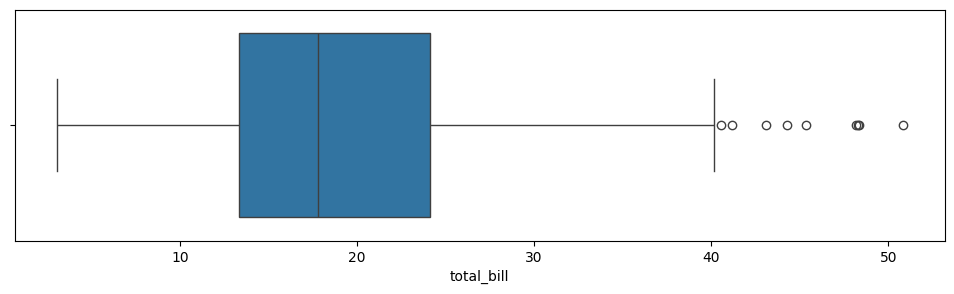

In [112]:
# before removing outlier
plt.figure(figsize=(12, 3))
sns.boxplot(x="total_bill", data= final_df)
plt.show()

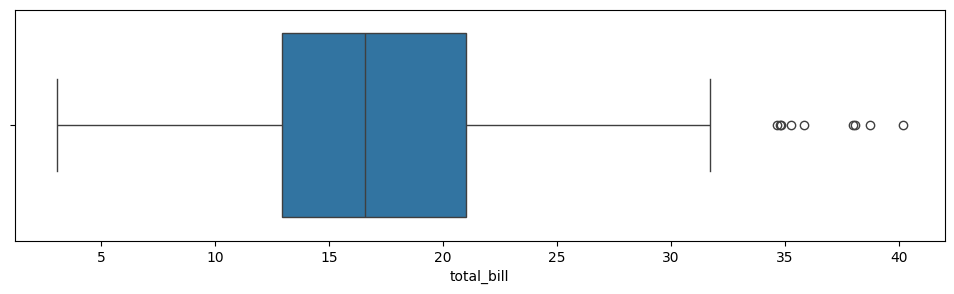

In [113]:
# after removing outlier
plt.figure(figsize=(12, 3))
sns.boxplot(x="total_bill", data= out_remove_data)
plt.show()

<Figure size 1600x1200 with 0 Axes>

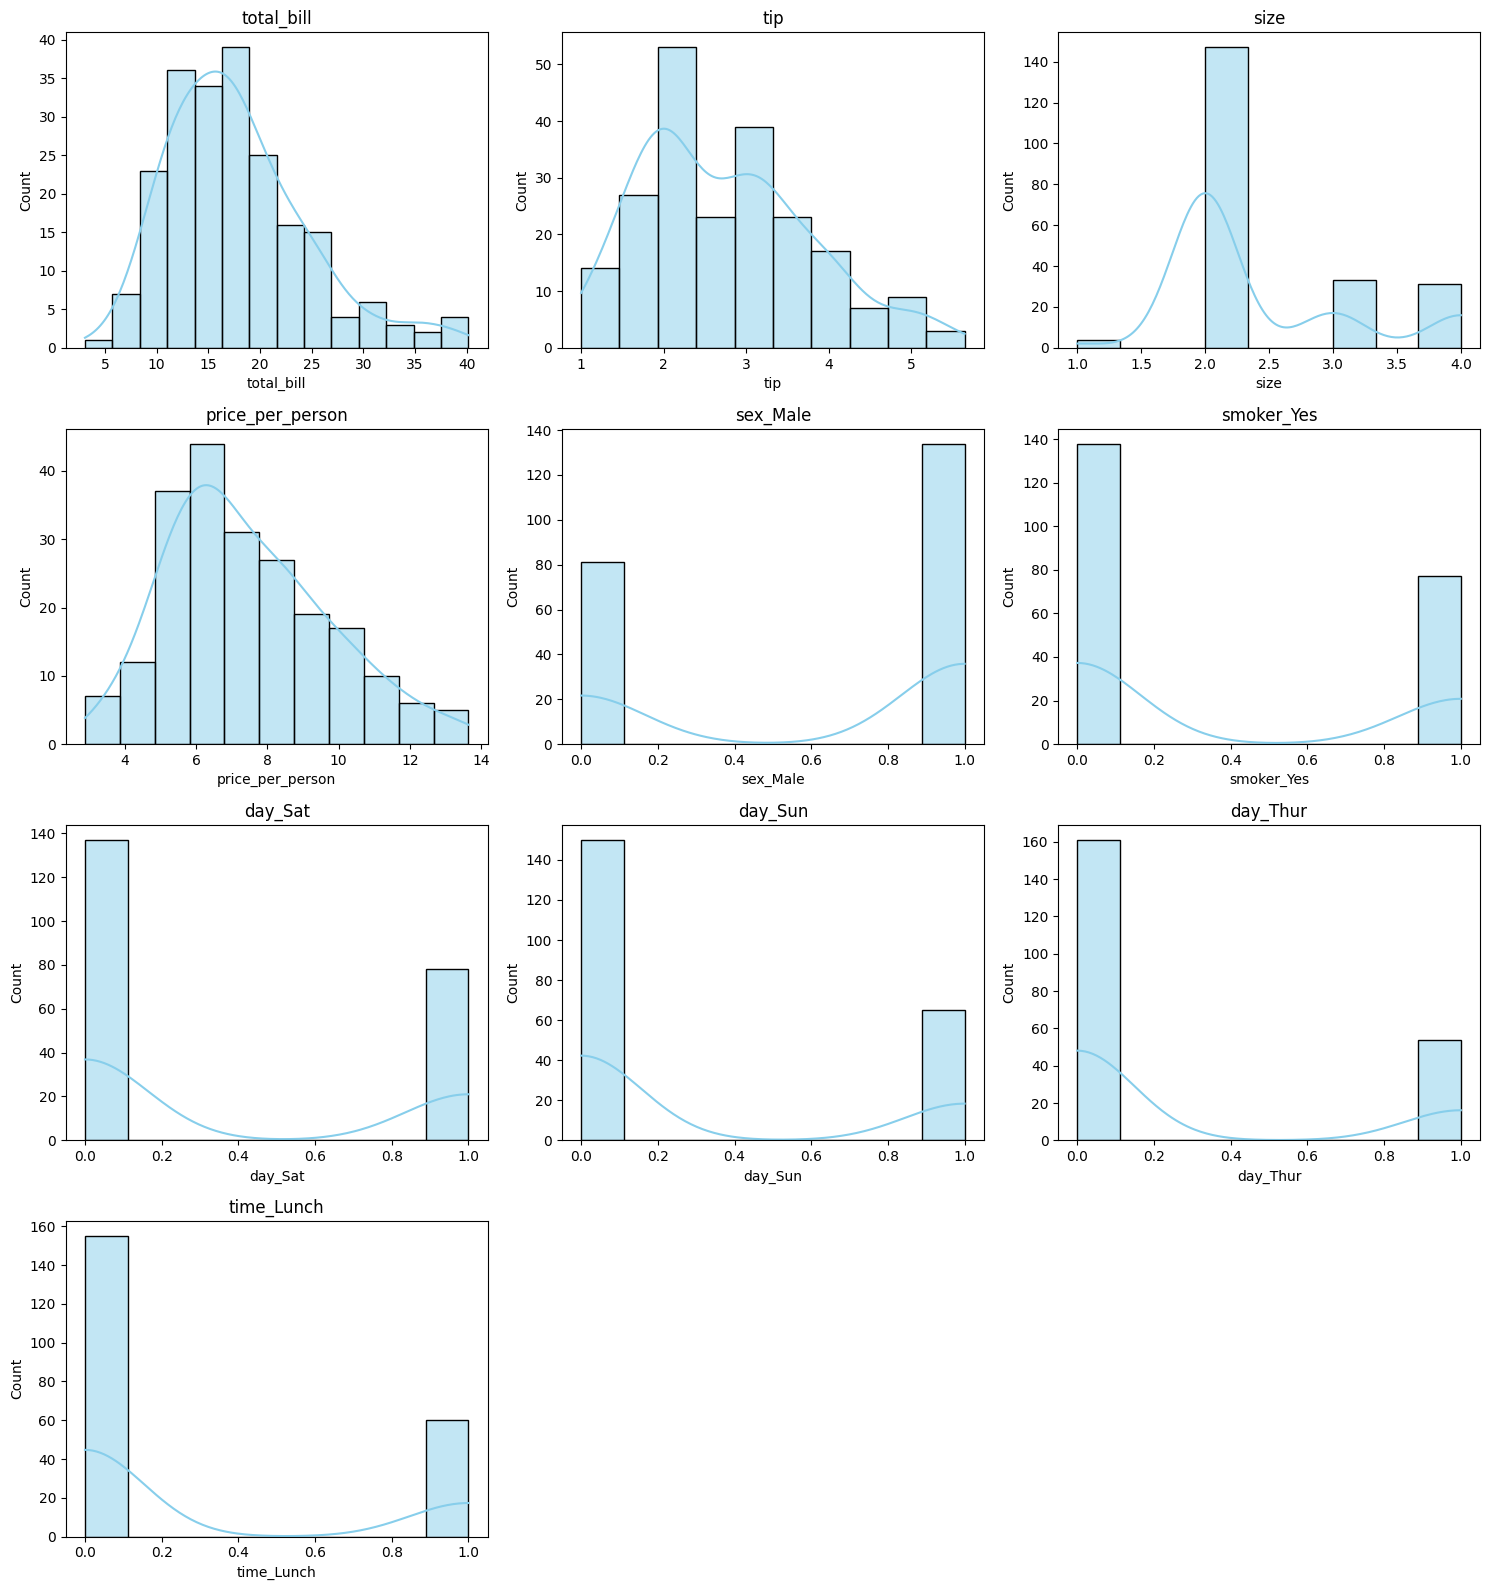

In [124]:
plt.figure(figsize=(16, 12))
cols_1 = out_remove_data.select_dtypes(include="number").columns

total_1 = len(cols_1)
rows_1 = math.ceil(total_1 / 3)

plt.figure(figsize=(15, rows * 4))

for i, cols_1 in enumerate(cols_1, 1):
    plt.subplot(rows_1, 3, i)
    sns.histplot(out_remove_data[cols_1], kde=True, color="skyblue")
    plt.title(cols_1)

plt.tight_layout()
plt.show()

